In [1]:
import pandas as pd
import numpy as np

In [2]:
products = pd.read_csv('amazon_baby_subset 2.csv')

In [3]:
important_words = ["baby", "one", "great", "love", "use", "would", "like", "easy", "little", "seat", "old", "well", "get", "also", "really", "son", "time", "bought", "product", "good", "daughter", "much", "loves", "stroller", "put", "months", "car", "still", "back", "used", "recommend", "first", "even", "perfect", "nice", "bag", "two", "using", "got", "fit", "around", "diaper", "enough", "month", "price", "go", "could", "soft", "since", "buy", "room", "works", "made", "child", "keep", "size", "small", "need", "year", "big", "make", "take", "easily", "think", "crib", "clean", "way", "quality", "thing", "better", "without", "set", "new", "every", "cute", "best", "bottles", "work", "purchased", "right", "lot", "side", "happy", "comfortable", "toy", "able", "kids", "bit", "night", "long", "fits", "see", "us", "another", "play", "day", "money", "monitor", "tried", "thought", "never", "item", "hard", "plastic", "however", "disappointed", "reviews", "something", "going", "pump", "bottle", "cup", "waste", "return", "amazon", "different", "top", "want", "problem", "know", "water", "try", "received", "sure", "times", "chair", "find", "hold", "gate", "open", "bottom", "away", "actually", "cheap", "worked", "getting", "ordered", "came", "milk", "bad", "part", "worth", "found", "cover", "many", "design", "looking", "weeks", "say", "wanted", "look", "place", "purchase", "looks", "second", "piece", "box", "pretty", "trying", "difficult", "together", "though", "give", "started", "anything", "last", "company", "come", "returned", "maybe", "took", "broke", "makes", "stay", "instead", "idea", "head", "said", "less", "went", "working", "high", "unit", "seems", "picture", "completely", "wish", "buying", "babies", "won", "tub", "almost", "either"]

In [4]:
products = products.fillna({'review':''}) 

In [6]:
def remove_punctuation(text):
    import string
    return text.translate(None, string.punctuation)

products['clean_review'] = products['review'].apply(remove_punctuation)

In [8]:
for word in important_words:
    products[word] = products['clean_review'].apply(lambda s : s.split().count(word))

In [9]:
train_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 222, 224, 225, 226, 227, 228, 230, 231, 232, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 351, 353, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406, 407, 408, 409, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 426, 427, 428, 429, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 452, 453, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 467, 468, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 506, 507, 508, 510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 524, 525, 526, 527, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 544, 545, 547, 548, 549, 550, 552, 553, 554, 556, 557, 558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 575, 576, 578, 579, 580, 581, 582, 583, 584, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 597, 598, 599, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 627, 628, 629, 630, 631, 632, 633, 634, 636, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652, 653, 654, 655, 656, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 669, 670, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 717, 718, 719, 720, 721, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 734, 735, 736, 738, 739, 741, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 784, 785, 786, 787, 788, 789, 791, 792, 794, 795, 796, 797, 798, 799, 800, 801, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 849, 850, 852, 854, 855, 856, 857, 858, 859, 860, 862, 863, 867, 868, 870, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 894, 895, 896, 897, 898, 900, 901, 902, 903, 904, 905, 906, 908, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 925, 926, 927, 928, 929, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 996, 998, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1117, 1119, 1120, 1121, 1123, 1125, 1126, 1127, 1128, 1130, 1131, 1132, 1133, 1134, 1135, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1196, 1197, 1198, 1199, 1201, 1202, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1253, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1288, 1289, 1291, 1292, 1293, 1294, 1295, 1296, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1355, 1356, 1357, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1429, 1430, 1431, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1493, 1494, 1495, 1496, 1497, 1498, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1590, 1591, 1592, 1593, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1632, 1633, 1634, 1635, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1645, 1646, 1647, 1649, 1650, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1701, 1702, 1704, 1705, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1736, 1737, 1738, 1739, 1740, 1742, 1743, 1744, 1745, 1746, 1747, 1749, 1750, 1751, 1752, 1753, 1754, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1768, 1769, 1772, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1808, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1819, 1820, 1821, 1822, 1823, 1825, 1826, 1827, 1828, 1829, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1882, 1883, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1913, 1914, 1915, 1916, 1917, 1919, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1960, 1961, 1962, 1964, 1965, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2086, 2087, 2089, 2090, 2091, 2092, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2106, 2107, 2108, 2110, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2128, 2130, 2131, 2132, 2133, 2134, 2135, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2156, 2157, 2158, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2244, 2245, 2246, 2249, 2250, 2251, 2253, 2254, 2255, 2256, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2285, 2286, 2287, 2289, 2290, 2291, 2292, 2293, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2319, 2320, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2338, 2339, 2340, 2342, 2343, 2344, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2390, 2391, 2392, 2393, 2394, 2395, 2397, 2398, 2399, 2400, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2418, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2438, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2460, 2461, 2462, 2463, 2465, 2466, 2467, 2468, 2469, 2470, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2495, 2497, 2498, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2560, 2561, 2562, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2572, 2573, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2637, 2638, 2639, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2663, 2664, 2665, 2666, 2667, 2668, 2670, 2671, 2672, 2673, 2674, 2676, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2711, 2712, 2713, 2716, 2717, 2719, 2720, 2721, 2723, 2725, 2727, 2729, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2742, 2743, 2744, 2746, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2768, 2769, 2770, 2771, 2773, 2774, 2775, 2777, 2778, 2779, 2780, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2812, 2813, 2814, 2816, 2818, 2819, 2820, 2821, 2822, 2823, 2825, 2826, 2828, 2829, 2832, 2833, 2834, 2835, 2838, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2895, 2896, 2897, 2898, 2899, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2936, 2937, 2938, 2939, 2941, 2942, 2943, 2944, 2945, 2946, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3006, 3007, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3090, 3091, 3092, 3093, 3094, 3096, 3097, 3098, 3099, 3100, 3101, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3113, 3116, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3144, 3145, 3146, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3197, 3198, 3199, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3248, 3249, 3250, 3251, 3252, 3253, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3309, 3310, 3311, 3312, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3322, 3323, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3346, 3348, 3349, 3350, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3365, 3368, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3388, 3389, 3390, 3391, 3392, 3394, 3395, 3396, 3397, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3415, 3417, 3418, 3419, 3420, 3421, 3422, 3424, 3425, 3427, 3428, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3584, 3585, 3586, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3610, 3611, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3665, 3666, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3695, 3696, 3697, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3742, 3743, 3744, 3745, 3746, 3747, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3785, 3786, 3787, 3788, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3808, 3809, 3811, 3812, 3813, 3814, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3831, 3833, 3834, 3835, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3908, 3910, 3912, 3913, 3914, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3931, 3932, 3933, 3935, 3936, 3937, 3938, 3939, 3941, 3942, 3943, 3946, 3948, 3949, 3950, 3951, 3952, 3954, 3956, 3957, 3960, 3961, 3962, 3963, 3964, 3965, 3968, 3969, 3970, 3971, 3972, 3974, 3976, 3977, 3978, 3980, 3983, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 4000, 4001, 4002, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4021, 4022, 4023, 4024, 4025, 4026, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4067, 4069, 4070, 4071, 4072, 4073, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4092, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4119, 4120, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4211, 4212, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4232, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4255, 4256, 4257, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4276, 4277, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4295, 4296, 4297, 4299, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4343, 4344, 4345, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4355, 4356, 4357, 4358, 4360, 4362, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4377, 4378, 4379, 4380, 4381, 4383, 4385, 4386, 4388, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4418, 4419, 4421, 4422, 4423, 4424, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4504, 4505, 4506, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4527, 4528, 4530, 4531, 4532, 4533, 4534, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4590, 4591, 4593, 4596, 4597, 4598, 4599, 4600, 4601, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4612, 4613, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4684, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4716, 4717, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4728, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4741, 4743, 4744, 4745, 4746, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4761, 4762, 4765, 4766, 4767, 4768, 4769, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4793, 4794, 4795, 4798, 4799, 4800, 4802, 4803, 4804, 4805, 4806, 4808, 4809, 4810, 4811, 4812, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4866, 4868, 4870, 4871, 4872, 4873, 4874, 4876, 4877, 4879, 4880, 4881, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4919, 4920, 4921, 4922, 4923, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4945, 4946, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4966, 4967, 4968, 4969, 4970, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4995, 4996, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5020, 5022, 5023, 5024, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5058, 5059, 5060, 5062, 5063, 5064, 5065, 5066, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5087, 5088, 5089, 5090, 5092, 5093, 5094, 5095, 5096, 5097, 5099, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5168, 5169, 5170, 5172, 5174, 5175, 5176, 5177, 5179, 5180, 5181, 5182, 5183, 5185, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5203, 5204, 5205, 5206, 5207, 5208, 5210, 5211, 5212, 5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229, 5230, 5231, 5233, 5234, 5235, 5236, 5237, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5262, 5263, 5264, 5265, 5267, 5269, 5270, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5281, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5291, 5292, 5294, 5295, 5297, 5298, 5299, 5300, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5330, 5331, 5332, 5333, 5334, 5336, 5337, 5338, 5339, 5340, 5342, 5343, 5344, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357, 5358, 5360, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5383, 5384, 5385, 5386, 5387, 5389, 5390, 5391, 5392, 5394, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5455, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5483, 5484, 5485, 5487, 5488, 5489, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5502, 5503, 5504, 5505, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5528, 5529, 5530, 5531, 5532, 5533, 5535, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5615, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5627, 5628, 5629, 5630, 5631, 5633, 5634, 5636, 5637, 5638, 5639, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5650, 5651, 5652, 5653, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5685, 5687, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5720, 5721, 5723, 5724, 5726, 5727, 5728, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5785, 5788, 5789, 5790, 5791, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5822, 5823, 5824, 5826, 5827, 5828, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5876, 5877, 5878, 5879, 5882, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5926, 5928, 5929, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5983, 5984, 5985, 5986, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5998, 5999, 6000, 6001, 6002, 6004, 6005, 6006, 6007, 6008, 6010, 6011, 6012, 6014, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6024, 6025, 6026, 6027, 6028, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6041, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6062, 6063, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6076, 6077, 6080, 6081, 6083, 6084, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6103, 6104, 6105, 6106, 6107, 6109, 6110, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6162, 6163, 6164, 6165, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6222, 6223, 6224, 6225, 6227, 6228, 6229, 6230, 6231, 6232, 6233, 6235, 6236, 6237, 6238, 6239, 6240, 6241, 6242, 6244, 6245, 6246, 6247, 6248, 6249, 6250, 6252, 6253, 6254, 6256, 6257, 6258, 6259, 6260, 6261, 6262, 6264, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6276, 6277, 6278, 6280, 6281, 6283, 6284, 6286, 6287, 6288, 6289, 6291, 6292, 6293, 6294, 6295, 6296, 6298, 6299, 6300, 6301, 6302, 6303, 6304, 6306, 6307, 6308, 6310, 6311, 6312, 6313, 6314, 6315, 6316, 6317, 6318, 6320, 6321, 6322, 6323, 6324, 6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334, 6335, 6336, 6337, 6338, 6339, 6340, 6341, 6342, 6343, 6344, 6345, 6346, 6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356, 6357, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367, 6368, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377, 6378, 6379, 6380, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6390, 6393, 6395, 6396, 6397, 6398, 6399, 6400, 6401, 6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409, 6410, 6411, 6412, 6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6426, 6427, 6428, 6430, 6431, 6432, 6433, 6434, 6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443, 6444, 6445, 6446, 6447, 6448, 6449, 6450, 6451, 6452, 6453, 6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6465, 6466, 6467, 6468, 6469, 6470, 6471, 6472, 6474, 6475, 6476, 6477, 6478, 6479, 6480, 6481, 6483, 6484, 6485, 6486, 6487, 6488, 6489, 6490, 6491, 6492, 6493, 6494, 6495, 6496, 6497, 6498, 6500, 6501, 6503, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6513, 6514, 6515, 6516, 6517, 6518, 6519, 6520, 6521, 6522, 6523, 6524, 6525, 6526, 6527, 6528, 6529, 6530, 6531, 6532, 6533, 6534, 6535, 6536, 6537, 6538, 6539, 6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550, 6551, 6552, 6553, 6554, 6555, 6556, 6557, 6558, 6559, 6560, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6585, 6586, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6601, 6603, 6604, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6628, 6629, 6630, 6631, 6632, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663, 6664, 6665, 6666, 6667, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6676, 6677, 6678, 6679, 6680, 6681, 6682, 6683, 6684, 6686, 6687, 6690, 6691, 6692, 6693, 6694, 6695, 6696, 6697, 6699, 6700, 6701, 6702, 6703, 6704, 6706, 6707, 6708, 6709, 6710, 6711, 6712, 6713, 6714, 6715, 6716, 6717, 6718, 6719, 6720, 6721, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6731, 6732, 6733, 6734, 6735, 6736, 6739, 6740, 6741, 6742, 6743, 6746, 6747, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6778, 6779, 6781, 6782, 6783, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6829, 6830, 6831, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6852, 6853, 6854, 6856, 6857, 6858, 6859, 6860, 6862, 6863, 6864, 6865, 6866, 6867, 6869, 6870, 6871, 6872, 6873, 6874, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6906, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6916, 6917, 6918, 6919, 6920, 6921, 6922, 6923, 6924, 6925, 6926, 6927, 6928, 6929, 6931, 6932, 6934, 6935, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6945, 6946, 6947, 6948, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6977, 6978, 6980, 6981, 6982, 6983, 6984, 6986, 6987, 6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997, 6998, 6999, 7000, 7001, 7003, 7004, 7007, 7008, 7009, 7011, 7012, 7013, 7014, 7015, 7016, 7017, 7018, 7019, 7021, 7022, 7023, 7024, 7025, 7026, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7035, 7037, 7038, 7039, 7040, 7041, 7042, 7043, 7045, 7046, 7047, 7048, 7050, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067, 7068, 7069, 7070, 7071, 7072, 7074, 7075, 7076, 7077, 7078, 7079, 7080, 7081, 7083, 7084, 7085, 7086, 7087, 7088, 7089, 7090, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100, 7101, 7102, 7103, 7104, 7105, 7106, 7107, 7110, 7111, 7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7121, 7122, 7123, 7124, 7125, 7127, 7128, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144, 7145, 7146, 7147, 7149, 7150, 7151, 7152, 7153, 7154, 7155, 7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7218, 7220, 7221, 7223, 7224, 7225, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7242, 7243, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7282, 7283, 7285, 7286, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7301, 7302, 7303, 7304, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7315, 7316, 7318, 7319, 7320, 7321, 7322, 7324, 7325, 7326, 7327, 7329, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7352, 7353, 7354, 7355, 7356, 7357, 7358, 7359, 7360, 7361, 7362, 7363, 7364, 7365, 7366, 7367, 7368, 7369, 7370, 7371, 7372, 7373, 7375, 7376, 7377, 7378, 7380, 7381, 7382, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7398, 7400, 7402, 7403, 7404, 7405, 7406, 7408, 7409, 7410, 7411, 7413, 7414, 7415, 7416, 7418, 7419, 7420, 7421, 7422, 7423, 7424, 7425, 7427, 7428, 7429, 7430, 7431, 7432, 7434, 7435, 7436, 7437, 7438, 7439, 7442, 7443, 7444, 7445, 7446, 7447, 7448, 7449, 7450, 7451, 7453, 7454, 7455, 7456, 7458, 7459, 7460, 7461, 7462, 7463, 7464, 7466, 7467, 7468, 7469, 7470, 7471, 7472, 7473, 7474, 7475, 7476, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7484, 7485, 7486, 7488, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7496, 7497, 7498, 7499, 7500, 7501, 7502, 7503, 7504, 7505, 7506, 7507, 7508, 7509, 7510, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7519, 7520, 7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7531, 7532, 7533, 7534, 7535, 7536, 7537, 7538, 7539, 7540, 7541, 7542, 7547, 7548, 7549, 7550, 7551, 7552, 7553, 7554, 7555, 7557, 7558, 7559, 7560, 7561, 7562, 7563, 7564, 7565, 7566, 7568, 7569, 7570, 7571, 7572, 7573, 7574, 7575, 7576, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7586, 7587, 7588, 7589, 7590, 7591, 7594, 7595, 7596, 7597, 7598, 7599, 7600, 7601, 7602, 7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612, 7614, 7615, 7616, 7618, 7619, 7621, 7622, 7624, 7625, 7626, 7627, 7628, 7629, 7630, 7631, 7632, 7633, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7645, 7646, 7647, 7648, 7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658, 7659, 7660, 7661, 7662, 7663, 7664, 7665, 7667, 7669, 7670, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7694, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7702, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7736, 7738, 7739, 7740, 7741, 7743, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7759, 7761, 7764, 7765, 7766, 7767, 7768, 7769, 7770, 7772, 7773, 7775, 7777, 7778, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7796, 7798, 7799, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7821, 7823, 7824, 7825, 7826, 7827, 7828, 7829, 7830, 7831, 7832, 7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7844, 7845, 7846, 7847, 7848, 7850, 7851, 7852, 7853, 7854, 7855, 7856, 7857, 7858, 7859, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7868, 7869, 7870, 7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910, 7911, 7912, 7913, 7914, 7915, 7916, 7917, 7918, 7919, 7920, 7921, 7922, 7923, 7924, 7925, 7926, 7927, 7928, 7929, 7930, 7931, 7932, 7933, 7934, 7935, 7936, 7938, 7939, 7940, 7941, 7942, 7943, 7944, 7945, 7946, 7947, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956, 7957, 7959, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7973, 7974, 7975, 7976, 7977, 7978, 7979, 7980, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7994, 7995, 7996, 7997, 7998, 7999, 8000, 8001, 8002, 8003, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8044, 8046, 8047, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8060, 8061, 8062, 8064, 8065, 8066, 8068, 8069, 8070, 8071, 8072, 8073, 8074, 8075, 8076, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8094, 8095, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127, 8128, 8129, 8131, 8132, 8133, 8134, 8135, 8136, 8138, 8139, 8140, 8141, 8142, 8143, 8144, 8145, 8146, 8147, 8148, 8149, 8150, 8151, 8152, 8153, 8154, 8155, 8157, 8158, 8159, 8160, 8161, 8163, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8172, 8173, 8174, 8175, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8192, 8193, 8194, 8195, 8196, 8197, 8198, 8200, 8201, 8203, 8204, 8205, 8206, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8259, 8260, 8261, 8262, 8263, 8264, 8265, 8266, 8267, 8268, 8269, 8270, 8271, 8272, 8274, 8275, 8276, 8278, 8279, 8280, 8281, 8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8292, 8293, 8294, 8295, 8296, 8297, 8298, 8299, 8300, 8301, 8302, 8303, 8304, 8305, 8307, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8317, 8318, 8319, 8320, 8321, 8322, 8324, 8325, 8326, 8327, 8328, 8329, 8330, 8331, 8332, 8334, 8335, 8336, 8337, 8339, 8340, 8341, 8342, 8343, 8344, 8345, 8347, 8350, 8351, 8352, 8353, 8354, 8356, 8358, 8359, 8360, 8361, 8362, 8363, 8366, 8367, 8368, 8369, 8371, 8372, 8373, 8374, 8375, 8377, 8378, 8379, 8380, 8381, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8412, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8422, 8424, 8425, 8426, 8427, 8428, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8436, 8437, 8438, 8439, 8440, 8441, 8443, 8444, 8445, 8446, 8447, 8448, 8450, 8453, 8454, 8455, 8456, 8457, 8458, 8459, 8460, 8462, 8463, 8464, 8465, 8466, 8467, 8468, 8469, 8470, 8471, 8472, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8492, 8493, 8494, 8495, 8496, 8497, 8498, 8500, 8501, 8502, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522, 8523, 8524, 8525, 8526, 8528, 8529, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8539, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8552, 8554, 8555, 8556, 8557, 8558, 8560, 8561, 8562, 8564, 8565, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8576, 8577, 8578, 8579, 8581, 8582, 8583, 8584, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8621, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8655, 8656, 8657, 8658, 8659, 8660, 8661, 8662, 8663, 8664, 8665, 8667, 8668, 8669, 8671, 8672, 8673, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 8746, 8747, 8748, 8750, 8751, 8752, 8754, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 8798, 8799, 8801, 8802, 8803, 8804, 8806, 8808, 8809, 8810, 8811, 8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8827, 8828, 8829, 8830, 8831, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8842, 8843, 8844, 8846, 8847, 8848, 8849, 8850, 8851, 8853, 8854, 8855, 8856, 8857, 8858, 8859, 8860, 8861, 8862, 8863, 8864, 8865, 8866, 8867, 8868, 8869, 8870, 8871, 8874, 8875, 8876, 8877, 8878, 8879, 8882, 8883, 8884, 8885, 8886, 8887, 8888, 8889, 8890, 8891, 8892, 8893, 8894, 8896, 8897, 8899, 8900, 8901, 8902, 8903, 8904, 8905, 8906, 8907, 8908, 8910, 8911, 8912, 8913, 8914, 8915, 8916, 8918, 8919, 8920, 8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928, 8929, 8930, 8931, 8932, 8933, 8934, 8935, 8936, 8937, 8938, 8939, 8940, 8941, 8942, 8943, 8945, 8946, 8948, 8949, 8950, 8951, 8953, 8954, 8955, 8956, 8957, 8958, 8959, 8961, 8962, 8963, 8964, 8966, 8967, 8968, 8969, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8987, 8988, 8989, 8990, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 9000, 9001, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012, 9013, 9014, 9015, 9016, 9018, 9019, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062, 9063, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9076, 9077, 9078, 9080, 9081, 9082, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113, 9114, 9115, 9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9145, 9146, 9148, 9149, 9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162, 9163, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9189, 9190, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221, 9222, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9232, 9235, 9236, 9237, 9238, 9239, 9240, 9241, 9242, 9243, 9244, 9245, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255, 9256, 9257, 9258, 9259, 9260, 9261, 9262, 9263, 9264, 9265, 9266, 9267, 9268, 9269, 9270, 9271, 9272, 9273, 9275, 9276, 9277, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9292, 9293, 9294, 9295, 9297, 9298, 9299, 9300, 9301, 9303, 9304, 9305, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9333, 9334, 9335, 9336, 9337, 9338, 9340, 9341, 9342, 9343, 9344, 9345, 9346, 9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9357, 9358, 9359, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9386, 9387, 9388, 9389, 9390, 9391, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9412, 9413, 9414, 9415, 9416, 9417, 9419, 9420, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433, 9435, 9436, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9454, 9455, 9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9470, 9471, 9472, 9473, 9474, 9475, 9476, 9477, 9478, 9480, 9481, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9490, 9492, 9493, 9494, 9495, 9496, 9497, 9498, 9500, 9502, 9503, 9504, 9505, 9506, 9507, 9508, 9509, 9511, 9512, 9513, 9514, 9515, 9516, 9517, 9518, 9519, 9520, 9521, 9524, 9525, 9526, 9528, 9529, 9530, 9532, 9533, 9534, 9535, 9537, 9538, 9539, 9540, 9542, 9543, 9544, 9546, 9548, 9549, 9550, 9551, 9553, 9554, 9555, 9556, 9557, 9558, 9559, 9560, 9561, 9562, 9563, 9564, 9566, 9567, 9568, 9569, 9570, 9571, 9572, 9573, 9575, 9577, 9578, 9579, 9580, 9582, 9584, 9585, 9586, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9597, 9598, 9600, 9603, 9604, 9605, 9606, 9607, 9608, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9619, 9620, 9622, 9623, 9624, 9625, 9626, 9627, 9628, 9629, 9630, 9631, 9632, 9634, 9635, 9636, 9637, 9638, 9639, 9640, 9641, 9642, 9643, 9644, 9645, 9646, 9647, 9648, 9649, 9650, 9651, 9652, 9653, 9654, 9656, 9657, 9658, 9659, 9660, 9661, 9662, 9663, 9664, 9665, 9666, 9667, 9668, 9669, 9670, 9671, 9672, 9673, 9674, 9675, 9676, 9677, 9678, 9679, 9680, 9681, 9682, 9683, 9684, 9685, 9686, 9687, 9688, 9690, 9691, 9692, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9723, 9724, 9725, 9726, 9727, 9728, 9729, 9730, 9731, 9732, 9733, 9734, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9744, 9746, 9747, 9748, 9749, 9750, 9752, 9753, 9754, 9755, 9756, 9757, 9758, 9759, 9760, 9761, 9762, 9763, 9764, 9765, 9766, 9767, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9787, 9789, 9790, 9791, 9792, 9793, 9794, 9797, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9809, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 9841, 9842, 9843, 9844, 9845, 9846, 9847, 9848, 9849, 9850, 9851, 9852, 9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872, 9874, 9875, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9899, 9900, 9902, 9903, 9904, 9905, 9906, 9907, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9919, 9921, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9944, 9945, 9947, 9948, 9950, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9959, 9960, 9961, 9962, 9964, 9965, 9966, 9967, 9968, 9970, 9971, 9972, 9973, 9975, 9976, 9977, 9978, 9979, 9980, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10001, 10002, 10003, 10004, 10005, 10006, 10010, 10011, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10033, 10034, 10035, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062, 10063, 10065, 10066, 10067, 10068, 10069, 10070, 10072, 10074, 10075, 10076, 10077, 10078, 10079, 10081, 10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089, 10090, 10092, 10094, 10096, 10097, 10098, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118, 10120, 10121, 10122, 10124, 10125, 10127, 10128, 10129, 10130, 10131, 10132, 10133, 10134, 10135, 10136, 10137, 10138, 10139, 10140, 10141, 10142, 10143, 10144, 10145, 10146, 10147, 10148, 10149, 10150, 10151, 10152, 10153, 10154, 10155, 10156, 10157, 10158, 10159, 10160, 10161, 10162, 10163, 10164, 10165, 10166, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10175, 10176, 10177, 10178, 10179, 10180, 10181, 10183, 10184, 10185, 10187, 10189, 10190, 10191, 10193, 10194, 10195, 10196, 10197, 10198, 10199, 10200, 10201, 10202, 10203, 10204, 10205, 10206, 10207, 10208, 10209, 10210, 10212, 10213, 10214, 10215, 10216, 10217, 10218, 10219, 10220, 10221, 10222, 10223, 10224, 10225, 10226, 10227, 10228, 10230, 10231, 10232, 10233, 10234, 10236, 10237, 10238, 10239, 10240, 10241, 10242, 10243, 10244, 10245, 10246, 10247, 10249, 10250, 10251, 10252, 10253, 10255, 10256, 10257, 10258, 10259, 10260, 10261, 10262, 10263, 10264, 10265, 10266, 10269, 10270, 10271, 10272, 10273, 10275, 10276, 10277, 10279, 10280, 10283, 10284, 10285, 10286, 10287, 10288, 10289, 10290, 10291, 10292, 10293, 10294, 10295, 10296, 10297, 10298, 10299, 10300, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10313, 10315, 10316, 10317, 10318, 10319, 10320, 10321, 10324, 10325, 10326, 10327, 10328, 10329, 10330, 10331, 10332, 10333, 10334, 10335, 10337, 10338, 10340, 10342, 10343, 10344, 10345, 10346, 10347, 10348, 10349, 10350, 10351, 10352, 10353, 10354, 10355, 10357, 10358, 10359, 10360, 10361, 10362, 10363, 10365, 10366, 10367, 10368, 10369, 10371, 10372, 10373, 10374, 10375, 10377, 10378, 10379, 10380, 10382, 10383, 10385, 10387, 10388, 10389, 10390, 10391, 10392, 10393, 10395, 10396, 10397, 10398, 10399, 10400, 10401, 10402, 10403, 10404, 10405, 10406, 10407, 10408, 10409, 10410, 10411, 10412, 10413, 10414, 10415, 10416, 10417, 10418, 10419, 10421, 10422, 10423, 10424, 10425, 10426, 10428, 10429, 10430, 10431, 10432, 10433, 10434, 10435, 10436, 10437, 10438, 10439, 10440, 10441, 10442, 10443, 10445, 10446, 10447, 10448, 10449, 10450, 10451, 10455, 10456, 10458, 10459, 10461, 10463, 10464, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10476, 10477, 10478, 10479, 10480, 10481, 10482, 10483, 10484, 10485, 10486, 10487, 10488, 10489, 10491, 10492, 10493, 10494, 10495, 10496, 10497, 10498, 10499, 10500, 10501, 10502, 10503, 10504, 10505, 10506, 10508, 10509, 10510, 10511, 10513, 10514, 10515, 10516, 10518, 10520, 10521, 10523, 10525, 10526, 10528, 10529, 10530, 10531, 10532, 10533, 10534, 10535, 10536, 10537, 10538, 10539, 10540, 10541, 10542, 10543, 10544, 10545, 10546, 10547, 10548, 10549, 10550, 10551, 10552, 10553, 10554, 10555, 10556, 10557, 10558, 10559, 10560, 10561, 10562, 10564, 10565, 10566, 10567, 10568, 10569, 10570, 10573, 10574, 10575, 10576, 10577, 10578, 10579, 10581, 10582, 10583, 10584, 10585, 10586, 10587, 10588, 10589, 10590, 10591, 10592, 10593, 10594, 10595, 10596, 10597, 10598, 10599, 10600, 10601, 10602, 10603, 10604, 10605, 10606, 10607, 10608, 10609, 10611, 10612, 10613, 10614, 10615, 10616, 10617, 10618, 10619, 10620, 10621, 10622, 10623, 10624, 10625, 10626, 10627, 10628, 10629, 10630, 10632, 10633, 10634, 10635, 10636, 10637, 10638, 10639, 10640, 10643, 10644, 10645, 10646, 10647, 10648, 10649, 10650, 10651, 10652, 10653, 10654, 10655, 10656, 10657, 10659, 10660, 10661, 10662, 10663, 10664, 10666, 10667, 10668, 10671, 10673, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681, 10682, 10683, 10684, 10685, 10686, 10687, 10688, 10689, 10690, 10691, 10693, 10694, 10695, 10696, 10697, 10698, 10699, 10700, 10701, 10702, 10703, 10704, 10705, 10706, 10707, 10708, 10710, 10711, 10712, 10713, 10714, 10715, 10716, 10717, 10718, 10720, 10721, 10722, 10723, 10724, 10725, 10726, 10727, 10728, 10729, 10730, 10731, 10732, 10734, 10735, 10736, 10737, 10738, 10739, 10740, 10741, 10742, 10743, 10744, 10745, 10746, 10747, 10748, 10749, 10750, 10751, 10752, 10753, 10754, 10755, 10756, 10757, 10758, 10759, 10760, 10761, 10763, 10764, 10766, 10767, 10768, 10769, 10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780, 10781, 10782, 10783, 10784, 10785, 10786, 10787, 10788, 10789, 10790, 10791, 10792, 10793, 10794, 10795, 10796, 10797, 10798, 10799, 10800, 10801, 10802, 10803, 10804, 10805, 10807, 10808, 10810, 10811, 10812, 10814, 10815, 10816, 10817, 10818, 10819, 10820, 10821, 10822, 10823, 10825, 10826, 10827, 10829, 10830, 10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839, 10840, 10841, 10842, 10843, 10844, 10845, 10846, 10847, 10848, 10849, 10850, 10851, 10853, 10854, 10855, 10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864, 10865, 10866, 10869, 10870, 10871, 10872, 10873, 10874, 10875, 10876, 10877, 10879, 10881, 10882, 10884, 10885, 10886, 10887, 10888, 10889, 10890, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10898, 10899, 10900, 10901, 10902, 10903, 10904, 10905, 10906, 10907, 10908, 10911, 10912, 10913, 10914, 10915, 10916, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10924, 10926, 10927, 10928, 10929, 10931, 10932, 10933, 10934, 10935, 10936, 10937, 10938, 10939, 10940, 10941, 10942, 10943, 10944, 10945, 10946, 10947, 10948, 10949, 10950, 10952, 10953, 10954, 10955, 10956, 10957, 10958, 10961, 10963, 10964, 10965, 10966, 10967, 10968, 10969, 10970, 10971, 10972, 10973, 10974, 10975, 10976, 10977, 10978, 10979, 10980, 10981, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 10990, 10991, 10992, 10993, 10994, 10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002, 11003, 11004, 11005, 11007, 11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022, 11023, 11024, 11025, 11026, 11027, 11028, 11029, 11030, 11032, 11033, 11034, 11035, 11036, 11037, 11038, 11039, 11040, 11041, 11042, 11043, 11044, 11046, 11047, 11048, 11049, 11050, 11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060, 11061, 11062, 11063, 11064, 11065, 11066, 11068, 11069, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11084, 11086, 11087, 11088, 11090, 11091, 11093, 11094, 11095, 11096, 11097, 11098, 11099, 11100, 11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115, 11116, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11135, 11136, 11137, 11138, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11148, 11149, 11150, 11151, 11152, 11153, 11154, 11155, 11156, 11157, 11158, 11160, 11161, 11162, 11163, 11164, 11165, 11166, 11167, 11168, 11169, 11170, 11171, 11172, 11173, 11175, 11176, 11177, 11179, 11181, 11182, 11183, 11184, 11185, 11186, 11187, 11188, 11189, 11190, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199, 11200, 11201, 11202, 11204, 11205, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11223, 11225, 11226, 11227, 11228, 11229, 11230, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249, 11250, 11251, 11253, 11254, 11255, 11256, 11257, 11258, 11259, 11260, 11261, 11262, 11263, 11264, 11265, 11266, 11267, 11268, 11269, 11270, 11271, 11272, 11274, 11275, 11276, 11278, 11279, 11280, 11281, 11282, 11283, 11284, 11285, 11286, 11287, 11288, 11289, 11290, 11291, 11292, 11293, 11295, 11296, 11297, 11298, 11300, 11301, 11302, 11303, 11304, 11306, 11307, 11310, 11311, 11312, 11314, 11315, 11316, 11317, 11318, 11319, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327, 11328, 11329, 11330, 11332, 11334, 11335, 11336, 11337, 11339, 11340, 11342, 11343, 11344, 11346, 11347, 11348, 11350, 11351, 11353, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11375, 11376, 11377, 11378, 11379, 11380, 11382, 11383, 11384, 11385, 11386, 11387, 11388, 11389, 11390, 11391, 11392, 11393, 11394, 11395, 11396, 11397, 11398, 11399, 11400, 11401, 11402, 11403, 11404, 11405, 11406, 11407, 11408, 11410, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11420, 11421, 11423, 11424, 11426, 11427, 11428, 11429, 11430, 11431, 11432, 11433, 11434, 11435, 11436, 11438, 11439, 11440, 11441, 11442, 11444, 11445, 11446, 11447, 11448, 11450, 11452, 11453, 11454, 11455, 11456, 11457, 11458, 11459, 11460, 11461, 11462, 11464, 11465, 11466, 11467, 11468, 11469, 11470, 11471, 11472, 11473, 11474, 11475, 11476, 11477, 11478, 11479, 11480, 11482, 11483, 11484, 11485, 11487, 11488, 11489, 11491, 11492, 11493, 11494, 11495, 11496, 11497, 11498, 11499, 11500, 11501, 11502, 11503, 11504, 11505, 11507, 11508, 11509, 11510, 11511, 11512, 11513, 11514, 11515, 11516, 11517, 11518, 11519, 11520, 11521, 11522, 11523, 11524, 11525, 11526, 11527, 11528, 11529, 11530, 11531, 11532, 11533, 11534, 11535, 11537, 11538, 11539, 11540, 11541, 11542, 11546, 11547, 11548, 11549, 11550, 11551, 11552, 11553, 11554, 11555, 11556, 11557, 11559, 11560, 11561, 11562, 11564, 11565, 11566, 11567, 11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11578, 11579, 11580, 11582, 11583, 11584, 11585, 11586, 11590, 11591, 11592, 11594, 11595, 11596, 11597, 11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606, 11607, 11608, 11609, 11610, 11611, 11613, 11614, 11615, 11616, 11617, 11618, 11619, 11620, 11622, 11623, 11624, 11625, 11626, 11627, 11628, 11629, 11630, 11631, 11632, 11633, 11634, 11636, 11637, 11638, 11639, 11640, 11641, 11642, 11643, 11644, 11645, 11646, 11647, 11648, 11649, 11650, 11651, 11652, 11653, 11654, 11655, 11658, 11659, 11660, 11661, 11662, 11663, 11664, 11665, 11666, 11667, 11668, 11669, 11670, 11671, 11672, 11673, 11674, 11675, 11676, 11677, 11679, 11680, 11681, 11682, 11683, 11684, 11685, 11686, 11687, 11688, 11689, 11691, 11692, 11693, 11694, 11695, 11696, 11697, 11698, 11700, 11701, 11702, 11703, 11704, 11705, 11707, 11708, 11709, 11710, 11711, 11712, 11714, 11715, 11716, 11718, 11719, 11720, 11721, 11722, 11723, 11724, 11725, 11726, 11727, 11728, 11729, 11731, 11732, 11734, 11735, 11736, 11737, 11738, 11739, 11740, 11741, 11742, 11743, 11745, 11746, 11747, 11749, 11750, 11751, 11752, 11753, 11754, 11755, 11756, 11757, 11759, 11760, 11761, 11762, 11763, 11764, 11765, 11766, 11767, 11768, 11770, 11771, 11773, 11774, 11775, 11776, 11777, 11778, 11779, 11780, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789, 11790, 11791, 11792, 11793, 11794, 11796, 11797, 11798, 11799, 11800, 11801, 11802, 11804, 11805, 11806, 11807, 11808, 11809, 11810, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819, 11820, 11821, 11822, 11823, 11824, 11825, 11826, 11828, 11829, 11830, 11831, 11832, 11833, 11834, 11835, 11836, 11837, 11838, 11839, 11841, 11842, 11843, 11844, 11845, 11847, 11848, 11849, 11850, 11851, 11852, 11855, 11856, 11857, 11858, 11859, 11860, 11861, 11862, 11863, 11864, 11865, 11866, 11867, 11868, 11869, 11870, 11871, 11872, 11873, 11875, 11876, 11877, 11879, 11880, 11881, 11882, 11883, 11884, 11885, 11886, 11887, 11889, 11890, 11892, 11893, 11894, 11895, 11896, 11897, 11898, 11899, 11900, 11901, 11902, 11905, 11906, 11907, 11908, 11909, 11910, 11911, 11913, 11914, 11915, 11916, 11917, 11918, 11919, 11920, 11921, 11922, 11923, 11924, 11926, 11927, 11928, 11930, 11931, 11932, 11933, 11934, 11935, 11936, 11938, 11939, 11940, 11941, 11942, 11943, 11944, 11945, 11946, 11947, 11948, 11949, 11950, 11951, 11952, 11953, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11999, 12000, 12001, 12002, 12004, 12006, 12007, 12008, 12009, 12011, 12012, 12013, 12014, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12024, 12025, 12026, 12027, 12028, 12030, 12031, 12033, 12034, 12035, 12036, 12037, 12039, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12050, 12051, 12052, 12053, 12054, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090, 12091, 12092, 12093, 12094, 12096, 12097, 12098, 12099, 12100, 12101, 12102, 12103, 12104, 12105, 12106, 12108, 12109, 12110, 12111, 12112, 12113, 12114, 12115, 12116, 12117, 12118, 12119, 12120, 12121, 12123, 12124, 12126, 12127, 12128, 12129, 12131, 12132, 12133, 12134, 12135, 12136, 12137, 12138, 12139, 12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149, 12151, 12152, 12153, 12154, 12155, 12156, 12157, 12158, 12159, 12160, 12161, 12162, 12163, 12164, 12165, 12166, 12167, 12168, 12169, 12170, 12171, 12172, 12173, 12174, 12175, 12176, 12177, 12178, 12179, 12180, 12181, 12182, 12183, 12184, 12185, 12186, 12187, 12188, 12189, 12190, 12191, 12193, 12194, 12195, 12196, 12197, 12199, 12200, 12201, 12202, 12203, 12204, 12205, 12206, 12207, 12208, 12209, 12210, 12212, 12214, 12215, 12216, 12217, 12218, 12219, 12220, 12221, 12222, 12224, 12226, 12227, 12228, 12229, 12233, 12234, 12235, 12236, 12237, 12238, 12239, 12240, 12241, 12242, 12243, 12244, 12246, 12247, 12248, 12249, 12250, 12251, 12252, 12253, 12254, 12255, 12256, 12257, 12258, 12259, 12260, 12261, 12262, 12264, 12265, 12266, 12267, 12268, 12269, 12270, 12271, 12272, 12273, 12274, 12275, 12276, 12277, 12278, 12279, 12280, 12281, 12282, 12283, 12284, 12285, 12286, 12287, 12288, 12289, 12290, 12291, 12292, 12294, 12295, 12296, 12297, 12298, 12299, 12300, 12301, 12302, 12303, 12304, 12305, 12306, 12307, 12308, 12309, 12310, 12311, 12312, 12313, 12314, 12315, 12316, 12317, 12318, 12319, 12320, 12321, 12322, 12323, 12324, 12325, 12326, 12327, 12328, 12329, 12330, 12331, 12332, 12334, 12335, 12336, 12337, 12338, 12339, 12340, 12341, 12342, 12343, 12344, 12345, 12347, 12348, 12349, 12350, 12351, 12352, 12353, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366, 12367, 12369, 12370, 12371, 12372, 12373, 12374, 12375, 12376, 12377, 12378, 12379, 12380, 12381, 12382, 12383, 12384, 12385, 12387, 12388, 12389, 12390, 12391, 12392, 12393, 12394, 12395, 12397, 12399, 12400, 12402, 12403, 12404, 12405, 12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414, 12415, 12417, 12419, 12421, 12422, 12423, 12424, 12425, 12426, 12427, 12428, 12430, 12431, 12432, 12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441, 12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12451, 12452, 12453, 12454, 12455, 12456, 12458, 12459, 12460, 12461, 12462, 12463, 12465, 12466, 12467, 12468, 12469, 12470, 12471, 12472, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12482, 12483, 12484, 12485, 12486, 12487, 12488, 12490, 12491, 12492, 12493, 12494, 12495, 12496, 12497, 12498, 12499, 12500, 12501, 12502, 12503, 12504, 12505, 12506, 12507, 12509, 12510, 12512, 12513, 12514, 12515, 12516, 12517, 12518, 12519, 12520, 12521, 12522, 12523, 12524, 12525, 12526, 12527, 12528, 12530, 12531, 12532, 12533, 12534, 12535, 12536, 12537, 12538, 12540, 12541, 12542, 12543, 12544, 12545, 12546, 12547, 12548, 12549, 12550, 12551, 12553, 12554, 12555, 12556, 12557, 12558, 12560, 12561, 12562, 12563, 12564, 12565, 12566, 12567, 12568, 12569, 12570, 12571, 12572, 12573, 12575, 12576, 12577, 12578, 12579, 12580, 12581, 12582, 12583, 12584, 12585, 12586, 12587, 12588, 12589, 12590, 12591, 12592, 12593, 12594, 12595, 12596, 12597, 12598, 12599, 12600, 12601, 12603, 12605, 12606, 12608, 12609, 12610, 12611, 12612, 12613, 12614, 12615, 12616, 12617, 12618, 12619, 12620, 12621, 12622, 12623, 12624, 12625, 12627, 12628, 12629, 12630, 12631, 12632, 12633, 12634, 12635, 12636, 12637, 12638, 12639, 12640, 12641, 12642, 12643, 12644, 12645, 12646, 12647, 12648, 12649, 12650, 12651, 12652, 12653, 12654, 12655, 12656, 12657, 12658, 12659, 12660, 12661, 12662, 12663, 12664, 12665, 12666, 12667, 12668, 12669, 12670, 12671, 12672, 12673, 12674, 12675, 12676, 12677, 12678, 12679, 12681, 12683, 12684, 12685, 12686, 12687, 12688, 12689, 12690, 12691, 12693, 12694, 12695, 12696, 12697, 12698, 12699, 12701, 12702, 12703, 12704, 12705, 12706, 12707, 12708, 12709, 12710, 12711, 12712, 12713, 12714, 12715, 12716, 12717, 12718, 12719, 12720, 12721, 12722, 12723, 12724, 12725, 12727, 12728, 12729, 12730, 12731, 12732, 12733, 12734, 12735, 12736, 12737, 12738, 12739, 12740, 12741, 12742, 12743, 12744, 12745, 12746, 12747, 12748, 12750, 12751, 12752, 12753, 12754, 12755, 12756, 12757, 12758, 12759, 12760, 12761, 12762, 12764, 12765, 12766, 12767, 12768, 12769, 12770, 12771, 12772, 12773, 12774, 12775, 12776, 12777, 12778, 12779, 12780, 12781, 12782, 12783, 12784, 12785, 12786, 12787, 12788, 12789, 12790, 12791, 12792, 12793, 12794, 12795, 12797, 12798, 12799, 12800, 12801, 12802, 12803, 12804, 12805, 12806, 12807, 12809, 12810, 12811, 12812, 12813, 12814, 12815, 12817, 12819, 12820, 12821, 12822, 12823, 12824, 12826, 12827, 12828, 12829, 12830, 12831, 12832, 12833, 12834, 12835, 12836, 12837, 12838, 12839, 12840, 12841, 12842, 12843, 12844, 12845, 12846, 12847, 12848, 12850, 12851, 12852, 12853, 12854, 12855, 12856, 12857, 12858, 12859, 12860, 12861, 12862, 12863, 12864, 12866, 12867, 12868, 12870, 12871, 12872, 12874, 12876, 12877, 12878, 12879, 12880, 12881, 12882, 12883, 12884, 12885, 12886, 12887, 12888, 12889, 12890, 12891, 12893, 12894, 12895, 12896, 12897, 12898, 12900, 12903, 12905, 12907, 12908, 12909, 12910, 12911, 12912, 12913, 12914, 12915, 12916, 12917, 12918, 12919, 12920, 12921, 12922, 12924, 12925, 12926, 12928, 12930, 12931, 12932, 12934, 12935, 12937, 12938, 12939, 12940, 12941, 12942, 12943, 12944, 12945, 12946, 12947, 12948, 12949, 12950, 12951, 12952, 12953, 12954, 12955, 12956, 12957, 12958, 12959, 12960, 12961, 12962, 12964, 12966, 12969, 12970, 12971, 12972, 12973, 12974, 12976, 12977, 12979, 12980, 12981, 12982, 12983, 12984, 12985, 12986, 12987, 12988, 12989, 12990, 12992, 12993, 12994, 12995, 12996, 12997, 12998, 13000, 13001, 13002, 13003, 13004, 13005, 13006, 13007, 13008, 13009, 13010, 13011, 13012, 13013, 13014, 13015, 13016, 13017, 13018, 13019, 13020, 13021, 13022, 13023, 13024, 13025, 13027, 13029, 13030, 13031, 13032, 13033, 13034, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 13051, 13052, 13053, 13056, 13057, 13058, 13059, 13060, 13061, 13062, 13063, 13064, 13065, 13066, 13067, 13068, 13069, 13070, 13071, 13072, 13073, 13074, 13075, 13076, 13077, 13078, 13079, 13080, 13081, 13082, 13083, 13084, 13086, 13087, 13088, 13089, 13090, 13091, 13092, 13093, 13094, 13095, 13096, 13097, 13098, 13099, 13100, 13101, 13102, 13103, 13104, 13105, 13106, 13107, 13109, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132, 13133, 13135, 13136, 13137, 13138, 13139, 13140, 13141, 13143, 13144, 13145, 13146, 13147, 13148, 13149, 13151, 13152, 13153, 13154, 13155, 13156, 13157, 13158, 13159, 13160, 13161, 13162, 13163, 13164, 13165, 13166, 13167, 13168, 13169, 13170, 13171, 13172, 13173, 13174, 13175, 13176, 13177, 13178, 13179, 13181, 13182, 13183, 13184, 13185, 13186, 13187, 13188, 13189, 13191, 13192, 13193, 13194, 13195, 13196, 13197, 13198, 13199, 13200, 13201, 13202, 13203, 13205, 13206, 13207, 13208, 13209, 13210, 13211, 13212, 13213, 13214, 13215, 13216, 13217, 13218, 13219, 13220, 13223, 13224, 13225, 13226, 13227, 13228, 13229, 13230, 13231, 13232, 13233, 13234, 13236, 13237, 13238, 13239, 13240, 13241, 13242, 13243, 13244, 13245, 13246, 13248, 13249, 13250, 13251, 13253, 13254, 13255, 13256, 13257, 13258, 13259, 13260, 13261, 13262, 13263, 13264, 13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283, 13284, 13285, 13286, 13287, 13288, 13289, 13290, 13291, 13292, 13293, 13294, 13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13303, 13304, 13305, 13306, 13307, 13308, 13309, 13310, 13311, 13312, 13313, 13314, 13315, 13316, 13317, 13318, 13319, 13320, 13321, 13322, 13323, 13324, 13325, 13326, 13327, 13328, 13330, 13331, 13333, 13334, 13335, 13336, 13337, 13338, 13339, 13341, 13342, 13343, 13344, 13345, 13346, 13347, 13348, 13349, 13351, 13352, 13354, 13355, 13357, 13358, 13359, 13360, 13361, 13363, 13364, 13365, 13367, 13368, 13369, 13370, 13371, 13372, 13374, 13375, 13376, 13377, 13378, 13380, 13381, 13382, 13383, 13384, 13385, 13386, 13387, 13388, 13389, 13390, 13391, 13392, 13393, 13394, 13395, 13396, 13397, 13398, 13399, 13401, 13402, 13404, 13405, 13406, 13407, 13408, 13409, 13410, 13411, 13412, 13413, 13414, 13415, 13416, 13417, 13418, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427, 13428, 13429, 13430, 13431, 13432, 13434, 13435, 13436, 13437, 13438, 13439, 13440, 13442, 13443, 13444, 13445, 13446, 13447, 13448, 13450, 13451, 13452, 13453, 13454, 13455, 13456, 13457, 13458, 13459, 13460, 13461, 13462, 13463, 13464, 13465, 13466, 13467, 13468, 13469, 13470, 13471, 13473, 13474, 13475, 13476, 13477, 13478, 13479, 13481, 13482, 13484, 13485, 13486, 13487, 13488, 13489, 13490, 13491, 13493, 13494, 13495, 13496, 13497, 13498, 13500, 13501, 13502, 13503, 13504, 13505, 13506, 13507, 13508, 13509, 13510, 13512, 13513, 13514, 13515, 13516, 13517, 13518, 13519, 13521, 13522, 13523, 13525, 13526, 13527, 13529, 13530, 13531, 13533, 13534, 13535, 13536, 13537, 13538, 13539, 13540, 13541, 13542, 13543, 13544, 13545, 13546, 13547, 13548, 13549, 13551, 13552, 13553, 13554, 13555, 13556, 13557, 13558, 13559, 13560, 13562, 13563, 13564, 13565, 13566, 13567, 13568, 13569, 13570, 13571, 13573, 13574, 13575, 13576, 13577, 13578, 13579, 13580, 13581, 13582, 13583, 13584, 13585, 13586, 13587, 13588, 13589, 13590, 13592, 13593, 13594, 13595, 13597, 13598, 13599, 13600, 13601, 13602, 13603, 13604, 13605, 13606, 13608, 13609, 13610, 13611, 13613, 13615, 13617, 13618, 13619, 13620, 13621, 13622, 13623, 13624, 13625, 13627, 13628, 13629, 13630, 13631, 13632, 13633, 13634, 13635, 13637, 13639, 13640, 13641, 13643, 13644, 13645, 13647, 13648, 13649, 13650, 13651, 13653, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13662, 13663, 13664, 13665, 13666, 13667, 13668, 13670, 13671, 13673, 13674, 13675, 13676, 13677, 13678, 13679, 13680, 13681, 13682, 13683, 13685, 13686, 13687, 13688, 13689, 13690, 13691, 13692, 13693, 13694, 13695, 13696, 13697, 13698, 13699, 13700, 13701, 13702, 13703, 13704, 13707, 13708, 13709, 13710, 13711, 13713, 13715, 13716, 13718, 13719, 13720, 13721, 13722, 13723, 13724, 13725, 13726, 13727, 13728, 13729, 13730, 13731, 13732, 13734, 13735, 13736, 13737, 13738, 13739, 13740, 13741, 13742, 13743, 13744, 13745, 13746, 13748, 13749, 13750, 13751, 13752, 13753, 13754, 13755, 13756, 13757, 13759, 13760, 13761, 13762, 13763, 13764, 13765, 13766, 13767, 13768, 13769, 13770, 13771, 13772, 13773, 13774, 13776, 13777, 13778, 13779, 13780, 13781, 13782, 13783, 13784, 13785, 13786, 13787, 13789, 13790, 13791, 13792, 13793, 13794, 13795, 13797, 13798, 13799, 13800, 13801, 13802, 13804, 13805, 13806, 13807, 13808, 13809, 13810, 13812, 13813, 13814, 13815, 13816, 13817, 13818, 13819, 13820, 13821, 13822, 13823, 13824, 13825, 13826, 13828, 13829, 13830, 13831, 13832, 13833, 13834, 13836, 13837, 13838, 13839, 13840, 13841, 13842, 13844, 13845, 13846, 13847, 13848, 13849, 13850, 13851, 13854, 13855, 13856, 13857, 13858, 13859, 13860, 13861, 13864, 13865, 13866, 13867, 13868, 13870, 13871, 13872, 13873, 13875, 13876, 13877, 13878, 13879, 13880, 13881, 13882, 13883, 13884, 13885, 13886, 13888, 13889, 13890, 13891, 13892, 13893, 13894, 13895, 13896, 13897, 13898, 13899, 13900, 13901, 13902, 13903, 13905, 13906, 13907, 13908, 13909, 13910, 13911, 13912, 13913, 13914, 13915, 13916, 13917, 13918, 13920, 13922, 13924, 13925, 13927, 13928, 13929, 13932, 13933, 13934, 13935, 13936, 13937, 13938, 13939, 13940, 13941, 13942, 13943, 13944, 13945, 13946, 13947, 13949, 13950, 13953, 13954, 13955, 13956, 13957, 13958, 13959, 13960, 13961, 13962, 13963, 13964, 13965, 13966, 13967, 13968, 13970, 13971, 13972, 13973, 13974, 13975, 13976, 13977, 13979, 13980, 13981, 13982, 13984, 13987, 13989, 13990, 13991, 13993, 13994, 13995, 13996, 13997, 13998, 14000, 14001, 14002, 14003, 14004, 14005, 14006, 14007, 14008, 14009, 14010, 14011, 14012, 14013, 14014, 14015, 14016, 14017, 14018, 14019, 14020, 14021, 14022, 14023, 14024, 14026, 14027, 14028, 14031, 14032, 14033, 14034, 14035, 14036, 14037, 14038, 14039, 14040, 14041, 14042, 14043, 14044, 14045, 14046, 14047, 14048, 14049, 14050, 14051, 14052, 14053, 14054, 14055, 14056, 14058, 14059, 14060, 14061, 14062, 14063, 14064, 14065, 14066, 14067, 14068, 14069, 14070, 14073, 14074, 14075, 14076, 14077, 14078, 14079, 14080, 14081, 14083, 14085, 14086, 14087, 14088, 14089, 14090, 14091, 14092, 14093, 14094, 14095, 14096, 14097, 14098, 14100, 14101, 14102, 14103, 14104, 14105, 14106, 14107, 14108, 14110, 14111, 14112, 14113, 14114, 14115, 14116, 14117, 14118, 14120, 14121, 14122, 14123, 14124, 14125, 14126, 14127, 14128, 14129, 14130, 14131, 14132, 14133, 14134, 14135, 14136, 14137, 14138, 14139, 14140, 14142, 14143, 14144, 14146, 14147, 14148, 14149, 14150, 14151, 14152, 14153, 14155, 14156, 14158, 14159, 14160, 14161, 14162, 14163, 14164, 14165, 14166, 14167, 14168, 14169, 14170, 14171, 14172, 14173, 14175, 14176, 14177, 14178, 14179, 14180, 14181, 14182, 14183, 14184, 14186, 14187, 14188, 14189, 14190, 14192, 14193, 14194, 14195, 14196, 14197, 14198, 14199, 14200, 14201, 14203, 14204, 14205, 14207, 14209, 14210, 14211, 14212, 14213, 14214, 14215, 14216, 14217, 14218, 14220, 14221, 14222, 14223, 14224, 14225, 14226, 14227, 14228, 14229, 14230, 14231, 14232, 14233, 14234, 14235, 14236, 14237, 14238, 14239, 14240, 14241, 14242, 14243, 14244, 14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14266, 14267, 14269, 14270, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 14283, 14284, 14285, 14286, 14287, 14288, 14290, 14291, 14294, 14295, 14296, 14297, 14299, 14300, 14301, 14302, 14304, 14306, 14307, 14308, 14309, 14310, 14311, 14312, 14313, 14314, 14315, 14316, 14317, 14319, 14321, 14322, 14323, 14324, 14325, 14326, 14327, 14328, 14329, 14330, 14331, 14332, 14333, 14334, 14335, 14336, 14337, 14338, 14341, 14342, 14343, 14344, 14345, 14346, 14347, 14348, 14349, 14350, 14351, 14352, 14353, 14354, 14355, 14356, 14357, 14360, 14361, 14362, 14363, 14364, 14366, 14367, 14368, 14369, 14370, 14371, 14372, 14373, 14374, 14375, 14376, 14377, 14378, 14379, 14380, 14381, 14382, 14383, 14384, 14385, 14386, 14387, 14388, 14389, 14390, 14391, 14392, 14394, 14395, 14396, 14397, 14398, 14399, 14400, 14401, 14402, 14403, 14405, 14406, 14407, 14408, 14409, 14410, 14411, 14412, 14413, 14414, 14415, 14416, 14417, 14418, 14419, 14420, 14421, 14422, 14423, 14424, 14427, 14428, 14429, 14430, 14432, 14433, 14434, 14435, 14436, 14438, 14439, 14440, 14441, 14442, 14443, 14444, 14445, 14446, 14447, 14448, 14449, 14450, 14451, 14452, 14453, 14454, 14455, 14456, 14457, 14458, 14460, 14461, 14462, 14463, 14464, 14465, 14467, 14468, 14469, 14470, 14471, 14472, 14473, 14474, 14475, 14476, 14477, 14478, 14480, 14481, 14482, 14483, 14485, 14486, 14488, 14489, 14490, 14491, 14492, 14493, 14494, 14495, 14496, 14497, 14498, 14499, 14500, 14501, 14503, 14504, 14505, 14507, 14508, 14509, 14510, 14511, 14512, 14513, 14514, 14515, 14516, 14517, 14518, 14520, 14521, 14523, 14524, 14525, 14526, 14527, 14528, 14529, 14530, 14531, 14532, 14533, 14534, 14536, 14537, 14538, 14539, 14540, 14541, 14542, 14543, 14544, 14545, 14546, 14547, 14548, 14549, 14550, 14551, 14552, 14553, 14554, 14555, 14556, 14557, 14558, 14559, 14561, 14562, 14563, 14564, 14565, 14566, 14568, 14569, 14570, 14571, 14572, 14573, 14574, 14575, 14576, 14577, 14578, 14579, 14581, 14582, 14583, 14585, 14587, 14588, 14589, 14590, 14591, 14592, 14593, 14594, 14595, 14596, 14597, 14598, 14599, 14600, 14601, 14602, 14603, 14604, 14606, 14607, 14608, 14609, 14610, 14611, 14612, 14613, 14614, 14615, 14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625, 14626, 14627, 14628, 14629, 14631, 14632, 14633, 14634, 14635, 14636, 14638, 14639, 14640, 14641, 14642, 14643, 14644, 14645, 14646, 14647, 14648, 14649, 14650, 14651, 14652, 14654, 14655, 14656, 14657, 14658, 14659, 14660, 14661, 14662, 14663, 14664, 14666, 14667, 14668, 14669, 14670, 14672, 14673, 14674, 14676, 14677, 14679, 14680, 14681, 14682, 14683, 14684, 14685, 14686, 14687, 14688, 14689, 14690, 14691, 14692, 14693, 14694, 14695, 14696, 14697, 14698, 14699, 14701, 14702, 14703, 14704, 14705, 14706, 14707, 14708, 14709, 14710, 14712, 14713, 14714, 14715, 14716, 14717, 14718, 14719, 14720, 14721, 14722, 14723, 14724, 14725, 14726, 14727, 14728, 14729, 14730, 14732, 14734, 14736, 14737, 14738, 14739, 14740, 14741, 14742, 14743, 14745, 14746, 14747, 14748, 14749, 14750, 14751, 14752, 14753, 14754, 14755, 14756, 14757, 14758, 14759, 14760, 14761, 14762, 14763, 14764, 14765, 14766, 14767, 14768, 14769, 14770, 14771, 14772, 14773, 14774, 14775, 14776, 14777, 14778, 14779, 14780, 14781, 14783, 14784, 14785, 14786, 14787, 14788, 14789, 14790, 14791, 14792, 14793, 14794, 14795, 14796, 14797, 14798, 14799, 14800, 14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14810, 14811, 14812, 14813, 14814, 14815, 14816, 14818, 14819, 14820, 14821, 14822, 14823, 14824, 14825, 14826, 14828, 14829, 14830, 14831, 14832, 14833, 14834, 14835, 14836, 14837, 14838, 14839, 14840, 14841, 14842, 14843, 14844, 14845, 14846, 14847, 14848, 14849, 14850, 14851, 14852, 14853, 14854, 14855, 14856, 14857, 14858, 14859, 14860, 14861, 14862, 14863, 14864, 14865, 14868, 14869, 14870, 14871, 14872, 14873, 14874, 14875, 14876, 14877, 14878, 14879, 14881, 14882, 14883, 14884, 14885, 14886, 14887, 14888, 14889, 14890, 14891, 14892, 14893, 14894, 14895, 14896, 14897, 14898, 14899, 14900, 14901, 14903, 14904, 14905, 14906, 14907, 14908, 14909, 14910, 14911, 14912, 14913, 14914, 14915, 14916, 14917, 14919, 14920, 14921, 14922, 14923, 14925, 14926, 14927, 14928, 14929, 14930, 14931, 14932, 14934, 14935, 14936, 14937, 14938, 14939, 14940, 14941, 14942, 14943, 14944, 14945, 14946, 14947, 14948, 14949, 14950, 14951, 14952, 14953, 14956, 14957, 14958, 14959, 14960, 14961, 14962, 14964, 14965, 14967, 14968, 14969, 14970, 14971, 14972, 14973, 14974, 14976, 14977, 14978, 14979, 14980, 14981, 14982, 14984, 14985, 14986, 14988, 14989, 14991, 14992, 14993, 14994, 14996, 14997, 14998, 14999, 15000, 15001, 15002, 15003, 15004, 15005, 15006, 15007, 15008, 15009, 15011, 15012, 15013, 15014, 15015, 15016, 15018, 15019, 15020, 15021, 15022, 15023, 15024, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 15033, 15034, 15035, 15036, 15037, 15038, 15039, 15040, 15041, 15042, 15043, 15045, 15046, 15047, 15048, 15049, 15050, 15051, 15052, 15053, 15054, 15055, 15056, 15057, 15058, 15059, 15060, 15061, 15062, 15063, 15065, 15066, 15067, 15068, 15069, 15070, 15071, 15072, 15073, 15074, 15075, 15078, 15079, 15081, 15082, 15083, 15084, 15085, 15086, 15087, 15088, 15089, 15090, 15091, 15092, 15093, 15094, 15095, 15096, 15097, 15098, 15099, 15100, 15102, 15103, 15104, 15105, 15106, 15108, 15109, 15110, 15111, 15112, 15113, 15114, 15115, 15116, 15118, 15119, 15120, 15121, 15122, 15124, 15125, 15126, 15127, 15128, 15129, 15131, 15132, 15133, 15134, 15135, 15137, 15138, 15139, 15140, 15142, 15144, 15145, 15146, 15147, 15148, 15149, 15150, 15151, 15153, 15154, 15155, 15156, 15157, 15158, 15159, 15160, 15161, 15163, 15164, 15165, 15166, 15167, 15168, 15169, 15170, 15171, 15173, 15174, 15175, 15176, 15177, 15178, 15179, 15180, 15181, 15182, 15183, 15184, 15186, 15187, 15188, 15189, 15190, 15191, 15192, 15193, 15194, 15195, 15196, 15197, 15198, 15199, 15200, 15201, 15202, 15203, 15204, 15205, 15206, 15207, 15208, 15209, 15210, 15211, 15213, 15214, 15215, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15226, 15227, 15228, 15229, 15230, 15231, 15232, 15233, 15234, 15235, 15236, 15237, 15238, 15239, 15240, 15241, 15242, 15243, 15244, 15245, 15246, 15247, 15248, 15249, 15250, 15251, 15252, 15253, 15254, 15255, 15256, 15257, 15258, 15260, 15261, 15262, 15263, 15264, 15265, 15266, 15267, 15268, 15269, 15270, 15271, 15273, 15274, 15275, 15276, 15277, 15278, 15279, 15280, 15281, 15282, 15283, 15284, 15286, 15287, 15288, 15289, 15290, 15291, 15292, 15293, 15294, 15295, 15296, 15297, 15298, 15299, 15300, 15302, 15303, 15304, 15305, 15306, 15307, 15308, 15310, 15312, 15313, 15314, 15315, 15317, 15318, 15319, 15320, 15321, 15323, 15325, 15326, 15327, 15328, 15329, 15330, 15331, 15332, 15333, 15334, 15335, 15336, 15337, 15338, 15339, 15340, 15341, 15342, 15343, 15344, 15345, 15346, 15347, 15349, 15350, 15351, 15352, 15353, 15354, 15355, 15356, 15358, 15360, 15361, 15363, 15364, 15365, 15366, 15367, 15368, 15369, 15370, 15371, 15372, 15373, 15374, 15375, 15376, 15377, 15378, 15379, 15380, 15381, 15382, 15383, 15384, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 15392, 15393, 15394, 15395, 15396, 15397, 15398, 15399, 15400, 15401, 15402, 15405, 15406, 15407, 15408, 15409, 15410, 15411, 15412, 15413, 15414, 15415, 15416, 15417, 15418, 15419, 15420, 15423, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15432, 15435, 15436, 15437, 15440, 15441, 15443, 15444, 15445, 15446, 15447, 15448, 15449, 15450, 15451, 15452, 15453, 15454, 15455, 15456, 15457, 15459, 15460, 15461, 15462, 15464, 15465, 15467, 15468, 15469, 15470, 15471, 15472, 15474, 15475, 15476, 15477, 15478, 15479, 15480, 15481, 15482, 15483, 15484, 15485, 15486, 15487, 15488, 15490, 15492, 15493, 15494, 15495, 15496, 15497, 15498, 15500, 15501, 15502, 15503, 15504, 15505, 15506, 15507, 15508, 15509, 15510, 15511, 15512, 15513, 15514, 15515, 15516, 15517, 15518, 15519, 15520, 15521, 15522, 15523, 15524, 15525, 15526, 15527, 15528, 15530, 15531, 15532, 15533, 15535, 15536, 15537, 15538, 15539, 15540, 15542, 15544, 15546, 15547, 15548, 15549, 15551, 15552, 15553, 15554, 15555, 15557, 15558, 15559, 15560, 15561, 15562, 15564, 15565, 15566, 15567, 15568, 15569, 15570, 15571, 15572, 15573, 15574, 15575, 15577, 15578, 15579, 15580, 15582, 15583, 15584, 15585, 15586, 15587, 15589, 15590, 15591, 15592, 15593, 15594, 15595, 15596, 15598, 15599, 15600, 15601, 15602, 15603, 15604, 15605, 15606, 15607, 15608, 15609, 15610, 15611, 15612, 15613, 15614, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 15623, 15624, 15625, 15626, 15627, 15628, 15629, 15630, 15631, 15632, 15633, 15634, 15635, 15636, 15637, 15638, 15639, 15640, 15641, 15642, 15643, 15644, 15645, 15646, 15647, 15648, 15649, 15650, 15651, 15652, 15653, 15654, 15656, 15657, 15658, 15659, 15660, 15661, 15662, 15663, 15664, 15665, 15667, 15668, 15669, 15670, 15671, 15672, 15674, 15676, 15677, 15678, 15679, 15680, 15681, 15682, 15683, 15684, 15685, 15686, 15688, 15689, 15690, 15691, 15692, 15693, 15694, 15695, 15696, 15697, 15699, 15701, 15702, 15703, 15704, 15705, 15706, 15707, 15708, 15709, 15710, 15712, 15713, 15715, 15716, 15717, 15719, 15720, 15721, 15722, 15723, 15726, 15727, 15728, 15729, 15730, 15731, 15732, 15733, 15734, 15735, 15736, 15737, 15738, 15739, 15740, 15741, 15742, 15743, 15744, 15745, 15746, 15747, 15748, 15749, 15750, 15751, 15752, 15754, 15755, 15756, 15757, 15758, 15759, 15760, 15761, 15762, 15763, 15764, 15765, 15766, 15767, 15768, 15769, 15770, 15771, 15772, 15773, 15774, 15775, 15776, 15777, 15778, 15779, 15780, 15781, 15782, 15784, 15785, 15786, 15787, 15788, 15789, 15790, 15791, 15793, 15794, 15795, 15796, 15797, 15798, 15799, 15800, 15801, 15802, 15803, 15804, 15805, 15806, 15807, 15808, 15809, 15810, 15811, 15812, 15813, 15814, 15815, 15816, 15817, 15818, 15819, 15820, 15821, 15822, 15823, 15824, 15825, 15826, 15827, 15828, 15829, 15830, 15831, 15832, 15834, 15835, 15836, 15837, 15839, 15841, 15843, 15844, 15845, 15846, 15848, 15849, 15850, 15851, 15852, 15853, 15854, 15855, 15856, 15857, 15858, 15859, 15861, 15862, 15863, 15864, 15865, 15866, 15867, 15868, 15869, 15870, 15871, 15872, 15873, 15874, 15875, 15876, 15877, 15878, 15879, 15880, 15881, 15882, 15883, 15884, 15885, 15886, 15887, 15888, 15889, 15890, 15891, 15892, 15893, 15894, 15895, 15896, 15898, 15899, 15901, 15902, 15904, 15905, 15906, 15907, 15908, 15909, 15910, 15911, 15912, 15914, 15915, 15917, 15918, 15919, 15920, 15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15930, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15960, 15961, 15962, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15974, 15975, 15976, 15977, 15978, 15979, 15980, 15981, 15982, 15983, 15985, 15986, 15987, 15988, 15989, 15990, 15992, 15993, 15994, 15995, 15997, 15998, 15999, 16000, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018, 16019, 16020, 16021, 16022, 16023, 16024, 16026, 16027, 16028, 16029, 16030, 16031, 16032, 16033, 16034, 16035, 16036, 16037, 16038, 16039, 16041, 16042, 16043, 16044, 16045, 16046, 16047, 16048, 16049, 16050, 16051, 16052, 16053, 16054, 16055, 16056, 16057, 16059, 16060, 16061, 16062, 16063, 16064, 16065, 16066, 16069, 16070, 16071, 16072, 16073, 16074, 16075, 16076, 16077, 16078, 16080, 16081, 16082, 16083, 16084, 16086, 16087, 16088, 16089, 16090, 16091, 16092, 16093, 16094, 16095, 16096, 16097, 16098, 16099, 16100, 16101, 16102, 16103, 16104, 16105, 16106, 16108, 16109, 16110, 16112, 16113, 16114, 16115, 16116, 16117, 16118, 16119, 16120, 16121, 16122, 16123, 16124, 16125, 16126, 16127, 16128, 16130, 16131, 16132, 16133, 16135, 16136, 16137, 16138, 16139, 16140, 16142, 16143, 16144, 16145, 16146, 16147, 16149, 16150, 16151, 16152, 16153, 16154, 16155, 16156, 16157, 16158, 16160, 16162, 16163, 16165, 16167, 16169, 16170, 16171, 16172, 16173, 16174, 16175, 16176, 16177, 16178, 16179, 16180, 16181, 16182, 16183, 16184, 16185, 16186, 16187, 16188, 16189, 16190, 16191, 16192, 16193, 16194, 16195, 16196, 16197, 16198, 16199, 16200, 16202, 16203, 16204, 16205, 16206, 16207, 16208, 16209, 16210, 16213, 16214, 16215, 16216, 16217, 16218, 16219, 16220, 16221, 16222, 16223, 16224, 16225, 16226, 16227, 16228, 16229, 16230, 16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239, 16240, 16241, 16242, 16243, 16244, 16245, 16247, 16248, 16249, 16250, 16251, 16252, 16253, 16254, 16255, 16256, 16257, 16258, 16259, 16260, 16261, 16262, 16263, 16264, 16265, 16266, 16268, 16269, 16271, 16272, 16273, 16274, 16276, 16277, 16278, 16280, 16281, 16282, 16283, 16284, 16285, 16286, 16288, 16289, 16290, 16291, 16292, 16293, 16294, 16296, 16298, 16299, 16300, 16301, 16302, 16303, 16304, 16305, 16307, 16308, 16309, 16310, 16313, 16314, 16315, 16316, 16317, 16318, 16319, 16320, 16321, 16322, 16324, 16325, 16326, 16327, 16328, 16329, 16330, 16331, 16332, 16334, 16335, 16336, 16337, 16338, 16340, 16341, 16342, 16343, 16344, 16345, 16346, 16347, 16348, 16349, 16350, 16351, 16352, 16353, 16355, 16356, 16357, 16359, 16360, 16361, 16362, 16363, 16364, 16365, 16366, 16368, 16369, 16371, 16372, 16373, 16374, 16375, 16376, 16377, 16378, 16380, 16381, 16382, 16383, 16385, 16386, 16387, 16388, 16389, 16391, 16392, 16393, 16394, 16395, 16396, 16397, 16398, 16399, 16400, 16401, 16402, 16403, 16404, 16405, 16406, 16408, 16409, 16410, 16411, 16412, 16413, 16415, 16417, 16418, 16419, 16420, 16421, 16422, 16423, 16424, 16425, 16426, 16427, 16428, 16429, 16430, 16431, 16432, 16433, 16434, 16435, 16436, 16437, 16439, 16440, 16441, 16442, 16443, 16444, 16445, 16446, 16447, 16449, 16450, 16451, 16452, 16453, 16454, 16455, 16456, 16457, 16458, 16459, 16460, 16461, 16462, 16463, 16464, 16465, 16466, 16468, 16469, 16470, 16471, 16472, 16473, 16474, 16475, 16476, 16477, 16478, 16479, 16480, 16481, 16482, 16483, 16484, 16485, 16487, 16488, 16489, 16490, 16492, 16493, 16494, 16495, 16496, 16497, 16498, 16499, 16500, 16501, 16502, 16503, 16504, 16505, 16506, 16508, 16509, 16510, 16512, 16513, 16514, 16515, 16516, 16517, 16518, 16519, 16520, 16521, 16522, 16523, 16524, 16525, 16526, 16527, 16528, 16529, 16530, 16531, 16532, 16534, 16535, 16537, 16538, 16539, 16540, 16542, 16543, 16545, 16546, 16547, 16548, 16549, 16550, 16551, 16552, 16554, 16555, 16556, 16557, 16559, 16560, 16561, 16562, 16563, 16564, 16565, 16566, 16567, 16568, 16569, 16570, 16571, 16572, 16573, 16576, 16577, 16578, 16579, 16580, 16581, 16582, 16583, 16584, 16585, 16586, 16587, 16588, 16589, 16590, 16591, 16592, 16593, 16594, 16595, 16596, 16597, 16598, 16599, 16600, 16601, 16602, 16603, 16604, 16605, 16606, 16607, 16608, 16609, 16611, 16612, 16613, 16614, 16615, 16616, 16617, 16618, 16619, 16620, 16621, 16623, 16624, 16625, 16626, 16627, 16628, 16629, 16630, 16631, 16632, 16633, 16635, 16636, 16637, 16638, 16639, 16640, 16641, 16642, 16643, 16644, 16645, 16646, 16647, 16648, 16649, 16650, 16651, 16652, 16653, 16654, 16655, 16656, 16657, 16658, 16659, 16660, 16661, 16662, 16663, 16664, 16665, 16666, 16667, 16668, 16670, 16671, 16672, 16673, 16675, 16676, 16677, 16678, 16679, 16680, 16681, 16682, 16683, 16684, 16685, 16686, 16688, 16689, 16690, 16691, 16692, 16693, 16694, 16695, 16696, 16698, 16699, 16701, 16702, 16703, 16705, 16706, 16707, 16708, 16709, 16710, 16711, 16712, 16713, 16714, 16716, 16717, 16718, 16720, 16721, 16722, 16723, 16724, 16726, 16727, 16728, 16729, 16730, 16731, 16732, 16733, 16734, 16736, 16737, 16740, 16741, 16742, 16743, 16744, 16745, 16746, 16747, 16748, 16749, 16750, 16751, 16754, 16756, 16757, 16758, 16759, 16760, 16761, 16762, 16763, 16764, 16766, 16767, 16768, 16769, 16770, 16771, 16772, 16773, 16774, 16775, 16776, 16777, 16778, 16779, 16780, 16781, 16782, 16783, 16784, 16785, 16786, 16788, 16789, 16790, 16791, 16792, 16793, 16794, 16795, 16796, 16797, 16798, 16799, 16801, 16803, 16804, 16806, 16807, 16808, 16809, 16813, 16814, 16816, 16817, 16818, 16820, 16822, 16823, 16824, 16826, 16827, 16828, 16829, 16830, 16831, 16832, 16833, 16834, 16835, 16836, 16837, 16838, 16839, 16840, 16841, 16842, 16843, 16844, 16845, 16846, 16847, 16848, 16849, 16850, 16851, 16852, 16854, 16855, 16856, 16857, 16858, 16859, 16860, 16861, 16862, 16863, 16864, 16865, 16866, 16867, 16868, 16869, 16870, 16871, 16872, 16874, 16875, 16876, 16877, 16879, 16880, 16881, 16882, 16883, 16884, 16885, 16886, 16887, 16888, 16889, 16890, 16891, 16892, 16893, 16894, 16895, 16896, 16897, 16898, 16899, 16900, 16901, 16902, 16903, 16904, 16905, 16906, 16907, 16908, 16909, 16910, 16911, 16912, 16913, 16914, 16915, 16916, 16917, 16918, 16919, 16920, 16921, 16922, 16923, 16924, 16925, 16926, 16927, 16928, 16929, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16962, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 16971, 16972, 16973, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16983, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 17005, 17006, 17007, 17008, 17009, 17010, 17011, 17012, 17013, 17014, 17016, 17017, 17019, 17020, 17021, 17022, 17023, 17025, 17026, 17028, 17029, 17030, 17031, 17033, 17034, 17035, 17036, 17037, 17038, 17039, 17040, 17041, 17042, 17043, 17044, 17045, 17046, 17047, 17048, 17050, 17051, 17052, 17053, 17055, 17056, 17057, 17058, 17059, 17061, 17063, 17064, 17065, 17066, 17067, 17068, 17069, 17070, 17071, 17072, 17073, 17074, 17076, 17078, 17079, 17080, 17081, 17082, 17083, 17084, 17085, 17086, 17087, 17088, 17089, 17090, 17091, 17092, 17093, 17094, 17095, 17096, 17097, 17098, 17099, 17100, 17102, 17104, 17105, 17106, 17107, 17108, 17109, 17112, 17113, 17114, 17115, 17117, 17118, 17119, 17120, 17121, 17122, 17123, 17124, 17125, 17126, 17127, 17129, 17130, 17131, 17132, 17133, 17134, 17135, 17136, 17137, 17138, 17139, 17140, 17141, 17142, 17143, 17145, 17147, 17149, 17150, 17151, 17152, 17153, 17154, 17155, 17156, 17157, 17158, 17159, 17160, 17162, 17163, 17164, 17165, 17166, 17167, 17168, 17169, 17170, 17171, 17172, 17173, 17174, 17175, 17176, 17177, 17178, 17179, 17180, 17181, 17182, 17183, 17184, 17188, 17189, 17190, 17191, 17192, 17193, 17194, 17195, 17196, 17197, 17198, 17200, 17201, 17202, 17203, 17205, 17206, 17207, 17208, 17209, 17210, 17211, 17212, 17213, 17214, 17215, 17217, 17218, 17219, 17220, 17223, 17224, 17226, 17227, 17228, 17229, 17230, 17231, 17233, 17234, 17235, 17236, 17237, 17238, 17239, 17240, 17241, 17242, 17243, 17244, 17245, 17246, 17247, 17248, 17249, 17251, 17253, 17254, 17255, 17256, 17258, 17259, 17260, 17261, 17262, 17263, 17264, 17265, 17266, 17267, 17268, 17269, 17270, 17271, 17272, 17273, 17274, 17275, 17276, 17277, 17278, 17279, 17280, 17281, 17283, 17284, 17286, 17287, 17288, 17289, 17290, 17291, 17292, 17293, 17294, 17295, 17296, 17298, 17299, 17300, 17301, 17302, 17303, 17304, 17305, 17308, 17309, 17311, 17312, 17313, 17314, 17315, 17316, 17317, 17318, 17319, 17320, 17321, 17322, 17323, 17324, 17325, 17326, 17327, 17328, 17329, 17330, 17331, 17332, 17333, 17335, 17337, 17338, 17339, 17340, 17341, 17342, 17343, 17344, 17345, 17346, 17347, 17348, 17349, 17350, 17351, 17352, 17353, 17354, 17355, 17356, 17357, 17358, 17359, 17360, 17361, 17362, 17363, 17365, 17366, 17367, 17368, 17369, 17370, 17371, 17372, 17373, 17374, 17375, 17376, 17377, 17378, 17379, 17380, 17381, 17382, 17383, 17384, 17385, 17386, 17387, 17388, 17389, 17390, 17391, 17392, 17393, 17394, 17396, 17397, 17398, 17399, 17400, 17401, 17402, 17403, 17404, 17405, 17406, 17407, 17408, 17409, 17410, 17412, 17414, 17416, 17417, 17418, 17419, 17420, 17421, 17422, 17423, 17424, 17425, 17426, 17427, 17428, 17429, 17430, 17431, 17432, 17433, 17434, 17435, 17436, 17437, 17438, 17439, 17440, 17441, 17442, 17443, 17444, 17445, 17446, 17447, 17448, 17449, 17451, 17452, 17453, 17454, 17455, 17456, 17457, 17458, 17459, 17460, 17461, 17462, 17463, 17464, 17465, 17466, 17467, 17468, 17469, 17470, 17471, 17472, 17473, 17474, 17475, 17476, 17477, 17478, 17480, 17481, 17482, 17483, 17484, 17485, 17486, 17487, 17488, 17491, 17492, 17493, 17494, 17495, 17496, 17497, 17498, 17499, 17500, 17501, 17502, 17503, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515, 17516, 17517, 17518, 17519, 17521, 17522, 17523, 17524, 17525, 17529, 17530, 17531, 17532, 17533, 17534, 17535, 17536, 17538, 17539, 17540, 17541, 17543, 17544, 17545, 17546, 17548, 17549, 17550, 17551, 17552, 17553, 17555, 17556, 17557, 17558, 17559, 17561, 17562, 17563, 17565, 17566, 17567, 17568, 17570, 17571, 17572, 17573, 17574, 17575, 17576, 17577, 17578, 17580, 17581, 17582, 17583, 17584, 17585, 17586, 17587, 17588, 17589, 17590, 17591, 17592, 17593, 17595, 17597, 17598, 17599, 17600, 17601, 17602, 17603, 17604, 17605, 17606, 17607, 17608, 17609, 17612, 17613, 17614, 17615, 17617, 17619, 17620, 17621, 17623, 17624, 17625, 17627, 17628, 17629, 17630, 17631, 17632, 17633, 17634, 17635, 17636, 17637, 17638, 17639, 17640, 17641, 17642, 17643, 17644, 17645, 17646, 17648, 17649, 17650, 17651, 17652, 17653, 17654, 17655, 17656, 17657, 17658, 17659, 17660, 17661, 17662, 17663, 17664, 17665, 17666, 17667, 17668, 17669, 17670, 17671, 17672, 17673, 17674, 17675, 17676, 17677, 17678, 17679, 17680, 17681, 17682, 17683, 17684, 17685, 17686, 17687, 17689, 17690, 17691, 17692, 17693, 17694, 17695, 17697, 17698, 17699, 17700, 17701, 17702, 17704, 17705, 17706, 17707, 17708, 17709, 17710, 17711, 17712, 17713, 17715, 17716, 17717, 17718, 17719, 17721, 17722, 17723, 17724, 17725, 17726, 17727, 17728, 17729, 17730, 17731, 17732, 17733, 17734, 17736, 17737, 17738, 17739, 17740, 17741, 17742, 17743, 17745, 17746, 17747, 17748, 17749, 17750, 17751, 17752, 17753, 17754, 17755, 17757, 17758, 17760, 17761, 17763, 17764, 17765, 17766, 17767, 17768, 17769, 17770, 17772, 17773, 17775, 17776, 17777, 17778, 17779, 17780, 17781, 17782, 17783, 17784, 17785, 17786, 17789, 17790, 17791, 17794, 17795, 17796, 17797, 17799, 17800, 17802, 17803, 17804, 17805, 17806, 17807, 17809, 17810, 17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819, 17820, 17821, 17822, 17823, 17824, 17825, 17826, 17828, 17830, 17831, 17832, 17833, 17834, 17836, 17837, 17838, 17839, 17840, 17841, 17842, 17843, 17844, 17846, 17847, 17848, 17849, 17850, 17851, 17852, 17853, 17854, 17856, 17857, 17858, 17859, 17860, 17861, 17862, 17863, 17864, 17865, 17866, 17867, 17868, 17869, 17870, 17872, 17873, 17874, 17875, 17876, 17877, 17878, 17880, 17881, 17882, 17883, 17884, 17885, 17887, 17888, 17889, 17890, 17891, 17892, 17894, 17896, 17899, 17900, 17901, 17902, 17903, 17905, 17907, 17908, 17909, 17910, 17911, 17912, 17913, 17914, 17915, 17916, 17917, 17919, 17920, 17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17942, 17943, 17944, 17945, 17946, 17947, 17948, 17949, 17951, 17952, 17953, 17954, 17955, 17956, 17957, 17958, 17960, 17961, 17962, 17963, 17964, 17965, 17966, 17968, 17969, 17970, 17972, 17974, 17975, 17976, 17977, 17979, 17980, 17981, 17982, 17983, 17984, 17985, 17986, 17988, 17989, 17990, 17991, 17992, 17995, 17996, 17997, 17998, 17999, 18000, 18001, 18002, 18003, 18004, 18005, 18006, 18008, 18009, 18010, 18011, 18012, 18013, 18014, 18015, 18016, 18017, 18018, 18020, 18021, 18022, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18034, 18035, 18037, 18038, 18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18079, 18080, 18081, 18082, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126, 18127, 18129, 18130, 18131, 18132, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18141, 18142, 18143, 18144, 18145, 18148, 18149, 18150, 18151, 18152, 18153, 18155, 18156, 18157, 18158, 18160, 18161, 18162, 18163, 18164, 18165, 18166, 18168, 18169, 18170, 18171, 18172, 18173, 18174, 18175, 18176, 18177, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18185, 18186, 18187, 18188, 18190, 18191, 18192, 18193, 18195, 18196, 18197, 18198, 18199, 18200, 18202, 18203, 18204, 18206, 18207, 18208, 18210, 18211, 18212, 18215, 18216, 18218, 18219, 18220, 18221, 18222, 18223, 18225, 18226, 18227, 18228, 18229, 18230, 18231, 18232, 18233, 18235, 18236, 18237, 18238, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247, 18248, 18250, 18251, 18252, 18253, 18255, 18256, 18257, 18258, 18259, 18260, 18261, 18262, 18263, 18264, 18265, 18266, 18267, 18268, 18269, 18270, 18271, 18272, 18273, 18274, 18275, 18276, 18277, 18278, 18279, 18280, 18281, 18282, 18284, 18285, 18286, 18287, 18288, 18291, 18292, 18293, 18294, 18295, 18296, 18297, 18298, 18299, 18300, 18301, 18302, 18303, 18304, 18305, 18306, 18307, 18308, 18309, 18310, 18311, 18313, 18314, 18315, 18316, 18317, 18318, 18319, 18320, 18321, 18322, 18324, 18325, 18326, 18327, 18328, 18329, 18331, 18333, 18334, 18335, 18336, 18338, 18339, 18340, 18341, 18342, 18343, 18344, 18345, 18346, 18347, 18348, 18349, 18350, 18351, 18352, 18353, 18354, 18355, 18356, 18357, 18358, 18359, 18360, 18361, 18362, 18363, 18364, 18365, 18366, 18367, 18368, 18369, 18370, 18371, 18372, 18373, 18374, 18376, 18377, 18378, 18379, 18380, 18381, 18383, 18384, 18385, 18388, 18389, 18390, 18391, 18393, 18394, 18395, 18396, 18398, 18399, 18400, 18401, 18402, 18403, 18404, 18405, 18406, 18407, 18408, 18409, 18411, 18413, 18414, 18415, 18416, 18417, 18418, 18419, 18420, 18421, 18422, 18423, 18424, 18425, 18426, 18427, 18428, 18429, 18430, 18431, 18434, 18435, 18436, 18438, 18439, 18440, 18441, 18442, 18443, 18444, 18446, 18447, 18448, 18449, 18450, 18451, 18452, 18453, 18454, 18455, 18456, 18457, 18458, 18460, 18461, 18462, 18463, 18464, 18466, 18467, 18469, 18470, 18472, 18473, 18474, 18475, 18476, 18477, 18478, 18479, 18480, 18482, 18483, 18484, 18485, 18486, 18487, 18488, 18489, 18490, 18491, 18492, 18493, 18494, 18495, 18496, 18497, 18498, 18499, 18500, 18501, 18502, 18503, 18504, 18505, 18506, 18507, 18508, 18509, 18510, 18511, 18512, 18513, 18514, 18515, 18516, 18517, 18518, 18519, 18520, 18521, 18523, 18524, 18525, 18527, 18528, 18529, 18530, 18531, 18532, 18533, 18534, 18535, 18536, 18537, 18538, 18539, 18540, 18541, 18542, 18543, 18544, 18545, 18547, 18548, 18549, 18550, 18551, 18553, 18555, 18556, 18557, 18558, 18559, 18560, 18562, 18563, 18565, 18566, 18567, 18570, 18571, 18573, 18574, 18575, 18576, 18578, 18579, 18580, 18581, 18582, 18583, 18584, 18585, 18587, 18588, 18590, 18591, 18592, 18593, 18594, 18595, 18596, 18597, 18599, 18600, 18601, 18602, 18603, 18604, 18605, 18606, 18607, 18608, 18609, 18610, 18613, 18614, 18615, 18616, 18617, 18618, 18619, 18620, 18621, 18622, 18623, 18624, 18625, 18626, 18629, 18630, 18631, 18632, 18633, 18634, 18635, 18636, 18637, 18638, 18639, 18640, 18641, 18642, 18643, 18644, 18645, 18646, 18647, 18648, 18649, 18650, 18651, 18652, 18653, 18655, 18656, 18657, 18658, 18660, 18661, 18662, 18663, 18665, 18666, 18667, 18668, 18669, 18670, 18671, 18672, 18673, 18675, 18676, 18677, 18678, 18679, 18682, 18683, 18684, 18685, 18686, 18687, 18688, 18689, 18690, 18691, 18692, 18693, 18694, 18695, 18696, 18697, 18698, 18699, 18701, 18702, 18703, 18704, 18705, 18706, 18707, 18708, 18709, 18710, 18711, 18712, 18713, 18714, 18715, 18716, 18717, 18718, 18719, 18720, 18722, 18724, 18725, 18726, 18727, 18728, 18729, 18731, 18732, 18733, 18734, 18735, 18736, 18737, 18738, 18739, 18740, 18741, 18742, 18743, 18744, 18745, 18746, 18747, 18748, 18749, 18750, 18751, 18752, 18753, 18754, 18755, 18756, 18757, 18758, 18759, 18760, 18761, 18762, 18763, 18764, 18766, 18767, 18768, 18769, 18770, 18771, 18772, 18773, 18774, 18775, 18776, 18777, 18778, 18779, 18781, 18782, 18783, 18784, 18786, 18787, 18789, 18790, 18791, 18792, 18794, 18796, 18797, 18798, 18799, 18800, 18801, 18802, 18803, 18804, 18805, 18806, 18807, 18808, 18809, 18810, 18811, 18812, 18813, 18814, 18815, 18816, 18817, 18818, 18819, 18820, 18821, 18822, 18823, 18824, 18825, 18826, 18827, 18828, 18829, 18830, 18831, 18832, 18833, 18834, 18835, 18836, 18837, 18838, 18839, 18840, 18841, 18842, 18844, 18845, 18846, 18847, 18848, 18849, 18850, 18851, 18852, 18853, 18854, 18855, 18856, 18859, 18860, 18861, 18863, 18864, 18865, 18866, 18868, 18869, 18870, 18871, 18872, 18873, 18874, 18875, 18876, 18877, 18878, 18879, 18882, 18883, 18884, 18885, 18886, 18887, 18888, 18889, 18890, 18891, 18892, 18893, 18894, 18896, 18897, 18898, 18899, 18900, 18902, 18903, 18904, 18905, 18906, 18907, 18908, 18909, 18910, 18911, 18912, 18913, 18914, 18915, 18916, 18917, 18918, 18919, 18920, 18921, 18922, 18923, 18924, 18925, 18926, 18927, 18928, 18929, 18930, 18932, 18933, 18935, 18936, 18937, 18939, 18940, 18941, 18942, 18943, 18944, 18945, 18946, 18947, 18948, 18949, 18950, 18951, 18952, 18953, 18954, 18955, 18956, 18957, 18959, 18960, 18961, 18962, 18963, 18964, 18965, 18966, 18967, 18968, 18969, 18970, 18971, 18972, 18973, 18974, 18975, 18976, 18977, 18978, 18979, 18980, 18981, 18982, 18983, 18984, 18985, 18986, 18989, 18990, 18991, 18992, 18993, 18994, 18995, 18996, 18997, 18998, 18999, 19000, 19001, 19002, 19003, 19004, 19005, 19006, 19007, 19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016, 19017, 19018, 19020, 19021, 19022, 19023, 19024, 19026, 19027, 19028, 19029, 19030, 19031, 19032, 19033, 19036, 19037, 19039, 19040, 19042, 19043, 19044, 19045, 19046, 19047, 19048, 19049, 19051, 19052, 19053, 19055, 19056, 19057, 19058, 19059, 19060, 19061, 19062, 19063, 19065, 19066, 19067, 19068, 19069, 19070, 19071, 19072, 19073, 19074, 19076, 19077, 19078, 19079, 19080, 19081, 19082, 19084, 19085, 19086, 19088, 19089, 19090, 19091, 19092, 19093, 19094, 19095, 19096, 19097, 19098, 19100, 19101, 19102, 19103, 19104, 19105, 19106, 19107, 19108, 19110, 19111, 19112, 19113, 19114, 19115, 19117, 19118, 19119, 19120, 19121, 19122, 19123, 19124, 19125, 19126, 19127, 19128, 19129, 19131, 19132, 19133, 19134, 19135, 19136, 19137, 19139, 19141, 19142, 19143, 19144, 19145, 19147, 19148, 19149, 19150, 19151, 19154, 19155, 19156, 19157, 19158, 19160, 19161, 19162, 19163, 19164, 19165, 19166, 19167, 19169, 19170, 19171, 19172, 19174, 19175, 19176, 19177, 19178, 19179, 19180, 19181, 19183, 19185, 19186, 19187, 19188, 19189, 19190, 19191, 19192, 19193, 19194, 19196, 19197, 19198, 19199, 19200, 19201, 19203, 19204, 19205, 19207, 19208, 19209, 19210, 19211, 19212, 19213, 19214, 19215, 19217, 19218, 19219, 19220, 19222, 19223, 19224, 19225, 19226, 19227, 19228, 19229, 19230, 19231, 19232, 19233, 19234, 19235, 19237, 19238, 19239, 19240, 19241, 19242, 19243, 19244, 19245, 19246, 19247, 19248, 19249, 19250, 19251, 19252, 19253, 19254, 19255, 19256, 19258, 19259, 19261, 19262, 19263, 19264, 19265, 19266, 19267, 19268, 19270, 19271, 19272, 19274, 19275, 19277, 19278, 19279, 19280, 19282, 19283, 19285, 19286, 19287, 19288, 19289, 19290, 19291, 19293, 19294, 19295, 19296, 19297, 19298, 19299, 19300, 19301, 19302, 19303, 19304, 19305, 19306, 19307, 19308, 19309, 19310, 19311, 19312, 19313, 19314, 19315, 19316, 19317, 19318, 19319, 19320, 19321, 19322, 19323, 19324, 19325, 19326, 19327, 19328, 19329, 19330, 19331, 19332, 19333, 19334, 19335, 19336, 19338, 19340, 19341, 19342, 19344, 19345, 19346, 19348, 19349, 19350, 19351, 19352, 19354, 19355, 19356, 19357, 19359, 19360, 19361, 19363, 19364, 19365, 19366, 19367, 19368, 19369, 19370, 19371, 19372, 19373, 19374, 19375, 19376, 19377, 19378, 19379, 19380, 19381, 19382, 19383, 19384, 19385, 19386, 19387, 19388, 19389, 19391, 19392, 19393, 19394, 19395, 19397, 19399, 19400, 19401, 19402, 19403, 19404, 19405, 19406, 19407, 19408, 19409, 19410, 19411, 19412, 19413, 19414, 19415, 19416, 19417, 19418, 19419, 19420, 19421, 19423, 19424, 19425, 19426, 19427, 19428, 19429, 19431, 19432, 19433, 19434, 19435, 19436, 19437, 19438, 19439, 19440, 19441, 19442, 19443, 19444, 19445, 19446, 19448, 19450, 19452, 19454, 19455, 19456, 19457, 19458, 19459, 19460, 19461, 19462, 19463, 19464, 19465, 19466, 19467, 19468, 19469, 19470, 19471, 19472, 19473, 19474, 19475, 19476, 19477, 19478, 19479, 19480, 19481, 19482, 19483, 19484, 19485, 19486, 19488, 19490, 19491, 19492, 19493, 19494, 19495, 19496, 19497, 19499, 19500, 19501, 19503, 19504, 19505, 19507, 19508, 19509, 19510, 19511, 19512, 19513, 19514, 19515, 19516, 19518, 19519, 19520, 19521, 19523, 19526, 19527, 19528, 19529, 19530, 19531, 19532, 19533, 19534, 19535, 19537, 19538, 19539, 19540, 19541, 19542, 19543, 19544, 19545, 19546, 19549, 19550, 19551, 19552, 19553, 19554, 19555, 19557, 19558, 19559, 19560, 19561, 19562, 19563, 19564, 19565, 19566, 19567, 19568, 19569, 19570, 19571, 19572, 19573, 19574, 19575, 19576, 19577, 19578, 19579, 19580, 19581, 19582, 19583, 19584, 19585, 19586, 19587, 19588, 19589, 19590, 19591, 19592, 19593, 19594, 19595, 19597, 19598, 19599, 19600, 19601, 19603, 19605, 19606, 19607, 19609, 19610, 19611, 19612, 19613, 19614, 19615, 19616, 19617, 19619, 19620, 19621, 19623, 19624, 19625, 19626, 19627, 19628, 19630, 19631, 19632, 19633, 19634, 19635, 19636, 19637, 19638, 19639, 19640, 19642, 19643, 19644, 19645, 19646, 19648, 19649, 19650, 19651, 19652, 19653, 19654, 19655, 19656, 19657, 19659, 19660, 19661, 19662, 19663, 19664, 19665, 19666, 19667, 19668, 19669, 19670, 19671, 19673, 19674, 19675, 19676, 19677, 19678, 19679, 19680, 19682, 19683, 19684, 19685, 19686, 19687, 19688, 19689, 19691, 19692, 19693, 19694, 19695, 19696, 19697, 19698, 19699, 19700, 19701, 19702, 19703, 19704, 19705, 19707, 19708, 19711, 19713, 19714, 19715, 19716, 19717, 19718, 19721, 19722, 19723, 19724, 19725, 19726, 19727, 19728, 19729, 19730, 19731, 19732, 19733, 19734, 19735, 19736, 19737, 19739, 19740, 19741, 19742, 19743, 19744, 19745, 19746, 19747, 19748, 19749, 19750, 19751, 19752, 19753, 19754, 19755, 19756, 19758, 19759, 19760, 19761, 19762, 19763, 19765, 19766, 19767, 19768, 19769, 19770, 19771, 19773, 19774, 19775, 19777, 19778, 19779, 19781, 19782, 19784, 19785, 19786, 19787, 19788, 19789, 19790, 19791, 19792, 19793, 19794, 19795, 19796, 19797, 19798, 19799, 19800, 19801, 19802, 19803, 19804, 19805, 19807, 19808, 19809, 19810, 19811, 19812, 19813, 19814, 19815, 19817, 19819, 19820, 19821, 19822, 19823, 19824, 19825, 19826, 19827, 19828, 19829, 19830, 19831, 19833, 19834, 19835, 19836, 19837, 19838, 19839, 19840, 19841, 19842, 19843, 19844, 19845, 19846, 19847, 19849, 19850, 19851, 19852, 19853, 19854, 19855, 19856, 19857, 19860, 19861, 19862, 19863, 19864, 19865, 19866, 19868, 19869, 19870, 19871, 19872, 19873, 19874, 19875, 19876, 19877, 19878, 19879, 19881, 19882, 19883, 19884, 19885, 19886, 19887, 19888, 19890, 19891, 19892, 19893, 19894, 19895, 19896, 19897, 19898, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19906, 19908, 19910, 19911, 19912, 19913, 19914, 19915, 19916, 19917, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19925, 19926, 19927, 19928, 19929, 19930, 19931, 19932, 19934, 19937, 19938, 19939, 19940, 19941, 19942, 19943, 19945, 19946, 19947, 19949, 19950, 19951, 19952, 19953, 19954, 19955, 19956, 19957, 19958, 19959, 19960, 19961, 19962, 19963, 19964, 19965, 19966, 19968, 19969, 19970, 19971, 19972, 19974, 19975, 19976, 19977, 19978, 19979, 19980, 19981, 19983, 19984, 19985, 19986, 19987, 19988, 19989, 19990, 19991, 19992, 19994, 19995, 19996, 19997, 19998, 19999, 20000, 20001, 20002, 20003, 20004, 20005, 20007, 20008, 20009, 20010, 20011, 20012, 20013, 20014, 20015, 20016, 20017, 20019, 20020, 20021, 20022, 20023, 20024, 20025, 20026, 20027, 20028, 20029, 20030, 20031, 20032, 20034, 20035, 20036, 20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044, 20045, 20046, 20047, 20048, 20049, 20050, 20051, 20052, 20053, 20054, 20055, 20056, 20057, 20058, 20059, 20060, 20061, 20062, 20063, 20064, 20065, 20066, 20067, 20068, 20069, 20070, 20071, 20072, 20073, 20074, 20075, 20076, 20077, 20078, 20079, 20080, 20081, 20082, 20083, 20084, 20085, 20086, 20087, 20088, 20089, 20091, 20092, 20093, 20094, 20096, 20097, 20098, 20099, 20100, 20101, 20102, 20103, 20104, 20105, 20106, 20108, 20109, 20110, 20111, 20112, 20113, 20114, 20115, 20116, 20118, 20120, 20121, 20122, 20123, 20124, 20125, 20126, 20127, 20128, 20129, 20130, 20131, 20132, 20133, 20134, 20135, 20136, 20137, 20138, 20139, 20140, 20141, 20142, 20143, 20146, 20147, 20148, 20149, 20150, 20151, 20152, 20155, 20156, 20158, 20159, 20160, 20161, 20162, 20164, 20165, 20166, 20167, 20168, 20169, 20170, 20171, 20172, 20173, 20174, 20175, 20177, 20178, 20179, 20180, 20181, 20182, 20184, 20185, 20186, 20187, 20188, 20190, 20191, 20192, 20193, 20194, 20195, 20196, 20197, 20198, 20199, 20200, 20201, 20202, 20203, 20204, 20205, 20206, 20207, 20208, 20209, 20210, 20211, 20212, 20213, 20214, 20216, 20217, 20219, 20220, 20221, 20222, 20223, 20225, 20226, 20227, 20228, 20229, 20230, 20231, 20232, 20233, 20234, 20235, 20236, 20237, 20238, 20239, 20240, 20241, 20242, 20243, 20244, 20245, 20246, 20247, 20248, 20249, 20250, 20251, 20252, 20253, 20254, 20255, 20256, 20257, 20258, 20259, 20260, 20261, 20262, 20263, 20264, 20265, 20266, 20267, 20268, 20269, 20270, 20271, 20273, 20275, 20276, 20277, 20278, 20279, 20280, 20282, 20283, 20284, 20285, 20286, 20287, 20288, 20289, 20291, 20292, 20293, 20294, 20296, 20297, 20298, 20299, 20300, 20301, 20303, 20304, 20305, 20307, 20309, 20310, 20311, 20312, 20313, 20314, 20315, 20316, 20317, 20318, 20319, 20320, 20321, 20322, 20323, 20324, 20326, 20327, 20328, 20329, 20330, 20331, 20332, 20333, 20335, 20336, 20337, 20338, 20339, 20340, 20341, 20342, 20343, 20344, 20345, 20347, 20349, 20350, 20351, 20352, 20354, 20355, 20356, 20357, 20358, 20359, 20360, 20361, 20362, 20363, 20364, 20365, 20366, 20367, 20368, 20371, 20372, 20373, 20374, 20375, 20376, 20377, 20378, 20381, 20382, 20384, 20386, 20388, 20389, 20390, 20391, 20392, 20393, 20395, 20396, 20397, 20398, 20399, 20401, 20402, 20403, 20404, 20405, 20406, 20407, 20408, 20409, 20410, 20411, 20412, 20413, 20414, 20416, 20417, 20418, 20419, 20420, 20421, 20422, 20423, 20424, 20425, 20426, 20427, 20428, 20429, 20430, 20431, 20432, 20433, 20434, 20435, 20436, 20437, 20438, 20439, 20440, 20441, 20442, 20443, 20445, 20446, 20447, 20449, 20451, 20452, 20453, 20455, 20456, 20457, 20458, 20459, 20460, 20461, 20462, 20463, 20464, 20466, 20467, 20469, 20470, 20471, 20472, 20473, 20474, 20475, 20477, 20478, 20479, 20480, 20481, 20482, 20483, 20484, 20485, 20486, 20487, 20489, 20490, 20492, 20493, 20494, 20495, 20496, 20497, 20498, 20499, 20500, 20501, 20502, 20503, 20504, 20506, 20507, 20508, 20509, 20510, 20511, 20513, 20514, 20515, 20516, 20517, 20518, 20519, 20520, 20521, 20522, 20524, 20525, 20526, 20527, 20528, 20529, 20530, 20531, 20532, 20533, 20534, 20535, 20536, 20537, 20538, 20539, 20540, 20541, 20542, 20543, 20545, 20546, 20547, 20548, 20549, 20550, 20551, 20552, 20554, 20555, 20556, 20557, 20558, 20559, 20560, 20561, 20562, 20563, 20564, 20565, 20566, 20567, 20568, 20569, 20571, 20572, 20573, 20574, 20575, 20576, 20577, 20578, 20579, 20580, 20581, 20582, 20583, 20584, 20586, 20587, 20588, 20589, 20590, 20591, 20592, 20593, 20594, 20595, 20596, 20597, 20598, 20600, 20601, 20602, 20603, 20604, 20605, 20606, 20607, 20608, 20609, 20610, 20611, 20612, 20613, 20614, 20615, 20616, 20617, 20618, 20619, 20620, 20621, 20623, 20625, 20626, 20627, 20628, 20629, 20630, 20631, 20632, 20634, 20635, 20636, 20637, 20639, 20640, 20641, 20642, 20643, 20644, 20645, 20646, 20648, 20649, 20650, 20652, 20653, 20654, 20655, 20656, 20658, 20659, 20660, 20661, 20662, 20663, 20665, 20666, 20667, 20668, 20669, 20670, 20671, 20672, 20673, 20674, 20675, 20676, 20678, 20679, 20680, 20681, 20682, 20683, 20684, 20685, 20686, 20687, 20688, 20689, 20690, 20691, 20692, 20693, 20694, 20695, 20696, 20697, 20698, 20699, 20701, 20703, 20704, 20705, 20706, 20707, 20708, 20709, 20711, 20712, 20714, 20716, 20718, 20719, 20720, 20721, 20723, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 20767, 20768, 20769, 20770, 20771, 20772, 20773, 20774, 20775, 20776, 20777, 20778, 20779, 20780, 20781, 20783, 20784, 20785, 20786, 20787, 20788, 20789, 20790, 20791, 20792, 20793, 20794, 20795, 20796, 20797, 20798, 20799, 20801, 20802, 20803, 20804, 20805, 20806, 20807, 20808, 20809, 20810, 20811, 20812, 20813, 20814, 20815, 20816, 20817, 20818, 20819, 20820, 20821, 20822, 20823, 20824, 20825, 20826, 20828, 20829, 20830, 20831, 20832, 20833, 20835, 20836, 20837, 20838, 20839, 20841, 20842, 20843, 20844, 20845, 20846, 20847, 20849, 20850, 20851, 20852, 20853, 20854, 20857, 20858, 20859, 20860, 20861, 20862, 20863, 20865, 20866, 20867, 20869, 20870, 20871, 20873, 20874, 20875, 20876, 20877, 20878, 20879, 20880, 20881, 20882, 20884, 20885, 20886, 20887, 20888, 20889, 20890, 20892, 20894, 20895, 20896, 20898, 20899, 20900, 20901, 20902, 20903, 20905, 20906, 20907, 20908, 20909, 20910, 20911, 20912, 20913, 20914, 20915, 20916, 20917, 20918, 20919, 20920, 20921, 20922, 20923, 20924, 20925, 20926, 20928, 20929, 20930, 20931, 20932, 20933, 20934, 20936, 20937, 20938, 20939, 20940, 20942, 20943, 20945, 20946, 20947, 20950, 20951, 20952, 20954, 20955, 20956, 20957, 20958, 20959, 20960, 20961, 20962, 20964, 20965, 20966, 20967, 20968, 20969, 20970, 20971, 20972, 20973, 20974, 20975, 20976, 20977, 20978, 20979, 20980, 20981, 20982, 20983, 20984, 20985, 20986, 20987, 20988, 20989, 20990, 20991, 20992, 20994, 20995, 20996, 20997, 20998, 20999, 21000, 21001, 21002, 21003, 21006, 21007, 21009, 21010, 21011, 21014, 21015, 21016, 21017, 21018, 21019, 21020, 21021, 21022, 21024, 21025, 21026, 21027, 21028, 21030, 21031, 21032, 21033, 21034, 21035, 21036, 21037, 21038, 21039, 21040, 21041, 21042, 21043, 21044, 21046, 21048, 21049, 21051, 21052, 21053, 21054, 21055, 21056, 21057, 21058, 21060, 21061, 21062, 21063, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21075, 21076, 21077, 21078, 21079, 21080, 21081, 21082, 21083, 21084, 21085, 21086, 21088, 21089, 21090, 21091, 21092, 21093, 21094, 21095, 21097, 21098, 21099, 21101, 21102, 21103, 21104, 21105, 21106, 21107, 21108, 21109, 21110, 21111, 21112, 21113, 21114, 21116, 21118, 21119, 21120, 21121, 21122, 21124, 21125, 21126, 21127, 21128, 21129, 21130, 21131, 21133, 21134, 21135, 21136, 21137, 21138, 21139, 21141, 21142, 21143, 21144, 21145, 21146, 21147, 21148, 21149, 21150, 21151, 21152, 21153, 21154, 21155, 21156, 21158, 21159, 21160, 21161, 21162, 21163, 21164, 21165, 21166, 21167, 21168, 21169, 21170, 21171, 21172, 21175, 21176, 21178, 21180, 21181, 21182, 21183, 21184, 21185, 21186, 21187, 21189, 21191, 21192, 21193, 21194, 21196, 21197, 21198, 21199, 21200, 21201, 21202, 21203, 21204, 21205, 21206, 21208, 21209, 21210, 21211, 21212, 21213, 21214, 21215, 21216, 21217, 21218, 21219, 21220, 21222, 21223, 21224, 21225, 21226, 21227, 21228, 21229, 21231, 21232, 21233, 21234, 21235, 21237, 21239, 21240, 21241, 21242, 21243, 21244, 21246, 21247, 21248, 21249, 21250, 21251, 21252, 21255, 21257, 21258, 21259, 21260, 21262, 21263, 21264, 21265, 21266, 21267, 21268, 21270, 21271, 21272, 21273, 21274, 21275, 21276, 21277, 21278, 21279, 21280, 21281, 21282, 21283, 21284, 21285, 21286, 21287, 21288, 21289, 21290, 21292, 21293, 21294, 21295, 21296, 21297, 21298, 21299, 21300, 21301, 21302, 21303, 21304, 21305, 21306, 21307, 21308, 21309, 21310, 21311, 21312, 21314, 21315, 21316, 21317, 21318, 21319, 21320, 21321, 21322, 21323, 21324, 21326, 21327, 21328, 21329, 21330, 21331, 21332, 21333, 21334, 21335, 21336, 21337, 21338, 21339, 21340, 21341, 21343, 21344, 21345, 21348, 21349, 21350, 21351, 21352, 21353, 21354, 21355, 21356, 21357, 21358, 21359, 21360, 21361, 21362, 21363, 21364, 21365, 21366, 21367, 21368, 21369, 21370, 21371, 21372, 21373, 21374, 21376, 21377, 21378, 21379, 21380, 21381, 21382, 21386, 21387, 21388, 21389, 21390, 21392, 21393, 21394, 21395, 21396, 21397, 21398, 21399, 21400, 21401, 21402, 21403, 21405, 21406, 21407, 21409, 21410, 21411, 21412, 21413, 21414, 21415, 21416, 21417, 21418, 21419, 21420, 21421, 21422, 21423, 21424, 21425, 21427, 21428, 21429, 21430, 21431, 21432, 21434, 21435, 21436, 21437, 21438, 21439, 21440, 21441, 21442, 21443, 21444, 21446, 21447, 21448, 21449, 21450, 21451, 21452, 21453, 21454, 21455, 21456, 21457, 21458, 21459, 21460, 21461, 21462, 21463, 21464, 21465, 21466, 21467, 21468, 21469, 21470, 21471, 21472, 21473, 21474, 21475, 21476, 21477, 21478, 21479, 21480, 21481, 21482, 21483, 21484, 21485, 21486, 21487, 21488, 21489, 21490, 21491, 21492, 21493, 21494, 21495, 21498, 21499, 21500, 21501, 21502, 21503, 21504, 21505, 21506, 21507, 21508, 21509, 21511, 21512, 21513, 21514, 21516, 21517, 21518, 21519, 21520, 21522, 21525, 21526, 21528, 21529, 21530, 21531, 21532, 21533, 21534, 21535, 21536, 21537, 21538, 21539, 21540, 21541, 21542, 21543, 21544, 21546, 21547, 21548, 21549, 21550, 21551, 21552, 21553, 21555, 21556, 21557, 21558, 21559, 21560, 21561, 21562, 21563, 21564, 21565, 21566, 21567, 21568, 21569, 21570, 21573, 21574, 21575, 21576, 21577, 21578, 21579, 21580, 21581, 21582, 21583, 21584, 21585, 21586, 21587, 21589, 21590, 21591, 21592, 21593, 21594, 21595, 21596, 21597, 21598, 21599, 21600, 21601, 21602, 21603, 21604, 21605, 21606, 21607, 21608, 21609, 21610, 21611, 21612, 21613, 21614, 21615, 21616, 21617, 21618, 21620, 21621, 21622, 21623, 21624, 21625, 21626, 21627, 21628, 21629, 21630, 21631, 21632, 21633, 21634, 21635, 21636, 21637, 21638, 21639, 21641, 21642, 21643, 21644, 21645, 21646, 21647, 21648, 21650, 21651, 21652, 21653, 21654, 21656, 21659, 21660, 21661, 21664, 21665, 21666, 21667, 21668, 21669, 21671, 21672, 21674, 21675, 21676, 21677, 21678, 21679, 21680, 21681, 21683, 21684, 21685, 21686, 21687, 21689, 21690, 21691, 21692, 21693, 21694, 21695, 21696, 21697, 21698, 21700, 21701, 21702, 21703, 21705, 21706, 21707, 21708, 21709, 21711, 21712, 21713, 21714, 21715, 21716, 21717, 21718, 21720, 21721, 21722, 21723, 21724, 21725, 21727, 21729, 21730, 21731, 21732, 21733, 21734, 21736, 21737, 21738, 21740, 21741, 21742, 21743, 21744, 21745, 21746, 21747, 21748, 21749, 21750, 21751, 21752, 21753, 21754, 21755, 21756, 21757, 21760, 21761, 21762, 21763, 21764, 21765, 21766, 21767, 21768, 21769, 21770, 21771, 21772, 21773, 21774, 21775, 21776, 21777, 21778, 21779, 21780, 21781, 21782, 21783, 21784, 21785, 21786, 21787, 21788, 21789, 21790, 21791, 21792, 21793, 21795, 21796, 21797, 21798, 21799, 21800, 21801, 21802, 21804, 21806, 21807, 21808, 21809, 21810, 21812, 21813, 21814, 21815, 21816, 21817, 21818, 21819, 21820, 21821, 21822, 21824, 21825, 21826, 21827, 21828, 21829, 21830, 21832, 21833, 21834, 21835, 21836, 21837, 21839, 21840, 21841, 21842, 21843, 21844, 21845, 21846, 21847, 21848, 21849, 21850, 21851, 21853, 21855, 21856, 21857, 21858, 21859, 21860, 21862, 21863, 21864, 21865, 21866, 21867, 21868, 21869, 21870, 21871, 21872, 21873, 21874, 21875, 21876, 21877, 21878, 21880, 21881, 21884, 21885, 21886, 21887, 21888, 21889, 21890, 21891, 21893, 21894, 21895, 21896, 21897, 21898, 21899, 21900, 21901, 21902, 21903, 21904, 21905, 21906, 21907, 21908, 21909, 21911, 21912, 21913, 21914, 21915, 21916, 21917, 21918, 21919, 21921, 21922, 21923, 21924, 21926, 21927, 21928, 21929, 21930, 21931, 21933, 21934, 21935, 21936, 21938, 21939, 21940, 21941, 21942, 21943, 21944, 21945, 21946, 21947, 21948, 21950, 21952, 21953, 21954, 21955, 21956, 21957, 21958, 21959, 21960, 21961, 21962, 21964, 21965, 21966, 21967, 21969, 21970, 21971, 21974, 21975, 21976, 21977, 21978, 21979, 21980, 21982, 21984, 21985, 21986, 21987, 21988, 21989, 21990, 21991, 21992, 21993, 21994, 21996, 21997, 21998, 21999, 22000, 22001, 22002, 22003, 22004, 22005, 22006, 22007, 22008, 22009, 22010, 22011, 22013, 22014, 22015, 22016, 22017, 22020, 22021, 22022, 22023, 22024, 22025, 22026, 22027, 22028, 22029, 22031, 22032, 22033, 22034, 22035, 22036, 22037, 22038, 22040, 22041, 22042, 22044, 22045, 22046, 22047, 22048, 22049, 22050, 22053, 22054, 22055, 22056, 22057, 22058, 22059, 22060, 22061, 22062, 22063, 22064, 22065, 22066, 22067, 22068, 22070, 22071, 22072, 22073, 22074, 22075, 22076, 22077, 22078, 22079, 22080, 22081, 22083, 22084, 22088, 22089, 22090, 22091, 22092, 22093, 22094, 22095, 22096, 22097, 22098, 22099, 22100, 22101, 22103, 22104, 22105, 22106, 22107, 22108, 22111, 22112, 22113, 22114, 22115, 22116, 22117, 22118, 22119, 22120, 22121, 22122, 22123, 22124, 22125, 22126, 22127, 22128, 22129, 22131, 22132, 22133, 22134, 22135, 22136, 22137, 22138, 22139, 22140, 22141, 22142, 22143, 22144, 22145, 22146, 22147, 22148, 22149, 22151, 22152, 22153, 22154, 22155, 22156, 22158, 22159, 22160, 22161, 22162, 22163, 22164, 22165, 22166, 22167, 22168, 22169, 22170, 22171, 22173, 22174, 22175, 22177, 22178, 22179, 22180, 22181, 22182, 22183, 22185, 22188, 22189, 22190, 22191, 22192, 22193, 22194, 22195, 22196, 22197, 22198, 22200, 22201, 22202, 22203, 22204, 22206, 22207, 22208, 22209, 22211, 22212, 22213, 22214, 22215, 22216, 22217, 22218, 22219, 22220, 22221, 22222, 22223, 22224, 22225, 22226, 22227, 22228, 22229, 22230, 22231, 22232, 22234, 22235, 22237, 22240, 22242, 22243, 22244, 22245, 22246, 22247, 22248, 22249, 22250, 22251, 22252, 22253, 22254, 22255, 22256, 22257, 22258, 22259, 22260, 22261, 22262, 22263, 22264, 22265, 22266, 22267, 22268, 22269, 22270, 22271, 22272, 22273, 22274, 22275, 22277, 22278, 22279, 22280, 22281, 22282, 22283, 22285, 22287, 22289, 22290, 22291, 22292, 22293, 22294, 22295, 22296, 22297, 22298, 22299, 22300, 22301, 22302, 22303, 22304, 22305, 22306, 22307, 22308, 22309, 22310, 22311, 22312, 22313, 22314, 22315, 22316, 22317, 22318, 22320, 22321, 22322, 22323, 22324, 22325, 22326, 22328, 22329, 22330, 22331, 22332, 22333, 22334, 22335, 22336, 22338, 22339, 22340, 22341, 22343, 22344, 22347, 22348, 22349, 22350, 22351, 22352, 22353, 22354, 22355, 22356, 22357, 22358, 22359, 22360, 22361, 22363, 22364, 22365, 22366, 22367, 22368, 22369, 22370, 22371, 22372, 22373, 22374, 22376, 22377, 22378, 22380, 22381, 22382, 22383, 22385, 22386, 22387, 22388, 22389, 22390, 22391, 22392, 22393, 22394, 22397, 22398, 22399, 22401, 22402, 22403, 22404, 22405, 22406, 22407, 22409, 22410, 22411, 22412, 22413, 22414, 22415, 22416, 22417, 22418, 22419, 22420, 22421, 22423, 22424, 22425, 22426, 22427, 22428, 22429, 22430, 22431, 22432, 22433, 22435, 22436, 22437, 22438, 22439, 22440, 22441, 22442, 22443, 22444, 22445, 22446, 22447, 22448, 22449, 22451, 22452, 22453, 22454, 22455, 22456, 22457, 22458, 22459, 22460, 22461, 22462, 22463, 22464, 22465, 22466, 22468, 22469, 22470, 22472, 22475, 22476, 22479, 22480, 22481, 22483, 22485, 22486, 22487, 22488, 22489, 22491, 22492, 22493, 22494, 22495, 22496, 22497, 22498, 22499, 22500, 22501, 22502, 22503, 22504, 22505, 22506, 22507, 22508, 22509, 22510, 22511, 22513, 22514, 22515, 22516, 22517, 22519, 22521, 22522, 22523, 22524, 22525, 22526, 22527, 22528, 22529, 22530, 22531, 22534, 22535, 22536, 22537, 22539, 22540, 22541, 22542, 22543, 22544, 22545, 22546, 22547, 22548, 22549, 22551, 22552, 22553, 22554, 22555, 22556, 22557, 22558, 22559, 22560, 22561, 22562, 22564, 22565, 22566, 22567, 22568, 22569, 22570, 22571, 22572, 22573, 22574, 22575, 22576, 22577, 22578, 22579, 22580, 22581, 22582, 22583, 22584, 22585, 22586, 22587, 22588, 22589, 22590, 22591, 22592, 22593, 22594, 22595, 22596, 22597, 22598, 22599, 22600, 22601, 22602, 22605, 22606, 22607, 22608, 22609, 22610, 22611, 22613, 22614, 22615, 22616, 22618, 22619, 22620, 22622, 22623, 22624, 22626, 22627, 22630, 22631, 22632, 22633, 22634, 22635, 22636, 22637, 22638, 22639, 22640, 22641, 22642, 22643, 22644, 22645, 22646, 22647, 22648, 22649, 22650, 22651, 22652, 22653, 22654, 22655, 22656, 22657, 22658, 22659, 22661, 22662, 22663, 22665, 22666, 22667, 22668, 22669, 22670, 22671, 22672, 22673, 22674, 22675, 22676, 22677, 22679, 22681, 22682, 22684, 22685, 22686, 22687, 22688, 22689, 22690, 22691, 22693, 22694, 22695, 22696, 22697, 22698, 22699, 22700, 22701, 22702, 22703, 22704, 22705, 22707, 22708, 22709, 22710, 22711, 22712, 22713, 22714, 22715, 22716, 22717, 22718, 22719, 22720, 22721, 22722, 22723, 22724, 22725, 22726, 22727, 22728, 22729, 22731, 22733, 22734, 22735, 22736, 22737, 22739, 22740, 22741, 22743, 22744, 22745, 22746, 22747, 22748, 22749, 22750, 22751, 22752, 22753, 22754, 22755, 22756, 22758, 22759, 22760, 22761, 22762, 22763, 22764, 22765, 22766, 22767, 22768, 22769, 22770, 22771, 22772, 22773, 22774, 22775, 22776, 22777, 22778, 22779, 22780, 22781, 22782, 22783, 22784, 22785, 22786, 22787, 22788, 22789, 22790, 22791, 22792, 22793, 22794, 22795, 22796, 22797, 22798, 22799, 22800, 22801, 22803, 22804, 22805, 22806, 22807, 22808, 22809, 22810, 22811, 22812, 22813, 22814, 22815, 22816, 22817, 22818, 22819, 22820, 22821, 22822, 22823, 22824, 22825, 22827, 22828, 22829, 22830, 22831, 22832, 22833, 22834, 22835, 22836, 22837, 22838, 22839, 22840, 22841, 22842, 22843, 22844, 22847, 22848, 22849, 22851, 22852, 22853, 22854, 22855, 22856, 22857, 22858, 22859, 22860, 22861, 22862, 22864, 22865, 22866, 22867, 22868, 22869, 22870, 22871, 22872, 22873, 22874, 22875, 22876, 22877, 22878, 22879, 22880, 22881, 22882, 22883, 22884, 22885, 22886, 22887, 22888, 22889, 22890, 22891, 22893, 22894, 22895, 22896, 22897, 22898, 22899, 22900, 22901, 22902, 22903, 22904, 22905, 22906, 22907, 22908, 22909, 22910, 22911, 22912, 22913, 22915, 22916, 22917, 22918, 22919, 22920, 22922, 22924, 22925, 22926, 22927, 22928, 22929, 22930, 22931, 22932, 22933, 22934, 22935, 22936, 22937, 22938, 22939, 22940, 22941, 22942, 22943, 22944, 22945, 22946, 22948, 22949, 22950, 22951, 22952, 22953, 22954, 22956, 22957, 22959, 22960, 22961, 22962, 22963, 22965, 22966, 22968, 22969, 22970, 22971, 22972, 22973, 22974, 22975, 22976, 22977, 22978, 22979, 22980, 22981, 22982, 22983, 22984, 22985, 22986, 22987, 22988, 22989, 22990, 22991, 22992, 22993, 22994, 22996, 22997, 22998, 22999, 23000, 23001, 23002, 23003, 23004, 23005, 23006, 23007, 23008, 23009, 23010, 23011, 23012, 23014, 23015, 23017, 23018, 23019, 23020, 23021, 23022, 23023, 23024, 23025, 23027, 23029, 23030, 23031, 23032, 23033, 23035, 23036, 23037, 23038, 23039, 23040, 23041, 23042, 23043, 23044, 23045, 23047, 23048, 23049, 23050, 23052, 23053, 23054, 23055, 23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23076, 23078, 23079, 23080, 23081, 23082, 23083, 23084, 23085, 23086, 23087, 23088, 23089, 23090, 23091, 23092, 23093, 23094, 23095, 23096, 23097, 23098, 23099, 23101, 23102, 23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23112, 23113, 23114, 23115, 23116, 23117, 23118, 23119, 23120, 23121, 23122, 23123, 23124, 23125, 23126, 23127, 23128, 23129, 23130, 23131, 23132, 23133, 23134, 23135, 23136, 23137, 23139, 23140, 23142, 23143, 23144, 23145, 23146, 23147, 23148, 23151, 23152, 23153, 23154, 23155, 23156, 23157, 23158, 23159, 23160, 23161, 23162, 23164, 23165, 23166, 23167, 23168, 23169, 23170, 23171, 23172, 23173, 23174, 23175, 23176, 23177, 23178, 23179, 23180, 23181, 23182, 23183, 23186, 23187, 23188, 23189, 23190, 23191, 23192, 23193, 23194, 23195, 23196, 23198, 23199, 23200, 23202, 23203, 23205, 23206, 23208, 23209, 23210, 23211, 23212, 23213, 23214, 23215, 23216, 23217, 23218, 23219, 23220, 23221, 23222, 23223, 23224, 23225, 23227, 23229, 23230, 23231, 23232, 23233, 23234, 23235, 23236, 23237, 23238, 23239, 23240, 23241, 23242, 23244, 23245, 23246, 23249, 23250, 23251, 23252, 23254, 23255, 23256, 23257, 23258, 23259, 23260, 23261, 23264, 23265, 23266, 23268, 23269, 23270, 23271, 23272, 23273, 23275, 23277, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23308, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 23329, 23330, 23331, 23332, 23333, 23334, 23335, 23336, 23337, 23338, 23339, 23340, 23341, 23342, 23343, 23344, 23345, 23346, 23347, 23348, 23349, 23351, 23352, 23353, 23354, 23355, 23356, 23357, 23358, 23360, 23361, 23362, 23363, 23364, 23365, 23366, 23368, 23369, 23370, 23371, 23372, 23373, 23374, 23376, 23377, 23378, 23379, 23380, 23384, 23385, 23386, 23387, 23388, 23390, 23391, 23392, 23393, 23394, 23395, 23396, 23397, 23398, 23399, 23400, 23401, 23402, 23403, 23404, 23405, 23406, 23407, 23408, 23410, 23411, 23412, 23413, 23414, 23415, 23416, 23417, 23418, 23419, 23421, 23424, 23425, 23426, 23427, 23428, 23429, 23432, 23433, 23434, 23435, 23436, 23437, 23438, 23439, 23440, 23441, 23443, 23444, 23445, 23447, 23448, 23449, 23450, 23451, 23452, 23453, 23454, 23455, 23456, 23457, 23458, 23459, 23460, 23461, 23462, 23463, 23464, 23465, 23466, 23467, 23468, 23469, 23471, 23472, 23473, 23474, 23475, 23476, 23477, 23478, 23480, 23481, 23482, 23483, 23484, 23486, 23487, 23488, 23489, 23490, 23492, 23493, 23494, 23495, 23496, 23497, 23498, 23499, 23500, 23501, 23502, 23503, 23505, 23506, 23507, 23509, 23510, 23511, 23512, 23513, 23514, 23515, 23516, 23517, 23518, 23519, 23520, 23521, 23522, 23523, 23524, 23525, 23526, 23530, 23531, 23532, 23533, 23534, 23536, 23537, 23538, 23539, 23540, 23541, 23542, 23543, 23544, 23546, 23547, 23549, 23550, 23551, 23552, 23553, 23554, 23555, 23556, 23557, 23558, 23559, 23560, 23561, 23562, 23564, 23565, 23566, 23567, 23568, 23569, 23571, 23572, 23573, 23574, 23575, 23576, 23577, 23578, 23579, 23580, 23581, 23583, 23584, 23585, 23586, 23587, 23588, 23589, 23590, 23591, 23592, 23593, 23594, 23595, 23596, 23597, 23598, 23599, 23600, 23601, 23602, 23603, 23604, 23605, 23606, 23608, 23609, 23610, 23611, 23612, 23613, 23615, 23616, 23617, 23618, 23619, 23620, 23621, 23623, 23624, 23625, 23626, 23627, 23628, 23629, 23630, 23632, 23633, 23634, 23635, 23636, 23637, 23638, 23639, 23641, 23642, 23643, 23644, 23645, 23648, 23649, 23650, 23651, 23652, 23653, 23654, 23655, 23656, 23657, 23658, 23659, 23660, 23661, 23662, 23663, 23664, 23665, 23666, 23667, 23668, 23669, 23670, 23671, 23672, 23673, 23674, 23676, 23677, 23678, 23679, 23680, 23681, 23682, 23684, 23685, 23686, 23687, 23688, 23690, 23691, 23692, 23693, 23694, 23695, 23696, 23697, 23698, 23699, 23701, 23702, 23703, 23704, 23705, 23707, 23708, 23709, 23710, 23711, 23712, 23713, 23717, 23718, 23719, 23720, 23721, 23722, 23723, 23725, 23727, 23728, 23729, 23732, 23733, 23734, 23735, 23736, 23737, 23738, 23739, 23740, 23741, 23742, 23743, 23744, 23745, 23746, 23747, 23749, 23750, 23751, 23753, 23754, 23755, 23756, 23757, 23758, 23759, 23760, 23761, 23762, 23763, 23764, 23765, 23766, 23767, 23768, 23770, 23771, 23772, 23773, 23774, 23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783, 23784, 23785, 23786, 23787, 23788, 23789, 23790, 23791, 23792, 23793, 23794, 23795, 23796, 23797, 23798, 23799, 23801, 23803, 23804, 23805, 23806, 23807, 23808, 23809, 23810, 23811, 23812, 23813, 23814, 23815, 23816, 23817, 23818, 23819, 23820, 23821, 23822, 23823, 23824, 23825, 23826, 23827, 23828, 23829, 23830, 23831, 23832, 23833, 23834, 23835, 23836, 23837, 23838, 23839, 23840, 23841, 23842, 23843, 23844, 23845, 23846, 23847, 23848, 23849, 23850, 23851, 23854, 23855, 23857, 23858, 23859, 23860, 23861, 23862, 23863, 23865, 23866, 23867, 23868, 23869, 23870, 23871, 23872, 23873, 23874, 23875, 23876, 23877, 23878, 23879, 23880, 23881, 23882, 23883, 23884, 23885, 23886, 23887, 23888, 23890, 23891, 23892, 23893, 23894, 23895, 23896, 23897, 23898, 23899, 23900, 23901, 23902, 23903, 23905, 23906, 23907, 23908, 23909, 23911, 23912, 23913, 23914, 23917, 23918, 23919, 23921, 23922, 23923, 23924, 23925, 23926, 23927, 23928, 23930, 23931, 23932, 23933, 23934, 23935, 23937, 23938, 23939, 23940, 23941, 23942, 23943, 23944, 23945, 23946, 23948, 23949, 23950, 23951, 23952, 23953, 23954, 23955, 23956, 23957, 23958, 23960, 23961, 23962, 23963, 23964, 23965, 23966, 23967, 23970, 23971, 23972, 23973, 23974, 23975, 23977, 23978, 23979, 23980, 23981, 23982, 23983, 23984, 23985, 23986, 23987, 23988, 23989, 23990, 23992, 23993, 23994, 23995, 23996, 23997, 23998, 23999, 24000, 24001, 24002, 24003, 24004, 24005, 24006, 24007, 24008, 24009, 24010, 24011, 24012, 24013, 24014, 24015, 24016, 24017, 24018, 24019, 24020, 24021, 24022, 24023, 24024, 24025, 24026, 24027, 24028, 24029, 24032, 24033, 24034, 24035, 24036, 24037, 24039, 24040, 24041, 24042, 24043, 24044, 24045, 24046, 24047, 24048, 24049, 24050, 24051, 24052, 24053, 24054, 24056, 24057, 24058, 24059, 24060, 24061, 24062, 24063, 24064, 24065, 24066, 24067, 24068, 24069, 24070, 24071, 24072, 24073, 24076, 24078, 24079, 24080, 24081, 24085, 24086, 24087, 24088, 24089, 24090, 24091, 24092, 24093, 24095, 24096, 24098, 24099, 24100, 24101, 24103, 24104, 24105, 24106, 24107, 24108, 24109, 24110, 24111, 24112, 24113, 24114, 24115, 24116, 24118, 24119, 24120, 24121, 24122, 24123, 24124, 24125, 24126, 24127, 24128, 24129, 24130, 24131, 24132, 24133, 24134, 24135, 24136, 24137, 24138, 24139, 24140, 24141, 24142, 24143, 24144, 24145, 24146, 24147, 24148, 24149, 24150, 24151, 24152, 24153, 24154, 24155, 24156, 24158, 24159, 24160, 24161, 24162, 24163, 24164, 24165, 24166, 24167, 24169, 24170, 24171, 24172, 24173, 24174, 24175, 24176, 24177, 24178, 24179, 24182, 24183, 24184, 24185, 24186, 24187, 24188, 24189, 24190, 24191, 24193, 24194, 24195, 24196, 24197, 24198, 24199, 24200, 24201, 24202, 24203, 24204, 24205, 24206, 24207, 24208, 24209, 24210, 24211, 24212, 24213, 24214, 24215, 24216, 24217, 24218, 24219, 24220, 24222, 24223, 24224, 24225, 24226, 24227, 24228, 24229, 24230, 24231, 24232, 24233, 24234, 24235, 24236, 24237, 24238, 24240, 24241, 24242, 24243, 24245, 24246, 24247, 24248, 24249, 24250, 24251, 24252, 24253, 24254, 24255, 24256, 24257, 24259, 24260, 24261, 24262, 24263, 24264, 24265, 24266, 24267, 24268, 24269, 24270, 24271, 24272, 24273, 24274, 24275, 24276, 24277, 24278, 24280, 24281, 24282, 24283, 24284, 24285, 24286, 24287, 24288, 24289, 24290, 24291, 24292, 24293, 24294, 24295, 24296, 24297, 24298, 24299, 24300, 24301, 24302, 24303, 24304, 24305, 24306, 24307, 24308, 24309, 24310, 24311, 24312, 24313, 24314, 24315, 24316, 24317, 24318, 24319, 24320, 24321, 24323, 24324, 24325, 24326, 24327, 24328, 24329, 24330, 24331, 24332, 24333, 24334, 24335, 24336, 24337, 24338, 24339, 24340, 24341, 24342, 24343, 24344, 24345, 24346, 24348, 24349, 24352, 24353, 24354, 24355, 24356, 24359, 24360, 24361, 24362, 24363, 24364, 24365, 24366, 24367, 24369, 24371, 24372, 24373, 24374, 24375, 24376, 24377, 24378, 24379, 24380, 24381, 24382, 24383, 24384, 24385, 24386, 24387, 24388, 24390, 24391, 24392, 24393, 24394, 24395, 24397, 24398, 24399, 24400, 24401, 24402, 24403, 24404, 24406, 24407, 24408, 24409, 24410, 24411, 24412, 24413, 24414, 24416, 24417, 24418, 24419, 24421, 24422, 24423, 24424, 24425, 24426, 24427, 24428, 24429, 24430, 24431, 24432, 24433, 24434, 24435, 24436, 24437, 24439, 24440, 24441, 24443, 24444, 24445, 24446, 24447, 24448, 24449, 24450, 24451, 24452, 24453, 24454, 24455, 24456, 24458, 24459, 24460, 24461, 24462, 24463, 24464, 24465, 24466, 24467, 24468, 24469, 24470, 24471, 24472, 24474, 24475, 24476, 24477, 24478, 24479, 24480, 24481, 24482, 24483, 24484, 24485, 24486, 24487, 24488, 24489, 24490, 24491, 24492, 24493, 24494, 24495, 24496, 24498, 24499, 24500, 24501, 24502, 24503, 24504, 24506, 24507, 24508, 24509, 24510, 24511, 24512, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24520, 24521, 24522, 24523, 24524, 24525, 24526, 24527, 24528, 24530, 24531, 24532, 24533, 24534, 24535, 24536, 24537, 24538, 24539, 24540, 24542, 24543, 24544, 24545, 24546, 24547, 24548, 24549, 24550, 24551, 24552, 24553, 24554, 24555, 24556, 24557, 24558, 24559, 24560, 24561, 24562, 24563, 24564, 24566, 24568, 24569, 24570, 24571, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580, 24581, 24582, 24583, 24584, 24585, 24586, 24587, 24588, 24589, 24590, 24591, 24592, 24593, 24594, 24595, 24597, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24609, 24610, 24611, 24612, 24613, 24614, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24625, 24626, 24627, 24628, 24629, 24630, 24631, 24633, 24634, 24635, 24637, 24638, 24639, 24640, 24641, 24643, 24644, 24645, 24646, 24648, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24658, 24660, 24661, 24662, 24663, 24664, 24665, 24667, 24668, 24669, 24670, 24671, 24672, 24674, 24675, 24676, 24677, 24678, 24679, 24680, 24681, 24682, 24683, 24684, 24685, 24686, 24687, 24688, 24689, 24691, 24692, 24694, 24695, 24696, 24697, 24698, 24699, 24700, 24701, 24702, 24703, 24704, 24706, 24707, 24708, 24709, 24710, 24712, 24713, 24714, 24715, 24716, 24717, 24718, 24719, 24720, 24721, 24722, 24723, 24724, 24725, 24726, 24727, 24728, 24729, 24730, 24731, 24732, 24733, 24734, 24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24772, 24773, 24774, 24775, 24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24787, 24788, 24789, 24790, 24791, 24792, 24793, 24794, 24795, 24796, 24797, 24798, 24799, 24800, 24801, 24802, 24803, 24804, 24805, 24806, 24807, 24809, 24810, 24811, 24812, 24813, 24814, 24815, 24816, 24817, 24818, 24819, 24820, 24821, 24822, 24823, 24824, 24825, 24826, 24827, 24828, 24829, 24830, 24831, 24832, 24834, 24835, 24837, 24838, 24839, 24840, 24841, 24842, 24843, 24844, 24845, 24846, 24847, 24848, 24849, 24850, 24852, 24853, 24854, 24855, 24856, 24857, 24858, 24859, 24861, 24862, 24863, 24864, 24865, 24866, 24867, 24868, 24869, 24870, 24872, 24873, 24874, 24875, 24876, 24878, 24879, 24880, 24881, 24882, 24884, 24885, 24886, 24887, 24888, 24889, 24890, 24891, 24892, 24893, 24894, 24895, 24896, 24897, 24898, 24899, 24900, 24901, 24902, 24903, 24904, 24905, 24906, 24907, 24908, 24909, 24910, 24911, 24912, 24913, 24914, 24915, 24916, 24917, 24918, 24919, 24920, 24921, 24922, 24923, 24924, 24926, 24927, 24928, 24929, 24930, 24931, 24932, 24933, 24934, 24936, 24937, 24938, 24939, 24940, 24941, 24942, 24943, 24944, 24945, 24946, 24947, 24948, 24949, 24950, 24951, 24953, 24954, 24955, 24956, 24957, 24958, 24960, 24961, 24962, 24963, 24964, 24966, 24967, 24968, 24969, 24970, 24971, 24972, 24973, 24974, 24975, 24976, 24977, 24979, 24981, 24983, 24984, 24985, 24986, 24987, 24989, 24992, 24993, 24994, 24995, 24996, 24997, 24998, 24999, 25000, 25001, 25002, 25005, 25006, 25007, 25008, 25009, 25010, 25011, 25012, 25013, 25014, 25015, 25016, 25017, 25020, 25021, 25022, 25023, 25024, 25025, 25026, 25028, 25029, 25030, 25031, 25032, 25033, 25034, 25035, 25037, 25038, 25039, 25040, 25041, 25042, 25043, 25044, 25045, 25046, 25047, 25048, 25049, 25050, 25051, 25052, 25053, 25054, 25055, 25056, 25057, 25058, 25059, 25060, 25063, 25064, 25065, 25066, 25067, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076, 25077, 25079, 25080, 25081, 25082, 25083, 25085, 25086, 25088, 25089, 25090, 25091, 25093, 25094, 25095, 25096, 25097, 25098, 25100, 25101, 25102, 25103, 25104, 25106, 25108, 25109, 25110, 25111, 25112, 25113, 25114, 25115, 25116, 25117, 25118, 25119, 25120, 25121, 25122, 25123, 25124, 25125, 25126, 25127, 25128, 25129, 25130, 25131, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139, 25140, 25141, 25142, 25143, 25144, 25145, 25146, 25148, 25149, 25150, 25151, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 25164, 25165, 25166, 25167, 25168, 25169, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25178, 25179, 25180, 25181, 25182, 25187, 25188, 25189, 25191, 25192, 25193, 25195, 25196, 25197, 25198, 25200, 25201, 25202, 25203, 25204, 25205, 25206, 25208, 25209, 25211, 25212, 25213, 25214, 25215, 25216, 25217, 25218, 25219, 25220, 25221, 25222, 25223, 25224, 25225, 25226, 25227, 25228, 25229, 25230, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25242, 25243, 25244, 25245, 25246, 25247, 25248, 25249, 25250, 25252, 25253, 25255, 25256, 25257, 25259, 25260, 25261, 25262, 25264, 25265, 25266, 25267, 25268, 25269, 25270, 25271, 25272, 25273, 25274, 25275, 25276, 25277, 25278, 25279, 25281, 25282, 25283, 25284, 25285, 25286, 25288, 25290, 25293, 25294, 25295, 25296, 25297, 25298, 25299, 25300, 25301, 25302, 25303, 25304, 25305, 25306, 25307, 25308, 25309, 25310, 25311, 25312, 25313, 25314, 25315, 25316, 25317, 25318, 25319, 25320, 25321, 25322, 25323, 25324, 25325, 25326, 25327, 25328, 25329, 25330, 25331, 25332, 25333, 25334, 25335, 25336, 25337, 25338, 25340, 25341, 25342, 25343, 25344, 25345, 25346, 25347, 25348, 25349, 25351, 25352, 25353, 25354, 25355, 25356, 25357, 25358, 25359, 25360, 25361, 25362, 25363, 25364, 25365, 25366, 25367, 25368, 25369, 25370, 25371, 25372, 25373, 25374, 25375, 25376, 25378, 25379, 25380, 25381, 25382, 25384, 25385, 25386, 25387, 25388, 25389, 25390, 25393, 25395, 25396, 25397, 25398, 25399, 25400, 25401, 25402, 25403, 25404, 25405, 25406, 25407, 25408, 25409, 25411, 25412, 25413, 25415, 25416, 25417, 25418, 25419, 25420, 25421, 25422, 25423, 25424, 25425, 25426, 25427, 25428, 25431, 25432, 25433, 25434, 25435, 25436, 25437, 25438, 25439, 25440, 25441, 25442, 25443, 25444, 25445, 25446, 25447, 25448, 25449, 25450, 25451, 25452, 25454, 25455, 25456, 25458, 25459, 25460, 25461, 25462, 25463, 25464, 25465, 25468, 25469, 25471, 25472, 25473, 25474, 25475, 25477, 25478, 25480, 25481, 25482, 25483, 25484, 25485, 25486, 25487, 25488, 25489, 25492, 25494, 25495, 25496, 25497, 25498, 25499, 25500, 25501, 25502, 25503, 25504, 25505, 25506, 25507, 25508, 25509, 25510, 25511, 25512, 25513, 25515, 25516, 25517, 25518, 25519, 25520, 25521, 25522, 25525, 25526, 25528, 25529, 25530, 25531, 25532, 25533, 25534, 25535, 25536, 25537, 25538, 25539, 25540, 25541, 25542, 25543, 25544, 25545, 25546, 25547, 25548, 25549, 25550, 25551, 25552, 25553, 25554, 25555, 25556, 25557, 25558, 25559, 25560, 25561, 25563, 25565, 25566, 25567, 25568, 25569, 25570, 25571, 25572, 25574, 25576, 25577, 25578, 25579, 25580, 25581, 25582, 25583, 25584, 25585, 25586, 25587, 25588, 25589, 25590, 25591, 25592, 25593, 25594, 25595, 25596, 25597, 25599, 25600, 25601, 25602, 25603, 25605, 25606, 25607, 25608, 25609, 25610, 25612, 25613, 25614, 25615, 25616, 25617, 25618, 25619, 25620, 25621, 25622, 25623, 25624, 25625, 25626, 25627, 25628, 25629, 25630, 25631, 25632, 25633, 25634, 25635, 25636, 25637, 25638, 25639, 25640, 25641, 25642, 25643, 25644, 25645, 25646, 25647, 25648, 25649, 25650, 25651, 25652, 25653, 25654, 25655, 25656, 25657, 25658, 25659, 25660, 25662, 25663, 25664, 25665, 25666, 25667, 25668, 25669, 25670, 25671, 25672, 25673, 25674, 25675, 25676, 25678, 25679, 25680, 25681, 25682, 25683, 25684, 25685, 25686, 25687, 25689, 25690, 25691, 25692, 25693, 25694, 25697, 25698, 25699, 25700, 25701, 25702, 25703, 25704, 25705, 25706, 25707, 25708, 25710, 25711, 25713, 25715, 25716, 25717, 25718, 25719, 25720, 25721, 25722, 25723, 25724, 25725, 25726, 25727, 25728, 25729, 25730, 25731, 25732, 25733, 25734, 25735, 25736, 25737, 25738, 25739, 25740, 25741, 25742, 25743, 25744, 25745, 25746, 25747, 25748, 25749, 25750, 25751, 25752, 25753, 25754, 25755, 25756, 25757, 25758, 25759, 25760, 25761, 25762, 25763, 25764, 25765, 25767, 25770, 25771, 25773, 25774, 25775, 25776, 25777, 25778, 25779, 25780, 25781, 25782, 25783, 25784, 25785, 25786, 25787, 25788, 25789, 25790, 25792, 25793, 25795, 25796, 25797, 25798, 25800, 25801, 25802, 25803, 25804, 25805, 25807, 25808, 25809, 25811, 25812, 25813, 25814, 25815, 25816, 25817, 25818, 25819, 25820, 25821, 25822, 25823, 25824, 25825, 25826, 25827, 25828, 25829, 25830, 25831, 25832, 25834, 25835, 25836, 25837, 25838, 25839, 25841, 25842, 25843, 25844, 25845, 25846, 25848, 25849, 25851, 25852, 25853, 25854, 25855, 25856, 25857, 25858, 25859, 25860, 25861, 25862, 25863, 25864, 25865, 25866, 25867, 25869, 25870, 25872, 25874, 25875, 25876, 25878, 25879, 25880, 25881, 25882, 25883, 25884, 25886, 25887, 25888, 25889, 25890, 25891, 25892, 25893, 25894, 25895, 25896, 25897, 25898, 25899, 25900, 25901, 25902, 25903, 25904, 25905, 25906, 25907, 25909, 25910, 25911, 25912, 25913, 25914, 25915, 25916, 25917, 25918, 25919, 25920, 25921, 25923, 25924, 25925, 25926, 25928, 25929, 25930, 25931, 25932, 25933, 25934, 25935, 25936, 25937, 25940, 25941, 25942, 25943, 25944, 25945, 25946, 25947, 25948, 25949, 25950, 25951, 25952, 25953, 25954, 25955, 25956, 25957, 25958, 25959, 25960, 25961, 25962, 25963, 25964, 25965, 25966, 25967, 25968, 25969, 25970, 25971, 25972, 25973, 25974, 25975, 25976, 25977, 25978, 25979, 25980, 25981, 25982, 25983, 25984, 25985, 25986, 25987, 25988, 25989, 25990, 25991, 25992, 25993, 25994, 25995, 25996, 25997, 25998, 26000, 26001, 26002, 26003, 26004, 26005, 26006, 26007, 26009, 26010, 26011, 26012, 26013, 26015, 26016, 26017, 26018, 26019, 26020, 26021, 26022, 26023, 26024, 26025, 26026, 26027, 26029, 26030, 26031, 26032, 26033, 26034, 26035, 26036, 26037, 26038, 26039, 26040, 26041, 26043, 26044, 26045, 26046, 26047, 26048, 26049, 26050, 26051, 26052, 26054, 26055, 26056, 26057, 26058, 26059, 26060, 26061, 26062, 26063, 26064, 26065, 26066, 26067, 26068, 26069, 26070, 26071, 26072, 26073, 26074, 26075, 26076, 26077, 26078, 26079, 26080, 26081, 26082, 26083, 26084, 26085, 26086, 26087, 26088, 26089, 26090, 26091, 26092, 26093, 26094, 26096, 26097, 26098, 26099, 26100, 26101, 26103, 26104, 26105, 26106, 26107, 26108, 26109, 26110, 26111, 26112, 26113, 26114, 26115, 26116, 26117, 26118, 26119, 26120, 26121, 26123, 26124, 26125, 26126, 26127, 26129, 26130, 26131, 26132, 26133, 26134, 26135, 26136, 26137, 26138, 26139, 26140, 26141, 26142, 26144, 26145, 26146, 26147, 26148, 26149, 26150, 26151, 26152, 26153, 26154, 26155, 26156, 26157, 26158, 26159, 26160, 26161, 26163, 26164, 26165, 26166, 26167, 26168, 26169, 26170, 26171, 26172, 26173, 26174, 26176, 26177, 26178, 26179, 26180, 26181, 26182, 26184, 26185, 26186, 26187, 26188, 26189, 26190, 26191, 26192, 26193, 26194, 26195, 26196, 26197, 26198, 26200, 26201, 26202, 26204, 26205, 26206, 26207, 26208, 26209, 26210, 26211, 26212, 26213, 26214, 26215, 26216, 26217, 26218, 26220, 26222, 26223, 26224, 26225, 26226, 26227, 26228, 26230, 26231, 26232, 26233, 26235, 26236, 26237, 26238, 26239, 26240, 26241, 26242, 26243, 26245, 26246, 26247, 26249, 26250, 26251, 26252, 26253, 26254, 26255, 26256, 26257, 26259, 26261, 26262, 26263, 26264, 26265, 26266, 26267, 26268, 26269, 26270, 26271, 26272, 26273, 26274, 26275, 26276, 26277, 26278, 26279, 26280, 26283, 26284, 26285, 26286, 26288, 26289, 26290, 26291, 26292, 26293, 26294, 26296, 26297, 26298, 26299, 26300, 26301, 26302, 26303, 26304, 26305, 26306, 26307, 26308, 26309, 26310, 26311, 26313, 26314, 26315, 26316, 26318, 26319, 26320, 26321, 26322, 26323, 26324, 26325, 26326, 26327, 26331, 26332, 26333, 26334, 26335, 26336, 26337, 26338, 26339, 26340, 26341, 26342, 26343, 26345, 26346, 26347, 26348, 26349, 26350, 26351, 26352, 26353, 26354, 26355, 26356, 26357, 26358, 26359, 26360, 26361, 26362, 26363, 26365, 26366, 26367, 26368, 26369, 26370, 26371, 26372, 26373, 26374, 26375, 26376, 26377, 26378, 26380, 26381, 26384, 26385, 26386, 26387, 26388, 26389, 26391, 26392, 26394, 26395, 26396, 26399, 26400, 26401, 26403, 26404, 26406, 26407, 26408, 26410, 26411, 26412, 26413, 26414, 26416, 26417, 26418, 26419, 26420, 26421, 26422, 26423, 26424, 26425, 26426, 26427, 26428, 26429, 26430, 26431, 26432, 26433, 26434, 26435, 26436, 26437, 26438, 26439, 26440, 26441, 26442, 26443, 26444, 26445, 26446, 26447, 26448, 26449, 26451, 26452, 26454, 26455, 26456, 26457, 26458, 26459, 26461, 26462, 26464, 26466, 26467, 26468, 26469, 26470, 26471, 26472, 26473, 26474, 26475, 26476, 26477, 26478, 26480, 26481, 26482, 26483, 26484, 26485, 26486, 26487, 26489, 26490, 26491, 26492, 26493, 26494, 26495, 26496, 26497, 26498, 26499, 26500, 26501, 26502, 26503, 26504, 26506, 26507, 26508, 26509, 26510, 26511, 26512, 26514, 26515, 26518, 26519, 26520, 26521, 26522, 26523, 26524, 26525, 26526, 26527, 26528, 26529, 26530, 26531, 26532, 26533, 26534, 26535, 26536, 26537, 26538, 26539, 26540, 26541, 26542, 26543, 26544, 26545, 26546, 26547, 26548, 26549, 26551, 26552, 26553, 26555, 26556, 26557, 26558, 26559, 26560, 26561, 26562, 26563, 26564, 26566, 26567, 26568, 26569, 26570, 26571, 26572, 26573, 26574, 26575, 26576, 26577, 26578, 26579, 26580, 26581, 26582, 26583, 26584, 26586, 26587, 26588, 26590, 26591, 26592, 26593, 26594, 26595, 26597, 26598, 26599, 26600, 26602, 26603, 26604, 26605, 26606, 26608, 26609, 26610, 26611, 26612, 26613, 26615, 26616, 26617, 26618, 26619, 26620, 26621, 26623, 26624, 26625, 26626, 26627, 26628, 26629, 26630, 26631, 26633, 26634, 26635, 26636, 26637, 26638, 26640, 26641, 26642, 26643, 26644, 26645, 26646, 26647, 26648, 26649, 26650, 26651, 26652, 26654, 26656, 26657, 26658, 26659, 26660, 26661, 26662, 26663, 26664, 26665, 26666, 26668, 26669, 26670, 26671, 26672, 26673, 26674, 26675, 26676, 26677, 26678, 26681, 26682, 26683, 26684, 26685, 26686, 26688, 26689, 26690, 26691, 26692, 26693, 26694, 26695, 26696, 26697, 26698, 26699, 26700, 26701, 26702, 26703, 26704, 26705, 26707, 26708, 26709, 26710, 26711, 26712, 26713, 26714, 26715, 26716, 26717, 26718, 26719, 26721, 26723, 26724, 26725, 26726, 26727, 26728, 26729, 26730, 26731, 26732, 26733, 26734, 26735, 26736, 26737, 26738, 26739, 26740, 26743, 26744, 26745, 26746, 26747, 26748, 26749, 26751, 26752, 26753, 26754, 26755, 26756, 26758, 26759, 26760, 26762, 26763, 26764, 26765, 26766, 26767, 26768, 26769, 26771, 26772, 26773, 26774, 26775, 26776, 26777, 26778, 26779, 26780, 26781, 26783, 26784, 26785, 26786, 26787, 26788, 26789, 26790, 26791, 26792, 26793, 26794, 26795, 26797, 26798, 26799, 26800, 26801, 26802, 26803, 26804, 26805, 26806, 26807, 26808, 26809, 26810, 26811, 26812, 26813, 26814, 26815, 26816, 26817, 26818, 26819, 26820, 26822, 26823, 26825, 26826, 26827, 26829, 26830, 26831, 26832, 26833, 26834, 26836, 26837, 26838, 26839, 26840, 26841, 26842, 26843, 26844, 26845, 26846, 26848, 26849, 26850, 26851, 26852, 26853, 26854, 26856, 26857, 26858, 26859, 26860, 26861, 26862, 26864, 26865, 26866, 26867, 26869, 26870, 26871, 26872, 26873, 26874, 26875, 26876, 26877, 26878, 26879, 26880, 26881, 26882, 26884, 26885, 26886, 26887, 26888, 26889, 26890, 26891, 26892, 26893, 26894, 26895, 26897, 26898, 26899, 26900, 26901, 26902, 26903, 26904, 26905, 26906, 26907, 26908, 26909, 26910, 26912, 26914, 26915, 26916, 26917, 26918, 26919, 26920, 26921, 26924, 26925, 26926, 26927, 26928, 26929, 26930, 26931, 26932, 26934, 26936, 26937, 26938, 26939, 26940, 26941, 26943, 26944, 26945, 26946, 26948, 26949, 26950, 26951, 26953, 26954, 26955, 26956, 26957, 26958, 26959, 26960, 26961, 26962, 26964, 26965, 26966, 26968, 26969, 26970, 26971, 26972, 26973, 26974, 26976, 26977, 26978, 26979, 26980, 26981, 26982, 26983, 26984, 26985, 26986, 26987, 26988, 26989, 26990, 26991, 26992, 26993, 26994, 26995, 26996, 26997, 26998, 26999, 27000, 27001, 27002, 27004, 27005, 27006, 27007, 27008, 27009, 27010, 27011, 27012, 27013, 27016, 27017, 27018, 27019, 27020, 27021, 27022, 27023, 27024, 27026, 27027, 27028, 27029, 27030, 27031, 27032, 27033, 27035, 27037, 27038, 27039, 27040, 27041, 27042, 27043, 27044, 27045, 27046, 27047, 27048, 27049, 27050, 27051, 27052, 27053, 27054, 27055, 27056, 27057, 27058, 27060, 27061, 27063, 27064, 27065, 27066, 27067, 27068, 27069, 27070, 27071, 27072, 27073, 27074, 27076, 27077, 27078, 27079, 27080, 27081, 27082, 27084, 27085, 27086, 27087, 27088, 27089, 27090, 27091, 27094, 27095, 27096, 27097, 27098, 27099, 27101, 27102, 27103, 27104, 27105, 27106, 27107, 27108, 27109, 27110, 27111, 27112, 27113, 27114, 27115, 27116, 27117, 27118, 27119, 27120, 27121, 27123, 27124, 27125, 27126, 27127, 27128, 27129, 27130, 27132, 27133, 27135, 27137, 27138, 27139, 27140, 27141, 27142, 27143, 27144, 27145, 27146, 27147, 27148, 27149, 27151, 27152, 27153, 27154, 27155, 27156, 27157, 27158, 27159, 27160, 27161, 27162, 27163, 27164, 27165, 27167, 27168, 27169, 27170, 27171, 27172, 27173, 27174, 27175, 27176, 27177, 27178, 27179, 27180, 27182, 27183, 27184, 27185, 27186, 27187, 27188, 27189, 27190, 27191, 27193, 27194, 27195, 27196, 27197, 27198, 27199, 27200, 27201, 27202, 27203, 27204, 27205, 27206, 27208, 27209, 27210, 27211, 27212, 27213, 27214, 27215, 27216, 27217, 27218, 27220, 27221, 27224, 27225, 27226, 27227, 27228, 27230, 27231, 27232, 27233, 27234, 27235, 27236, 27238, 27239, 27240, 27241, 27242, 27243, 27244, 27245, 27246, 27247, 27248, 27249, 27250, 27251, 27252, 27253, 27254, 27255, 27256, 27258, 27259, 27260, 27261, 27262, 27263, 27264, 27266, 27267, 27268, 27269, 27270, 27271, 27272, 27273, 27274, 27275, 27276, 27277, 27278, 27279, 27280, 27281, 27282, 27283, 27284, 27285, 27286, 27287, 27288, 27289, 27290, 27291, 27292, 27293, 27294, 27295, 27296, 27297, 27299, 27303, 27304, 27306, 27307, 27308, 27309, 27310, 27312, 27313, 27314, 27315, 27316, 27317, 27319, 27320, 27321, 27322, 27323, 27324, 27325, 27326, 27327, 27328, 27330, 27331, 27332, 27333, 27334, 27335, 27336, 27337, 27338, 27339, 27340, 27341, 27342, 27345, 27346, 27347, 27348, 27349, 27350, 27351, 27352, 27353, 27354, 27355, 27356, 27357, 27358, 27359, 27360, 27361, 27362, 27363, 27364, 27365, 27366, 27367, 27368, 27369, 27370, 27371, 27372, 27374, 27375, 27376, 27377, 27378, 27380, 27381, 27382, 27383, 27384, 27385, 27386, 27387, 27388, 27389, 27390, 27391, 27392, 27393, 27394, 27395, 27396, 27397, 27398, 27400, 27402, 27403, 27404, 27405, 27406, 27407, 27408, 27409, 27410, 27411, 27412, 27413, 27414, 27415, 27416, 27417, 27418, 27419, 27420, 27421, 27422, 27423, 27424, 27425, 27426, 27427, 27428, 27429, 27430, 27431, 27432, 27433, 27434, 27435, 27436, 27437, 27438, 27439, 27440, 27441, 27442, 27443, 27445, 27446, 27447, 27448, 27449, 27450, 27451, 27452, 27453, 27454, 27455, 27457, 27459, 27460, 27461, 27462, 27463, 27464, 27465, 27466, 27467, 27468, 27469, 27470, 27471, 27472, 27473, 27474, 27475, 27476, 27477, 27479, 27480, 27481, 27482, 27483, 27484, 27485, 27486, 27487, 27488, 27489, 27490, 27491, 27492, 27494, 27495, 27496, 27497, 27498, 27499, 27500, 27501, 27502, 27503, 27504, 27505, 27506, 27507, 27508, 27510, 27511, 27512, 27513, 27514, 27515, 27516, 27517, 27518, 27519, 27520, 27521, 27522, 27523, 27524, 27525, 27526, 27527, 27528, 27531, 27532, 27533, 27534, 27535, 27536, 27537, 27538, 27539, 27540, 27541, 27542, 27543, 27544, 27545, 27546, 27547, 27548, 27549, 27551, 27552, 27553, 27554, 27555, 27556, 27558, 27559, 27560, 27561, 27562, 27563, 27564, 27565, 27566, 27568, 27569, 27571, 27572, 27573, 27574, 27575, 27577, 27578, 27579, 27580, 27581, 27583, 27584, 27585, 27586, 27587, 27588, 27589, 27590, 27591, 27592, 27593, 27594, 27595, 27596, 27597, 27598, 27600, 27601, 27602, 27603, 27604, 27605, 27606, 27607, 27608, 27609, 27610, 27611, 27612, 27613, 27614, 27615, 27618, 27619, 27620, 27621, 27622, 27623, 27624, 27625, 27626, 27627, 27628, 27629, 27630, 27631, 27632, 27633, 27634, 27635, 27636, 27637, 27638, 27639, 27641, 27643, 27644, 27645, 27646, 27647, 27648, 27649, 27650, 27651, 27652, 27653, 27654, 27655, 27656, 27657, 27658, 27659, 27660, 27661, 27662, 27663, 27664, 27665, 27666, 27667, 27668, 27669, 27671, 27672, 27674, 27675, 27676, 27677, 27678, 27679, 27681, 27682, 27683, 27684, 27685, 27686, 27687, 27688, 27689, 27691, 27692, 27693, 27694, 27696, 27697, 27698, 27701, 27703, 27704, 27705, 27707, 27709, 27710, 27711, 27712, 27713, 27714, 27715, 27717, 27718, 27719, 27720, 27721, 27722, 27723, 27724, 27725, 27726, 27727, 27728, 27729, 27730, 27731, 27732, 27733, 27734, 27735, 27736, 27737, 27738, 27739, 27740, 27741, 27742, 27743, 27744, 27746, 27747, 27748, 27749, 27750, 27751, 27752, 27753, 27754, 27755, 27756, 27757, 27758, 27759, 27761, 27762, 27764, 27765, 27766, 27767, 27768, 27769, 27770, 27771, 27772, 27773, 27774, 27775, 27776, 27777, 27778, 27779, 27782, 27783, 27784, 27785, 27786, 27787, 27788, 27789, 27790, 27791, 27792, 27793, 27794, 27795, 27796, 27798, 27799, 27800, 27801, 27802, 27803, 27804, 27805, 27806, 27807, 27808, 27809, 27810, 27811, 27812, 27813, 27814, 27815, 27816, 27817, 27818, 27819, 27820, 27821, 27822, 27823, 27824, 27825, 27826, 27827, 27828, 27829, 27830, 27831, 27833, 27834, 27835, 27836, 27837, 27839, 27840, 27841, 27842, 27843, 27844, 27847, 27848, 27849, 27850, 27851, 27853, 27854, 27855, 27856, 27857, 27858, 27859, 27861, 27862, 27863, 27865, 27866, 27867, 27868, 27869, 27870, 27871, 27872, 27873, 27874, 27875, 27876, 27877, 27878, 27879, 27881, 27882, 27883, 27884, 27885, 27886, 27887, 27888, 27889, 27890, 27891, 27892, 27894, 27895, 27896, 27897, 27898, 27899, 27902, 27903, 27904, 27906, 27907, 27908, 27910, 27912, 27913, 27914, 27915, 27916, 27917, 27919, 27920, 27921, 27922, 27924, 27925, 27926, 27928, 27929, 27930, 27931, 27932, 27933, 27934, 27935, 27936, 27937, 27938, 27939, 27940, 27941, 27942, 27943, 27944, 27945, 27946, 27947, 27948, 27949, 27950, 27951, 27952, 27953, 27954, 27955, 27956, 27957, 27958, 27959, 27960, 27961, 27962, 27963, 27964, 27967, 27968, 27969, 27970, 27971, 27972, 27973, 27974, 27976, 27977, 27978, 27979, 27980, 27981, 27982, 27983, 27985, 27986, 27987, 27988, 27989, 27990, 27991, 27992, 27994, 27995, 27996, 27997, 27998, 27999, 28000, 28001, 28002, 28003, 28005, 28006, 28007, 28008, 28009, 28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018, 28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040, 28042, 28043, 28044, 28045, 28046, 28047, 28048, 28049, 28050, 28051, 28053, 28054, 28055, 28056, 28057, 28058, 28059, 28060, 28061, 28062, 28063, 28065, 28067, 28068, 28070, 28071, 28072, 28073, 28074, 28075, 28076, 28077, 28078, 28079, 28080, 28081, 28082, 28084, 28085, 28086, 28087, 28088, 28089, 28090, 28091, 28092, 28093, 28094, 28096, 28097, 28098, 28099, 28100, 28101, 28102, 28103, 28104, 28106, 28107, 28108, 28109, 28110, 28111, 28112, 28113, 28114, 28116, 28117, 28118, 28119, 28121, 28123, 28124, 28126, 28127, 28128, 28129, 28130, 28131, 28132, 28133, 28134, 28136, 28137, 28138, 28139, 28140, 28141, 28142, 28143, 28144, 28145, 28146, 28147, 28148, 28149, 28150, 28151, 28153, 28154, 28155, 28156, 28157, 28158, 28159, 28160, 28162, 28163, 28164, 28165, 28166, 28167, 28168, 28169, 28170, 28171, 28172, 28173, 28174, 28175, 28176, 28177, 28178, 28179, 28180, 28181, 28182, 28183, 28184, 28186, 28187, 28188, 28189, 28190, 28191, 28192, 28193, 28194, 28195, 28197, 28198, 28199, 28200, 28201, 28202, 28203, 28204, 28205, 28206, 28208, 28209, 28210, 28211, 28212, 28213, 28214, 28215, 28216, 28217, 28218, 28219, 28221, 28222, 28223, 28224, 28226, 28227, 28228, 28229, 28230, 28231, 28233, 28234, 28235, 28236, 28237, 28238, 28239, 28240, 28241, 28242, 28243, 28244, 28245, 28246, 28247, 28248, 28249, 28250, 28251, 28252, 28253, 28254, 28255, 28256, 28257, 28259, 28260, 28261, 28262, 28263, 28264, 28265, 28267, 28268, 28269, 28270, 28271, 28272, 28273, 28274, 28275, 28276, 28277, 28278, 28279, 28280, 28282, 28283, 28284, 28285, 28286, 28287, 28288, 28289, 28290, 28291, 28292, 28293, 28294, 28295, 28296, 28297, 28298, 28299, 28300, 28301, 28302, 28303, 28304, 28305, 28306, 28307, 28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315, 28316, 28317, 28318, 28319, 28320, 28321, 28322, 28323, 28324, 28325, 28326, 28327, 28328, 28329, 28330, 28331, 28332, 28333, 28335, 28336, 28337, 28338, 28339, 28340, 28341, 28342, 28343, 28344, 28345, 28346, 28347, 28348, 28349, 28350, 28351, 28352, 28353, 28354, 28355, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28364, 28365, 28366, 28367, 28368, 28369, 28370, 28371, 28372, 28373, 28374, 28375, 28376, 28377, 28378, 28380, 28381, 28382, 28383, 28384, 28385, 28386, 28387, 28388, 28390, 28391, 28392, 28393, 28394, 28396, 28397, 28398, 28400, 28401, 28402, 28403, 28404, 28405, 28406, 28407, 28408, 28410, 28411, 28412, 28413, 28414, 28415, 28416, 28417, 28418, 28419, 28420, 28421, 28422, 28423, 28424, 28426, 28427, 28428, 28429, 28430, 28431, 28432, 28433, 28434, 28435, 28436, 28437, 28438, 28439, 28440, 28441, 28442, 28443, 28444, 28445, 28446, 28447, 28448, 28449, 28451, 28452, 28453, 28454, 28455, 28456, 28457, 28458, 28459, 28460, 28462, 28463, 28466, 28467, 28468, 28469, 28470, 28471, 28472, 28473, 28474, 28475, 28476, 28477, 28478, 28479, 28480, 28482, 28484, 28486, 28487, 28488, 28489, 28490, 28491, 28492, 28493, 28494, 28497, 28498, 28499, 28500, 28501, 28503, 28504, 28505, 28506, 28507, 28508, 28509, 28511, 28512, 28513, 28514, 28515, 28516, 28517, 28518, 28519, 28520, 28521, 28522, 28523, 28524, 28525, 28526, 28527, 28528, 28529, 28530, 28531, 28532, 28534, 28535, 28536, 28537, 28538, 28539, 28540, 28541, 28542, 28543, 28545, 28546, 28547, 28548, 28549, 28550, 28551, 28553, 28554, 28558, 28559, 28560, 28562, 28564, 28565, 28566, 28567, 28568, 28569, 28570, 28571, 28573, 28575, 28576, 28578, 28579, 28580, 28581, 28582, 28583, 28584, 28585, 28586, 28587, 28588, 28590, 28591, 28593, 28594, 28595, 28596, 28597, 28598, 28599, 28600, 28601, 28602, 28603, 28604, 28606, 28608, 28609, 28610, 28611, 28612, 28613, 28614, 28615, 28616, 28617, 28619, 28620, 28621, 28622, 28623, 28624, 28625, 28627, 28628, 28629, 28630, 28631, 28632, 28633, 28635, 28636, 28637, 28640, 28641, 28642, 28643, 28644, 28646, 28648, 28649, 28650, 28652, 28653, 28654, 28655, 28656, 28657, 28658, 28659, 28660, 28661, 28663, 28664, 28665, 28666, 28667, 28668, 28669, 28670, 28671, 28672, 28673, 28674, 28675, 28676, 28677, 28678, 28679, 28680, 28681, 28682, 28683, 28684, 28685, 28686, 28687, 28688, 28689, 28690, 28691, 28692, 28693, 28694, 28695, 28696, 28697, 28698, 28699, 28700, 28701, 28702, 28703, 28704, 28705, 28706, 28707, 28708, 28709, 28710, 28711, 28712, 28713, 28714, 28715, 28716, 28717, 28718, 28719, 28720, 28721, 28722, 28723, 28724, 28725, 28726, 28727, 28728, 28729, 28730, 28731, 28732, 28733, 28734, 28735, 28736, 28737, 28738, 28739, 28740, 28741, 28742, 28743, 28744, 28745, 28746, 28747, 28748, 28749, 28750, 28751, 28752, 28753, 28754, 28755, 28756, 28757, 28758, 28759, 28760, 28761, 28762, 28763, 28765, 28766, 28767, 28768, 28769, 28770, 28771, 28772, 28773, 28774, 28776, 28777, 28778, 28779, 28780, 28781, 28782, 28783, 28784, 28785, 28786, 28787, 28788, 28789, 28790, 28791, 28792, 28793, 28794, 28795, 28796, 28797, 28798, 28799, 28800, 28801, 28802, 28803, 28804, 28805, 28806, 28807, 28808, 28809, 28810, 28811, 28812, 28813, 28814, 28815, 28817, 28818, 28819, 28820, 28821, 28822, 28823, 28825, 28826, 28827, 28828, 28829, 28830, 28831, 28832, 28833, 28834, 28835, 28836, 28838, 28839, 28840, 28841, 28843, 28844, 28845, 28846, 28847, 28848, 28849, 28850, 28851, 28852, 28854, 28855, 28856, 28857, 28858, 28859, 28860, 28861, 28862, 28863, 28864, 28865, 28866, 28867, 28868, 28870, 28872, 28873, 28875, 28876, 28877, 28878, 28879, 28880, 28881, 28882, 28883, 28884, 28885, 28886, 28887, 28888, 28889, 28890, 28892, 28893, 28894, 28895, 28896, 28897, 28898, 28899, 28900, 28901, 28902, 28903, 28904, 28905, 28906, 28907, 28909, 28911, 28912, 28913, 28914, 28916, 28917, 28918, 28919, 28921, 28922, 28923, 28924, 28925, 28926, 28927, 28928, 28929, 28930, 28931, 28932, 28933, 28934, 28935, 28936, 28937, 28938, 28939, 28940, 28941, 28942, 28943, 28944, 28945, 28946, 28947, 28948, 28949, 28950, 28952, 28953, 28954, 28955, 28957, 28958, 28959, 28960, 28961, 28962, 28963, 28964, 28966, 28967, 28968, 28969, 28970, 28971, 28972, 28973, 28974, 28975, 28976, 28977, 28978, 28980, 28981, 28982, 28983, 28984, 28985, 28986, 28987, 28988, 28989, 28990, 28991, 28992, 28993, 28994, 28995, 28996, 28998, 28999, 29000, 29002, 29003, 29004, 29006, 29008, 29009, 29010, 29011, 29012, 29013, 29014, 29015, 29016, 29017, 29018, 29019, 29020, 29021, 29022, 29023, 29024, 29025, 29026, 29028, 29029, 29030, 29031, 29032, 29033, 29034, 29035, 29036, 29038, 29039, 29040, 29041, 29042, 29043, 29044, 29045, 29046, 29047, 29048, 29049, 29050, 29051, 29053, 29054, 29055, 29056, 29057, 29059, 29060, 29061, 29063, 29064, 29065, 29067, 29068, 29069, 29070, 29071, 29072, 29073, 29074, 29075, 29076, 29077, 29078, 29079, 29080, 29081, 29083, 29084, 29085, 29086, 29087, 29088, 29089, 29090, 29091, 29092, 29093, 29094, 29095, 29096, 29098, 29099, 29100, 29101, 29102, 29103, 29104, 29106, 29107, 29108, 29109, 29110, 29111, 29112, 29113, 29114, 29115, 29116, 29117, 29118, 29119, 29120, 29121, 29122, 29123, 29124, 29125, 29127, 29128, 29129, 29130, 29131, 29132, 29133, 29134, 29135, 29136, 29137, 29138, 29139, 29140, 29141, 29142, 29143, 29144, 29145, 29146, 29147, 29148, 29149, 29151, 29152, 29153, 29154, 29155, 29156, 29157, 29159, 29160, 29161, 29162, 29163, 29164, 29165, 29166, 29167, 29168, 29169, 29170, 29171, 29172, 29173, 29174, 29175, 29177, 29179, 29180, 29181, 29182, 29184, 29185, 29187, 29188, 29190, 29191, 29192, 29193, 29194, 29195, 29196, 29197, 29198, 29199, 29200, 29201, 29202, 29203, 29204, 29205, 29207, 29208, 29210, 29211, 29212, 29213, 29214, 29215, 29216, 29218, 29219, 29220, 29221, 29222, 29223, 29224, 29225, 29226, 29227, 29228, 29229, 29230, 29231, 29232, 29233, 29234, 29235, 29236, 29237, 29238, 29239, 29240, 29241, 29243, 29244, 29245, 29246, 29247, 29249, 29251, 29252, 29253, 29254, 29255, 29256, 29257, 29258, 29259, 29261, 29262, 29263, 29264, 29265, 29267, 29268, 29269, 29270, 29271, 29272, 29273, 29274, 29275, 29276, 29277, 29278, 29279, 29280, 29281, 29282, 29283, 29284, 29285, 29286, 29287, 29288, 29289, 29290, 29291, 29292, 29293, 29294, 29295, 29296, 29297, 29298, 29299, 29300, 29301, 29302, 29303, 29304, 29305, 29306, 29307, 29308, 29309, 29310, 29311, 29312, 29315, 29316, 29317, 29318, 29319, 29320, 29321, 29322, 29323, 29324, 29325, 29326, 29329, 29330, 29331, 29332, 29333, 29334, 29335, 29336, 29337, 29338, 29339, 29340, 29341, 29342, 29343, 29344, 29345, 29346, 29347, 29348, 29350, 29351, 29352, 29353, 29354, 29355, 29356, 29357, 29358, 29359, 29360, 29361, 29362, 29363, 29364, 29367, 29368, 29369, 29370, 29371, 29372, 29373, 29374, 29375, 29377, 29378, 29379, 29380, 29382, 29383, 29384, 29385, 29386, 29387, 29389, 29390, 29391, 29393, 29394, 29395, 29396, 29397, 29398, 29399, 29400, 29402, 29403, 29404, 29405, 29406, 29407, 29408, 29409, 29410, 29411, 29412, 29413, 29414, 29415, 29416, 29417, 29418, 29419, 29420, 29421, 29422, 29423, 29425, 29426, 29427, 29428, 29429, 29430, 29432, 29433, 29435, 29436, 29437, 29438, 29439, 29440, 29441, 29442, 29444, 29445, 29446, 29447, 29448, 29450, 29451, 29452, 29453, 29454, 29455, 29457, 29458, 29459, 29460, 29461, 29462, 29463, 29464, 29465, 29466, 29467, 29469, 29470, 29472, 29473, 29475, 29476, 29477, 29478, 29479, 29480, 29481, 29482, 29483, 29484, 29485, 29486, 29487, 29488, 29489, 29490, 29491, 29492, 29493, 29494, 29495, 29497, 29498, 29499, 29500, 29501, 29502, 29503, 29504, 29505, 29506, 29507, 29508, 29509, 29510, 29511, 29512, 29513, 29514, 29515, 29517, 29518, 29520, 29521, 29522, 29523, 29525, 29526, 29527, 29528, 29530, 29531, 29532, 29533, 29534, 29535, 29536, 29537, 29538, 29539, 29540, 29541, 29542, 29543, 29544, 29545, 29546, 29547, 29548, 29549, 29550, 29551, 29552, 29553, 29554, 29555, 29558, 29560, 29561, 29562, 29563, 29564, 29565, 29566, 29568, 29569, 29570, 29571, 29572, 29573, 29574, 29575, 29576, 29577, 29579, 29580, 29581, 29582, 29584, 29585, 29586, 29588, 29589, 29590, 29591, 29592, 29593, 29594, 29595, 29596, 29597, 29598, 29599, 29600, 29601, 29602, 29603, 29604, 29605, 29606, 29607, 29608, 29609, 29610, 29612, 29613, 29615, 29616, 29617, 29618, 29619, 29620, 29621, 29622, 29623, 29624, 29625, 29626, 29627, 29628, 29629, 29630, 29631, 29632, 29633, 29634, 29635, 29636, 29637, 29638, 29639, 29640, 29641, 29642, 29643, 29644, 29645, 29646, 29647, 29648, 29649, 29650, 29651, 29652, 29653, 29654, 29655, 29656, 29657, 29658, 29659, 29660, 29663, 29664, 29665, 29666, 29667, 29669, 29670, 29671, 29672, 29673, 29674, 29676, 29677, 29678, 29679, 29680, 29681, 29682, 29683, 29684, 29685, 29686, 29687, 29688, 29689, 29690, 29691, 29692, 29693, 29695, 29697, 29698, 29699, 29700, 29702, 29703, 29704, 29706, 29707, 29708, 29709, 29710, 29711, 29712, 29713, 29715, 29716, 29717, 29718, 29719, 29720, 29721, 29722, 29723, 29724, 29725, 29726, 29727, 29728, 29729, 29730, 29731, 29732, 29733, 29735, 29736, 29737, 29738, 29739, 29740, 29741, 29742, 29743, 29744, 29745, 29746, 29747, 29748, 29749, 29750, 29751, 29753, 29754, 29755, 29756, 29758, 29760, 29761, 29762, 29763, 29764, 29766, 29767, 29769, 29770, 29772, 29773, 29774, 29775, 29776, 29777, 29778, 29779, 29781, 29782, 29783, 29785, 29786, 29787, 29788, 29789, 29790, 29791, 29793, 29795, 29796, 29797, 29798, 29799, 29800, 29801, 29802, 29803, 29804, 29805, 29806, 29807, 29808, 29809, 29810, 29811, 29812, 29813, 29814, 29815, 29816, 29817, 29818, 29819, 29820, 29821, 29822, 29823, 29824, 29825, 29826, 29827, 29828, 29829, 29830, 29831, 29832, 29833, 29834, 29835, 29836, 29837, 29838, 29839, 29840, 29842, 29843, 29844, 29845, 29846, 29847, 29848, 29849, 29850, 29851, 29852, 29853, 29854, 29855, 29856, 29857, 29858, 29859, 29860, 29861, 29862, 29863, 29864, 29865, 29866, 29867, 29868, 29869, 29870, 29871, 29872, 29873, 29874, 29875, 29876, 29877, 29878, 29879, 29880, 29882, 29883, 29884, 29885, 29887, 29888, 29889, 29890, 29891, 29892, 29893, 29894, 29895, 29896, 29897, 29898, 29899, 29900, 29901, 29902, 29903, 29905, 29906, 29907, 29908, 29909, 29910, 29911, 29912, 29913, 29914, 29915, 29916, 29917, 29918, 29919, 29920, 29921, 29922, 29923, 29924, 29925, 29926, 29927, 29928, 29929, 29930, 29931, 29932, 29933, 29934, 29935, 29936, 29937, 29938, 29939, 29940, 29941, 29942, 29944, 29945, 29946, 29947, 29948, 29949, 29950, 29951, 29952, 29953, 29954, 29955, 29956, 29957, 29959, 29960, 29961, 29962, 29963, 29964, 29965, 29966, 29967, 29968, 29969, 29970, 29971, 29972, 29973, 29974, 29975, 29976, 29977, 29978, 29979, 29981, 29982, 29984, 29985, 29987, 29988, 29990, 29991, 29992, 29993, 29994, 29995, 29996, 29997, 29998, 29999, 30000, 30001, 30003, 30004, 30005, 30006, 30007, 30009, 30010, 30011, 30012, 30013, 30015, 30016, 30017, 30018, 30019, 30020, 30021, 30022, 30024, 30025, 30026, 30027, 30028, 30029, 30030, 30032, 30033, 30034, 30035, 30036, 30038, 30039, 30040, 30041, 30043, 30044, 30045, 30046, 30047, 30048, 30050, 30051, 30052, 30054, 30055, 30056, 30057, 30058, 30060, 30061, 30062, 30063, 30064, 30065, 30066, 30067, 30068, 30069, 30070, 30071, 30073, 30074, 30075, 30076, 30077, 30078, 30079, 30080, 30081, 30082, 30083, 30084, 30085, 30086, 30087, 30088, 30089, 30090, 30091, 30092, 30093, 30095, 30096, 30097, 30098, 30099, 30100, 30102, 30103, 30105, 30106, 30107, 30108, 30109, 30110, 30111, 30112, 30113, 30114, 30116, 30117, 30118, 30119, 30120, 30121, 30122, 30123, 30124, 30125, 30126, 30127, 30128, 30129, 30130, 30131, 30132, 30133, 30134, 30135, 30136, 30137, 30138, 30139, 30140, 30141, 30142, 30144, 30145, 30146, 30147, 30148, 30149, 30150, 30151, 30152, 30153, 30154, 30155, 30156, 30157, 30159, 30160, 30161, 30162, 30163, 30164, 30165, 30166, 30167, 30168, 30169, 30170, 30171, 30172, 30173, 30174, 30175, 30176, 30177, 30179, 30180, 30181, 30183, 30184, 30185, 30186, 30187, 30189, 30190, 30191, 30192, 30194, 30195, 30196, 30197, 30199, 30200, 30201, 30202, 30203, 30204, 30205, 30206, 30207, 30208, 30209, 30210, 30211, 30213, 30214, 30215, 30216, 30217, 30218, 30219, 30220, 30221, 30222, 30223, 30224, 30225, 30226, 30227, 30228, 30229, 30230, 30231, 30232, 30233, 30234, 30235, 30236, 30237, 30238, 30239, 30240, 30241, 30243, 30244, 30245, 30247, 30248, 30249, 30250, 30251, 30252, 30253, 30254, 30255, 30256, 30257, 30258, 30259, 30260, 30262, 30263, 30264, 30265, 30266, 30267, 30268, 30269, 30270, 30271, 30272, 30273, 30274, 30275, 30276, 30277, 30280, 30281, 30283, 30285, 30286, 30287, 30288, 30289, 30290, 30291, 30292, 30293, 30294, 30295, 30296, 30297, 30298, 30301, 30302, 30304, 30305, 30306, 30307, 30308, 30309, 30310, 30311, 30312, 30313, 30314, 30315, 30316, 30317, 30318, 30319, 30320, 30321, 30323, 30324, 30325, 30326, 30327, 30328, 30329, 30330, 30331, 30332, 30335, 30336, 30337, 30338, 30339, 30340, 30341, 30342, 30343, 30344, 30345, 30346, 30347, 30348, 30349, 30350, 30351, 30353, 30354, 30355, 30356, 30357, 30358, 30360, 30361, 30362, 30363, 30364, 30365, 30366, 30367, 30368, 30369, 30370, 30371, 30372, 30373, 30375, 30376, 30377, 30378, 30379, 30380, 30381, 30382, 30383, 30384, 30385, 30386, 30387, 30388, 30389, 30390, 30391, 30392, 30393, 30395, 30396, 30397, 30398, 30399, 30400, 30401, 30402, 30403, 30404, 30405, 30406, 30407, 30408, 30409, 30410, 30412, 30413, 30414, 30415, 30416, 30417, 30418, 30420, 30421, 30422, 30423, 30424, 30425, 30426, 30427, 30428, 30429, 30431, 30432, 30433, 30434, 30435, 30436, 30437, 30438, 30440, 30441, 30442, 30443, 30444, 30445, 30446, 30447, 30448, 30449, 30451, 30452, 30453, 30454, 30455, 30456, 30458, 30460, 30461, 30462, 30463, 30464, 30465, 30466, 30467, 30469, 30470, 30471, 30472, 30474, 30475, 30476, 30478, 30479, 30480, 30481, 30482, 30483, 30484, 30485, 30486, 30487, 30488, 30489, 30490, 30491, 30492, 30493, 30494, 30495, 30496, 30497, 30498, 30501, 30502, 30503, 30504, 30505, 30507, 30508, 30509, 30510, 30511, 30512, 30513, 30514, 30515, 30517, 30518, 30519, 30520, 30521, 30522, 30523, 30524, 30527, 30528, 30529, 30530, 30531, 30532, 30533, 30534, 30535, 30536, 30537, 30538, 30542, 30543, 30544, 30545, 30546, 30547, 30548, 30549, 30551, 30552, 30553, 30554, 30555, 30556, 30558, 30559, 30560, 30562, 30563, 30564, 30565, 30566, 30567, 30568, 30569, 30570, 30571, 30572, 30573, 30574, 30575, 30576, 30577, 30578, 30580, 30581, 30582, 30584, 30585, 30586, 30587, 30588, 30589, 30590, 30591, 30592, 30593, 30594, 30595, 30596, 30597, 30598, 30599, 30600, 30601, 30602, 30603, 30605, 30606, 30607, 30608, 30609, 30610, 30611, 30612, 30613, 30615, 30616, 30617, 30618, 30619, 30620, 30621, 30622, 30623, 30624, 30625, 30626, 30627, 30628, 30629, 30630, 30631, 30632, 30633, 30634, 30635, 30636, 30637, 30638, 30639, 30640, 30641, 30643, 30644, 30645, 30646, 30647, 30648, 30649, 30650, 30652, 30653, 30654, 30655, 30656, 30657, 30658, 30659, 30660, 30661, 30662, 30664, 30665, 30666, 30667, 30668, 30669, 30670, 30671, 30673, 30675, 30676, 30677, 30678, 30679, 30680, 30681, 30682, 30683, 30684, 30685, 30686, 30687, 30688, 30689, 30690, 30691, 30692, 30693, 30694, 30695, 30697, 30698, 30699, 30700, 30701, 30702, 30703, 30704, 30705, 30706, 30707, 30708, 30709, 30710, 30711, 30713, 30714, 30715, 30716, 30717, 30718, 30719, 30720, 30721, 30722, 30723, 30724, 30725, 30726, 30727, 30728, 30729, 30730, 30731, 30732, 30733, 30734, 30735, 30736, 30737, 30738, 30740, 30741, 30742, 30743, 30745, 30746, 30747, 30748, 30749, 30751, 30752, 30753, 30754, 30755, 30756, 30757, 30758, 30759, 30760, 30761, 30762, 30763, 30764, 30766, 30767, 30768, 30769, 30770, 30771, 30772, 30773, 30774, 30775, 30776, 30777, 30778, 30779, 30780, 30781, 30782, 30783, 30785, 30786, 30788, 30789, 30790, 30791, 30792, 30793, 30794, 30795, 30796, 30797, 30799, 30800, 30801, 30802, 30803, 30804, 30806, 30807, 30809, 30812, 30813, 30814, 30815, 30816, 30817, 30819, 30820, 30821, 30822, 30823, 30824, 30825, 30826, 30827, 30829, 30830, 30832, 30834, 30835, 30836, 30837, 30838, 30839, 30840, 30841, 30842, 30843, 30844, 30845, 30846, 30847, 30848, 30849, 30850, 30851, 30852, 30853, 30854, 30855, 30856, 30857, 30858, 30859, 30861, 30862, 30864, 30866, 30867, 30868, 30869, 30870, 30871, 30872, 30873, 30874, 30875, 30876, 30877, 30878, 30879, 30880, 30881, 30882, 30883, 30884, 30885, 30887, 30888, 30889, 30890, 30892, 30894, 30895, 30896, 30897, 30898, 30899, 30900, 30901, 30902, 30903, 30904, 30905, 30906, 30907, 30908, 30909, 30911, 30912, 30913, 30914, 30915, 30916, 30917, 30918, 30919, 30920, 30921, 30922, 30923, 30924, 30926, 30927, 30928, 30929, 30930, 30931, 30932, 30933, 30934, 30935, 30936, 30937, 30938, 30939, 30941, 30942, 30943, 30944, 30945, 30946, 30947, 30948, 30949, 30950, 30951, 30952, 30953, 30954, 30955, 30956, 30957, 30958, 30959, 30960, 30961, 30962, 30963, 30964, 30965, 30966, 30968, 30970, 30971, 30972, 30973, 30974, 30975, 30976, 30977, 30978, 30979, 30980, 30981, 30982, 30983, 30985, 30987, 30988, 30989, 30990, 30991, 30992, 30993, 30994, 30995, 30996, 30997, 30998, 30999, 31000, 31001, 31002, 31003, 31004, 31005, 31006, 31007, 31008, 31009, 31010, 31011, 31012, 31013, 31014, 31015, 31016, 31017, 31018, 31020, 31021, 31022, 31023, 31024, 31025, 31027, 31028, 31029, 31031, 31032, 31033, 31035, 31036, 31037, 31038, 31039, 31040, 31041, 31042, 31043, 31044, 31045, 31046, 31047, 31048, 31049, 31050, 31051, 31052, 31054, 31056, 31057, 31058, 31059, 31060, 31061, 31062, 31063, 31064, 31065, 31066, 31067, 31069, 31070, 31071, 31072, 31073, 31074, 31075, 31076, 31077, 31078, 31079, 31080, 31081, 31082, 31083, 31084, 31085, 31086, 31087, 31088, 31089, 31090, 31091, 31092, 31094, 31095, 31096, 31097, 31098, 31100, 31102, 31103, 31104, 31105, 31106, 31107, 31108, 31109, 31110, 31111, 31112, 31113, 31114, 31115, 31116, 31118, 31119, 31120, 31122, 31123, 31124, 31125, 31127, 31128, 31129, 31130, 31131, 31132, 31133, 31134, 31135, 31137, 31139, 31140, 31141, 31142, 31143, 31144, 31146, 31147, 31148, 31149, 31151, 31152, 31153, 31154, 31155, 31156, 31157, 31158, 31159, 31161, 31162, 31163, 31164, 31165, 31166, 31167, 31168, 31169, 31170, 31171, 31173, 31174, 31175, 31177, 31178, 31179, 31180, 31181, 31182, 31184, 31185, 31186, 31187, 31188, 31189, 31190, 31191, 31192, 31194, 31195, 31196, 31197, 31198, 31199, 31202, 31203, 31204, 31205, 31206, 31207, 31209, 31210, 31211, 31212, 31213, 31214, 31215, 31216, 31217, 31218, 31219, 31220, 31221, 31222, 31223, 31224, 31225, 31226, 31227, 31228, 31229, 31230, 31231, 31232, 31233, 31234, 31235, 31237, 31238, 31239, 31240, 31241, 31242, 31243, 31244, 31245, 31246, 31247, 31248, 31249, 31250, 31251, 31252, 31253, 31254, 31255, 31256, 31257, 31258, 31259, 31260, 31261, 31262, 31264, 31265, 31266, 31267, 31268, 31269, 31270, 31271, 31272, 31273, 31274, 31275, 31276, 31278, 31279, 31280, 31281, 31282, 31283, 31285, 31286, 31287, 31288, 31289, 31290, 31291, 31292, 31293, 31294, 31295, 31296, 31297, 31298, 31299, 31300, 31301, 31302, 31304, 31305, 31306, 31307, 31308, 31309, 31310, 31312, 31313, 31314, 31316, 31317, 31318, 31320, 31321, 31322, 31323, 31324, 31325, 31326, 31327, 31328, 31329, 31331, 31332, 31333, 31334, 31335, 31336, 31337, 31338, 31339, 31340, 31341, 31342, 31343, 31344, 31345, 31346, 31347, 31348, 31349, 31350, 31351, 31352, 31353, 31354, 31355, 31356, 31357, 31358, 31359, 31360, 31361, 31362, 31363, 31364, 31365, 31366, 31367, 31368, 31370, 31371, 31373, 31374, 31375, 31376, 31377, 31378, 31379, 31380, 31382, 31383, 31384, 31385, 31386, 31387, 31389, 31390, 31391, 31394, 31395, 31396, 31397, 31399, 31400, 31401, 31402, 31403, 31404, 31405, 31406, 31407, 31408, 31409, 31410, 31411, 31412, 31413, 31414, 31415, 31416, 31417, 31418, 31419, 31420, 31421, 31422, 31423, 31424, 31425, 31426, 31427, 31428, 31429, 31430, 31431, 31432, 31433, 31434, 31435, 31436, 31437, 31438, 31439, 31440, 31441, 31443, 31444, 31445, 31446, 31448, 31450, 31451, 31452, 31453, 31455, 31456, 31457, 31459, 31460, 31461, 31462, 31463, 31464, 31465, 31466, 31467, 31468, 31469, 31470, 31471, 31472, 31473, 31474, 31476, 31477, 31479, 31480, 31481, 31483, 31484, 31485, 31486, 31487, 31488, 31489, 31490, 31491, 31492, 31493, 31494, 31495, 31496, 31497, 31498, 31499, 31500, 31501, 31502, 31503, 31504, 31505, 31506, 31507, 31508, 31509, 31510, 31511, 31512, 31513, 31514, 31515, 31516, 31517, 31518, 31519, 31520, 31521, 31522, 31523, 31524, 31526, 31527, 31528, 31529, 31530, 31531, 31532, 31533, 31534, 31535, 31536, 31537, 31538, 31539, 31540, 31541, 31542, 31543, 31544, 31545, 31546, 31547, 31548, 31549, 31550, 31551, 31552, 31554, 31555, 31556, 31557, 31558, 31559, 31560, 31561, 31562, 31563, 31564, 31565, 31566, 31567, 31568, 31569, 31570, 31571, 31572, 31573, 31575, 31576, 31577, 31578, 31579, 31580, 31581, 31582, 31583, 31584, 31585, 31586, 31587, 31589, 31590, 31591, 31592, 31593, 31594, 31595, 31596, 31597, 31599, 31600, 31601, 31602, 31603, 31604, 31605, 31606, 31607, 31608, 31609, 31610, 31611, 31612, 31613, 31614, 31615, 31617, 31618, 31619, 31620, 31621, 31623, 31624, 31626, 31627, 31628, 31629, 31630, 31631, 31632, 31633, 31634, 31635, 31636, 31637, 31639, 31640, 31641, 31642, 31643, 31644, 31645, 31647, 31648, 31649, 31650, 31651, 31652, 31653, 31654, 31655, 31656, 31657, 31658, 31659, 31660, 31661, 31662, 31663, 31664, 31665, 31666, 31667, 31669, 31670, 31671, 31672, 31673, 31674, 31676, 31677, 31678, 31679, 31680, 31681, 31682, 31683, 31685, 31686, 31687, 31688, 31689, 31690, 31691, 31692, 31693, 31694, 31696, 31698, 31699, 31700, 31701, 31702, 31703, 31704, 31705, 31706, 31707, 31710, 31712, 31713, 31714, 31715, 31716, 31717, 31718, 31719, 31721, 31722, 31723, 31724, 31725, 31726, 31728, 31729, 31730, 31731, 31732, 31733, 31734, 31735, 31736, 31737, 31738, 31740, 31741, 31742, 31743, 31744, 31745, 31746, 31747, 31748, 31749, 31750, 31751, 31752, 31753, 31754, 31755, 31756, 31758, 31759, 31760, 31761, 31762, 31763, 31764, 31765, 31766, 31767, 31768, 31770, 31771, 31772, 31773, 31774, 31775, 31777, 31778, 31779, 31780, 31783, 31784, 31785, 31787, 31788, 31789, 31790, 31791, 31792, 31793, 31794, 31797, 31798, 31799, 31800, 31801, 31802, 31803, 31804, 31805, 31807, 31808, 31809, 31810, 31811, 31812, 31813, 31814, 31815, 31816, 31817, 31818, 31819, 31820, 31821, 31822, 31823, 31825, 31827, 31828, 31829, 31830, 31831, 31832, 31833, 31834, 31835, 31836, 31838, 31839, 31841, 31842, 31843, 31844, 31845, 31846, 31847, 31848, 31849, 31850, 31852, 31853, 31854, 31855, 31856, 31857, 31858, 31859, 31860, 31862, 31864, 31865, 31866, 31867, 31868, 31869, 31870, 31871, 31872, 31873, 31874, 31876, 31877, 31878, 31879, 31880, 31881, 31882, 31883, 31884, 31885, 31887, 31888, 31890, 31891, 31892, 31893, 31894, 31895, 31896, 31897, 31898, 31900, 31901, 31902, 31903, 31904, 31905, 31906, 31907, 31908, 31909, 31910, 31911, 31912, 31913, 31914, 31915, 31916, 31917, 31918, 31919, 31920, 31921, 31922, 31923, 31924, 31925, 31926, 31927, 31928, 31929, 31930, 31932, 31933, 31934, 31935, 31938, 31939, 31940, 31941, 31942, 31943, 31945, 31947, 31948, 31949, 31950, 31951, 31952, 31953, 31954, 31955, 31956, 31957, 31958, 31959, 31960, 31961, 31962, 31963, 31964, 31965, 31966, 31967, 31968, 31969, 31970, 31971, 31972, 31973, 31974, 31975, 31976, 31977, 31979, 31981, 31982, 31983, 31984, 31985, 31986, 31987, 31988, 31989, 31990, 31991, 31992, 31993, 31994, 31996, 31997, 31998, 32001, 32002, 32003, 32004, 32005, 32006, 32007, 32008, 32009, 32010, 32011, 32012, 32013, 32014, 32015, 32016, 32017, 32018, 32020, 32021, 32022, 32023, 32024, 32025, 32026, 32028, 32029, 32030, 32031, 32032, 32033, 32034, 32035, 32036, 32037, 32038, 32039, 32040, 32041, 32042, 32043, 32044, 32046, 32047, 32048, 32049, 32050, 32051, 32052, 32053, 32054, 32055, 32058, 32059, 32060, 32062, 32063, 32064, 32065, 32066, 32067, 32069, 32070, 32071, 32072, 32073, 32074, 32075, 32076, 32077, 32078, 32079, 32080, 32082, 32083, 32084, 32086, 32087, 32088, 32089, 32090, 32091, 32092, 32093, 32095, 32096, 32097, 32098, 32099, 32100, 32101, 32102, 32104, 32105, 32106, 32107, 32108, 32109, 32111, 32112, 32113, 32114, 32115, 32116, 32117, 32118, 32119, 32120, 32121, 32122, 32124, 32125, 32126, 32127, 32128, 32129, 32130, 32131, 32132, 32133, 32134, 32135, 32136, 32137, 32138, 32139, 32140, 32141, 32143, 32144, 32145, 32146, 32147, 32148, 32150, 32151, 32152, 32153, 32155, 32156, 32157, 32158, 32159, 32160, 32162, 32164, 32165, 32166, 32168, 32169, 32170, 32171, 32172, 32173, 32174, 32176, 32177, 32178, 32179, 32180, 32181, 32182, 32183, 32184, 32185, 32186, 32187, 32188, 32189, 32190, 32191, 32192, 32193, 32194, 32195, 32196, 32197, 32198, 32199, 32200, 32201, 32202, 32203, 32204, 32205, 32206, 32207, 32208, 32209, 32210, 32211, 32212, 32213, 32214, 32215, 32216, 32217, 32218, 32219, 32221, 32223, 32224, 32225, 32227, 32228, 32229, 32230, 32231, 32232, 32233, 32234, 32235, 32236, 32237, 32238, 32239, 32241, 32242, 32243, 32244, 32247, 32248, 32249, 32250, 32251, 32252, 32253, 32254, 32255, 32256, 32257, 32258, 32259, 32260, 32262, 32263, 32264, 32265, 32267, 32268, 32269, 32270, 32271, 32272, 32273, 32275, 32276, 32277, 32278, 32279, 32280, 32281, 32282, 32283, 32284, 32285, 32286, 32287, 32288, 32289, 32290, 32291, 32292, 32293, 32294, 32295, 32296, 32297, 32298, 32299, 32300, 32301, 32302, 32303, 32304, 32305, 32306, 32307, 32308, 32309, 32310, 32311, 32312, 32313, 32314, 32316, 32317, 32319, 32320, 32321, 32322, 32323, 32324, 32325, 32326, 32327, 32328, 32329, 32330, 32331, 32332, 32333, 32334, 32336, 32337, 32338, 32339, 32340, 32341, 32342, 32343, 32345, 32346, 32347, 32348, 32349, 32350, 32352, 32353, 32354, 32355, 32356, 32357, 32359, 32360, 32361, 32363, 32364, 32365, 32366, 32367, 32368, 32369, 32371, 32372, 32373, 32374, 32375, 32376, 32377, 32378, 32379, 32380, 32382, 32383, 32384, 32385, 32386, 32387, 32388, 32389, 32390, 32391, 32392, 32393, 32394, 32395, 32396, 32397, 32398, 32399, 32400, 32401, 32402, 32403, 32404, 32405, 32406, 32407, 32408, 32409, 32410, 32411, 32412, 32413, 32414, 32415, 32416, 32417, 32418, 32419, 32420, 32421, 32423, 32424, 32425, 32426, 32427, 32428, 32429, 32430, 32431, 32432, 32433, 32434, 32435, 32436, 32437, 32438, 32439, 32440, 32441, 32442, 32443, 32444, 32446, 32447, 32448, 32449, 32450, 32452, 32453, 32454, 32455, 32456, 32457, 32459, 32460, 32461, 32462, 32463, 32464, 32465, 32466, 32467, 32468, 32469, 32470, 32471, 32472, 32473, 32474, 32476, 32477, 32478, 32479, 32480, 32481, 32482, 32483, 32484, 32485, 32486, 32488, 32489, 32490, 32491, 32492, 32493, 32494, 32495, 32496, 32497, 32498, 32499, 32500, 32501, 32502, 32503, 32504, 32505, 32507, 32508, 32509, 32510, 32511, 32512, 32513, 32514, 32515, 32516, 32517, 32519, 32520, 32522, 32523, 32524, 32525, 32526, 32527, 32529, 32530, 32531, 32532, 32534, 32535, 32536, 32537, 32539, 32540, 32541, 32542, 32543, 32544, 32546, 32548, 32549, 32550, 32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559, 32560, 32561, 32562, 32563, 32564, 32565, 32566, 32567, 32568, 32570, 32571, 32572, 32573, 32574, 32575, 32576, 32578, 32579, 32580, 32582, 32584, 32585, 32586, 32587, 32588, 32589, 32590, 32591, 32592, 32594, 32595, 32596, 32597, 32598, 32599, 32600, 32602, 32603, 32604, 32605, 32606, 32607, 32609, 32611, 32612, 32614, 32615, 32616, 32617, 32618, 32619, 32620, 32621, 32622, 32623, 32624, 32625, 32626, 32627, 32628, 32629, 32630, 32631, 32632, 32633, 32634, 32635, 32636, 32637, 32638, 32639, 32640, 32641, 32642, 32643, 32644, 32645, 32646, 32647, 32648, 32649, 32650, 32651, 32653, 32654, 32655, 32656, 32657, 32659, 32660, 32661, 32662, 32664, 32665, 32666, 32667, 32668, 32669, 32670, 32671, 32672, 32673, 32674, 32675, 32676, 32677, 32678, 32679, 32680, 32681, 32682, 32683, 32684, 32685, 32686, 32687, 32688, 32689, 32691, 32692, 32693, 32694, 32695, 32696, 32697, 32698, 32699, 32700, 32701, 32702, 32703, 32704, 32705, 32706, 32707, 32708, 32709, 32710, 32711, 32712, 32713, 32714, 32715, 32716, 32717, 32718, 32719, 32720, 32721, 32722, 32723, 32724, 32725, 32726, 32727, 32728, 32729, 32730, 32731, 32732, 32733, 32734, 32735, 32736, 32737, 32738, 32739, 32740, 32741, 32742, 32743, 32744, 32745, 32746, 32747, 32748, 32749, 32750, 32751, 32752, 32753, 32754, 32757, 32758, 32759, 32760, 32762, 32763, 32764, 32765, 32766, 32767, 32768, 32769, 32770, 32771, 32772, 32773, 32774, 32775, 32776, 32777, 32778, 32779, 32780, 32781, 32782, 32783, 32784, 32785, 32786, 32787, 32788, 32790, 32791, 32792, 32793, 32794, 32796, 32797, 32798, 32799, 32800, 32801, 32803, 32804, 32805, 32806, 32807, 32808, 32809, 32810, 32811, 32812, 32813, 32814, 32815, 32816, 32817, 32818, 32819, 32821, 32822, 32823, 32824, 32825, 32826, 32827, 32828, 32829, 32830, 32831, 32832, 32833, 32834, 32835, 32836, 32837, 32838, 32839, 32840, 32841, 32842, 32843, 32844, 32846, 32847, 32848, 32849, 32850, 32851, 32853, 32854, 32855, 32856, 32857, 32858, 32860, 32861, 32863, 32864, 32865, 32866, 32867, 32868, 32869, 32870, 32871, 32872, 32874, 32876, 32877, 32878, 32881, 32882, 32884, 32885, 32886, 32887, 32888, 32889, 32890, 32891, 32893, 32894, 32895, 32896, 32897, 32898, 32899, 32900, 32901, 32902, 32904, 32905, 32906, 32907, 32908, 32909, 32910, 32911, 32912, 32913, 32914, 32915, 32916, 32917, 32919, 32921, 32923, 32924, 32925, 32926, 32927, 32928, 32929, 32930, 32931, 32932, 32933, 32934, 32935, 32936, 32937, 32940, 32941, 32942, 32943, 32944, 32945, 32947, 32948, 32949, 32950, 32951, 32952, 32953, 32955, 32956, 32957, 32958, 32959, 32960, 32961, 32962, 32963, 32964, 32965, 32966, 32967, 32969, 32970, 32972, 32973, 32975, 32976, 32977, 32979, 32980, 32981, 32982, 32983, 32984, 32985, 32986, 32987, 32988, 32990, 32991, 32994, 32995, 32996, 32997, 32998, 32999, 33000, 33001, 33002, 33003, 33004, 33005, 33006, 33007, 33008, 33009, 33010, 33011, 33012, 33013, 33015, 33016, 33018, 33020, 33021, 33022, 33023, 33024, 33025, 33026, 33027, 33028, 33029, 33030, 33031, 33032, 33033, 33034, 33035, 33036, 33037, 33038, 33039, 33040, 33041, 33042, 33043, 33044, 33045, 33046, 33047, 33048, 33049, 33050, 33051, 33053, 33054, 33055, 33056, 33057, 33059, 33060, 33061, 33062, 33063, 33065, 33066, 33067, 33068, 33069, 33070, 33071, 33072, 33073, 33075, 33078, 33079, 33080, 33081, 33083, 33084, 33085, 33087, 33088, 33089, 33090, 33091, 33092, 33093, 33094, 33095, 33096, 33097, 33098, 33099, 33100, 33101, 33102, 33103, 33104, 33105, 33106, 33107, 33108, 33109, 33110, 33111, 33112, 33113, 33114, 33115, 33116, 33117, 33119, 33120, 33121, 33122, 33123, 33124, 33125, 33126, 33127, 33128, 33129, 33131, 33132, 33133, 33134, 33135, 33136, 33137, 33138, 33139, 33140, 33141, 33143, 33144, 33145, 33147, 33148, 33149, 33150, 33151, 33152, 33154, 33155, 33156, 33157, 33158, 33159, 33160, 33161, 33162, 33163, 33164, 33165, 33166, 33167, 33168, 33169, 33170, 33171, 33172, 33173, 33174, 33176, 33177, 33178, 33179, 33180, 33181, 33182, 33183, 33184, 33186, 33187, 33188, 33189, 33190, 33191, 33192, 33194, 33195, 33196, 33197, 33198, 33199, 33200, 33201, 33202, 33203, 33204, 33205, 33206, 33207, 33208, 33209, 33210, 33211, 33212, 33213, 33214, 33215, 33216, 33217, 33218, 33219, 33220, 33221, 33222, 33223, 33224, 33225, 33226, 33227, 33228, 33229, 33230, 33231, 33232, 33233, 33235, 33237, 33238, 33239, 33240, 33241, 33242, 33243, 33244, 33245, 33246, 33247, 33248, 33249, 33250, 33251, 33252, 33253, 33254, 33255, 33257, 33258, 33259, 33260, 33261, 33262, 33263, 33264, 33265, 33266, 33267, 33268, 33269, 33270, 33271, 33272, 33273, 33274, 33275, 33276, 33277, 33278, 33279, 33280, 33281, 33283, 33284, 33285, 33286, 33288, 33289, 33290, 33291, 33292, 33293, 33294, 33295, 33296, 33297, 33298, 33299, 33300, 33301, 33302, 33303, 33304, 33305, 33306, 33307, 33308, 33309, 33310, 33311, 33312, 33313, 33314, 33315, 33316, 33317, 33318, 33319, 33320, 33321, 33324, 33325, 33327, 33328, 33329, 33330, 33331, 33332, 33333, 33334, 33335, 33336, 33337, 33339, 33340, 33341, 33342, 33343, 33344, 33345, 33346, 33347, 33348, 33349, 33350, 33351, 33352, 33353, 33354, 33355, 33356, 33357, 33358, 33359, 33361, 33362, 33364, 33365, 33366, 33367, 33368, 33369, 33370, 33371, 33372, 33373, 33374, 33375, 33376, 33377, 33378, 33379, 33380, 33381, 33382, 33383, 33384, 33385, 33386, 33387, 33388, 33389, 33390, 33391, 33392, 33393, 33394, 33395, 33396, 33397, 33398, 33399, 33400, 33401, 33402, 33403, 33404, 33405, 33406, 33407, 33408, 33409, 33410, 33411, 33412, 33413, 33414, 33415, 33416, 33417, 33418, 33419, 33420, 33421, 33422, 33423, 33424, 33425, 33427, 33430, 33431, 33432, 33433, 33434, 33435, 33436, 33437, 33438, 33439, 33440, 33441, 33442, 33443, 33446, 33447, 33448, 33450, 33451, 33452, 33453, 33454, 33455, 33456, 33457, 33459, 33460, 33461, 33462, 33463, 33464, 33466, 33467, 33468, 33469, 33470, 33471, 33472, 33473, 33474, 33476, 33477, 33478, 33479, 33480, 33481, 33482, 33484, 33485, 33486, 33487, 33488, 33489, 33490, 33491, 33492, 33493, 33494, 33495, 33496, 33497, 33498, 33499, 33500, 33501, 33502, 33504, 33505, 33506, 33507, 33508, 33509, 33510, 33511, 33513, 33514, 33515, 33516, 33517, 33519, 33520, 33521, 33522, 33523, 33524, 33525, 33526, 33527, 33528, 33529, 33530, 33531, 33533, 33534, 33535, 33536, 33538, 33539, 33540, 33541, 33542, 33543, 33544, 33545, 33546, 33547, 33548, 33549, 33550, 33551, 33552, 33553, 33555, 33556, 33557, 33558, 33559, 33560, 33561, 33562, 33563, 33564, 33565, 33566, 33567, 33568, 33569, 33570, 33571, 33573, 33575, 33577, 33578, 33580, 33581, 33582, 33583, 33584, 33585, 33586, 33587, 33588, 33589, 33591, 33592, 33593, 33594, 33595, 33596, 33597, 33598, 33599, 33600, 33601, 33602, 33603, 33605, 33606, 33607, 33608, 33610, 33611, 33612, 33613, 33615, 33616, 33618, 33619, 33621, 33622, 33623, 33626, 33627, 33628, 33629, 33630, 33631, 33632, 33633, 33634, 33635, 33636, 33637, 33638, 33639, 33640, 33641, 33642, 33643, 33644, 33645, 33646, 33647, 33648, 33649, 33651, 33652, 33653, 33654, 33655, 33656, 33657, 33658, 33659, 33660, 33661, 33662, 33663, 33664, 33665, 33666, 33667, 33668, 33669, 33670, 33671, 33672, 33674, 33675, 33676, 33677, 33678, 33679, 33680, 33682, 33683, 33684, 33686, 33687, 33688, 33689, 33690, 33692, 33693, 33694, 33695, 33696, 33697, 33698, 33699, 33701, 33702, 33703, 33704, 33705, 33706, 33707, 33708, 33709, 33710, 33711, 33712, 33713, 33715, 33716, 33717, 33718, 33719, 33720, 33721, 33722, 33724, 33725, 33726, 33727, 33729, 33730, 33731, 33733, 33734, 33735, 33736, 33738, 33740, 33741, 33742, 33743, 33744, 33745, 33746, 33747, 33748, 33750, 33751, 33752, 33753, 33754, 33755, 33756, 33757, 33758, 33760, 33761, 33762, 33763, 33764, 33765, 33766, 33767, 33768, 33769, 33770, 33771, 33772, 33773, 33774, 33776, 33777, 33778, 33779, 33780, 33781, 33782, 33783, 33784, 33785, 33786, 33787, 33788, 33789, 33790, 33791, 33792, 33793, 33794, 33795, 33796, 33797, 33798, 33799, 33800, 33801, 33802, 33803, 33804, 33805, 33807, 33808, 33809, 33810, 33811, 33812, 33813, 33814, 33815, 33816, 33817, 33818, 33819, 33820, 33821, 33822, 33823, 33824, 33825, 33826, 33827, 33828, 33829, 33830, 33831, 33832, 33834, 33835, 33836, 33838, 33839, 33841, 33844, 33845, 33846, 33848, 33849, 33850, 33851, 33852, 33853, 33854, 33855, 33856, 33857, 33858, 33859, 33860, 33861, 33862, 33863, 33864, 33865, 33866, 33867, 33868, 33869, 33870, 33871, 33872, 33873, 33874, 33875, 33876, 33877, 33878, 33879, 33880, 33881, 33882, 33883, 33884, 33887, 33888, 33889, 33890, 33891, 33892, 33893, 33894, 33895, 33896, 33897, 33898, 33899, 33900, 33901, 33902, 33903, 33904, 33905, 33906, 33908, 33909, 33910, 33911, 33912, 33913, 33914, 33915, 33916, 33918, 33919, 33920, 33921, 33922, 33923, 33924, 33925, 33926, 33927, 33928, 33930, 33933, 33934, 33935, 33937, 33938, 33939, 33940, 33942, 33943, 33944, 33945, 33946, 33947, 33948, 33949, 33950, 33951, 33952, 33953, 33955, 33956, 33957, 33958, 33959, 33960, 33961, 33962, 33965, 33966, 33967, 33968, 33969, 33970, 33971, 33972, 33973, 33974, 33975, 33976, 33977, 33978, 33979, 33980, 33981, 33982, 33984, 33985, 33986, 33987, 33988, 33989, 33990, 33991, 33992, 33993, 33994, 33995, 33996, 33997, 33998, 34000, 34001, 34002, 34003, 34004, 34005, 34006, 34007, 34008, 34009, 34010, 34011, 34012, 34013, 34014, 34015, 34016, 34017, 34018, 34019, 34021, 34022, 34023, 34025, 34026, 34027, 34028, 34029, 34030, 34031, 34032, 34033, 34034, 34035, 34036, 34037, 34038, 34039, 34040, 34043, 34044, 34045, 34046, 34047, 34050, 34051, 34052, 34053, 34055, 34057, 34058, 34059, 34060, 34061, 34062, 34063, 34064, 34065, 34066, 34067, 34068, 34069, 34071, 34072, 34073, 34074, 34075, 34076, 34077, 34078, 34079, 34080, 34081, 34082, 34083, 34084, 34086, 34087, 34088, 34089, 34090, 34091, 34092, 34093, 34094, 34095, 34096, 34097, 34099, 34100, 34101, 34102, 34104, 34105, 34106, 34107, 34108, 34109, 34110, 34111, 34112, 34113, 34114, 34115, 34116, 34117, 34118, 34119, 34120, 34121, 34122, 34123, 34124, 34126, 34127, 34128, 34129, 34130, 34131, 34132, 34134, 34135, 34136, 34137, 34138, 34139, 34140, 34142, 34143, 34144, 34145, 34146, 34147, 34148, 34149, 34150, 34152, 34153, 34155, 34156, 34157, 34158, 34159, 34160, 34161, 34162, 34163, 34166, 34167, 34168, 34169, 34170, 34171, 34172, 34173, 34174, 34175, 34176, 34177, 34178, 34179, 34180, 34181, 34182, 34184, 34185, 34186, 34187, 34188, 34189, 34190, 34191, 34192, 34193, 34194, 34195, 34196, 34197, 34198, 34199, 34200, 34201, 34202, 34203, 34204, 34205, 34206, 34207, 34208, 34210, 34211, 34213, 34214, 34215, 34216, 34217, 34219, 34220, 34221, 34222, 34223, 34224, 34225, 34226, 34227, 34228, 34229, 34230, 34231, 34232, 34233, 34234, 34235, 34236, 34237, 34238, 34239, 34240, 34241, 34242, 34243, 34244, 34247, 34248, 34249, 34250, 34251, 34252, 34253, 34254, 34255, 34257, 34258, 34259, 34260, 34261, 34262, 34263, 34265, 34266, 34267, 34268, 34269, 34270, 34271, 34272, 34273, 34274, 34275, 34276, 34277, 34278, 34279, 34280, 34281, 34282, 34283, 34284, 34285, 34287, 34288, 34289, 34291, 34292, 34293, 34294, 34295, 34296, 34297, 34298, 34299, 34300, 34301, 34302, 34303, 34304, 34305, 34306, 34307, 34308, 34309, 34310, 34311, 34312, 34313, 34314, 34315, 34317, 34318, 34319, 34320, 34321, 34322, 34323, 34324, 34325, 34326, 34327, 34328, 34329, 34330, 34331, 34332, 34333, 34334, 34335, 34336, 34337, 34338, 34339, 34341, 34342, 34343, 34344, 34346, 34347, 34348, 34349, 34350, 34351, 34352, 34353, 34354, 34355, 34356, 34357, 34358, 34359, 34360, 34361, 34362, 34363, 34365, 34366, 34367, 34368, 34369, 34370, 34371, 34372, 34373, 34375, 34376, 34377, 34379, 34381, 34384, 34385, 34386, 34387, 34388, 34389, 34391, 34392, 34394, 34395, 34396, 34397, 34398, 34399, 34400, 34401, 34402, 34403, 34405, 34406, 34408, 34409, 34410, 34412, 34413, 34414, 34415, 34416, 34417, 34418, 34419, 34420, 34422, 34423, 34424, 34425, 34426, 34428, 34429, 34430, 34431, 34432, 34433, 34434, 34435, 34436, 34437, 34438, 34439, 34440, 34441, 34442, 34443, 34444, 34445, 34446, 34447, 34449, 34450, 34451, 34452, 34453, 34454, 34455, 34456, 34457, 34458, 34459, 34460, 34461, 34462, 34463, 34464, 34465, 34466, 34467, 34470, 34471, 34472, 34473, 34474, 34476, 34477, 34478, 34479, 34480, 34481, 34482, 34483, 34484, 34486, 34487, 34490, 34491, 34492, 34493, 34494, 34495, 34496, 34497, 34498, 34499, 34500, 34503, 34504, 34505, 34506, 34507, 34508, 34511, 34512, 34513, 34514, 34515, 34516, 34517, 34518, 34519, 34520, 34521, 34522, 34523, 34524, 34525, 34526, 34528, 34529, 34530, 34531, 34532, 34533, 34534, 34535, 34536, 34537, 34540, 34541, 34542, 34543, 34544, 34545, 34546, 34547, 34548, 34549, 34550, 34551, 34553, 34554, 34555, 34556, 34557, 34558, 34559, 34560, 34561, 34562, 34563, 34564, 34565, 34566, 34567, 34568, 34569, 34570, 34571, 34572, 34575, 34576, 34577, 34578, 34579, 34580, 34581, 34582, 34583, 34584, 34585, 34586, 34587, 34588, 34589, 34590, 34591, 34592, 34593, 34594, 34595, 34596, 34597, 34598, 34599, 34600, 34601, 34602, 34603, 34604, 34605, 34606, 34607, 34608, 34609, 34610, 34611, 34612, 34614, 34615, 34616, 34617, 34618, 34620, 34621, 34622, 34623, 34624, 34625, 34627, 34628, 34629, 34630, 34631, 34632, 34633, 34634, 34636, 34637, 34638, 34639, 34640, 34641, 34642, 34643, 34644, 34645, 34646, 34648, 34649, 34650, 34651, 34653, 34654, 34655, 34657, 34658, 34659, 34660, 34661, 34663, 34664, 34665, 34666, 34668, 34669, 34670, 34671, 34672, 34673, 34674, 34675, 34676, 34677, 34678, 34679, 34680, 34681, 34682, 34683, 34684, 34685, 34689, 34690, 34691, 34692, 34694, 34696, 34697, 34698, 34699, 34700, 34701, 34702, 34703, 34704, 34705, 34706, 34708, 34709, 34710, 34711, 34712, 34713, 34714, 34715, 34716, 34718, 34719, 34720, 34721, 34722, 34723, 34725, 34726, 34728, 34729, 34730, 34731, 34732, 34733, 34734, 34735, 34736, 34737, 34738, 34739, 34740, 34741, 34742, 34744, 34745, 34746, 34747, 34748, 34750, 34751, 34752, 34753, 34754, 34756, 34757, 34758, 34759, 34760, 34762, 34763, 34764, 34765, 34767, 34768, 34769, 34770, 34771, 34772, 34773, 34774, 34775, 34776, 34777, 34778, 34779, 34781, 34782, 34783, 34784, 34785, 34786, 34787, 34788, 34789, 34790, 34792, 34793, 34794, 34795, 34797, 34798, 34799, 34800, 34801, 34802, 34803, 34804, 34805, 34806, 34807, 34808, 34809, 34810, 34811, 34812, 34813, 34814, 34815, 34816, 34817, 34818, 34819, 34820, 34822, 34823, 34824, 34825, 34826, 34827, 34828, 34829, 34830, 34831, 34832, 34833, 34834, 34835, 34836, 34837, 34838, 34839, 34840, 34841, 34842, 34843, 34844, 34845, 34846, 34847, 34848, 34849, 34850, 34851, 34852, 34853, 34854, 34855, 34856, 34858, 34859, 34860, 34861, 34862, 34863, 34865, 34866, 34867, 34868, 34869, 34870, 34871, 34872, 34873, 34874, 34875, 34876, 34877, 34879, 34880, 34881, 34883, 34884, 34885, 34886, 34887, 34888, 34889, 34890, 34891, 34892, 34893, 34894, 34895, 34896, 34897, 34898, 34899, 34900, 34901, 34903, 34904, 34906, 34907, 34908, 34910, 34911, 34912, 34914, 34915, 34916, 34917, 34918, 34919, 34920, 34921, 34922, 34923, 34924, 34925, 34926, 34927, 34928, 34929, 34930, 34931, 34932, 34933, 34934, 34935, 34936, 34937, 34938, 34939, 34940, 34942, 34943, 34944, 34945, 34946, 34947, 34948, 34949, 34950, 34951, 34953, 34954, 34955, 34956, 34957, 34959, 34960, 34962, 34963, 34964, 34965, 34966, 34967, 34968, 34969, 34970, 34971, 34972, 34973, 34974, 34975, 34977, 34978, 34979, 34980, 34981, 34982, 34983, 34984, 34985, 34986, 34987, 34988, 34989, 34990, 34991, 34992, 34993, 34994, 34995, 34997, 34998, 34999, 35000, 35001, 35002, 35003, 35004, 35005, 35006, 35007, 35008, 35009, 35010, 35011, 35012, 35013, 35014, 35015, 35016, 35017, 35018, 35019, 35020, 35021, 35022, 35024, 35025, 35026, 35027, 35028, 35029, 35030, 35032, 35034, 35035, 35037, 35038, 35039, 35040, 35041, 35042, 35044, 35045, 35046, 35047, 35048, 35049, 35050, 35051, 35052, 35053, 35054, 35055, 35056, 35057, 35058, 35059, 35060, 35061, 35062, 35063, 35064, 35066, 35067, 35068, 35069, 35070, 35071, 35072, 35073, 35074, 35075, 35076, 35077, 35078, 35079, 35080, 35081, 35082, 35083, 35084, 35085, 35086, 35087, 35088, 35089, 35090, 35091, 35092, 35093, 35094, 35095, 35096, 35097, 35099, 35100, 35101, 35103, 35104, 35105, 35106, 35107, 35108, 35109, 35110, 35111, 35112, 35113, 35114, 35115, 35116, 35117, 35119, 35120, 35121, 35122, 35124, 35125, 35126, 35127, 35128, 35129, 35130, 35131, 35132, 35133, 35134, 35135, 35136, 35138, 35139, 35140, 35141, 35142, 35143, 35144, 35145, 35146, 35147, 35148, 35150, 35151, 35152, 35153, 35154, 35155, 35156, 35157, 35159, 35161, 35162, 35163, 35164, 35165, 35166, 35167, 35168, 35169, 35170, 35171, 35172, 35174, 35175, 35176, 35179, 35180, 35181, 35183, 35184, 35185, 35186, 35187, 35188, 35189, 35190, 35192, 35193, 35194, 35195, 35196, 35197, 35198, 35200, 35201, 35202, 35203, 35204, 35205, 35206, 35207, 35208, 35209, 35210, 35211, 35212, 35213, 35214, 35216, 35217, 35218, 35219, 35220, 35221, 35222, 35223, 35224, 35225, 35226, 35227, 35228, 35229, 35230, 35231, 35232, 35233, 35234, 35235, 35236, 35237, 35238, 35239, 35240, 35241, 35242, 35244, 35245, 35246, 35247, 35248, 35249, 35250, 35251, 35252, 35253, 35254, 35255, 35256, 35257, 35258, 35259, 35260, 35261, 35262, 35263, 35264, 35266, 35267, 35270, 35271, 35272, 35273, 35274, 35275, 35276, 35278, 35279, 35280, 35281, 35283, 35284, 35285, 35286, 35288, 35289, 35290, 35291, 35293, 35294, 35295, 35296, 35297, 35298, 35299, 35300, 35301, 35302, 35303, 35304, 35305, 35306, 35307, 35309, 35310, 35311, 35312, 35315, 35317, 35318, 35319, 35320, 35321, 35322, 35323, 35324, 35326, 35327, 35329, 35330, 35331, 35333, 35334, 35335, 35336, 35337, 35338, 35339, 35340, 35342, 35343, 35344, 35346, 35347, 35348, 35349, 35351, 35352, 35353, 35354, 35355, 35356, 35357, 35358, 35359, 35360, 35361, 35362, 35364, 35365, 35366, 35367, 35368, 35369, 35370, 35371, 35372, 35373, 35374, 35375, 35376, 35377, 35379, 35380, 35381, 35382, 35383, 35384, 35385, 35386, 35387, 35389, 35390, 35391, 35392, 35393, 35394, 35395, 35396, 35398, 35399, 35400, 35401, 35402, 35403, 35404, 35406, 35409, 35410, 35411, 35412, 35413, 35414, 35415, 35416, 35417, 35418, 35419, 35420, 35421, 35422, 35424, 35425, 35426, 35428, 35429, 35430, 35431, 35432, 35433, 35434, 35435, 35436, 35437, 35438, 35439, 35440, 35441, 35442, 35444, 35445, 35446, 35447, 35448, 35449, 35450, 35451, 35452, 35453, 35454, 35455, 35457, 35458, 35459, 35460, 35461, 35463, 35464, 35465, 35466, 35467, 35468, 35470, 35472, 35473, 35475, 35476, 35477, 35478, 35479, 35481, 35482, 35484, 35485, 35486, 35487, 35488, 35489, 35490, 35491, 35492, 35493, 35494, 35495, 35496, 35497, 35498, 35499, 35500, 35501, 35502, 35503, 35504, 35505, 35506, 35507, 35508, 35509, 35510, 35511, 35512, 35513, 35514, 35515, 35516, 35517, 35519, 35520, 35522, 35523, 35524, 35525, 35526, 35527, 35528, 35529, 35530, 35531, 35532, 35533, 35535, 35537, 35538, 35539, 35540, 35541, 35542, 35544, 35545, 35546, 35548, 35549, 35550, 35551, 35553, 35555, 35556, 35557, 35558, 35559, 35560, 35561, 35562, 35563, 35564, 35565, 35566, 35567, 35568, 35569, 35570, 35571, 35572, 35573, 35574, 35576, 35577, 35578, 35579, 35580, 35581, 35582, 35584, 35585, 35586, 35587, 35588, 35589, 35590, 35591, 35592, 35593, 35594, 35595, 35596, 35597, 35598, 35599, 35600, 35601, 35602, 35604, 35605, 35606, 35607, 35609, 35610, 35611, 35612, 35613, 35614, 35616, 35617, 35618, 35619, 35620, 35621, 35622, 35623, 35624, 35625, 35626, 35627, 35628, 35629, 35630, 35631, 35633, 35634, 35635, 35636, 35637, 35638, 35639, 35640, 35641, 35642, 35643, 35644, 35645, 35646, 35647, 35648, 35649, 35650, 35651, 35652, 35653, 35654, 35655, 35656, 35657, 35658, 35659, 35660, 35661, 35662, 35663, 35664, 35665, 35666, 35667, 35668, 35669, 35670, 35671, 35672, 35673, 35674, 35675, 35676, 35677, 35678, 35679, 35680, 35681, 35684, 35685, 35686, 35687, 35688, 35689, 35690, 35691, 35692, 35693, 35694, 35695, 35696, 35697, 35698, 35699, 35700, 35701, 35702, 35703, 35704, 35705, 35706, 35707, 35708, 35709, 35710, 35711, 35712, 35713, 35714, 35715, 35716, 35717, 35718, 35719, 35720, 35721, 35722, 35723, 35724, 35725, 35726, 35727, 35728, 35729, 35730, 35731, 35732, 35733, 35734, 35735, 35736, 35737, 35738, 35739, 35740, 35741, 35742, 35743, 35744, 35746, 35747, 35748, 35749, 35750, 35751, 35752, 35753, 35754, 35756, 35757, 35758, 35759, 35760, 35761, 35762, 35763, 35764, 35765, 35766, 35768, 35769, 35770, 35771, 35772, 35773, 35774, 35775, 35776, 35777, 35778, 35780, 35782, 35783, 35784, 35785, 35786, 35787, 35788, 35789, 35790, 35791, 35792, 35794, 35796, 35797, 35798, 35799, 35800, 35801, 35802, 35803, 35804, 35805, 35806, 35807, 35808, 35809, 35810, 35812, 35813, 35814, 35815, 35816, 35817, 35818, 35819, 35821, 35822, 35823, 35824, 35825, 35828, 35829, 35830, 35831, 35832, 35834, 35835, 35837, 35838, 35839, 35840, 35841, 35842, 35843, 35844, 35845, 35846, 35847, 35848, 35849, 35850, 35851, 35852, 35853, 35854, 35855, 35856, 35857, 35858, 35859, 35860, 35861, 35862, 35863, 35864, 35865, 35867, 35868, 35869, 35870, 35871, 35872, 35873, 35874, 35875, 35876, 35877, 35878, 35880, 35881, 35882, 35883, 35884, 35885, 35886, 35887, 35888, 35889, 35890, 35891, 35892, 35893, 35894, 35895, 35896, 35897, 35898, 35899, 35900, 35902, 35903, 35905, 35906, 35908, 35910, 35911, 35912, 35914, 35915, 35916, 35917, 35918, 35919, 35920, 35921, 35922, 35923, 35924, 35925, 35926, 35927, 35928, 35929, 35930, 35932, 35933, 35934, 35935, 35938, 35939, 35940, 35942, 35943, 35944, 35945, 35946, 35947, 35948, 35949, 35950, 35952, 35953, 35954, 35955, 35956, 35958, 35959, 35960, 35961, 35962, 35963, 35964, 35965, 35967, 35968, 35969, 35970, 35971, 35972, 35973, 35974, 35975, 35977, 35978, 35979, 35980, 35981, 35982, 35984, 35985, 35986, 35987, 35988, 35990, 35991, 35992, 35993, 35994, 35995, 35996, 35997, 35998, 35999, 36000, 36001, 36003, 36004, 36005, 36006, 36007, 36009, 36010, 36011, 36013, 36015, 36016, 36017, 36018, 36019, 36020, 36021, 36022, 36024, 36025, 36026, 36027, 36028, 36029, 36031, 36032, 36033, 36034, 36035, 36036, 36037, 36038, 36039, 36040, 36041, 36042, 36043, 36044, 36045, 36046, 36048, 36049, 36050, 36051, 36052, 36053, 36054, 36055, 36057, 36058, 36059, 36060, 36061, 36062, 36063, 36064, 36065, 36066, 36067, 36068, 36069, 36070, 36072, 36073, 36074, 36075, 36076, 36077, 36078, 36079, 36080, 36082, 36083, 36084, 36085, 36086, 36087, 36088, 36089, 36090, 36091, 36092, 36093, 36094, 36095, 36096, 36097, 36098, 36099, 36100, 36101, 36102, 36103, 36104, 36105, 36106, 36107, 36108, 36109, 36110, 36111, 36112, 36113, 36114, 36115, 36116, 36117, 36118, 36119, 36121, 36122, 36123, 36125, 36126, 36127, 36128, 36129, 36130, 36131, 36133, 36134, 36135, 36136, 36137, 36138, 36139, 36140, 36141, 36142, 36143, 36144, 36145, 36146, 36147, 36148, 36150, 36151, 36152, 36153, 36154, 36156, 36157, 36158, 36159, 36160, 36161, 36162, 36163, 36164, 36165, 36166, 36169, 36170, 36171, 36172, 36173, 36174, 36175, 36176, 36177, 36178, 36179, 36180, 36181, 36182, 36183, 36184, 36185, 36186, 36187, 36188, 36189, 36190, 36191, 36192, 36193, 36194, 36195, 36196, 36198, 36199, 36200, 36201, 36203, 36204, 36205, 36206, 36207, 36208, 36209, 36210, 36211, 36212, 36213, 36214, 36215, 36216, 36217, 36218, 36219, 36220, 36221, 36222, 36223, 36225, 36226, 36227, 36228, 36229, 36231, 36232, 36233, 36234, 36235, 36236, 36237, 36238, 36239, 36240, 36242, 36243, 36244, 36246, 36247, 36248, 36249, 36250, 36251, 36252, 36253, 36254, 36255, 36256, 36257, 36258, 36259, 36260, 36261, 36262, 36263, 36264, 36265, 36266, 36267, 36268, 36269, 36270, 36271, 36272, 36273, 36274, 36275, 36277, 36278, 36279, 36280, 36282, 36284, 36285, 36286, 36287, 36288, 36289, 36290, 36291, 36292, 36293, 36294, 36295, 36296, 36297, 36298, 36299, 36300, 36301, 36302, 36303, 36304, 36306, 36307, 36308, 36309, 36310, 36311, 36313, 36314, 36315, 36316, 36317, 36318, 36319, 36320, 36321, 36322, 36323, 36325, 36326, 36327, 36328, 36329, 36330, 36331, 36332, 36333, 36334, 36335, 36337, 36338, 36339, 36340, 36341, 36342, 36343, 36344, 36345, 36346, 36347, 36348, 36350, 36351, 36352, 36353, 36354, 36355, 36356, 36358, 36359, 36361, 36362, 36363, 36364, 36365, 36366, 36368, 36369, 36370, 36371, 36372, 36373, 36374, 36375, 36376, 36377, 36378, 36379, 36380, 36381, 36382, 36383, 36384, 36385, 36386, 36387, 36388, 36389, 36390, 36391, 36393, 36394, 36395, 36396, 36397, 36398, 36399, 36400, 36401, 36402, 36403, 36404, 36405, 36406, 36407, 36408, 36409, 36410, 36411, 36412, 36413, 36414, 36415, 36416, 36417, 36418, 36420, 36421, 36422, 36423, 36424, 36426, 36429, 36430, 36431, 36432, 36433, 36434, 36436, 36437, 36438, 36439, 36440, 36441, 36442, 36443, 36445, 36446, 36447, 36448, 36449, 36450, 36451, 36452, 36453, 36454, 36455, 36456, 36457, 36458, 36459, 36460, 36461, 36462, 36465, 36466, 36467, 36468, 36469, 36470, 36471, 36472, 36473, 36474, 36475, 36476, 36478, 36480, 36481, 36482, 36483, 36484, 36485, 36486, 36487, 36488, 36490, 36491, 36492, 36493, 36494, 36495, 36496, 36497, 36498, 36500, 36501, 36502, 36503, 36504, 36505, 36506, 36509, 36510, 36511, 36512, 36513, 36514, 36515, 36516, 36517, 36518, 36519, 36520, 36521, 36522, 36523, 36524, 36525, 36527, 36528, 36529, 36530, 36531, 36532, 36533, 36534, 36535, 36536, 36537, 36538, 36539, 36541, 36542, 36543, 36545, 36546, 36547, 36548, 36549, 36550, 36551, 36552, 36553, 36554, 36555, 36556, 36557, 36558, 36559, 36560, 36561, 36562, 36563, 36564, 36565, 36566, 36567, 36568, 36569, 36570, 36571, 36572, 36573, 36574, 36575, 36576, 36577, 36578, 36579, 36580, 36581, 36584, 36585, 36586, 36587, 36588, 36589, 36590, 36591, 36593, 36594, 36595, 36597, 36598, 36599, 36600, 36601, 36602, 36603, 36604, 36605, 36606, 36607, 36608, 36609, 36611, 36612, 36613, 36614, 36615, 36616, 36617, 36618, 36619, 36620, 36621, 36622, 36623, 36624, 36625, 36626, 36627, 36628, 36629, 36630, 36631, 36632, 36633, 36634, 36635, 36636, 36637, 36638, 36639, 36640, 36641, 36642, 36643, 36644, 36645, 36646, 36647, 36648, 36649, 36650, 36651, 36652, 36653, 36654, 36655, 36656, 36657, 36658, 36659, 36661, 36662, 36663, 36664, 36665, 36666, 36667, 36668, 36669, 36670, 36671, 36672, 36673, 36674, 36675, 36676, 36677, 36678, 36679, 36680, 36681, 36682, 36683, 36684, 36685, 36686, 36687, 36688, 36689, 36690, 36691, 36692, 36693, 36694, 36696, 36697, 36698, 36699, 36700, 36701, 36702, 36704, 36705, 36706, 36707, 36710, 36711, 36712, 36713, 36714, 36716, 36717, 36718, 36719, 36720, 36721, 36722, 36724, 36725, 36726, 36727, 36728, 36729, 36730, 36731, 36732, 36733, 36735, 36737, 36738, 36739, 36740, 36741, 36742, 36743, 36744, 36745, 36746, 36747, 36748, 36749, 36750, 36751, 36752, 36753, 36754, 36755, 36756, 36757, 36758, 36759, 36760, 36761, 36762, 36763, 36764, 36765, 36766, 36767, 36768, 36769, 36770, 36771, 36773, 36774, 36775, 36777, 36778, 36779, 36780, 36781, 36782, 36783, 36784, 36785, 36786, 36787, 36788, 36789, 36790, 36791, 36792, 36793, 36794, 36795, 36797, 36798, 36799, 36800, 36802, 36804, 36805, 36806, 36807, 36808, 36809, 36810, 36811, 36813, 36814, 36815, 36816, 36817, 36818, 36819, 36821, 36822, 36823, 36824, 36825, 36826, 36827, 36828, 36829, 36830, 36831, 36832, 36833, 36834, 36835, 36836, 36837, 36838, 36839, 36840, 36841, 36842, 36843, 36844, 36846, 36847, 36848, 36849, 36850, 36851, 36852, 36853, 36854, 36855, 36856, 36857, 36858, 36859, 36860, 36862, 36863, 36864, 36865, 36866, 36867, 36868, 36869, 36870, 36871, 36872, 36873, 36874, 36875, 36876, 36877, 36878, 36879, 36880, 36881, 36883, 36884, 36885, 36886, 36887, 36888, 36889, 36890, 36891, 36892, 36893, 36894, 36895, 36896, 36897, 36898, 36899, 36900, 36901, 36902, 36903, 36904, 36905, 36907, 36908, 36909, 36910, 36911, 36912, 36913, 36914, 36915, 36916, 36917, 36918, 36919, 36920, 36921, 36922, 36923, 36924, 36925, 36927, 36928, 36929, 36930, 36931, 36932, 36933, 36934, 36935, 36936, 36937, 36938, 36939, 36940, 36941, 36942, 36943, 36944, 36945, 36946, 36947, 36948, 36949, 36950, 36951, 36952, 36953, 36955, 36956, 36957, 36958, 36959, 36960, 36962, 36963, 36964, 36965, 36966, 36967, 36968, 36970, 36971, 36972, 36973, 36974, 36975, 36976, 36977, 36978, 36979, 36980, 36981, 36982, 36983, 36984, 36985, 36986, 36987, 36988, 36989, 36990, 36991, 36992, 36993, 36994, 36995, 36996, 36997, 36998, 36999, 37000, 37001, 37002, 37003, 37004, 37005, 37006, 37007, 37008, 37009, 37010, 37011, 37012, 37013, 37015, 37016, 37017, 37018, 37019, 37020, 37021, 37022, 37023, 37024, 37025, 37026, 37027, 37028, 37029, 37030, 37031, 37032, 37033, 37034, 37035, 37036, 37037, 37038, 37039, 37040, 37041, 37042, 37043, 37044, 37045, 37046, 37047, 37049, 37050, 37051, 37052, 37053, 37054, 37055, 37057, 37058, 37059, 37060, 37061, 37062, 37063, 37064, 37065, 37066, 37067, 37068, 37069, 37070, 37071, 37072, 37073, 37075, 37076, 37077, 37078, 37079, 37080, 37081, 37082, 37083, 37084, 37085, 37086, 37087, 37088, 37089, 37090, 37091, 37092, 37093, 37095, 37096, 37097, 37098, 37099, 37100, 37101, 37102, 37103, 37104, 37106, 37107, 37108, 37109, 37110, 37111, 37112, 37114, 37115, 37116, 37117, 37118, 37119, 37120, 37121, 37122, 37123, 37124, 37125, 37126, 37127, 37128, 37129, 37130, 37132, 37133, 37134, 37135, 37136, 37137, 37138, 37139, 37140, 37141, 37143, 37144, 37145, 37146, 37147, 37148, 37149, 37150, 37151, 37152, 37153, 37155, 37156, 37157, 37158, 37159, 37161, 37162, 37163, 37164, 37165, 37166, 37167, 37168, 37169, 37170, 37171, 37172, 37173, 37174, 37175, 37176, 37177, 37178, 37179, 37180, 37181, 37182, 37184, 37185, 37186, 37187, 37188, 37189, 37190, 37191, 37192, 37193, 37194, 37195, 37196, 37197, 37199, 37201, 37203, 37204, 37205, 37206, 37207, 37208, 37209, 37210, 37211, 37212, 37213, 37214, 37215, 37216, 37217, 37218, 37219, 37220, 37221, 37222, 37223, 37224, 37225, 37226, 37227, 37228, 37229, 37230, 37231, 37232, 37233, 37234, 37235, 37236, 37237, 37238, 37239, 37240, 37241, 37242, 37243, 37244, 37246, 37247, 37248, 37249, 37250, 37251, 37253, 37254, 37255, 37256, 37257, 37258, 37259, 37260, 37261, 37262, 37263, 37264, 37265, 37266, 37268, 37269, 37270, 37271, 37272, 37273, 37274, 37275, 37277, 37278, 37279, 37280, 37281, 37282, 37283, 37284, 37285, 37286, 37287, 37288, 37289, 37290, 37291, 37292, 37293, 37294, 37295, 37296, 37297, 37298, 37300, 37301, 37302, 37303, 37304, 37305, 37306, 37307, 37308, 37309, 37310, 37312, 37313, 37314, 37315, 37316, 37317, 37318, 37319, 37320, 37321, 37322, 37323, 37324, 37325, 37326, 37327, 37328, 37329, 37330, 37331, 37332, 37333, 37334, 37335, 37336, 37337, 37338, 37339, 37340, 37341, 37343, 37344, 37347, 37348, 37349, 37350, 37351, 37352, 37353, 37354, 37355, 37356, 37357, 37358, 37359, 37360, 37361, 37362, 37363, 37364, 37365, 37366, 37367, 37368, 37369, 37370, 37371, 37372, 37373, 37374, 37375, 37376, 37377, 37378, 37379, 37381, 37382, 37383, 37384, 37385, 37386, 37387, 37388, 37390, 37391, 37392, 37393, 37394, 37395, 37396, 37397, 37398, 37399, 37400, 37401, 37402, 37404, 37405, 37408, 37409, 37411, 37412, 37413, 37414, 37415, 37416, 37417, 37418, 37419, 37420, 37421, 37423, 37424, 37425, 37426, 37427, 37428, 37430, 37431, 37432, 37433, 37436, 37437, 37438, 37439, 37440, 37441, 37442, 37443, 37444, 37445, 37446, 37447, 37448, 37449, 37450, 37452, 37453, 37454, 37455, 37456, 37457, 37458, 37459, 37460, 37461, 37462, 37463, 37464, 37465, 37466, 37467, 37468, 37469, 37470, 37471, 37472, 37473, 37474, 37475, 37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37484, 37485, 37486, 37488, 37489, 37490, 37491, 37492, 37493, 37494, 37495, 37497, 37498, 37499, 37500, 37501, 37502, 37503, 37505, 37507, 37508, 37509, 37510, 37511, 37512, 37514, 37515, 37517, 37518, 37520, 37521, 37522, 37523, 37524, 37525, 37526, 37527, 37528, 37529, 37530, 37531, 37532, 37533, 37534, 37535, 37536, 37538, 37539, 37540, 37541, 37542, 37543, 37545, 37546, 37547, 37548, 37550, 37551, 37552, 37553, 37554, 37555, 37556, 37557, 37558, 37559, 37560, 37561, 37562, 37563, 37564, 37565, 37566, 37567, 37569, 37570, 37571, 37572, 37575, 37576, 37577, 37578, 37579, 37581, 37582, 37583, 37584, 37585, 37587, 37588, 37590, 37592, 37593, 37594, 37595, 37596, 37597, 37598, 37601, 37602, 37603, 37604, 37605, 37606, 37607, 37608, 37609, 37610, 37611, 37612, 37613, 37614, 37615, 37616, 37617, 37618, 37619, 37620, 37621, 37622, 37623, 37625, 37626, 37627, 37628, 37629, 37630, 37631, 37632, 37633, 37634, 37635, 37636, 37637, 37638, 37639, 37640, 37641, 37642, 37643, 37644, 37645, 37646, 37647, 37648, 37649, 37650, 37651, 37652, 37653, 37654, 37655, 37656, 37658, 37659, 37660, 37661, 37662, 37664, 37666, 37667, 37668, 37669, 37670, 37671, 37672, 37673, 37674, 37675, 37676, 37677, 37678, 37679, 37680, 37681, 37682, 37683, 37685, 37686, 37687, 37688, 37689, 37690, 37691, 37692, 37693, 37694, 37695, 37696, 37698, 37699, 37700, 37701, 37702, 37703, 37704, 37706, 37708, 37709, 37710, 37711, 37712, 37713, 37714, 37715, 37716, 37717, 37718, 37719, 37720, 37721, 37722, 37723, 37724, 37725, 37726, 37727, 37728, 37729, 37731, 37732, 37733, 37734, 37735, 37736, 37737, 37738, 37739, 37740, 37741, 37742, 37743, 37744, 37745, 37746, 37747, 37748, 37749, 37750, 37751, 37752, 37753, 37754, 37755, 37756, 37757, 37758, 37759, 37760, 37761, 37762, 37763, 37764, 37765, 37767, 37768, 37769, 37770, 37771, 37772, 37773, 37774, 37775, 37776, 37777, 37778, 37779, 37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37789, 37790, 37792, 37793, 37794, 37795, 37796, 37798, 37799, 37800, 37801, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37811, 37812, 37813, 37814, 37815, 37817, 37818, 37819, 37820, 37821, 37822, 37823, 37824, 37825, 37826, 37827, 37828, 37829, 37831, 37832, 37833, 37835, 37836, 37838, 37839, 37840, 37841, 37842, 37843, 37844, 37845, 37846, 37847, 37848, 37849, 37850, 37851, 37852, 37853, 37854, 37856, 37857, 37858, 37859, 37860, 37861, 37862, 37864, 37865, 37866, 37867, 37869, 37870, 37872, 37874, 37875, 37876, 37877, 37878, 37879, 37881, 37882, 37883, 37884, 37886, 37887, 37888, 37889, 37890, 37891, 37892, 37893, 37895, 37896, 37897, 37898, 37899, 37900, 37901, 37902, 37903, 37904, 37905, 37907, 37908, 37909, 37911, 37912, 37913, 37914, 37915, 37916, 37918, 37921, 37922, 37923, 37924, 37925, 37926, 37927, 37929, 37930, 37931, 37933, 37935, 37936, 37937, 37938, 37939, 37940, 37941, 37942, 37943, 37944, 37945, 37946, 37947, 37948, 37949, 37950, 37951, 37952, 37953, 37954, 37955, 37956, 37957, 37958, 37959, 37960, 37961, 37962, 37963, 37964, 37965, 37966, 37967, 37968, 37969, 37970, 37971, 37972, 37973, 37974, 37975, 37976, 37977, 37978, 37980, 37981, 37982, 37983, 37986, 37987, 37988, 37989, 37990, 37991, 37992, 37994, 37996, 37997, 37998, 37999, 38001, 38002, 38003, 38004, 38006, 38007, 38008, 38009, 38010, 38011, 38012, 38013, 38014, 38016, 38017, 38018, 38019, 38020, 38022, 38023, 38024, 38025, 38026, 38027, 38028, 38029, 38030, 38031, 38032, 38033, 38034, 38035, 38036, 38037, 38038, 38039, 38040, 38041, 38042, 38043, 38044, 38045, 38046, 38047, 38048, 38049, 38050, 38051, 38052, 38053, 38054, 38055, 38056, 38057, 38058, 38059, 38060, 38061, 38062, 38063, 38064, 38065, 38066, 38067, 38068, 38069, 38070, 38072, 38073, 38074, 38075, 38076, 38077, 38078, 38079, 38080, 38081, 38082, 38083, 38084, 38085, 38086, 38087, 38088, 38089, 38090, 38091, 38092, 38093, 38094, 38095, 38096, 38097, 38099, 38100, 38101, 38102, 38103, 38104, 38105, 38106, 38107, 38108, 38110, 38111, 38112, 38113, 38114, 38115, 38116, 38117, 38118, 38119, 38120, 38121, 38122, 38123, 38124, 38125, 38126, 38127, 38128, 38129, 38131, 38132, 38133, 38134, 38135, 38136, 38137, 38138, 38141, 38142, 38143, 38144, 38145, 38146, 38147, 38149, 38150, 38151, 38152, 38153, 38154, 38155, 38156, 38157, 38158, 38159, 38160, 38161, 38162, 38163, 38164, 38166, 38167, 38168, 38169, 38170, 38171, 38172, 38173, 38174, 38175, 38176, 38177, 38178, 38179, 38180, 38181, 38182, 38183, 38184, 38185, 38186, 38187, 38188, 38189, 38190, 38191, 38192, 38193, 38194, 38195, 38196, 38198, 38199, 38200, 38201, 38202, 38203, 38204, 38205, 38206, 38207, 38209, 38210, 38211, 38212, 38213, 38214, 38215, 38216, 38217, 38218, 38219, 38220, 38221, 38222, 38223, 38224, 38225, 38227, 38228, 38229, 38230, 38231, 38232, 38233, 38235, 38236, 38237, 38238, 38239, 38240, 38241, 38242, 38243, 38244, 38245, 38246, 38247, 38248, 38249, 38251, 38252, 38253, 38254, 38255, 38256, 38257, 38258, 38259, 38260, 38261, 38262, 38263, 38264, 38265, 38266, 38268, 38269, 38270, 38271, 38272, 38273, 38274, 38275, 38276, 38277, 38278, 38279, 38280, 38281, 38282, 38283, 38284, 38285, 38286, 38287, 38288, 38289, 38290, 38291, 38292, 38293, 38294, 38295, 38296, 38297, 38298, 38299, 38300, 38301, 38302, 38303, 38304, 38305, 38306, 38308, 38309, 38310, 38311, 38312, 38313, 38314, 38315, 38317, 38318, 38319, 38320, 38321, 38322, 38323, 38324, 38325, 38326, 38327, 38328, 38329, 38330, 38332, 38333, 38334, 38335, 38337, 38338, 38339, 38340, 38341, 38342, 38344, 38345, 38346, 38347, 38349, 38351, 38352, 38353, 38354, 38355, 38356, 38357, 38359, 38360, 38361, 38362, 38363, 38364, 38365, 38366, 38367, 38368, 38369, 38372, 38373, 38374, 38375, 38376, 38377, 38379, 38380, 38382, 38383, 38384, 38385, 38386, 38387, 38388, 38389, 38390, 38391, 38393, 38394, 38395, 38396, 38397, 38398, 38400, 38401, 38403, 38404, 38405, 38406, 38407, 38408, 38409, 38411, 38412, 38413, 38414, 38416, 38417, 38418, 38419, 38421, 38422, 38423, 38425, 38428, 38429, 38430, 38432, 38433, 38434, 38435, 38436, 38437, 38438, 38439, 38440, 38441, 38442, 38443, 38444, 38445, 38446, 38447, 38448, 38449, 38451, 38452, 38453, 38454, 38456, 38457, 38458, 38459, 38460, 38461, 38462, 38463, 38464, 38465, 38467, 38468, 38469, 38470, 38471, 38472, 38473, 38474, 38475, 38476, 38477, 38478, 38479, 38480, 38481, 38482, 38483, 38484, 38485, 38486, 38487, 38488, 38489, 38491, 38492, 38493, 38494, 38495, 38497, 38499, 38500, 38501, 38502, 38503, 38504, 38505, 38506, 38507, 38508, 38509, 38510, 38511, 38512, 38513, 38514, 38516, 38517, 38518, 38519, 38520, 38522, 38523, 38524, 38525, 38526, 38527, 38528, 38529, 38530, 38531, 38532, 38533, 38534, 38535, 38537, 38538, 38539, 38541, 38542, 38543, 38545, 38546, 38547, 38548, 38549, 38550, 38551, 38552, 38553, 38554, 38555, 38557, 38558, 38559, 38560, 38562, 38563, 38565, 38566, 38567, 38568, 38569, 38570, 38572, 38573, 38574, 38575, 38576, 38577, 38578, 38579, 38580, 38581, 38582, 38583, 38585, 38587, 38588, 38589, 38590, 38591, 38592, 38593, 38594, 38595, 38596, 38597, 38598, 38599, 38600, 38602, 38604, 38605, 38606, 38607, 38608, 38609, 38610, 38611, 38612, 38613, 38614, 38615, 38616, 38617, 38618, 38619, 38620, 38621, 38622, 38623, 38624, 38625, 38626, 38627, 38629, 38630, 38631, 38632, 38633, 38634, 38635, 38636, 38637, 38638, 38639, 38640, 38641, 38642, 38643, 38644, 38646, 38647, 38648, 38649, 38650, 38651, 38652, 38654, 38655, 38656, 38657, 38658, 38659, 38660, 38661, 38662, 38663, 38664, 38665, 38667, 38668, 38669, 38670, 38671, 38672, 38673, 38675, 38677, 38678, 38679, 38681, 38682, 38684, 38685, 38686, 38687, 38688, 38689, 38690, 38691, 38692, 38693, 38694, 38695, 38696, 38698, 38699, 38700, 38701, 38702, 38703, 38704, 38705, 38706, 38707, 38709, 38710, 38711, 38712, 38713, 38714, 38715, 38716, 38717, 38718, 38720, 38721, 38722, 38723, 38724, 38725, 38726, 38727, 38728, 38729, 38730, 38731, 38733, 38734, 38735, 38736, 38737, 38738, 38739, 38740, 38741, 38742, 38743, 38744, 38745, 38746, 38747, 38748, 38749, 38750, 38751, 38752, 38753, 38754, 38755, 38756, 38757, 38758, 38759, 38760, 38761, 38762, 38763, 38764, 38765, 38766, 38767, 38768, 38770, 38772, 38773, 38774, 38775, 38776, 38777, 38778, 38779, 38780, 38781, 38782, 38783, 38784, 38785, 38786, 38787, 38788, 38789, 38790, 38791, 38792, 38794, 38796, 38797, 38798, 38799, 38800, 38801, 38802, 38803, 38804, 38805, 38806, 38807, 38808, 38809, 38810, 38811, 38812, 38813, 38814, 38815, 38816, 38817, 38818, 38819, 38820, 38821, 38822, 38823, 38824, 38825, 38827, 38828, 38829, 38830, 38831, 38833, 38834, 38835, 38836, 38838, 38839, 38840, 38841, 38843, 38844, 38845, 38846, 38847, 38848, 38849, 38850, 38852, 38853, 38854, 38855, 38856, 38857, 38858, 38859, 38860, 38862, 38863, 38864, 38865, 38866, 38867, 38868, 38869, 38870, 38871, 38872, 38873, 38874, 38875, 38876, 38877, 38878, 38879, 38881, 38882, 38884, 38885, 38886, 38887, 38888, 38889, 38890, 38891, 38892, 38893, 38894, 38895, 38896, 38897, 38898, 38900, 38901, 38902, 38903, 38904, 38905, 38906, 38907, 38909, 38910, 38911, 38912, 38913, 38914, 38915, 38916, 38917, 38918, 38919, 38920, 38921, 38923, 38924, 38925, 38926, 38927, 38929, 38931, 38932, 38933, 38934, 38935, 38936, 38937, 38939, 38940, 38942, 38943, 38944, 38945, 38946, 38948, 38949, 38950, 38951, 38952, 38953, 38954, 38958, 38959, 38960, 38961, 38962, 38963, 38964, 38965, 38966, 38967, 38968, 38969, 38971, 38972, 38973, 38974, 38975, 38977, 38978, 38979, 38980, 38981, 38982, 38983, 38984, 38985, 38986, 38988, 38989, 38990, 38991, 38992, 38993, 38994, 38995, 38996, 38997, 38999, 39000, 39001, 39002, 39003, 39004, 39005, 39006, 39008, 39009, 39010, 39011, 39012, 39013, 39014, 39015, 39016, 39017, 39018, 39020, 39021, 39022, 39023, 39024, 39025, 39026, 39027, 39028, 39029, 39030, 39031, 39032, 39033, 39034, 39035, 39036, 39037, 39038, 39039, 39040, 39042, 39044, 39045, 39046, 39047, 39048, 39049, 39050, 39051, 39052, 39054, 39055, 39056, 39057, 39058, 39059, 39060, 39061, 39062, 39064, 39065, 39067, 39068, 39069, 39070, 39071, 39072, 39073, 39074, 39076, 39077, 39078, 39079, 39080, 39081, 39082, 39083, 39084, 39085, 39086, 39087, 39088, 39089, 39090, 39091, 39092, 39093, 39094, 39096, 39097, 39098, 39099, 39100, 39101, 39102, 39103, 39104, 39105, 39106, 39107, 39108, 39109, 39110, 39111, 39112, 39113, 39114, 39115, 39116, 39117, 39119, 39120, 39121, 39122, 39123, 39124, 39125, 39126, 39127, 39129, 39130, 39131, 39132, 39133, 39134, 39135, 39136, 39137, 39138, 39139, 39140, 39141, 39142, 39143, 39144, 39145, 39146, 39147, 39148, 39149, 39150, 39151, 39152, 39153, 39155, 39156, 39157, 39159, 39160, 39161, 39162, 39164, 39165, 39166, 39167, 39168, 39169, 39170, 39171, 39172, 39173, 39174, 39175, 39176, 39177, 39179, 39180, 39181, 39182, 39183, 39184, 39185, 39186, 39187, 39188, 39189, 39190, 39191, 39192, 39193, 39194, 39195, 39196, 39197, 39198, 39199, 39200, 39201, 39202, 39203, 39204, 39205, 39206, 39207, 39208, 39209, 39210, 39211, 39212, 39213, 39214, 39215, 39216, 39217, 39218, 39219, 39221, 39222, 39223, 39224, 39225, 39226, 39227, 39228, 39229, 39230, 39231, 39232, 39233, 39234, 39235, 39236, 39237, 39238, 39239, 39240, 39241, 39242, 39243, 39244, 39245, 39246, 39248, 39249, 39250, 39251, 39252, 39253, 39255, 39257, 39258, 39259, 39260, 39261, 39262, 39263, 39264, 39265, 39266, 39267, 39268, 39269, 39270, 39271, 39272, 39273, 39275, 39276, 39277, 39278, 39279, 39280, 39281, 39282, 39283, 39284, 39285, 39288, 39289, 39290, 39291, 39292, 39293, 39294, 39295, 39298, 39300, 39301, 39302, 39303, 39304, 39305, 39306, 39307, 39308, 39309, 39310, 39311, 39312, 39313, 39314, 39316, 39317, 39318, 39319, 39320, 39321, 39322, 39323, 39324, 39325, 39326, 39327, 39328, 39329, 39330, 39331, 39332, 39333, 39334, 39335, 39336, 39338, 39339, 39340, 39341, 39342, 39343, 39344, 39345, 39346, 39347, 39348, 39349, 39350, 39351, 39352, 39353, 39354, 39356, 39357, 39358, 39359, 39360, 39361, 39362, 39363, 39364, 39365, 39367, 39368, 39370, 39371, 39372, 39373, 39374, 39375, 39376, 39377, 39378, 39379, 39380, 39381, 39382, 39383, 39384, 39385, 39386, 39387, 39388, 39389, 39390, 39391, 39392, 39393, 39396, 39397, 39398, 39399, 39400, 39401, 39402, 39403, 39404, 39405, 39406, 39407, 39408, 39409, 39410, 39411, 39412, 39413, 39414, 39415, 39416, 39417, 39418, 39419, 39420, 39421, 39422, 39423, 39424, 39425, 39426, 39427, 39428, 39429, 39431, 39432, 39433, 39434, 39435, 39436, 39437, 39438, 39439, 39440, 39441, 39442, 39443, 39444, 39445, 39446, 39447, 39448, 39449, 39450, 39452, 39453, 39454, 39455, 39456, 39457, 39458, 39460, 39461, 39462, 39463, 39464, 39465, 39466, 39467, 39468, 39469, 39470, 39471, 39472, 39473, 39474, 39475, 39476, 39477, 39478, 39479, 39480, 39481, 39482, 39483, 39484, 39485, 39486, 39487, 39489, 39490, 39491, 39492, 39494, 39495, 39496, 39497, 39498, 39499, 39500, 39501, 39502, 39503, 39504, 39505, 39506, 39507, 39509, 39510, 39511, 39512, 39513, 39514, 39515, 39516, 39517, 39518, 39519, 39520, 39521, 39522, 39523, 39524, 39525, 39526, 39527, 39528, 39529, 39530, 39531, 39532, 39533, 39534, 39535, 39536, 39537, 39538, 39539, 39540, 39541, 39543, 39545, 39546, 39547, 39548, 39550, 39551, 39552, 39554, 39555, 39556, 39557, 39558, 39560, 39561, 39563, 39564, 39565, 39567, 39568, 39569, 39570, 39572, 39573, 39574, 39575, 39576, 39577, 39579, 39580, 39581, 39582, 39583, 39584, 39585, 39586, 39588, 39589, 39590, 39591, 39592, 39593, 39594, 39595, 39596, 39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604, 39605, 39606, 39607, 39608, 39609, 39610, 39611, 39612, 39613, 39614, 39615, 39616, 39617, 39618, 39619, 39620, 39622, 39623, 39624, 39625, 39626, 39627, 39628, 39629, 39630, 39631, 39632, 39633, 39634, 39635, 39636, 39637, 39638, 39639, 39640, 39641, 39642, 39643, 39644, 39645, 39647, 39648, 39649, 39650, 39651, 39652, 39653, 39654, 39655, 39656, 39657, 39659, 39660, 39661, 39663, 39665, 39666, 39667, 39669, 39670, 39671, 39672, 39673, 39674, 39675, 39676, 39677, 39678, 39679, 39680, 39681, 39682, 39685, 39687, 39688, 39689, 39690, 39691, 39693, 39694, 39695, 39696, 39697, 39698, 39699, 39700, 39701, 39702, 39703, 39706, 39707, 39708, 39709, 39710, 39711, 39712, 39713, 39714, 39715, 39716, 39718, 39719, 39720, 39721, 39722, 39723, 39724, 39725, 39726, 39727, 39728, 39729, 39730, 39732, 39734, 39735, 39736, 39738, 39739, 39740, 39742, 39743, 39744, 39745, 39747, 39748, 39749, 39750, 39751, 39752, 39753, 39754, 39756, 39757, 39758, 39759, 39760, 39761, 39762, 39763, 39764, 39765, 39766, 39767, 39768, 39769, 39770, 39771, 39772, 39773, 39774, 39775, 39776, 39777, 39778, 39779, 39780, 39781, 39782, 39783, 39784, 39785, 39787, 39788, 39789, 39790, 39791, 39792, 39793, 39794, 39795, 39796, 39797, 39798, 39799, 39800, 39801, 39802, 39803, 39806, 39807, 39808, 39809, 39810, 39811, 39813, 39814, 39815, 39816, 39817, 39818, 39820, 39821, 39822, 39823, 39824, 39825, 39826, 39827, 39828, 39829, 39830, 39831, 39832, 39833, 39834, 39835, 39836, 39839, 39840, 39841, 39842, 39843, 39844, 39845, 39846, 39847, 39848, 39849, 39850, 39853, 39854, 39855, 39856, 39857, 39858, 39859, 39860, 39861, 39862, 39863, 39864, 39865, 39866, 39867, 39868, 39870, 39871, 39872, 39873, 39874, 39875, 39876, 39877, 39878, 39879, 39880, 39881, 39883, 39884, 39885, 39886, 39887, 39889, 39891, 39892, 39893, 39894, 39895, 39896, 39897, 39898, 39899, 39900, 39901, 39902, 39903, 39904, 39905, 39907, 39908, 39909, 39910, 39911, 39912, 39913, 39915, 39916, 39918, 39919, 39920, 39922, 39923, 39924, 39925, 39926, 39927, 39928, 39929, 39930, 39931, 39932, 39933, 39934, 39935, 39936, 39937, 39938, 39939, 39940, 39941, 39942, 39944, 39946, 39947, 39948, 39949, 39950, 39951, 39952, 39953, 39954, 39955, 39956, 39957, 39958, 39959, 39960, 39962, 39964, 39966, 39967, 39968, 39969, 39970, 39971, 39973, 39974, 39975, 39976, 39978, 39980, 39981, 39982, 39983, 39985, 39986, 39987, 39988, 39989, 39991, 39992, 39993, 39994, 39995, 39996, 39998, 39999, 40000, 40001, 40002, 40003, 40005, 40006, 40007, 40008, 40009, 40010, 40011, 40012, 40013, 40015, 40016, 40018, 40020, 40021, 40022, 40023, 40024, 40025, 40026, 40027, 40029, 40030, 40031, 40032, 40033, 40034, 40035, 40036, 40037, 40038, 40039, 40040, 40041, 40042, 40043, 40044, 40045, 40046, 40047, 40048, 40049, 40050, 40051, 40052, 40053, 40054, 40055, 40056, 40057, 40058, 40059, 40060, 40061, 40062, 40063, 40065, 40066, 40068, 40069, 40070, 40071, 40072, 40073, 40074, 40075, 40076, 40077, 40078, 40079, 40080, 40082, 40083, 40084, 40086, 40087, 40088, 40089, 40090, 40092, 40093, 40094, 40095, 40096, 40097, 40098, 40099, 40100, 40101, 40102, 40104, 40105, 40107, 40108, 40109, 40110, 40111, 40112, 40113, 40114, 40115, 40116, 40118, 40119, 40120, 40121, 40122, 40123, 40124, 40125, 40126, 40127, 40128, 40129, 40130, 40131, 40132, 40133, 40134, 40136, 40137, 40138, 40139, 40140, 40141, 40142, 40143, 40144, 40145, 40146, 40147, 40148, 40150, 40151, 40153, 40154, 40155, 40156, 40157, 40158, 40159, 40160, 40161, 40162, 40163, 40164, 40165, 40166, 40168, 40170, 40171, 40172, 40174, 40175, 40176, 40177, 40179, 40180, 40181, 40182, 40183, 40185, 40187, 40188, 40189, 40190, 40191, 40192, 40193, 40194, 40195, 40196, 40197, 40198, 40199, 40200, 40201, 40202, 40204, 40206, 40207, 40208, 40209, 40210, 40211, 40212, 40214, 40215, 40216, 40217, 40218, 40220, 40221, 40222, 40223, 40224, 40225, 40226, 40227, 40228, 40229, 40230, 40231, 40232, 40233, 40234, 40235, 40236, 40237, 40238, 40239, 40240, 40241, 40242, 40244, 40245, 40246, 40248, 40249, 40250, 40251, 40252, 40253, 40254, 40255, 40256, 40257, 40259, 40260, 40261, 40262, 40263, 40264, 40265, 40266, 40267, 40268, 40269, 40270, 40271, 40273, 40274, 40275, 40276, 40277, 40278, 40279, 40280, 40281, 40282, 40283, 40284, 40285, 40286, 40287, 40288, 40289, 40290, 40291, 40292, 40293, 40294, 40295, 40296, 40297, 40298, 40299, 40300, 40301, 40302, 40303, 40304, 40305, 40306, 40307, 40308, 40309, 40310, 40311, 40312, 40313, 40314, 40315, 40316, 40317, 40318, 40319, 40320, 40322, 40323, 40324, 40325, 40326, 40328, 40329, 40331, 40332, 40333, 40334, 40335, 40336, 40337, 40338, 40339, 40340, 40341, 40342, 40343, 40344, 40345, 40346, 40347, 40348, 40349, 40350, 40351, 40352, 40353, 40354, 40355, 40356, 40357, 40358, 40359, 40360, 40361, 40362, 40363, 40364, 40365, 40366, 40367, 40368, 40369, 40370, 40371, 40372, 40373, 40374, 40375, 40376, 40377, 40378, 40379, 40380, 40381, 40383, 40384, 40385, 40386, 40387, 40388, 40389, 40391, 40392, 40393, 40394, 40395, 40396, 40397, 40398, 40399, 40400, 40401, 40402, 40403, 40404, 40406, 40407, 40408, 40409, 40410, 40411, 40412, 40413, 40414, 40415, 40416, 40417, 40419, 40420, 40421, 40422, 40423, 40425, 40426, 40427, 40428, 40429, 40430, 40431, 40433, 40434, 40435, 40436, 40437, 40438, 40439, 40440, 40441, 40442, 40443, 40444, 40445, 40446, 40447, 40449, 40450, 40451, 40452, 40453, 40454, 40455, 40456, 40457, 40458, 40459, 40460, 40462, 40463, 40464, 40465, 40466, 40467, 40468, 40469, 40471, 40472, 40473, 40474, 40475, 40476, 40477, 40478, 40479, 40480, 40481, 40482, 40483, 40484, 40485, 40486, 40489, 40491, 40492, 40493, 40494, 40495, 40496, 40497, 40499, 40500, 40501, 40502, 40504, 40505, 40506, 40507, 40508, 40509, 40510, 40511, 40513, 40514, 40515, 40516, 40517, 40518, 40519, 40520, 40521, 40522, 40523, 40525, 40526, 40527, 40528, 40529, 40530, 40531, 40532, 40533, 40534, 40535, 40536, 40537, 40538, 40539, 40540, 40541, 40542, 40543, 40544, 40545, 40546, 40547, 40548, 40549, 40550, 40551, 40552, 40553, 40554, 40555, 40556, 40557, 40558, 40559, 40561, 40562, 40564, 40565, 40566, 40567, 40568, 40569, 40570, 40571, 40572, 40573, 40574, 40575, 40576, 40577, 40578, 40579, 40580, 40581, 40582, 40583, 40584, 40585, 40586, 40587, 40588, 40589, 40590, 40591, 40592, 40594, 40595, 40596, 40597, 40598, 40599, 40600, 40601, 40602, 40603, 40604, 40605, 40606, 40607, 40608, 40609, 40610, 40611, 40612, 40613, 40614, 40615, 40617, 40618, 40619, 40620, 40621, 40622, 40623, 40624, 40625, 40626, 40627, 40628, 40629, 40630, 40631, 40632, 40633, 40634, 40635, 40636, 40637, 40638, 40639, 40640, 40641, 40642, 40643, 40644, 40645, 40646, 40647, 40648, 40649, 40650, 40651, 40652, 40653, 40654, 40655, 40656, 40657, 40658, 40660, 40661, 40662, 40665, 40667, 40668, 40669, 40670, 40671, 40673, 40674, 40675, 40676, 40678, 40680, 40681, 40682, 40683, 40684, 40685, 40686, 40687, 40688, 40689, 40690, 40691, 40692, 40693, 40694, 40695, 40696, 40697, 40698, 40699, 40701, 40702, 40703, 40704, 40705, 40706, 40707, 40708, 40709, 40710, 40711, 40712, 40713, 40714, 40715, 40716, 40717, 40718, 40719, 40720, 40721, 40722, 40723, 40724, 40725, 40726, 40727, 40729, 40730, 40731, 40732, 40733, 40734, 40735, 40736, 40737, 40738, 40739, 40740, 40741, 40742, 40743, 40744, 40745, 40748, 40749, 40750, 40751, 40752, 40753, 40754, 40755, 40756, 40757, 40758, 40759, 40761, 40762, 40763, 40764, 40765, 40766, 40767, 40768, 40769, 40770, 40771, 40772, 40773, 40774, 40776, 40777, 40778, 40779, 40780, 40781, 40782, 40783, 40784, 40785, 40786, 40787, 40788, 40789, 40790, 40791, 40792, 40793, 40794, 40795, 40796, 40797, 40798, 40799, 40801, 40802, 40803, 40804, 40805, 40806, 40807, 40808, 40809, 40811, 40812, 40813, 40814, 40815, 40816, 40817, 40818, 40819, 40820, 40821, 40822, 40823, 40824, 40825, 40826, 40827, 40828, 40829, 40831, 40832, 40833, 40834, 40835, 40836, 40837, 40838, 40839, 40840, 40841, 40842, 40843, 40844, 40845, 40846, 40848, 40850, 40851, 40852, 40853, 40854, 40855, 40856, 40857, 40858, 40859, 40860, 40861, 40862, 40863, 40864, 40865, 40867, 40868, 40869, 40870, 40871, 40872, 40873, 40874, 40875, 40876, 40877, 40878, 40879, 40880, 40881, 40882, 40883, 40884, 40885, 40886, 40887, 40888, 40889, 40890, 40891, 40892, 40893, 40894, 40895, 40896, 40897, 40898, 40899, 40900, 40902, 40903, 40905, 40906, 40907, 40908, 40909, 40910, 40911, 40912, 40913, 40914, 40915, 40916, 40917, 40918, 40919, 40921, 40923, 40924, 40925, 40926, 40927, 40928, 40929, 40930, 40932, 40933, 40934, 40935, 40936, 40937, 40938, 40939, 40940, 40941, 40942, 40944, 40945, 40946, 40947, 40948, 40949, 40950, 40951, 40952, 40953, 40954, 40955, 40956, 40957, 40958, 40959, 40960, 40961, 40963, 40964, 40965, 40966, 40968, 40970, 40971, 40972, 40973, 40974, 40975, 40976, 40977, 40979, 40980, 40981, 40982, 40983, 40984, 40986, 40987, 40988, 40989, 40990, 40991, 40992, 40993, 40994, 40995, 40996, 40997, 40998, 40999, 41000, 41001, 41002, 41003, 41004, 41005, 41007, 41008, 41010, 41011, 41012, 41013, 41015, 41016, 41017, 41019, 41020, 41021, 41022, 41023, 41024, 41025, 41026, 41027, 41028, 41029, 41030, 41031, 41032, 41033, 41034, 41035, 41036, 41037, 41038, 41039, 41040, 41042, 41044, 41045, 41046, 41047, 41048, 41049, 41050, 41051, 41052, 41053, 41054, 41055, 41056, 41057, 41059, 41060, 41061, 41062, 41063, 41064, 41065, 41066, 41067, 41068, 41069, 41070, 41071, 41072, 41073, 41074, 41075, 41076, 41077, 41078, 41079, 41080, 41081, 41082, 41083, 41084, 41085, 41087, 41088, 41089, 41090, 41091, 41092, 41093, 41094, 41095, 41096, 41097, 41098, 41099, 41100, 41101, 41102, 41103, 41104, 41105, 41106, 41107, 41108, 41109, 41110, 41111, 41112, 41113, 41114, 41115, 41116, 41118, 41119, 41120, 41121, 41122, 41123, 41124, 41125, 41126, 41127, 41128, 41129, 41130, 41131, 41132, 41134, 41135, 41136, 41137, 41139, 41140, 41141, 41142, 41145, 41146, 41147, 41148, 41149, 41150, 41151, 41152, 41153, 41154, 41155, 41156, 41158, 41159, 41160, 41161, 41162, 41163, 41164, 41165, 41166, 41167, 41168, 41169, 41170, 41171, 41172, 41174, 41176, 41177, 41178, 41180, 41181, 41182, 41183, 41184, 41185, 41186, 41187, 41188, 41189, 41190, 41191, 41192, 41193, 41194, 41195, 41196, 41197, 41199, 41200, 41201, 41202, 41203, 41204, 41206, 41207, 41208, 41209, 41210, 41211, 41212, 41213, 41214, 41215, 41217, 41218, 41219, 41220, 41221, 41222, 41223, 41224, 41225, 41226, 41227, 41228, 41229, 41230, 41231, 41233, 41234, 41235, 41236, 41237, 41238, 41239, 41240, 41241, 41242, 41243, 41244, 41245, 41246, 41247, 41248, 41249, 41250, 41251, 41252, 41253, 41254, 41255, 41256, 41257, 41258, 41259, 41260, 41261, 41262, 41263, 41264, 41265, 41266, 41267, 41268, 41269, 41270, 41271, 41273, 41274, 41275, 41276, 41277, 41278, 41279, 41280, 41281, 41282, 41283, 41284, 41285, 41286, 41287, 41290, 41291, 41292, 41293, 41294, 41295, 41296, 41297, 41298, 41299, 41300, 41301, 41302, 41303, 41304, 41305, 41306, 41307, 41308, 41309, 41310, 41311, 41312, 41313, 41315, 41316, 41317, 41318, 41319, 41320, 41321, 41323, 41324, 41325, 41327, 41328, 41329, 41330, 41331, 41332, 41333, 41334, 41335, 41336, 41337, 41338, 41339, 41340, 41341, 41342, 41343, 41344, 41345, 41346, 41347, 41348, 41349, 41350, 41351, 41352, 41353, 41354, 41355, 41356, 41357, 41358, 41359, 41360, 41361, 41362, 41363, 41365, 41366, 41368, 41369, 41370, 41371, 41372, 41373, 41374, 41375, 41376, 41377, 41378, 41379, 41380, 41381, 41382, 41384, 41385, 41386, 41387, 41388, 41389, 41390, 41391, 41392, 41393, 41395, 41396, 41397, 41398, 41399, 41400, 41401, 41402, 41403, 41404, 41405, 41406, 41407, 41408, 41409, 41410, 41411, 41412, 41413, 41414, 41415, 41416, 41417, 41418, 41419, 41420, 41421, 41422, 41423, 41424, 41425, 41426, 41427, 41428, 41429, 41431, 41432, 41433, 41435, 41436, 41437, 41438, 41439, 41440, 41441, 41442, 41443, 41444, 41445, 41446, 41447, 41448, 41449, 41450, 41451, 41452, 41453, 41454, 41455, 41456, 41458, 41459, 41460, 41461, 41462, 41463, 41465, 41466, 41467, 41468, 41469, 41470, 41471, 41472, 41473, 41474, 41475, 41476, 41477, 41478, 41479, 41480, 41481, 41482, 41484, 41485, 41486, 41487, 41488, 41489, 41490, 41491, 41492, 41493, 41494, 41495, 41496, 41497, 41498, 41499, 41500, 41501, 41502, 41503, 41504, 41505, 41506, 41507, 41508, 41509, 41510, 41511, 41512, 41513, 41514, 41515, 41516, 41517, 41519, 41520, 41521, 41522, 41523, 41525, 41527, 41528, 41530, 41531, 41532, 41533, 41534, 41535, 41536, 41538, 41540, 41541, 41542, 41543, 41544, 41545, 41546, 41547, 41548, 41549, 41550, 41551, 41552, 41553, 41554, 41555, 41557, 41558, 41559, 41560, 41561, 41563, 41564, 41565, 41566, 41567, 41568, 41569, 41570, 41571, 41572, 41573, 41575, 41576, 41577, 41579, 41580, 41581, 41582, 41584, 41585, 41586, 41587, 41589, 41590, 41591, 41592, 41594, 41595, 41596, 41597, 41598, 41599, 41600, 41601, 41602, 41603, 41604, 41605, 41606, 41607, 41608, 41609, 41610, 41611, 41612, 41613, 41614, 41615, 41616, 41617, 41618, 41619, 41620, 41621, 41622, 41623, 41624, 41625, 41626, 41627, 41628, 41629, 41630, 41631, 41632, 41633, 41634, 41636, 41637, 41638, 41639, 41640, 41641, 41642, 41643, 41645, 41646, 41647, 41648, 41649, 41651, 41652, 41653, 41654, 41655, 41656, 41657, 41658, 41659, 41660, 41661, 41662, 41663, 41664, 41665, 41666, 41667, 41668, 41669, 41671, 41672, 41673, 41674, 41675, 41676, 41677, 41678, 41679, 41680, 41681, 41683, 41684, 41685, 41686, 41687, 41688, 41689, 41690, 41691, 41692, 41694, 41695, 41696, 41697, 41698, 41699, 41700, 41701, 41702, 41703, 41704, 41706, 41707, 41708, 41709, 41710, 41711, 41712, 41713, 41714, 41715, 41716, 41717, 41718, 41719, 41721, 41722, 41723, 41724, 41725, 41726, 41727, 41728, 41729, 41731, 41733, 41735, 41736, 41738, 41739, 41740, 41742, 41743, 41744, 41745, 41746, 41747, 41748, 41749, 41750, 41751, 41752, 41753, 41754, 41755, 41756, 41758, 41759, 41760, 41761, 41762, 41763, 41764, 41765, 41767, 41768, 41769, 41770, 41771, 41772, 41773, 41774, 41775, 41776, 41778, 41779, 41780, 41781, 41782, 41783, 41784, 41785, 41786, 41787, 41788, 41789, 41790, 41791, 41792, 41793, 41794, 41795, 41796, 41797, 41798, 41799, 41800, 41801, 41802, 41803, 41804, 41805, 41806, 41807, 41808, 41809, 41810, 41811, 41812, 41813, 41814, 41815, 41816, 41817, 41818, 41819, 41820, 41821, 41822, 41823, 41824, 41825, 41826, 41827, 41828, 41829, 41830, 41831, 41832, 41833, 41834, 41835, 41836, 41837, 41838, 41840, 41841, 41842, 41843, 41844, 41845, 41846, 41847, 41848, 41849, 41850, 41851, 41852, 41853, 41854, 41856, 41857, 41858, 41859, 41860, 41861, 41862, 41863, 41864, 41865, 41867, 41869, 41870, 41872, 41873, 41874, 41876, 41877, 41878, 41880, 41881, 41882, 41883, 41884, 41885, 41886, 41887, 41888, 41889, 41891, 41892, 41893, 41894, 41895, 41896, 41897, 41898, 41899, 41900, 41901, 41902, 41903, 41904, 41905, 41906, 41907, 41908, 41910, 41911, 41912, 41913, 41915, 41916, 41917, 41918, 41919, 41920, 41922, 41923, 41925, 41926, 41928, 41929, 41931, 41932, 41933, 41934, 41935, 41936, 41937, 41940, 41941, 41942, 41943, 41944, 41946, 41947, 41948, 41949, 41950, 41951, 41952, 41953, 41955, 41956, 41957, 41958, 41959, 41960, 41961, 41962, 41963, 41964, 41965, 41966, 41967, 41968, 41970, 41971, 41972, 41973, 41975, 41976, 41977, 41978, 41979, 41980, 41982, 41983, 41985, 41986, 41987, 41988, 41989, 41990, 41991, 41992, 41993, 41994, 41995, 41996, 41997, 41998, 41999, 42000, 42001, 42002, 42004, 42005, 42006, 42007, 42008, 42010, 42011, 42012, 42013, 42014, 42015, 42017, 42018, 42019, 42020, 42022, 42024, 42025, 42026, 42028, 42029, 42030, 42031, 42032, 42033, 42034, 42035, 42036, 42037, 42038, 42039, 42041, 42042, 42043, 42044, 42045, 42046, 42047, 42048, 42050, 42051, 42053, 42054, 42055, 42056, 42057, 42058, 42059, 42060, 42062, 42063, 42064, 42066, 42067, 42068, 42070, 42071, 42073, 42074, 42075, 42076, 42077, 42078, 42079, 42080, 42081, 42082, 42083, 42084, 42085, 42086, 42087, 42088, 42089, 42090, 42091, 42093, 42094, 42095, 42096, 42097, 42099, 42100, 42102, 42103, 42104, 42105, 42107, 42108, 42110, 42111, 42113, 42114, 42115, 42116, 42117, 42118, 42119, 42121, 42122, 42124, 42125, 42126, 42127, 42129, 42130, 42131, 42132, 42133, 42134, 42135, 42136, 42137, 42138, 42139, 42140, 42141, 42142, 42143, 42144, 42147, 42148, 42149, 42150, 42151, 42152, 42153, 42154, 42155, 42157, 42158, 42159, 42160, 42161, 42162, 42163, 42164, 42165, 42166, 42167, 42168, 42169, 42170, 42171, 42174, 42175, 42176, 42177, 42178, 42179, 42180, 42182, 42183, 42184, 42185, 42186, 42187, 42189, 42190, 42191, 42192, 42193, 42195, 42196, 42197, 42198, 42199, 42200, 42201, 42203, 42204, 42205, 42206, 42208, 42209, 42210, 42211, 42212, 42213, 42214, 42216, 42217, 42218, 42219, 42220, 42221, 42222, 42223, 42224, 42225, 42226, 42228, 42229, 42230, 42231, 42232, 42233, 42235, 42236, 42237, 42239, 42240, 42241, 42242, 42243, 42244, 42245, 42246, 42247, 42248, 42249, 42250, 42251, 42252, 42253, 42254, 42255, 42256, 42257, 42260, 42261, 42262, 42263, 42264, 42265, 42267, 42269, 42270, 42271, 42272, 42273, 42275, 42276, 42277, 42278, 42279, 42281, 42282, 42283, 42285, 42286, 42288, 42289, 42290, 42291, 42292, 42293, 42294, 42295, 42296, 42297, 42298, 42299, 42300, 42301, 42302, 42303, 42304, 42305, 42306, 42307, 42308, 42309, 42311, 42312, 42313, 42314, 42315, 42316, 42317, 42318, 42319, 42320, 42321, 42322, 42323, 42324, 42325, 42326, 42327, 42328, 42329, 42330, 42331, 42332, 42333, 42334, 42336, 42337, 42338, 42339, 42340, 42341, 42342, 42343, 42345, 42346, 42347, 42349, 42350, 42351, 42352, 42353, 42354, 42355, 42356, 42357, 42358, 42359, 42360, 42361, 42362, 42363, 42364, 42365, 42366, 42367, 42368, 42369, 42370, 42371, 42372, 42373, 42374, 42375, 42376, 42377, 42379, 42381, 42382, 42383, 42384, 42385, 42386, 42387, 42388, 42389, 42390, 42392, 42393, 42394, 42395, 42396, 42397, 42398, 42399, 42400, 42401, 42402, 42403, 42404, 42405, 42406, 42407, 42408, 42409, 42410, 42411, 42412, 42414, 42415, 42416, 42417, 42418, 42419, 42420, 42421, 42422, 42423, 42424, 42425, 42426, 42427, 42428, 42430, 42431, 42432, 42433, 42435, 42437, 42438, 42439, 42440, 42442, 42443, 42444, 42445, 42448, 42449, 42450, 42451, 42452, 42453, 42454, 42456, 42457, 42458, 42459, 42460, 42461, 42462, 42463, 42466, 42467, 42468, 42469, 42470, 42471, 42472, 42473, 42474, 42475, 42476, 42477, 42478, 42479, 42480, 42481, 42483, 42484, 42485, 42486, 42487, 42488, 42489, 42490, 42492, 42493, 42494, 42495, 42498, 42499, 42500, 42501, 42502, 42503, 42504, 42505, 42506, 42507, 42508, 42510, 42511, 42512, 42513, 42514, 42515, 42516, 42517, 42518, 42519, 42520, 42521, 42522, 42523, 42524, 42525, 42526, 42527, 42528, 42529, 42530, 42531, 42532, 42533, 42534, 42535, 42536, 42537, 42538, 42539, 42540, 42541, 42542, 42543, 42544, 42545, 42546, 42547, 42548, 42549, 42550, 42551, 42552, 42553, 42554, 42555, 42556, 42558, 42559, 42560, 42562, 42563, 42564, 42565, 42567, 42568, 42569, 42570, 42571, 42572, 42573, 42574, 42575, 42576, 42578, 42579, 42580, 42581, 42582, 42583, 42584, 42585, 42586, 42587, 42588, 42589, 42590, 42591, 42595, 42596, 42597, 42598, 42599, 42600, 42601, 42602, 42603, 42604, 42605, 42607, 42608, 42609, 42610, 42611, 42612, 42613, 42614, 42615, 42616, 42617, 42618, 42619, 42620, 42621, 42622, 42623, 42624, 42625, 42626, 42627, 42629, 42630, 42631, 42632, 42633, 42635, 42636, 42638, 42639, 42640, 42641, 42642, 42643, 42644, 42645, 42646, 42648, 42649, 42650, 42651, 42652, 42653, 42654, 42655, 42656, 42657, 42658, 42659, 42660, 42661, 42662, 42663, 42665, 42666, 42667, 42668, 42669, 42670, 42671, 42672, 42673, 42674, 42675, 42677, 42678, 42679, 42680, 42681, 42683, 42684, 42685, 42686, 42687, 42688, 42689, 42690, 42691, 42692, 42693, 42694, 42696, 42697, 42698, 42699, 42700, 42701, 42702, 42703, 42704, 42705, 42706, 42707, 42708, 42709, 42711, 42712, 42713, 42714, 42715, 42716, 42719, 42720, 42721, 42723, 42724, 42725, 42727, 42728, 42729, 42730, 42731, 42732, 42733, 42734, 42735, 42736, 42737, 42738, 42740, 42741, 42742, 42743, 42744, 42745, 42746, 42747, 42748, 42749, 42750, 42751, 42752, 42753, 42754, 42755, 42756, 42757, 42758, 42759, 42760, 42761, 42763, 42764, 42765, 42766, 42767, 42769, 42770, 42771, 42772, 42773, 42774, 42775, 42776, 42777, 42778, 42780, 42781, 42782, 42783, 42784, 42785, 42787, 42788, 42789, 42790, 42791, 42792, 42793, 42794, 42795, 42797, 42798, 42799, 42800, 42801, 42802, 42804, 42805, 42806, 42807, 42809, 42810, 42811, 42812, 42813, 42814, 42815, 42816, 42818, 42819, 42820, 42822, 42823, 42824, 42825, 42826, 42827, 42828, 42829, 42831, 42832, 42833, 42834, 42835, 42837, 42838, 42839, 42840, 42841, 42842, 42844, 42846, 42848, 42849, 42850, 42851, 42852, 42853, 42854, 42855, 42856, 42857, 42858, 42859, 42860, 42862, 42863, 42864, 42865, 42867, 42868, 42869, 42870, 42871, 42872, 42873, 42874, 42875, 42877, 42878, 42879, 42880, 42881, 42882, 42884, 42885, 42886, 42887, 42888, 42889, 42890, 42891, 42892, 42894, 42895, 42897, 42898, 42899, 42900, 42901, 42902, 42903, 42904, 42905, 42906, 42908, 42909, 42910, 42911, 42912, 42913, 42914, 42916, 42917, 42918, 42919, 42921, 42922, 42923, 42924, 42925, 42926, 42927, 42928, 42929, 42930, 42931, 42932, 42933, 42934, 42935, 42937, 42939, 42940, 42941, 42943, 42944, 42945, 42946, 42947, 42948, 42949, 42950, 42951, 42952, 42954, 42955, 42956, 42957, 42958, 42959, 42960, 42961, 42962, 42963, 42964, 42965, 42966, 42967, 42968, 42969, 42970, 42972, 42973, 42974, 42975, 42976, 42977, 42978, 42979, 42980, 42981, 42983, 42984, 42985, 42989, 42990, 42992, 42993, 42994, 42995, 42996, 42997, 42999, 43000, 43001, 43003, 43004, 43005, 43006, 43007, 43008, 43010, 43011, 43012, 43013, 43014, 43015, 43017, 43020, 43021, 43022, 43023, 43024, 43025, 43026, 43027, 43028, 43029, 43030, 43031, 43032, 43033, 43034, 43035, 43036, 43037, 43038, 43039, 43040, 43041, 43043, 43045, 43046, 43047, 43048, 43049, 43050, 43051, 43052, 43053, 43054, 43055, 43056, 43057, 43059, 43060, 43061, 43062, 43063, 43064, 43065, 43066, 43067, 43068, 43069, 43070, 43071, 43073, 43074, 43075, 43076, 43077, 43078, 43079, 43080, 43081, 43082, 43083, 43084, 43085, 43086, 43088, 43089, 43091, 43092, 43093, 43094, 43095, 43096, 43097, 43098, 43099, 43100, 43101, 43102, 43104, 43105, 43106, 43108, 43110, 43111, 43112, 43114, 43115, 43116, 43117, 43118, 43119, 43122, 43123, 43124, 43126, 43127, 43128, 43129, 43130, 43131, 43132, 43133, 43134, 43135, 43136, 43137, 43138, 43139, 43140, 43142, 43143, 43144, 43145, 43146, 43147, 43148, 43149, 43151, 43152, 43153, 43154, 43155, 43156, 43157, 43158, 43159, 43160, 43161, 43163, 43164, 43165, 43166, 43168, 43169, 43171, 43172, 43173, 43174, 43175, 43176, 43177, 43178, 43180, 43181, 43182, 43183, 43184, 43185, 43186, 43188, 43189, 43190, 43191, 43192, 43193, 43194, 43195, 43196, 43197, 43198, 43199, 43200, 43201, 43202, 43203, 43204, 43205, 43207, 43208, 43209, 43210, 43211, 43212, 43213, 43214, 43215, 43217, 43218, 43219, 43220, 43221, 43222, 43224, 43225, 43226, 43227, 43228, 43229, 43230, 43232, 43233, 43236, 43237, 43238, 43239, 43240, 43241, 43242, 43243, 43244, 43245, 43246, 43248, 43249, 43250, 43251, 43252, 43253, 43254, 43255, 43256, 43257, 43258, 43259, 43260, 43261, 43262, 43264, 43265, 43266, 43267, 43268, 43269, 43273, 43274, 43275, 43276, 43277, 43278, 43280, 43281, 43282, 43283, 43284, 43285, 43286, 43287, 43288, 43289, 43290, 43291, 43292, 43293, 43294, 43295, 43296, 43297, 43298, 43300, 43301, 43302, 43303, 43304, 43305, 43306, 43307, 43308, 43309, 43311, 43312, 43313, 43314, 43315, 43316, 43317, 43318, 43319, 43320, 43321, 43323, 43324, 43325, 43326, 43327, 43328, 43329, 43330, 43331, 43332, 43333, 43334, 43335, 43336, 43337, 43338, 43339, 43340, 43341, 43342, 43343, 43344, 43345, 43346, 43347, 43348, 43349, 43351, 43352, 43353, 43354, 43355, 43356, 43357, 43358, 43359, 43360, 43361, 43362, 43363, 43365, 43366, 43367, 43368, 43369, 43370, 43371, 43372, 43373, 43374, 43375, 43376, 43377, 43378, 43379, 43380, 43382, 43383, 43384, 43385, 43386, 43387, 43388, 43389, 43391, 43392, 43393, 43395, 43396, 43397, 43398, 43399, 43400, 43401, 43402, 43403, 43404, 43405, 43406, 43407, 43408, 43409, 43411, 43413, 43414, 43415, 43416, 43417, 43418, 43419, 43420, 43421, 43422, 43423, 43424, 43426, 43427, 43428, 43429, 43430, 43431, 43432, 43433, 43434, 43435, 43436, 43437, 43438, 43439, 43440, 43441, 43442, 43443, 43444, 43445, 43447, 43448, 43449, 43450, 43451, 43452, 43453, 43455, 43456, 43457, 43458, 43459, 43460, 43461, 43462, 43464, 43465, 43466, 43467, 43468, 43469, 43470, 43471, 43472, 43474, 43475, 43476, 43477, 43478, 43479, 43480, 43481, 43483, 43484, 43485, 43486, 43487, 43488, 43489, 43490, 43491, 43492, 43493, 43494, 43495, 43496, 43497, 43498, 43499, 43501, 43502, 43503, 43504, 43505, 43506, 43507, 43508, 43510, 43511, 43512, 43513, 43514, 43515, 43516, 43517, 43518, 43519, 43520, 43522, 43524, 43525, 43526, 43527, 43528, 43529, 43531, 43532, 43533, 43534, 43535, 43536, 43537, 43538, 43539, 43540, 43541, 43542, 43543, 43544, 43545, 43546, 43547, 43548, 43549, 43550, 43552, 43553, 43554, 43555, 43556, 43557, 43558, 43559, 43560, 43561, 43562, 43563, 43564, 43565, 43566, 43567, 43569, 43570, 43571, 43572, 43573, 43574, 43575, 43576, 43577, 43578, 43579, 43580, 43581, 43582, 43583, 43584, 43586, 43587, 43588, 43589, 43590, 43592, 43593, 43594, 43595, 43596, 43597, 43598, 43599, 43600, 43601, 43602, 43603, 43604, 43606, 43607, 43608, 43609, 43610, 43611, 43612, 43613, 43614, 43616, 43617, 43618, 43619, 43620, 43621, 43622, 43623, 43624, 43625, 43626, 43627, 43628, 43630, 43631, 43632, 43633, 43634, 43635, 43636, 43637, 43638, 43639, 43640, 43642, 43643, 43644, 43645, 43646, 43647, 43648, 43649, 43650, 43651, 43652, 43653, 43654, 43655, 43656, 43657, 43658, 43659, 43660, 43661, 43662, 43663, 43665, 43667, 43668, 43669, 43670, 43671, 43672, 43673, 43674, 43675, 43676, 43677, 43678, 43679, 43681, 43682, 43683, 43684, 43685, 43686, 43687, 43688, 43689, 43691, 43692, 43693, 43694, 43695, 43696, 43697, 43698, 43699, 43700, 43701, 43702, 43703, 43704, 43705, 43706, 43707, 43708, 43709, 43711, 43712, 43713, 43714, 43715, 43716, 43717, 43718, 43719, 43720, 43721, 43722, 43723, 43724, 43725, 43726, 43727, 43728, 43729, 43730, 43731, 43732, 43733, 43734, 43736, 43737, 43738, 43739, 43740, 43743, 43744, 43745, 43746, 43747, 43748, 43749, 43750, 43751, 43752, 43753, 43754, 43755, 43756, 43757, 43758, 43759, 43760, 43761, 43762, 43763, 43764, 43765, 43767, 43768, 43769, 43770, 43772, 43773, 43774, 43775, 43776, 43777, 43778, 43779, 43780, 43782, 43783, 43785, 43787, 43788, 43789, 43790, 43791, 43792, 43793, 43794, 43795, 43796, 43797, 43798, 43799, 43800, 43801, 43802, 43803, 43804, 43805, 43806, 43807, 43808, 43809, 43810, 43811, 43812, 43813, 43814, 43815, 43816, 43817, 43818, 43819, 43821, 43822, 43823, 43824, 43825, 43826, 43827, 43828, 43830, 43831, 43832, 43833, 43835, 43836, 43837, 43838, 43840, 43841, 43842, 43843, 43844, 43846, 43847, 43848, 43849, 43850, 43851, 43852, 43853, 43854, 43855, 43856, 43857, 43858, 43859, 43860, 43861, 43862, 43863, 43865, 43866, 43867, 43868, 43869, 43870, 43871, 43872, 43873, 43874, 43875, 43876, 43877, 43878, 43879, 43880, 43881, 43882, 43883, 43884, 43885, 43886, 43887, 43889, 43890, 43891, 43892, 43893, 43894, 43895, 43896, 43897, 43898, 43899, 43900, 43901, 43902, 43903, 43904, 43905, 43907, 43908, 43909, 43911, 43913, 43914, 43915, 43916, 43917, 43918, 43919, 43920, 43922, 43923, 43924, 43925, 43926, 43927, 43928, 43929, 43930, 43931, 43932, 43933, 43934, 43935, 43936, 43937, 43938, 43940, 43941, 43942, 43943, 43944, 43945, 43946, 43947, 43948, 43949, 43950, 43951, 43952, 43953, 43954, 43955, 43956, 43957, 43958, 43959, 43960, 43961, 43962, 43963, 43964, 43965, 43966, 43967, 43968, 43969, 43971, 43972, 43973, 43975, 43977, 43978, 43979, 43980, 43981, 43982, 43983, 43984, 43985, 43986, 43987, 43988, 43989, 43990, 43991, 43992, 43993, 43994, 43995, 43996, 43997, 43998, 43999, 44000, 44001, 44002, 44003, 44004, 44005, 44006, 44007, 44008, 44009, 44010, 44011, 44013, 44014, 44015, 44016, 44017, 44018, 44019, 44020, 44021, 44022, 44023, 44024, 44025, 44026, 44027, 44028, 44029, 44031, 44032, 44033, 44034, 44035, 44036, 44037, 44038, 44039, 44040, 44041, 44043, 44045, 44046, 44047, 44048, 44049, 44050, 44051, 44052, 44053, 44055, 44056, 44057, 44058, 44059, 44060, 44061, 44062, 44063, 44064, 44065, 44066, 44067, 44069, 44070, 44071, 44072, 44073, 44074, 44075, 44076, 44077, 44079, 44080, 44082, 44084, 44085, 44086, 44087, 44088, 44089, 44090, 44091, 44092, 44093, 44094, 44095, 44096, 44097, 44098, 44099, 44101, 44102, 44103, 44105, 44106, 44107, 44108, 44109, 44110, 44111, 44112, 44113, 44114, 44115, 44116, 44117, 44118, 44119, 44120, 44121, 44122, 44124, 44125, 44126, 44127, 44129, 44130, 44131, 44132, 44133, 44135, 44136, 44137, 44138, 44139, 44140, 44141, 44142, 44144, 44146, 44147, 44148, 44149, 44150, 44151, 44152, 44153, 44154, 44155, 44156, 44157, 44158, 44159, 44161, 44162, 44163, 44164, 44165, 44166, 44167, 44168, 44169, 44170, 44171, 44172, 44173, 44174, 44175, 44176, 44177, 44178, 44179, 44180, 44181, 44182, 44184, 44185, 44186, 44187, 44188, 44189, 44190, 44191, 44192, 44193, 44194, 44195, 44196, 44197, 44198, 44201, 44202, 44203, 44204, 44205, 44206, 44207, 44208, 44209, 44211, 44212, 44214, 44215, 44216, 44217, 44218, 44219, 44220, 44221, 44222, 44223, 44224, 44225, 44226, 44227, 44228, 44229, 44230, 44231, 44232, 44233, 44234, 44235, 44236, 44237, 44238, 44239, 44241, 44242, 44243, 44244, 44245, 44246, 44247, 44248, 44249, 44250, 44251, 44252, 44253, 44254, 44255, 44256, 44257, 44258, 44259, 44260, 44261, 44262, 44263, 44264, 44265, 44266, 44267, 44268, 44269, 44270, 44271, 44273, 44274, 44275, 44276, 44277, 44278, 44279, 44280, 44281, 44282, 44283, 44284, 44285, 44286, 44287, 44288, 44289, 44290, 44291, 44292, 44293, 44294, 44295, 44296, 44297, 44298, 44299, 44300, 44301, 44302, 44303, 44304, 44305, 44306, 44307, 44309, 44310, 44311, 44312, 44313, 44315, 44316, 44317, 44318, 44319, 44320, 44321, 44322, 44323, 44324, 44325, 44326, 44327, 44328, 44329, 44330, 44331, 44332, 44333, 44334, 44335, 44336, 44337, 44338, 44340, 44341, 44342, 44343, 44344, 44345, 44346, 44347, 44348, 44349, 44350, 44351, 44352, 44353, 44354, 44355, 44356, 44357, 44358, 44359, 44360, 44361, 44362, 44363, 44364, 44365, 44366, 44367, 44368, 44369, 44370, 44371, 44372, 44373, 44374, 44375, 44376, 44378, 44379, 44380, 44381, 44382, 44383, 44384, 44385, 44386, 44387, 44388, 44389, 44390, 44391, 44392, 44393, 44394, 44395, 44397, 44399, 44400, 44401, 44402, 44403, 44404, 44405, 44406, 44407, 44408, 44409, 44410, 44411, 44413, 44414, 44415, 44416, 44417, 44418, 44419, 44420, 44421, 44422, 44423, 44424, 44425, 44426, 44427, 44428, 44429, 44430, 44431, 44432, 44433, 44434, 44435, 44436, 44437, 44438, 44439, 44440, 44441, 44442, 44443, 44444, 44445, 44446, 44447, 44448, 44449, 44450, 44451, 44452, 44453, 44454, 44455, 44456, 44457, 44458, 44459, 44460, 44461, 44462, 44463, 44464, 44465, 44466, 44468, 44469, 44470, 44471, 44472, 44473, 44474, 44475, 44476, 44477, 44478, 44479, 44480, 44481, 44482, 44483, 44484, 44485, 44486, 44487, 44488, 44489, 44490, 44491, 44493, 44494, 44495, 44496, 44497, 44498, 44499, 44500, 44501, 44503, 44504, 44505, 44506, 44507, 44508, 44509, 44510, 44511, 44512, 44513, 44515, 44516, 44517, 44518, 44519, 44521, 44522, 44523, 44524, 44526, 44528, 44529, 44530, 44531, 44532, 44533, 44534, 44535, 44537, 44538, 44539, 44540, 44541, 44542, 44544, 44545, 44546, 44548, 44549, 44550, 44551, 44552, 44553, 44554, 44555, 44556, 44557, 44558, 44559, 44560, 44561, 44562, 44563, 44564, 44565, 44566, 44567, 44568, 44569, 44570, 44571, 44572, 44573, 44574, 44575, 44578, 44579, 44581, 44582, 44583, 44584, 44587, 44588, 44589, 44590, 44591, 44592, 44593, 44594, 44595, 44596, 44597, 44598, 44599, 44600, 44601, 44602, 44603, 44604, 44605, 44606, 44607, 44608, 44609, 44610, 44611, 44612, 44616, 44617, 44618, 44619, 44620, 44621, 44622, 44623, 44624, 44625, 44626, 44628, 44630, 44631, 44632, 44633, 44634, 44635, 44636, 44637, 44638, 44639, 44640, 44641, 44642, 44643, 44644, 44645, 44646, 44647, 44648, 44649, 44650, 44651, 44652, 44653, 44655, 44656, 44657, 44660, 44662, 44663, 44664, 44665, 44666, 44667, 44668, 44670, 44671, 44672, 44673, 44674, 44675, 44676, 44678, 44679, 44680, 44681, 44682, 44684, 44685, 44686, 44687, 44688, 44689, 44690, 44691, 44692, 44693, 44694, 44695, 44696, 44697, 44698, 44699, 44700, 44702, 44703, 44704, 44705, 44706, 44708, 44709, 44710, 44711, 44712, 44713, 44714, 44715, 44716, 44717, 44719, 44720, 44721, 44722, 44723, 44724, 44725, 44726, 44727, 44729, 44730, 44731, 44732, 44733, 44734, 44735, 44736, 44739, 44740, 44741, 44742, 44743, 44744, 44745, 44746, 44747, 44748, 44749, 44750, 44752, 44753, 44754, 44755, 44756, 44757, 44758, 44759, 44760, 44761, 44762, 44763, 44764, 44765, 44766, 44767, 44768, 44769, 44770, 44771, 44772, 44773, 44774, 44775, 44777, 44778, 44779, 44780, 44782, 44783, 44784, 44785, 44786, 44787, 44788, 44789, 44790, 44791, 44793, 44794, 44795, 44796, 44797, 44798, 44799, 44800, 44801, 44802, 44803, 44804, 44805, 44806, 44807, 44808, 44809, 44810, 44811, 44812, 44813, 44814, 44815, 44816, 44818, 44819, 44820, 44821, 44822, 44823, 44824, 44825, 44826, 44827, 44828, 44829, 44830, 44831, 44833, 44834, 44835, 44836, 44837, 44838, 44839, 44840, 44841, 44842, 44843, 44844, 44846, 44847, 44848, 44849, 44850, 44851, 44852, 44853, 44855, 44856, 44857, 44858, 44860, 44861, 44862, 44863, 44864, 44865, 44866, 44867, 44868, 44869, 44870, 44871, 44872, 44873, 44874, 44875, 44876, 44877, 44878, 44879, 44880, 44882, 44883, 44884, 44885, 44886, 44887, 44888, 44889, 44890, 44892, 44893, 44894, 44895, 44896, 44897, 44898, 44899, 44901, 44902, 44903, 44904, 44905, 44906, 44907, 44908, 44909, 44910, 44911, 44912, 44913, 44914, 44915, 44916, 44917, 44918, 44919, 44921, 44923, 44924, 44925, 44926, 44927, 44928, 44929, 44930, 44931, 44932, 44933, 44934, 44935, 44936, 44937, 44938, 44939, 44940, 44941, 44942, 44943, 44944, 44945, 44946, 44947, 44948, 44949, 44950, 44951, 44952, 44953, 44954, 44955, 44956, 44957, 44958, 44959, 44960, 44961, 44963, 44964, 44965, 44966, 44967, 44968, 44969, 44970, 44971, 44972, 44974, 44975, 44976, 44977, 44978, 44979, 44980, 44982, 44983, 44984, 44985, 44986, 44987, 44988, 44989, 44990, 44991, 44992, 44993, 44994, 44995, 44996, 44997, 44998, 44999, 45001, 45002, 45003, 45004, 45005, 45006, 45007, 45008, 45009, 45010, 45011, 45012, 45013, 45015, 45017, 45018, 45019, 45020, 45022, 45023, 45024, 45026, 45027, 45028, 45029, 45030, 45031, 45032, 45033, 45034, 45035, 45036, 45037, 45038, 45039, 45040, 45041, 45042, 45043, 45044, 45045, 45046, 45047, 45048, 45049, 45051, 45052, 45053, 45055, 45056, 45057, 45058, 45059, 45060, 45061, 45062, 45063, 45064, 45065, 45066, 45067, 45068, 45069, 45070, 45071, 45072, 45073, 45074, 45075, 45076, 45077, 45078, 45079, 45080, 45081, 45082, 45083, 45084, 45085, 45086, 45087, 45088, 45089, 45090, 45091, 45092, 45093, 45094, 45096, 45097, 45098, 45099, 45100, 45101, 45102, 45103, 45105, 45106, 45107, 45108, 45109, 45110, 45111, 45113, 45114, 45115, 45116, 45117, 45118, 45119, 45121, 45122, 45123, 45124, 45125, 45126, 45129, 45130, 45131, 45132, 45133, 45134, 45135, 45136, 45137, 45138, 45139, 45141, 45142, 45143, 45144, 45145, 45146, 45147, 45148, 45149, 45150, 45151, 45152, 45153, 45155, 45156, 45157, 45159, 45160, 45161, 45162, 45163, 45164, 45165, 45166, 45167, 45168, 45169, 45170, 45171, 45172, 45173, 45174, 45175, 45177, 45178, 45179, 45180, 45181, 45182, 45183, 45184, 45185, 45186, 45187, 45188, 45189, 45190, 45191, 45193, 45194, 45195, 45196, 45197, 45198, 45200, 45201, 45203, 45204, 45205, 45206, 45207, 45208, 45209, 45210, 45211, 45212, 45214, 45215, 45216, 45217, 45218, 45220, 45221, 45222, 45223, 45224, 45225, 45226, 45227, 45228, 45229, 45230, 45231, 45232, 45233, 45234, 45235, 45236, 45238, 45239, 45240, 45242, 45243, 45244, 45245, 45246, 45247, 45248, 45249, 45250, 45251, 45252, 45253, 45254, 45256, 45257, 45258, 45259, 45260, 45261, 45264, 45265, 45267, 45268, 45269, 45270, 45272, 45273, 45274, 45275, 45276, 45277, 45278, 45279, 45281, 45283, 45284, 45286, 45287, 45288, 45289, 45290, 45291, 45292, 45293, 45294, 45297, 45298, 45299, 45300, 45302, 45303, 45304, 45305, 45306, 45307, 45308, 45309, 45310, 45311, 45312, 45313, 45314, 45315, 45316, 45317, 45319, 45320, 45321, 45322, 45323, 45324, 45325, 45326, 45327, 45328, 45329, 45330, 45331, 45332, 45333, 45335, 45336, 45337, 45338, 45339, 45340, 45342, 45343, 45344, 45345, 45346, 45347, 45348, 45349, 45351, 45352, 45353, 45354, 45355, 45356, 45357, 45359, 45360, 45361, 45362, 45363, 45364, 45366, 45367, 45368, 45369, 45370, 45371, 45372, 45373, 45374, 45375, 45376, 45377, 45378, 45379, 45380, 45381, 45383, 45384, 45385, 45386, 45387, 45388, 45389, 45391, 45392, 45393, 45394, 45395, 45396, 45397, 45398, 45399, 45400, 45401, 45404, 45405, 45406, 45407, 45408, 45409, 45410, 45411, 45412, 45413, 45415, 45416, 45418, 45419, 45420, 45421, 45422, 45424, 45425, 45426, 45427, 45428, 45429, 45430, 45431, 45432, 45433, 45434, 45435, 45436, 45437, 45439, 45440, 45441, 45442, 45443, 45444, 45445, 45446, 45447, 45448, 45450, 45451, 45452, 45453, 45454, 45455, 45456, 45457, 45458, 45459, 45460, 45461, 45462, 45463, 45464, 45465, 45466, 45467, 45468, 45469, 45470, 45471, 45472, 45473, 45474, 45475, 45476, 45477, 45478, 45479, 45480, 45481, 45482, 45483, 45484, 45485, 45486, 45487, 45488, 45489, 45490, 45491, 45492, 45493, 45494, 45495, 45496, 45497, 45498, 45499, 45500, 45501, 45502, 45504, 45505, 45508, 45509, 45510, 45511, 45512, 45513, 45514, 45515, 45516, 45517, 45518, 45519, 45521, 45522, 45523, 45524, 45526, 45527, 45528, 45529, 45530, 45531, 45532, 45533, 45535, 45536, 45537, 45538, 45539, 45540, 45541, 45542, 45543, 45544, 45545, 45546, 45547, 45548, 45549, 45550, 45551, 45552, 45553, 45555, 45556, 45557, 45558, 45559, 45560, 45561, 45562, 45563, 45564, 45566, 45567, 45568, 45569, 45570, 45571, 45572, 45573, 45574, 45575, 45576, 45577, 45578, 45580, 45581, 45582, 45586, 45587, 45588, 45589, 45590, 45591, 45592, 45593, 45594, 45595, 45596, 45598, 45599, 45600, 45601, 45603, 45604, 45605, 45606, 45607, 45608, 45609, 45610, 45611, 45612, 45613, 45614, 45615, 45616, 45617, 45618, 45620, 45621, 45622, 45623, 45625, 45627, 45628, 45629, 45630, 45631, 45632, 45633, 45636, 45637, 45638, 45639, 45640, 45641, 45642, 45643, 45644, 45645, 45646, 45647, 45648, 45649, 45650, 45651, 45653, 45654, 45655, 45658, 45659, 45660, 45662, 45663, 45666, 45667, 45668, 45669, 45670, 45671, 45672, 45674, 45675, 45676, 45677, 45678, 45679, 45680, 45681, 45682, 45683, 45684, 45686, 45687, 45688, 45689, 45690, 45691, 45692, 45693, 45694, 45697, 45698, 45699, 45700, 45701, 45702, 45703, 45704, 45706, 45707, 45708, 45709, 45710, 45711, 45713, 45714, 45715, 45716, 45717, 45718, 45719, 45721, 45722, 45723, 45724, 45725, 45727, 45728, 45729, 45730, 45731, 45732, 45733, 45734, 45736, 45737, 45738, 45739, 45740, 45742, 45743, 45745, 45746, 45747, 45748, 45749, 45750, 45751, 45752, 45754, 45755, 45757, 45759, 45760, 45761, 45762, 45763, 45764, 45765, 45766, 45767, 45768, 45769, 45770, 45771, 45772, 45773, 45774, 45775, 45776, 45777, 45778, 45779, 45780, 45781, 45782, 45783, 45784, 45786, 45787, 45788, 45789, 45790, 45791, 45792, 45793, 45794, 45795, 45796, 45797, 45798, 45799, 45800, 45801, 45802, 45803, 45804, 45806, 45807, 45808, 45809, 45810, 45811, 45812, 45814, 45816, 45818, 45819, 45820, 45821, 45822, 45823, 45824, 45826, 45827, 45828, 45829, 45830, 45831, 45832, 45833, 45834, 45835, 45836, 45837, 45838, 45839, 45840, 45841, 45842, 45843, 45844, 45845, 45846, 45847, 45848, 45849, 45851, 45853, 45854, 45855, 45856, 45857, 45858, 45859, 45860, 45861, 45862, 45863, 45864, 45865, 45866, 45867, 45868, 45869, 45870, 45871, 45872, 45873, 45874, 45875, 45876, 45877, 45878, 45879, 45880, 45881, 45882, 45883, 45884, 45885, 45886, 45887, 45888, 45889, 45890, 45891, 45892, 45893, 45894, 45895, 45896, 45898, 45899, 45900, 45901, 45902, 45903, 45905, 45906, 45907, 45908, 45909, 45910, 45911, 45912, 45913, 45914, 45915, 45917, 45918, 45919, 45920, 45921, 45922, 45923, 45924, 45925, 45926, 45927, 45928, 45929, 45930, 45931, 45932, 45933, 45934, 45935, 45936, 45937, 45938, 45939, 45940, 45941, 45943, 45945, 45946, 45947, 45948, 45949, 45950, 45951, 45952, 45953, 45954, 45958, 45959, 45960, 45961, 45962, 45963, 45964, 45965, 45966, 45967, 45968, 45969, 45970, 45971, 45972, 45973, 45974, 45976, 45977, 45979, 45980, 45981, 45983, 45984, 45985, 45986, 45987, 45988, 45989, 45990, 45992, 45993, 45995, 45996, 45997, 45999, 46000, 46001, 46002, 46003, 46004, 46005, 46006, 46007, 46008, 46009, 46010, 46011, 46012, 46013, 46014, 46015, 46016, 46017, 46018, 46019, 46022, 46023, 46024, 46025, 46027, 46028, 46029, 46030, 46031, 46032, 46033, 46034, 46035, 46036, 46037, 46038, 46039, 46041, 46042, 46043, 46044, 46045, 46046, 46047, 46048, 46050, 46051, 46052, 46053, 46054, 46056, 46057, 46058, 46059, 46061, 46062, 46063, 46064, 46066, 46067, 46069, 46070, 46071, 46072, 46073, 46075, 46076, 46077, 46079, 46080, 46081, 46082, 46083, 46084, 46085, 46086, 46087, 46088, 46089, 46090, 46091, 46092, 46093, 46095, 46096, 46097, 46098, 46099, 46101, 46102, 46103, 46104, 46105, 46106, 46107, 46108, 46109, 46110, 46111, 46112, 46113, 46114, 46115, 46116, 46117, 46119, 46120, 46121, 46122, 46123, 46124, 46126, 46127, 46128, 46129, 46130, 46131, 46132, 46133, 46134, 46135, 46136, 46137, 46138, 46139, 46140, 46141, 46142, 46146, 46147, 46148, 46150, 46151, 46152, 46153, 46154, 46155, 46156, 46157, 46158, 46159, 46160, 46161, 46162, 46163, 46164, 46165, 46166, 46167, 46168, 46169, 46170, 46171, 46172, 46173, 46174, 46175, 46176, 46177, 46178, 46179, 46180, 46182, 46183, 46184, 46185, 46187, 46188, 46189, 46190, 46191, 46192, 46193, 46194, 46196, 46197, 46198, 46199, 46200, 46201, 46202, 46203, 46204, 46206, 46207, 46209, 46210, 46211, 46212, 46213, 46214, 46215, 46216, 46217, 46218, 46219, 46220, 46221, 46222, 46223, 46224, 46225, 46226, 46227, 46228, 46229, 46230, 46232, 46233, 46234, 46235, 46237, 46238, 46239, 46240, 46241, 46243, 46244, 46245, 46246, 46247, 46248, 46249, 46250, 46251, 46252, 46253, 46254, 46255, 46256, 46257, 46258, 46259, 46260, 46261, 46262, 46263, 46264, 46265, 46266, 46267, 46268, 46270, 46271, 46272, 46273, 46274, 46275, 46277, 46278, 46280, 46281, 46282, 46283, 46284, 46285, 46287, 46288, 46289, 46290, 46291, 46292, 46293, 46294, 46295, 46296, 46297, 46298, 46299, 46300, 46301, 46302, 46304, 46305, 46307, 46308, 46309, 46310, 46311, 46312, 46313, 46314, 46315, 46316, 46317, 46318, 46319, 46320, 46321, 46322, 46323, 46324, 46325, 46326, 46327, 46328, 46329, 46331, 46332, 46334, 46335, 46336, 46337, 46338, 46339, 46340, 46341, 46342, 46343, 46344, 46345, 46347, 46348, 46349, 46350, 46351, 46352, 46353, 46354, 46355, 46356, 46357, 46358, 46359, 46360, 46361, 46362, 46363, 46364, 46365, 46366, 46367, 46369, 46370, 46372, 46373, 46374, 46376, 46377, 46378, 46379, 46380, 46381, 46382, 46384, 46385, 46387, 46389, 46390, 46391, 46392, 46394, 46395, 46396, 46397, 46398, 46399, 46400, 46401, 46402, 46403, 46404, 46405, 46406, 46407, 46408, 46409, 46410, 46411, 46412, 46413, 46416, 46417, 46418, 46419, 46420, 46421, 46422, 46423, 46424, 46425, 46426, 46427, 46428, 46429, 46430, 46433, 46434, 46435, 46436, 46438, 46439, 46440, 46441, 46442, 46444, 46445, 46446, 46447, 46448, 46449, 46450, 46451, 46452, 46454, 46455, 46456, 46457, 46458, 46459, 46460, 46461, 46462, 46463, 46464, 46465, 46466, 46467, 46469, 46470, 46471, 46472, 46474, 46475, 46476, 46478, 46479, 46481, 46482, 46484, 46485, 46486, 46487, 46488, 46489, 46490, 46491, 46492, 46493, 46494, 46495, 46496, 46497, 46498, 46499, 46500, 46501, 46502, 46503, 46504, 46505, 46506, 46507, 46508, 46509, 46510, 46511, 46512, 46514, 46516, 46517, 46518, 46519, 46520, 46521, 46522, 46523, 46524, 46525, 46526, 46527, 46528, 46530, 46531, 46532, 46533, 46534, 46535, 46538, 46539, 46541, 46542, 46543, 46544, 46545, 46546, 46547, 46548, 46549, 46550, 46551, 46552, 46553, 46554, 46555, 46556, 46557, 46558, 46559, 46562, 46564, 46565, 46566, 46567, 46568, 46569, 46570, 46571, 46572, 46573, 46574, 46576, 46577, 46578, 46579, 46581, 46582, 46583, 46584, 46585, 46586, 46587, 46588, 46589, 46590, 46591, 46592, 46594, 46595, 46596, 46597, 46598, 46599, 46600, 46601, 46602, 46603, 46604, 46605, 46606, 46608, 46609, 46610, 46611, 46612, 46613, 46614, 46615, 46616, 46617, 46619, 46620, 46621, 46622, 46623, 46624, 46625, 46626, 46627, 46628, 46629, 46630, 46631, 46632, 46633, 46635, 46636, 46637, 46638, 46639, 46640, 46641, 46642, 46643, 46644, 46645, 46646, 46647, 46649, 46650, 46651, 46652, 46654, 46655, 46657, 46658, 46659, 46660, 46661, 46663, 46664, 46665, 46666, 46668, 46669, 46670, 46671, 46672, 46673, 46674, 46675, 46676, 46677, 46678, 46679, 46680, 46681, 46682, 46683, 46684, 46685, 46686, 46687, 46688, 46689, 46690, 46691, 46692, 46693, 46694, 46695, 46696, 46697, 46698, 46699, 46700, 46702, 46703, 46705, 46706, 46707, 46708, 46709, 46710, 46711, 46712, 46713, 46714, 46715, 46716, 46717, 46718, 46719, 46720, 46721, 46722, 46723, 46724, 46725, 46726, 46727, 46728, 46730, 46731, 46732, 46733, 46734, 46735, 46736, 46737, 46739, 46740, 46741, 46742, 46744, 46745, 46746, 46747, 46748, 46749, 46750, 46751, 46752, 46753, 46754, 46755, 46756, 46757, 46758, 46759, 46760, 46761, 46762, 46763, 46764, 46765, 46766, 46767, 46768, 46769, 46771, 46772, 46773, 46774, 46775, 46776, 46777, 46778, 46779, 46780, 46781, 46782, 46783, 46784, 46785, 46786, 46787, 46788, 46789, 46790, 46791, 46792, 46793, 46794, 46796, 46797, 46799, 46800, 46801, 46802, 46803, 46804, 46805, 46806, 46807, 46809, 46810, 46813, 46814, 46815, 46816, 46817, 46818, 46820, 46821, 46822, 46823, 46824, 46825, 46826, 46827, 46828, 46829, 46830, 46831, 46832, 46833, 46834, 46835, 46836, 46837, 46838, 46840, 46841, 46843, 46844, 46845, 46846, 46847, 46848, 46849, 46850, 46851, 46852, 46853, 46855, 46856, 46857, 46858, 46859, 46860, 46861, 46862, 46863, 46864, 46865, 46866, 46867, 46869, 46870, 46871, 46872, 46873, 46874, 46875, 46876, 46877, 46878, 46879, 46880, 46881, 46882, 46883, 46884, 46886, 46887, 46888, 46890, 46891, 46892, 46894, 46895, 46896, 46897, 46898, 46899, 46900, 46901, 46902, 46903, 46904, 46905, 46906, 46907, 46908, 46909, 46910, 46911, 46913, 46914, 46915, 46916, 46918, 46919, 46920, 46921, 46922, 46923, 46924, 46925, 46926, 46927, 46928, 46929, 46930, 46931, 46932, 46933, 46934, 46935, 46936, 46937, 46938, 46939, 46940, 46942, 46943, 46945, 46946, 46947, 46948, 46949, 46950, 46952, 46953, 46955, 46956, 46957, 46958, 46959, 46960, 46961, 46962, 46963, 46964, 46965, 46966, 46967, 46968, 46969, 46970, 46971, 46972, 46973, 46974, 46976, 46978, 46979, 46980, 46981, 46982, 46983, 46984, 46985, 46986, 46987, 46988, 46989, 46990, 46991, 46992, 46993, 46994, 46995, 46996, 46998, 46999, 47001, 47002, 47003, 47004, 47005, 47006, 47007, 47008, 47010, 47011, 47012, 47013, 47014, 47015, 47016, 47017, 47018, 47019, 47020, 47021, 47022, 47023, 47024, 47025, 47026, 47027, 47028, 47029, 47030, 47031, 47033, 47035, 47036, 47037, 47038, 47039, 47040, 47041, 47043, 47044, 47045, 47046, 47048, 47049, 47050, 47052, 47053, 47054, 47055, 47056, 47057, 47058, 47059, 47061, 47062, 47063, 47064, 47065, 47066, 47067, 47068, 47069, 47070, 47071, 47072, 47073, 47074, 47075, 47076, 47078, 47079, 47080, 47081, 47082, 47083, 47084, 47085, 47086, 47087, 47088, 47089, 47090, 47091, 47092, 47093, 47094, 47095, 47096, 47097, 47098, 47099, 47100, 47101, 47102, 47103, 47104, 47105, 47106, 47107, 47108, 47109, 47110, 47112, 47113, 47114, 47115, 47116, 47117, 47118, 47119, 47120, 47121, 47122, 47123, 47125, 47127, 47128, 47129, 47130, 47131, 47132, 47133, 47134, 47135, 47136, 47137, 47138, 47139, 47141, 47142, 47143, 47144, 47145, 47146, 47147, 47148, 47149, 47150, 47151, 47152, 47154, 47155, 47156, 47157, 47160, 47161, 47162, 47163, 47165, 47166, 47167, 47168, 47169, 47170, 47171, 47172, 47174, 47175, 47176, 47177, 47178, 47179, 47180, 47181, 47182, 47183, 47184, 47185, 47186, 47187, 47188, 47189, 47190, 47191, 47192, 47193, 47194, 47195, 47196, 47197, 47199, 47201, 47202, 47203, 47204, 47205, 47206, 47207, 47209, 47210, 47212, 47213, 47214, 47215, 47216, 47217, 47218, 47220, 47221, 47222, 47223, 47225, 47226, 47227, 47228, 47229, 47230, 47231, 47232, 47233, 47234, 47235, 47236, 47237, 47238, 47239, 47240, 47242, 47243, 47244, 47246, 47247, 47248, 47250, 47251, 47252, 47253, 47254, 47255, 47256, 47257, 47258, 47259, 47261, 47263, 47267, 47268, 47269, 47270, 47271, 47273, 47274, 47275, 47276, 47277, 47278, 47279, 47281, 47282, 47283, 47284, 47285, 47286, 47287, 47288, 47289, 47290, 47291, 47292, 47293, 47294, 47295, 47296, 47297, 47298, 47299, 47300, 47301, 47302, 47303, 47304, 47305, 47306, 47307, 47309, 47310, 47312, 47313, 47314, 47315, 47317, 47318, 47319, 47320, 47321, 47322, 47323, 47324, 47325, 47326, 47327, 47329, 47330, 47331, 47333, 47334, 47335, 47336, 47337, 47338, 47339, 47340, 47341, 47342, 47343, 47344, 47345, 47347, 47348, 47349, 47350, 47351, 47352, 47353, 47354, 47355, 47356, 47358, 47359, 47360, 47361, 47362, 47363, 47364, 47366, 47367, 47368, 47369, 47370, 47371, 47372, 47373, 47374, 47375, 47376, 47377, 47378, 47379, 47380, 47381, 47382, 47383, 47384, 47385, 47386, 47387, 47388, 47389, 47390, 47391, 47392, 47393, 47394, 47395, 47396, 47397, 47398, 47399, 47400, 47401, 47402, 47403, 47404, 47406, 47407, 47408, 47409, 47410, 47411, 47412, 47413, 47414, 47415, 47416, 47417, 47418, 47420, 47421, 47422, 47423, 47424, 47425, 47426, 47427, 47428, 47429, 47430, 47431, 47432, 47433, 47434, 47435, 47436, 47437, 47438, 47439, 47440, 47441, 47442, 47443, 47444, 47445, 47446, 47448, 47449, 47450, 47451, 47452, 47453, 47454, 47455, 47456, 47457, 47458, 47459, 47460, 47461, 47462, 47463, 47464, 47465, 47466, 47467, 47468, 47469, 47470, 47471, 47472, 47473, 47474, 47475, 47476, 47477, 47478, 47479, 47480, 47481, 47482, 47483, 47484, 47485, 47486, 47487, 47488, 47489, 47490, 47491, 47492, 47493, 47494, 47495, 47496, 47497, 47498, 47500, 47501, 47502, 47503, 47504, 47505, 47506, 47507, 47508, 47509, 47510, 47511, 47512, 47513, 47514, 47515, 47516, 47518, 47519, 47520, 47522, 47523, 47524, 47525, 47526, 47527, 47528, 47529, 47530, 47531, 47532, 47533, 47534, 47535, 47536, 47537, 47538, 47539, 47540, 47541, 47542, 47543, 47545, 47546, 47547, 47548, 47549, 47550, 47551, 47552, 47553, 47554, 47555, 47556, 47557, 47558, 47559, 47560, 47561, 47562, 47563, 47564, 47565, 47566, 47568, 47569, 47570, 47571, 47573, 47574, 47575, 47577, 47578, 47580, 47581, 47582, 47583, 47584, 47585, 47586, 47587, 47588, 47589, 47590, 47591, 47592, 47593, 47594, 47595, 47596, 47597, 47599, 47600, 47601, 47602, 47603, 47604, 47605, 47606, 47607, 47608, 47609, 47610, 47611, 47612, 47613, 47614, 47615, 47616, 47617, 47618, 47619, 47620, 47621, 47622, 47624, 47625, 47626, 47629, 47630, 47631, 47633, 47634, 47636, 47637, 47638, 47640, 47641, 47643, 47644, 47646, 47647, 47649, 47650, 47651, 47652, 47653, 47654, 47655, 47656, 47658, 47659, 47660, 47661, 47662, 47663, 47664, 47667, 47668, 47669, 47670, 47671, 47672, 47673, 47674, 47675, 47676, 47677, 47678, 47679, 47680, 47681, 47683, 47684, 47685, 47686, 47687, 47688, 47689, 47690, 47691, 47692, 47693, 47694, 47695, 47696, 47697, 47698, 47699, 47700, 47701, 47702, 47703, 47704, 47705, 47706, 47708, 47709, 47710, 47711, 47712, 47714, 47715, 47716, 47717, 47719, 47720, 47721, 47722, 47723, 47724, 47725, 47727, 47728, 47729, 47730, 47731, 47732, 47733, 47734, 47735, 47736, 47737, 47738, 47740, 47741, 47742, 47743, 47745, 47746, 47747, 47749, 47750, 47751, 47752, 47753, 47754, 47755, 47756, 47757, 47758, 47759, 47760, 47762, 47763, 47764, 47765, 47766, 47767, 47769, 47770, 47771, 47772, 47773, 47774, 47775, 47776, 47777, 47778, 47780, 47781, 47782, 47783, 47784, 47785, 47786, 47787, 47788, 47790, 47791, 47792, 47793, 47794, 47795, 47797, 47798, 47799, 47800, 47801, 47802, 47803, 47804, 47805, 47806, 47807, 47808, 47809, 47810, 47811, 47812, 47813, 47814, 47815, 47816, 47817, 47818, 47819, 47820, 47821, 47822, 47823, 47824, 47825, 47826, 47827, 47828, 47829, 47830, 47831, 47832, 47833, 47834, 47835, 47836, 47837, 47838, 47841, 47842, 47843, 47844, 47845, 47846, 47847, 47848, 47849, 47850, 47851, 47852, 47854, 47855, 47856, 47857, 47858, 47859, 47860, 47861, 47862, 47863, 47864, 47865, 47866, 47867, 47868, 47869, 47870, 47871, 47872, 47873, 47874, 47875, 47876, 47877, 47878, 47879, 47880, 47881, 47882, 47883, 47885, 47886, 47887, 47888, 47889, 47890, 47891, 47892, 47893, 47894, 47895, 47896, 47897, 47898, 47899, 47900, 47901, 47902, 47903, 47904, 47905, 47906, 47907, 47908, 47909, 47910, 47911, 47912, 47913, 47914, 47915, 47916, 47917, 47918, 47919, 47920, 47921, 47923, 47924, 47925, 47926, 47927, 47928, 47929, 47930, 47931, 47932, 47933, 47934, 47935, 47936, 47937, 47938, 47940, 47941, 47942, 47943, 47944, 47945, 47946, 47948, 47950, 47951, 47952, 47953, 47955, 47956, 47957, 47958, 47959, 47960, 47961, 47962, 47963, 47964, 47965, 47966, 47967, 47968, 47969, 47970, 47971, 47972, 47973, 47975, 47976, 47977, 47978, 47979, 47980, 47981, 47982, 47983, 47984, 47985, 47986, 47987, 47988, 47989, 47990, 47991, 47992, 47993, 47994, 47996, 47997, 47998, 47999, 48001, 48002, 48003, 48004, 48005, 48006, 48007, 48008, 48009, 48010, 48011, 48012, 48013, 48014, 48015, 48016, 48017, 48018, 48019, 48020, 48021, 48022, 48024, 48025, 48026, 48027, 48028, 48029, 48030, 48031, 48032, 48034, 48037, 48038, 48040, 48042, 48043, 48044, 48045, 48046, 48047, 48048, 48049, 48050, 48051, 48052, 48053, 48054, 48055, 48056, 48057, 48058, 48059, 48060, 48061, 48062, 48063, 48064, 48065, 48066, 48067, 48070, 48071, 48072, 48074, 48075, 48076, 48077, 48078, 48079, 48080, 48081, 48082, 48083, 48084, 48085, 48086, 48087, 48088, 48089, 48091, 48092, 48093, 48094, 48095, 48096, 48097, 48098, 48099, 48100, 48101, 48102, 48104, 48105, 48107, 48109, 48110, 48111, 48112, 48113, 48114, 48115, 48116, 48117, 48118, 48119, 48120, 48121, 48122, 48123, 48124, 48125, 48126, 48127, 48128, 48129, 48130, 48131, 48132, 48135, 48136, 48137, 48138, 48139, 48140, 48141, 48142, 48143, 48144, 48145, 48147, 48148, 48149, 48150, 48151, 48153, 48154, 48155, 48156, 48157, 48158, 48159, 48160, 48162, 48163, 48164, 48165, 48166, 48167, 48168, 48169, 48170, 48171, 48172, 48173, 48174, 48175, 48176, 48177, 48178, 48179, 48180, 48181, 48182, 48183, 48184, 48185, 48186, 48187, 48188, 48189, 48190, 48191, 48192, 48193, 48194, 48195, 48197, 48198, 48199, 48200, 48201, 48205, 48206, 48207, 48208, 48209, 48210, 48211, 48212, 48213, 48214, 48215, 48216, 48217, 48218, 48219, 48220, 48221, 48222, 48223, 48224, 48225, 48226, 48227, 48228, 48229, 48231, 48232, 48233, 48234, 48235, 48236, 48237, 48238, 48239, 48240, 48241, 48242, 48244, 48245, 48246, 48247, 48249, 48250, 48251, 48252, 48253, 48254, 48255, 48256, 48258, 48259, 48260, 48261, 48262, 48263, 48264, 48265, 48266, 48267, 48268, 48269, 48270, 48271, 48272, 48273, 48274, 48275, 48276, 48278, 48279, 48280, 48281, 48282, 48283, 48284, 48285, 48286, 48288, 48289, 48290, 48291, 48292, 48293, 48294, 48295, 48296, 48297, 48298, 48299, 48301, 48302, 48304, 48305, 48306, 48307, 48308, 48309, 48310, 48311, 48312, 48313, 48314, 48315, 48316, 48317, 48318, 48319, 48320, 48321, 48322, 48323, 48324, 48325, 48326, 48327, 48328, 48329, 48330, 48331, 48332, 48334, 48335, 48336, 48337, 48338, 48339, 48340, 48341, 48342, 48343, 48344, 48345, 48346, 48347, 48349, 48350, 48351, 48352, 48353, 48354, 48355, 48356, 48357, 48358, 48359, 48360, 48361, 48362, 48363, 48364, 48365, 48366, 48367, 48368, 48369, 48370, 48372, 48373, 48374, 48375, 48376, 48377, 48378, 48380, 48381, 48382, 48384, 48385, 48386, 48387, 48388, 48390, 48391, 48393, 48395, 48397, 48398, 48400, 48402, 48403, 48404, 48405, 48406, 48407, 48408, 48409, 48410, 48412, 48413, 48414, 48415, 48416, 48417, 48418, 48419, 48420, 48421, 48422, 48423, 48424, 48425, 48426, 48427, 48428, 48429, 48430, 48431, 48432, 48433, 48434, 48435, 48436, 48437, 48438, 48439, 48441, 48442, 48443, 48444, 48445, 48446, 48447, 48448, 48449, 48450, 48451, 48452, 48453, 48454, 48455, 48456, 48458, 48459, 48460, 48461, 48463, 48464, 48465, 48466, 48467, 48468, 48469, 48470, 48471, 48472, 48473, 48474, 48475, 48476, 48477, 48478, 48479, 48480, 48481, 48482, 48483, 48484, 48485, 48486, 48487, 48489, 48492, 48493, 48494, 48495, 48496, 48497, 48498, 48499, 48500, 48501, 48502, 48503, 48505, 48506, 48507, 48508, 48509, 48511, 48512, 48513, 48514, 48515, 48516, 48517, 48518, 48519, 48520, 48521, 48522, 48523, 48524, 48525, 48527, 48528, 48529, 48530, 48531, 48532, 48533, 48534, 48535, 48536, 48539, 48540, 48541, 48542, 48543, 48544, 48545, 48546, 48547, 48548, 48549, 48550, 48551, 48552, 48553, 48554, 48555, 48556, 48557, 48558, 48559, 48560, 48562, 48563, 48564, 48565, 48566, 48568, 48569, 48571, 48572, 48573, 48574, 48575, 48576, 48577, 48578, 48579, 48580, 48581, 48582, 48583, 48584, 48585, 48586, 48587, 48588, 48589, 48590, 48591, 48592, 48593, 48595, 48596, 48597, 48598, 48600, 48601, 48602, 48604, 48605, 48606, 48607, 48608, 48609, 48610, 48611, 48612, 48613, 48614, 48615, 48616, 48617, 48618, 48619, 48620, 48621, 48622, 48623, 48624, 48625, 48626, 48627, 48628, 48629, 48630, 48631, 48632, 48633, 48634, 48635, 48636, 48637, 48638, 48639, 48640, 48641, 48642, 48643, 48644, 48645, 48646, 48647, 48650, 48651, 48652, 48653, 48654, 48655, 48656, 48657, 48658, 48659, 48660, 48661, 48662, 48664, 48665, 48666, 48667, 48669, 48670, 48671, 48672, 48673, 48674, 48675, 48677, 48678, 48679, 48680, 48681, 48682, 48683, 48685, 48686, 48687, 48688, 48690, 48691, 48692, 48693, 48694, 48695, 48696, 48697, 48698, 48699, 48700, 48701, 48702, 48703, 48704, 48705, 48706, 48707, 48708, 48709, 48711, 48712, 48713, 48714, 48715, 48716, 48717, 48718, 48720, 48721, 48722, 48723, 48724, 48725, 48726, 48727, 48728, 48729, 48730, 48731, 48732, 48733, 48734, 48735, 48736, 48738, 48739, 48740, 48741, 48742, 48743, 48744, 48745, 48746, 48748, 48749, 48750, 48751, 48752, 48753, 48754, 48755, 48756, 48757, 48759, 48760, 48761, 48762, 48764, 48765, 48766, 48767, 48768, 48769, 48770, 48771, 48772, 48773, 48774, 48775, 48776, 48777, 48778, 48779, 48780, 48781, 48782, 48783, 48784, 48785, 48786, 48787, 48788, 48789, 48790, 48791, 48792, 48793, 48794, 48795, 48797, 48799, 48800, 48801, 48802, 48803, 48804, 48805, 48806, 48807, 48808, 48810, 48811, 48812, 48813, 48814, 48815, 48816, 48817, 48818, 48819, 48820, 48821, 48822, 48823, 48824, 48825, 48826, 48827, 48828, 48830, 48831, 48832, 48833, 48834, 48835, 48836, 48837, 48838, 48839, 48841, 48842, 48843, 48844, 48845, 48846, 48847, 48848, 48849, 48850, 48851, 48852, 48853, 48854, 48855, 48856, 48857, 48858, 48859, 48861, 48862, 48863, 48864, 48865, 48866, 48867, 48868, 48869, 48870, 48871, 48872, 48874, 48875, 48876, 48877, 48878, 48879, 48880, 48881, 48882, 48883, 48884, 48885, 48886, 48887, 48888, 48889, 48890, 48891, 48892, 48893, 48894, 48895, 48896, 48897, 48898, 48899, 48900, 48901, 48902, 48903, 48905, 48906, 48908, 48909, 48910, 48911, 48913, 48914, 48915, 48916, 48919, 48920, 48921, 48922, 48923, 48924, 48925, 48926, 48927, 48928, 48929, 48930, 48931, 48932, 48933, 48934, 48936, 48937, 48938, 48940, 48941, 48942, 48943, 48944, 48945, 48946, 48947, 48948, 48949, 48950, 48952, 48953, 48954, 48955, 48956, 48957, 48958, 48959, 48960, 48961, 48962, 48963, 48964, 48965, 48966, 48967, 48968, 48969, 48970, 48971, 48972, 48974, 48975, 48976, 48977, 48978, 48979, 48980, 48981, 48982, 48983, 48984, 48986, 48987, 48988, 48989, 48990, 48991, 48992, 48993, 48994, 48995, 48996, 48997, 48998, 48999, 49001, 49002, 49003, 49004, 49005, 49006, 49007, 49008, 49009, 49010, 49011, 49012, 49013, 49014, 49015, 49016, 49017, 49018, 49019, 49020, 49021, 49023, 49024, 49025, 49026, 49027, 49028, 49029, 49030, 49031, 49032, 49033, 49034, 49035, 49036, 49037, 49038, 49040, 49041, 49042, 49043, 49044, 49045, 49046, 49047, 49048, 49049, 49050, 49051, 49052, 49053, 49054, 49055, 49056, 49057, 49058, 49060, 49061, 49062, 49063, 49064, 49065, 49066, 49067, 49068, 49069, 49070, 49071, 49072, 49073, 49074, 49075, 49076, 49078, 49081, 49082, 49083, 49084, 49085, 49087, 49088, 49089, 49090, 49091, 49092, 49093, 49094, 49095, 49096, 49097, 49098, 49100, 49101, 49102, 49103, 49104, 49105, 49106, 49107, 49108, 49109, 49111, 49112, 49113, 49114, 49115, 49116, 49117, 49118, 49119, 49120, 49121, 49122, 49123, 49124, 49125, 49126, 49127, 49128, 49129, 49130, 49131, 49132, 49133, 49134, 49135, 49137, 49138, 49139, 49140, 49141, 49142, 49143, 49144, 49145, 49146, 49148, 49149, 49150, 49151, 49152, 49153, 49154, 49155, 49156, 49157, 49158, 49159, 49160, 49162, 49163, 49164, 49165, 49166, 49170, 49172, 49174, 49175, 49176, 49177, 49178, 49179, 49181, 49182, 49183, 49184, 49185, 49186, 49187, 49188, 49189, 49190, 49191, 49193, 49195, 49196, 49197, 49198, 49199, 49200, 49201, 49202, 49204, 49205, 49206, 49207, 49208, 49209, 49210, 49211, 49212, 49213, 49215, 49216, 49217, 49218, 49219, 49220, 49221, 49222, 49224, 49225, 49226, 49227, 49228, 49229, 49230, 49231, 49232, 49233, 49234, 49235, 49236, 49237, 49238, 49239, 49240, 49241, 49242, 49243, 49244, 49245, 49246, 49247, 49248, 49249, 49250, 49251, 49252, 49253, 49254, 49255, 49256, 49257, 49259, 49260, 49261, 49262, 49263, 49264, 49266, 49267, 49268, 49269, 49270, 49271, 49272, 49273, 49274, 49275, 49276, 49277, 49278, 49279, 49281, 49282, 49283, 49284, 49285, 49286, 49287, 49288, 49289, 49290, 49292, 49293, 49295, 49296, 49297, 49298, 49299, 49300, 49301, 49302, 49303, 49304, 49305, 49306, 49307, 49308, 49309, 49310, 49311, 49312, 49313, 49314, 49315, 49316, 49317, 49318, 49320, 49321, 49322, 49323, 49324, 49325, 49326, 49327, 49329, 49330, 49331, 49332, 49333, 49336, 49337, 49340, 49341, 49342, 49343, 49344, 49345, 49346, 49347, 49348, 49349, 49350, 49351, 49353, 49354, 49355, 49356, 49357, 49358, 49359, 49360, 49361, 49362, 49363, 49365, 49366, 49367, 49368, 49369, 49371, 49372, 49373, 49374, 49375, 49376, 49377, 49378, 49379, 49380, 49381, 49382, 49383, 49385, 49387, 49389, 49390, 49391, 49392, 49393, 49394, 49395, 49396, 49397, 49398, 49399, 49400, 49401, 49402, 49403, 49405, 49406, 49407, 49408, 49409, 49410, 49411, 49412, 49413, 49414, 49415, 49416, 49417, 49418, 49419, 49420, 49421, 49422, 49424, 49425, 49426, 49427, 49428, 49429, 49430, 49431, 49432, 49433, 49434, 49435, 49436, 49437, 49438, 49439, 49440, 49441, 49442, 49443, 49444, 49445, 49446, 49447, 49448, 49451, 49452, 49453, 49454, 49455, 49456, 49457, 49458, 49459, 49460, 49461, 49462, 49463, 49464, 49465, 49466, 49467, 49469, 49470, 49471, 49472, 49473, 49474, 49475, 49477, 49478, 49480, 49481, 49482, 49483, 49484, 49485, 49486, 49487, 49488, 49489, 49490, 49491, 49492, 49493, 49494, 49495, 49496, 49497, 49500, 49502, 49503, 49504, 49505, 49506, 49507, 49508, 49509, 49510, 49512, 49513, 49514, 49515, 49516, 49517, 49518, 49519, 49520, 49521, 49522, 49523, 49524, 49525, 49526, 49527, 49528, 49529, 49530, 49531, 49532, 49533, 49534, 49535, 49536, 49537, 49538, 49539, 49540, 49541, 49542, 49543, 49544, 49545, 49546, 49547, 49549, 49550, 49551, 49552, 49553, 49554, 49555, 49556, 49557, 49558, 49560, 49561, 49562, 49563, 49564, 49565, 49566, 49567, 49568, 49570, 49571, 49572, 49573, 49574, 49575, 49576, 49577, 49578, 49579, 49580, 49581, 49582, 49583, 49584, 49586, 49587, 49588, 49589, 49590, 49592, 49593, 49594, 49595, 49596, 49598, 49599, 49600, 49601, 49602, 49603, 49604, 49605, 49606, 49607, 49609, 49610, 49611, 49612, 49613, 49614, 49615, 49617, 49618, 49619, 49620, 49621, 49622, 49624, 49625, 49626, 49627, 49628, 49629, 49630, 49631, 49632, 49633, 49634, 49635, 49636, 49637, 49638, 49639, 49640, 49641, 49642, 49643, 49644, 49645, 49646, 49647, 49648, 49649, 49650, 49651, 49652, 49653, 49654, 49655, 49656, 49657, 49658, 49659, 49660, 49661, 49662, 49663, 49664, 49665, 49666, 49667, 49668, 49669, 49670, 49671, 49672, 49673, 49674, 49675, 49676, 49677, 49678, 49679, 49680, 49681, 49682, 49683, 49684, 49685, 49686, 49687, 49688, 49689, 49690, 49692, 49693, 49695, 49696, 49697, 49698, 49699, 49700, 49701, 49702, 49703, 49704, 49705, 49706, 49707, 49708, 49710, 49711, 49713, 49714, 49715, 49716, 49717, 49718, 49719, 49720, 49721, 49722, 49723, 49724, 49725, 49726, 49727, 49728, 49729, 49730, 49732, 49733, 49735, 49736, 49737, 49738, 49739, 49740, 49741, 49742, 49743, 49744, 49745, 49746, 49747, 49748, 49749, 49750, 49751, 49753, 49754, 49755, 49756, 49757, 49758, 49759, 49760, 49761, 49762, 49763, 49764, 49765, 49766, 49767, 49768, 49769, 49770, 49771, 49772, 49773, 49774, 49775, 49776, 49777, 49778, 49779, 49780, 49781, 49782, 49783, 49784, 49785, 49786, 49787, 49788, 49789, 49790, 49791, 49792, 49793, 49794, 49795, 49796, 49797, 49798, 49799, 49800, 49801, 49802, 49803, 49805, 49806, 49807, 49808, 49809, 49810, 49812, 49813, 49814, 49816, 49817, 49818, 49819, 49820, 49821, 49822, 49823, 49824, 49826, 49828, 49829, 49831, 49832, 49834, 49835, 49836, 49838, 49839, 49840, 49841, 49842, 49843, 49844, 49845, 49846, 49847, 49848, 49849, 49851, 49852, 49853, 49854, 49855, 49856, 49857, 49858, 49859, 49860, 49861, 49863, 49864, 49865, 49866, 49867, 49868, 49870, 49871, 49872, 49873, 49874, 49875, 49876, 49877, 49879, 49880, 49882, 49883, 49884, 49885, 49886, 49887, 49888, 49889, 49890, 49891, 49892, 49893, 49894, 49895, 49896, 49897, 49898, 49899, 49900, 49901, 49902, 49903, 49904, 49905, 49906, 49907, 49908, 49909, 49910, 49911, 49912, 49913, 49914, 49915, 49917, 49918, 49919, 49920, 49921, 49922, 49924, 49925, 49926, 49927, 49928, 49929, 49930, 49931, 49932, 49933, 49934, 49935, 49936, 49937, 49938, 49939, 49940, 49941, 49942, 49944, 49945, 49946, 49947, 49948, 49949, 49950, 49951, 49952, 49953, 49954, 49955, 49956, 49957, 49959, 49960, 49961, 49962, 49965, 49966, 49967, 49968, 49969, 49971, 49972, 49973, 49974, 49978, 49979, 49980, 49981, 49982, 49983, 49984, 49985, 49987, 49988, 49989, 49990, 49991, 49992, 49993, 49994, 49995, 49997, 49998, 49999, 50000, 50001, 50002, 50003, 50004, 50005, 50006, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50023, 50025, 50026, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50059, 50060, 50061, 50062, 50063, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50076, 50077, 50078, 50079, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, 50102, 50103, 50104, 50105, 50106, 50107, 50110, 50111, 50112, 50113, 50114, 50115, 50117, 50118, 50119, 50120, 50121, 50122, 50123, 50124, 50125, 50126, 50127, 50128, 50129, 50130, 50132, 50133, 50135, 50136, 50137, 50138, 50139, 50140, 50141, 50142, 50143, 50145, 50147, 50148, 50149, 50150, 50151, 50152, 50153, 50154, 50155, 50156, 50157, 50158, 50159, 50160, 50162, 50163, 50164, 50165, 50166, 50167, 50168, 50170, 50171, 50173, 50174, 50175, 50176, 50178, 50179, 50180, 50181, 50182, 50183, 50184, 50185, 50186, 50187, 50188, 50189, 50190, 50192, 50193, 50194, 50195, 50196, 50197, 50198, 50199, 50200, 50201, 50202, 50203, 50204, 50205, 50206, 50207, 50208, 50209, 50210, 50211, 50212, 50213, 50214, 50215, 50216, 50217, 50218, 50219, 50220, 50221, 50222, 50223, 50224, 50225, 50226, 50227, 50228, 50229, 50232, 50233, 50234, 50235, 50236, 50238, 50239, 50240, 50241, 50242, 50243, 50245, 50246, 50247, 50248, 50249, 50250, 50251, 50252, 50253, 50254, 50256, 50257, 50259, 50260, 50261, 50262, 50263, 50264, 50265, 50266, 50267, 50268, 50269, 50270, 50272, 50273, 50274, 50275, 50277, 50279, 50280, 50281, 50282, 50283, 50285, 50286, 50287, 50288, 50289, 50290, 50291, 50292, 50293, 50294, 50295, 50296, 50297, 50298, 50299, 50300, 50301, 50302, 50303, 50304, 50305, 50306, 50309, 50310, 50311, 50312, 50313, 50314, 50315, 50316, 50318, 50319, 50320, 50321, 50322, 50324, 50325, 50327, 50328, 50329, 50330, 50331, 50332, 50333, 50334, 50335, 50336, 50337, 50338, 50339, 50340, 50341, 50342, 50343, 50344, 50345, 50346, 50347, 50348, 50349, 50350, 50351, 50353, 50354, 50355, 50356, 50357, 50358, 50359, 50360, 50361, 50362, 50363, 50364, 50365, 50366, 50368, 50369, 50370, 50371, 50372, 50373, 50374, 50375, 50376, 50377, 50378, 50379, 50380, 50381, 50382, 50383, 50384, 50385, 50386, 50388, 50389, 50390, 50391, 50392, 50393, 50397, 50398, 50399, 50400, 50401, 50403, 50404, 50405, 50406, 50407, 50408, 50410, 50411, 50412, 50413, 50414, 50415, 50416, 50417, 50418, 50419, 50421, 50422, 50423, 50425, 50426, 50427, 50428, 50429, 50430, 50431, 50432, 50434, 50435, 50437, 50438, 50439, 50440, 50441, 50442, 50443, 50444, 50445, 50446, 50447, 50449, 50450, 50451, 50452, 50453, 50454, 50455, 50456, 50457, 50458, 50459, 50460, 50461, 50463, 50464, 50465, 50466, 50467, 50468, 50469, 50470, 50471, 50472, 50473, 50474, 50475, 50476, 50477, 50478, 50479, 50480, 50481, 50482, 50483, 50484, 50485, 50486, 50487, 50488, 50489, 50490, 50491, 50492, 50493, 50494, 50495, 50496, 50498, 50499, 50500, 50501, 50502, 50503, 50504, 50505, 50506, 50507, 50508, 50509, 50510, 50511, 50512, 50513, 50514, 50515, 50516, 50517, 50518, 50520, 50521, 50522, 50523, 50524, 50525, 50526, 50527, 50528, 50529, 50530, 50531, 50532, 50533, 50536, 50537, 50539, 50540, 50541, 50542, 50543, 50544, 50545, 50546, 50547, 50548, 50549, 50550, 50551, 50552, 50553, 50554, 50555, 50556, 50557, 50558, 50559, 50560, 50562, 50563, 50564, 50565, 50566, 50567, 50568, 50569, 50570, 50571, 50572, 50573, 50574, 50575, 50577, 50578, 50579, 50580, 50581, 50582, 50583, 50584, 50585, 50586, 50588, 50589, 50590, 50591, 50592, 50593, 50594, 50595, 50596, 50599, 50600, 50601, 50602, 50603, 50604, 50605, 50606, 50607, 50608, 50609, 50610, 50611, 50612, 50613, 50614, 50615, 50616, 50617, 50619, 50620, 50621, 50622, 50623, 50624, 50625, 50626, 50627, 50628, 50629, 50630, 50631, 50632, 50633, 50634, 50635, 50636, 50637, 50638, 50639, 50640, 50641, 50642, 50643, 50644, 50645, 50646, 50647, 50648, 50649, 50650, 50651, 50652, 50653, 50654, 50655, 50657, 50659, 50661, 50662, 50663, 50664, 50665, 50666, 50667, 50668, 50669, 50671, 50672, 50673, 50674, 50675, 50676, 50677, 50678, 50680, 50681, 50682, 50683, 50684, 50685, 50687, 50688, 50689, 50690, 50691, 50693, 50694, 50695, 50696, 50698, 50699, 50700, 50701, 50702, 50704, 50705, 50706, 50707, 50708, 50709, 50710, 50712, 50713, 50714, 50716, 50717, 50718, 50719, 50720, 50721, 50722, 50723, 50724, 50725, 50726, 50727, 50728, 50729, 50730, 50731, 50732, 50733, 50736, 50737, 50738, 50739, 50740, 50741, 50742, 50743, 50744, 50745, 50746, 50747, 50748, 50749, 50750, 50751, 50752, 50753, 50754, 50755, 50756, 50757, 50758, 50759, 50760, 50761, 50762, 50763, 50764, 50765, 50766, 50767, 50768, 50769, 50770, 50771, 50772, 50773, 50775, 50776, 50777, 50778, 50779, 50780, 50781, 50782, 50783, 50785, 50786, 50787, 50788, 50789, 50790, 50791, 50794, 50795, 50797, 50799, 50801, 50802, 50804, 50805, 50806, 50807, 50808, 50809, 50810, 50811, 50812, 50813, 50814, 50815, 50816, 50817, 50818, 50820, 50821, 50822, 50823, 50824, 50825, 50826, 50827, 50829, 50830, 50831, 50833, 50834, 50836, 50837, 50838, 50839, 50840, 50841, 50842, 50843, 50844, 50845, 50847, 50848, 50849, 50850, 50851, 50852, 50854, 50855, 50856, 50857, 50858, 50859, 50860, 50861, 50862, 50864, 50865, 50866, 50867, 50868, 50869, 50870, 50871, 50872, 50873, 50875, 50878, 50879, 50880, 50882, 50883, 50884, 50886, 50887, 50888, 50889, 50891, 50892, 50893, 50894, 50895, 50897, 50898, 50899, 50901, 50902, 50903, 50904, 50905, 50906, 50908, 50909, 50910, 50911, 50915, 50916, 50917, 50918, 50920, 50921, 50922, 50923, 50924, 50925, 50926, 50927, 50928, 50929, 50930, 50931, 50932, 50933, 50934, 50935, 50936, 50937, 50938, 50940, 50941, 50942, 50943, 50944, 50945, 50947, 50948, 50949, 50950, 50951, 50952, 50953, 50954, 50955, 50957, 50958, 50959, 50960, 50961, 50962, 50963, 50964, 50965, 50966, 50967, 50968, 50969, 50971, 50972, 50973, 50974, 50975, 50976, 50977, 50978, 50979, 50980, 50981, 50982, 50983, 50984, 50985, 50986, 50987, 50988, 50989, 50990, 50991, 50992, 50993, 50994, 50996, 50998, 50999, 51000, 51001, 51002, 51003, 51004, 51005, 51006, 51007, 51008, 51009, 51010, 51011, 51012, 51013, 51014, 51015, 51016, 51017, 51018, 51019, 51020, 51021, 51022, 51023, 51024, 51025, 51026, 51027, 51028, 51030, 51031, 51033, 51034, 51036, 51037, 51038, 51039, 51040, 51041, 51042, 51043, 51044, 51046, 51047, 51048, 51049, 51050, 51053, 51054, 51055, 51056, 51057, 51058, 51059, 51060, 51062, 51063, 51064, 51065, 51066, 51067, 51068, 51069, 51070, 51071, 51072, 51073, 51074, 51075, 51076, 51077, 51078, 51079, 51080, 51081, 51082, 51083, 51084, 51085, 51086, 51087, 51088, 51089, 51090, 51091, 51092, 51093, 51094, 51095, 51097, 51098, 51099, 51100, 51101, 51103, 51105, 51106, 51107, 51108, 51109, 51110, 51111, 51112, 51113, 51114, 51115, 51116, 51117, 51118, 51119, 51120, 51121, 51122, 51123, 51124, 51125, 51127, 51128, 51129, 51130, 51131, 51132, 51133, 51134, 51135, 51136, 51137, 51138, 51139, 51140, 51141, 51142, 51143, 51144, 51145, 51146, 51147, 51148, 51149, 51150, 51151, 51153, 51154, 51155, 51156, 51157, 51158, 51159, 51160, 51161, 51162, 51163, 51164, 51165, 51166, 51167, 51168, 51169, 51170, 51171, 51173, 51174, 51175, 51176, 51177, 51178, 51179, 51180, 51181, 51182, 51183, 51184, 51185, 51186, 51188, 51189, 51190, 51191, 51192, 51193, 51194, 51195, 51197, 51198, 51200, 51201, 51202, 51203, 51204, 51205, 51206, 51207, 51209, 51211, 51212, 51213, 51214, 51215, 51216, 51217, 51218, 51219, 51220, 51221, 51222, 51223, 51224, 51225, 51226, 51227, 51228, 51229, 51230, 51232, 51233, 51234, 51235, 51236, 51238, 51239, 51240, 51241, 51242, 51243, 51244, 51245, 51247, 51248, 51249, 51250, 51251, 51253, 51254, 51255, 51256, 51257, 51258, 51259, 51260, 51261, 51262, 51263, 51264, 51265, 51266, 51268, 51269, 51271, 51272, 51273, 51274, 51275, 51276, 51278, 51279, 51280, 51281, 51282, 51283, 51284, 51285, 51286, 51287, 51288, 51289, 51291, 51294, 51295, 51296, 51297, 51298, 51300, 51301, 51302, 51303, 51304, 51306, 51307, 51308, 51309, 51310, 51312, 51313, 51314, 51315, 51316, 51317, 51319, 51320, 51321, 51322, 51323, 51324, 51325, 51326, 51327, 51328, 51330, 51331, 51332, 51333, 51334, 51335, 51336, 51338, 51339, 51340, 51341, 51342, 51343, 51344, 51345, 51346, 51347, 51349, 51350, 51351, 51352, 51353, 51354, 51355, 51356, 51357, 51358, 51359, 51360, 51361, 51362, 51363, 51364, 51365, 51366, 51367, 51368, 51369, 51370, 51371, 51372, 51373, 51374, 51376, 51377, 51378, 51379, 51380, 51381, 51382, 51383, 51384, 51385, 51386, 51388, 51389, 51391, 51392, 51393, 51394, 51395, 51396, 51397, 51398, 51399, 51400, 51401, 51402, 51403, 51405, 51406, 51407, 51408, 51409, 51410, 51412, 51414, 51415, 51417, 51418, 51419, 51420, 51421, 51423, 51424, 51425, 51426, 51427, 51428, 51429, 51430, 51431, 51432, 51433, 51434, 51435, 51436, 51437, 51438, 51439, 51440, 51441, 51442, 51443, 51444, 51445, 51446, 51447, 51448, 51449, 51450, 51451, 51452, 51453, 51455, 51456, 51457, 51458, 51459, 51460, 51462, 51463, 51464, 51465, 51466, 51467, 51468, 51469, 51470, 51471, 51472, 51473, 51474, 51475, 51476, 51477, 51480, 51481, 51482, 51483, 51484, 51487, 51488, 51489, 51490, 51492, 51493, 51494, 51495, 51497, 51498, 51499, 51500, 51501, 51502, 51503, 51504, 51505, 51506, 51507, 51508, 51510, 51511, 51512, 51513, 51514, 51515, 51516, 51517, 51518, 51520, 51521, 51522, 51524, 51525, 51526, 51527, 51528, 51529, 51530, 51531, 51532, 51533, 51534, 51536, 51537, 51538, 51539, 51540, 51542, 51543, 51544, 51545, 51546, 51547, 51548, 51549, 51550, 51552, 51553, 51554, 51555, 51556, 51557, 51558, 51559, 51560, 51561, 51563, 51564, 51565, 51566, 51567, 51569, 51570, 51571, 51573, 51574, 51575, 51576, 51577, 51578, 51579, 51580, 51581, 51582, 51583, 51585, 51586, 51587, 51588, 51589, 51590, 51591, 51592, 51593, 51594, 51595, 51596, 51597, 51598, 51599, 51600, 51601, 51602, 51603, 51604, 51605, 51606, 51607, 51609, 51610, 51611, 51612, 51613, 51614, 51615, 51617, 51618, 51619, 51620, 51621, 51622, 51623, 51624, 51625, 51626, 51627, 51629, 51630, 51631, 51632, 51633, 51635, 51636, 51637, 51638, 51639, 51640, 51641, 51642, 51643, 51644, 51645, 51646, 51647, 51649, 51650, 51651, 51652, 51653, 51654, 51655, 51656, 51658, 51659, 51660, 51661, 51663, 51664, 51665, 51666, 51667, 51668, 51669, 51670, 51671, 51672, 51673, 51674, 51675, 51676, 51677, 51678, 51680, 51681, 51682, 51683, 51684, 51685, 51686, 51687, 51688, 51689, 51690, 51691, 51692, 51693, 51694, 51695, 51696, 51697, 51698, 51699, 51700, 51701, 51702, 51703, 51704, 51705, 51706, 51707, 51708, 51709, 51710, 51712, 51713, 51714, 51715, 51716, 51717, 51719, 51720, 51721, 51722, 51723, 51724, 51725, 51728, 51729, 51730, 51731, 51732, 51733, 51734, 51736, 51737, 51738, 51739, 51740, 51741, 51742, 51743, 51744, 51745, 51747, 51748, 51749, 51750, 51751, 51753, 51755, 51756, 51757, 51758, 51759, 51760, 51761, 51762, 51763, 51765, 51766, 51767, 51768, 51769, 51771, 51772, 51773, 51774, 51775, 51776, 51777, 51778, 51779, 51780, 51781, 51782, 51783, 51784, 51785, 51786, 51787, 51788, 51789, 51790, 51791, 51792, 51793, 51795, 51796, 51797, 51798, 51799, 51800, 51801, 51802, 51803, 51804, 51805, 51806, 51807, 51809, 51811, 51812, 51813, 51814, 51815, 51816, 51817, 51818, 51819, 51820, 51821, 51823, 51825, 51826, 51827, 51828, 51829, 51830, 51831, 51832, 51833, 51834, 51835, 51836, 51837, 51838, 51839, 51840, 51841, 51842, 51844, 51846, 51847, 51848, 51849, 51850, 51851, 51852, 51853, 51855, 51856, 51857, 51858, 51859, 51860, 51861, 51862, 51863, 51864, 51865, 51866, 51867, 51868, 51870, 51872, 51873, 51875, 51876, 51877, 51879, 51880, 51881, 51882, 51883, 51884, 51886, 51887, 51888, 51889, 51890, 51892, 51893, 51894, 51895, 51896, 51897, 51898, 51899, 51900, 51901, 51902, 51904, 51905, 51906, 51907, 51908, 51909, 51910, 51911, 51912, 51913, 51914, 51915, 51916, 51917, 51918, 51919, 51920, 51921, 51922, 51923, 51924, 51925, 51926, 51927, 51928, 51929, 51930, 51933, 51934, 51935, 51936, 51938, 51939, 51941, 51942, 51944, 51945, 51946, 51947, 51948, 51950, 51952, 51953, 51954, 51955, 51956, 51957, 51958, 51961, 51962, 51963, 51964, 51966, 51967, 51968, 51970, 51971, 51972, 51974, 51975, 51976, 51977, 51978, 51979, 51980, 51981, 51982, 51983, 51984, 51985, 51986, 51987, 51989, 51990, 51991, 51992, 51993, 51994, 51995, 51996, 51997, 51998, 52000, 52001, 52002, 52003, 52004, 52005, 52006, 52007, 52008, 52009, 52010, 52011, 52012, 52013, 52014, 52015, 52016, 52017, 52018, 52019, 52020, 52021, 52022, 52023, 52024, 52025, 52026, 52027, 52028, 52029, 52030, 52031, 52032, 52033, 52034, 52035, 52036, 52037, 52038, 52039, 52041, 52042, 52043, 52044, 52046, 52047, 52048, 52049, 52050, 52051, 52052, 52053, 52054, 52055, 52056, 52057, 52058, 52059, 52060, 52061, 52062, 52063, 52064, 52065, 52066, 52067, 52068, 52069, 52070, 52071, 52072, 52073, 52074, 52075, 52076, 52077, 52078, 52080, 52081, 52082, 52083, 52084, 52086, 52087, 52088, 52089, 52090, 52091, 52092, 52093, 52095, 52096, 52097, 52098, 52099, 52100, 52101, 52102, 52103, 52104, 52105, 52107, 52109, 52110, 52111, 52112, 52113, 52114, 52116, 52117, 52118, 52119, 52120, 52121, 52122, 52123, 52125, 52126, 52127, 52128, 52129, 52130, 52131, 52132, 52133, 52134, 52135, 52136, 52137, 52138, 52139, 52140, 52141, 52142, 52143, 52144, 52146, 52147, 52148, 52149, 52150, 52151, 52152, 52153, 52155, 52156, 52157, 52158, 52159, 52160, 52161, 52162, 52163, 52164, 52165, 52166, 52167, 52168, 52169, 52170, 52171, 52172, 52173, 52174, 52175, 52176, 52177, 52178, 52179, 52181, 52182, 52183, 52184, 52185, 52186, 52187, 52188, 52189, 52190, 52193, 52194, 52195, 52196, 52197, 52198, 52199, 52200, 52201, 52202, 52203, 52205, 52206, 52207, 52208, 52209, 52210, 52211, 52212, 52213, 52215, 52216, 52217, 52218, 52219, 52220, 52221, 52222, 52223, 52224, 52225, 52226, 52227, 52228, 52229, 52230, 52231, 52232, 52233, 52234, 52235, 52237, 52239, 52240, 52241, 52242, 52243, 52244, 52245, 52246, 52247, 52248, 52251, 52252, 52253, 52254, 52255, 52256, 52257, 52258, 52259, 52260, 52261, 52262, 52263, 52264, 52265, 52266, 52267, 52269, 52270, 52271, 52272, 52274, 52275, 52276, 52278, 52279, 52280, 52281, 52282, 52283, 52284, 52285, 52286, 52287, 52288, 52289, 52290, 52291, 52292, 52293, 52294, 52295, 52296, 52297, 52298, 52299, 52301, 52302, 52303, 52304, 52305, 52307, 52308, 52309, 52310, 52311, 52312, 52313, 52314, 52315, 52316, 52317, 52318, 52319, 52321, 52322, 52323, 52324, 52327, 52328, 52329, 52330, 52331, 52332, 52333, 52334, 52335, 52336, 52337, 52338, 52339, 52340, 52341, 52342, 52343, 52344, 52345, 52346, 52347, 52348, 52349, 52350, 52352, 52353, 52354, 52355, 52357, 52358, 52359, 52360, 52361, 52362, 52363, 52364, 52365, 52366, 52367, 52368, 52369, 52370, 52371, 52372, 52373, 52374, 52375, 52376, 52377, 52378, 52379, 52380, 52381, 52382, 52383, 52384, 52385, 52386, 52387, 52388, 52389, 52390, 52391, 52392, 52393, 52394, 52395, 52396, 52397, 52398, 52399, 52400, 52401, 52402, 52403, 52404, 52405, 52407, 52408, 52409, 52410, 52411, 52412, 52413, 52414, 52415, 52416, 52417, 52418, 52419, 52420, 52421, 52422, 52423, 52425, 52427, 52428, 52429, 52430, 52431, 52432, 52433, 52434, 52435, 52436, 52437, 52438, 52439, 52440, 52441, 52442, 52443, 52444, 52445, 52446, 52448, 52449, 52451, 52452, 52453, 52454, 52455, 52457, 52458, 52459, 52460, 52461, 52462, 52464, 52465, 52466, 52467, 52468, 52469, 52470, 52471, 52472, 52473, 52474, 52475, 52476, 52477, 52478, 52479, 52480, 52481, 52482, 52484, 52485, 52486, 52487, 52488, 52489, 52490, 52491, 52492, 52493, 52494, 52495, 52496, 52497, 52498, 52499, 52500, 52501, 52502, 52504, 52505, 52506, 52509, 52510, 52511, 52512, 52513, 52514, 52515, 52516, 52517, 52518, 52519, 52520, 52521, 52523, 52524, 52525, 52526, 52527, 52528, 52529, 52530, 52531, 52533, 52534, 52535, 52536, 52537, 52538, 52539, 52540, 52541, 52542, 52544, 52545, 52546, 52547, 52548, 52549, 52550, 52552, 52553, 52554, 52555, 52556, 52557, 52558, 52559, 52560, 52561, 52562, 52563, 52564, 52565, 52566, 52567, 52568, 52570, 52571, 52572, 52574, 52575, 52576, 52577, 52580, 52581, 52582, 52583, 52584, 52585, 52586, 52587, 52588, 52589, 52590, 52591, 52592, 52593, 52594, 52595, 52596, 52597, 52599, 52600, 52601, 52602, 52603, 52605, 52606, 52607, 52608, 52609, 52610, 52611, 52612, 52613, 52614, 52615, 52616, 52617, 52618, 52620, 52621, 52622, 52623, 52624, 52625, 52626, 52628, 52629, 52630, 52631, 52632, 52633, 52634, 52635, 52636, 52637, 52638, 52639, 52641, 52642, 52644, 52645, 52646, 52647, 52648, 52649, 52650, 52651, 52652, 52653, 52654, 52655, 52656, 52658, 52659, 52660, 52661, 52662, 52664, 52665, 52666, 52667, 52668, 52670, 52671, 52672, 52673, 52674, 52675, 52676, 52677, 52678, 52679, 52680, 52681, 52682, 52683, 52684, 52685, 52688, 52689, 52690, 52691, 52692, 52694, 52696, 52697, 52698, 52700, 52701, 52702, 52703, 52704, 52705, 52706, 52707, 52708, 52709, 52710, 52711, 52712, 52713, 52714, 52715, 52716, 52717, 52719, 52720, 52722, 52723, 52724, 52725, 52726, 52728, 52729, 52730, 52731, 52732, 52733, 52735, 52736, 52737, 52738, 52739, 52740, 52742, 52743, 52744, 52745, 52746, 52747, 52748, 52749, 52750, 52751, 52752, 52753, 52754, 52755, 52756, 52757, 52758, 52759, 52760, 52761, 52763, 52764, 52765, 52766, 52767, 52768, 52769, 52770, 52771, 52772, 52773, 52775, 52776, 52777, 52778, 52779, 52781, 52782, 52784, 52785, 52786, 52787, 52789, 52790, 52791, 52792, 52793, 52794, 52795, 52796, 52797, 52799, 52800, 52801, 52803, 52804, 52805, 52806, 52807, 52808, 52809, 52810, 52811, 52814, 52815, 52816, 52817, 52819, 52820, 52821, 52822, 52823, 52824, 52825, 52826, 52827, 52828, 52829, 52830, 52831, 52832, 52833, 52834, 52836, 52837, 52838, 52840, 52841, 52842, 52843, 52844, 52846, 52847, 52850, 52851, 52852, 52853, 52854, 52855, 52856, 52857, 52858, 52859, 52860, 52861, 52862, 52863, 52864, 52865, 52866, 52867, 52868, 52869, 52870, 52871, 52873, 52874, 52875, 52876, 52877, 52878, 52879, 52880, 52881, 52882, 52883, 52884, 52885, 52886, 52887, 52888, 52889, 52890, 52891, 52892, 52893, 52894, 52895, 52896, 52897, 52898, 52899, 52900, 52901, 52902, 52904, 52905, 52906, 52907, 52908, 52909, 52910, 52911, 52912, 52913, 52914, 52915, 52916, 52917, 52918, 52919, 52920, 52921, 52922, 52923, 52924, 52925, 52926, 52927, 52928, 52929, 52930, 52931, 52932, 52933, 52934, 52935, 52936, 52937, 52938, 52939, 52940, 52941, 52942, 52943, 52944, 52945, 52946, 52947, 52948, 52949, 52950, 52951, 52953, 52954, 52955, 52956, 52957, 52958, 52959, 52960, 52961, 52962, 52963, 52964, 52965, 52966, 52967, 52968, 52969, 52970, 52971, 52973, 52974, 52975, 52976, 52977, 52978, 52979, 52980, 52981, 52982, 52983, 52984, 52985, 52987, 52988, 52989, 52990, 52991, 52992, 52993, 52994, 52996, 52997, 52998, 52999, 53000, 53001, 53002, 53003, 53004, 53005, 53007, 53008, 53009, 53010, 53011, 53012, 53013, 53014, 53015, 53016, 53017, 53018, 53020, 53021, 53022, 53023, 53024, 53025, 53026, 53027, 53028, 53030, 53032, 53033, 53034, 53035, 53036, 53037, 53038, 53039, 53040, 53041, 53042, 53043, 53044, 53046, 53047, 53048, 53049, 53050, 53051, 53052, 53053, 53054, 53056, 53057, 53058, 53059, 53060, 53061, 53062, 53064, 53065, 53066, 53067, 53068, 53069, 53070, 53071]
validation_idx = [9, 14, 18, 32, 38, 53, 64, 102, 105, 117, 123, 134, 142, 170, 176, 184, 205, 217, 221, 223, 229, 233, 239, 263, 264, 284, 285, 326, 328, 350, 352, 356, 390, 403, 410, 411, 425, 430, 431, 451, 456, 466, 469, 492, 505, 509, 519, 528, 542, 543, 546, 551, 555, 562, 574, 577, 585, 596, 600, 626, 635, 637, 647, 657, 661, 671, 714, 715, 716, 722, 733, 737, 740, 742, 781, 790, 793, 802, 848, 851, 853, 861, 864, 865, 866, 869, 871, 893, 899, 907, 909, 923, 924, 930, 951, 965, 988, 995, 997, 999, 1010, 1043, 1055, 1056, 1061, 1074, 1078, 1116, 1118, 1122, 1124, 1129, 1136, 1143, 1156, 1158, 1177, 1185, 1195, 1200, 1203, 1217, 1244, 1252, 1254, 1262, 1263, 1287, 1290, 1297, 1311, 1325, 1335, 1336, 1354, 1358, 1359, 1367, 1428, 1432, 1444, 1452, 1482, 1492, 1499, 1530, 1538, 1562, 1580, 1589, 1594, 1611, 1631, 1636, 1644, 1648, 1651, 1667, 1684, 1700, 1703, 1706, 1724, 1735, 1741, 1748, 1755, 1767, 1770, 1771, 1773, 1807, 1809, 1818, 1824, 1830, 1857, 1870, 1881, 1884, 1911, 1912, 1918, 1920, 1936, 1946, 1951, 1959, 1963, 1966, 1981, 2003, 2012, 2024, 2047, 2056, 2085, 2088, 2093, 2105, 2109, 2111, 2119, 2127, 2129, 2136, 2145, 2146, 2155, 2159, 2187, 2243, 2247, 2248, 2252, 2257, 2268, 2283, 2284, 2288, 2294, 2318, 2321, 2337, 2341, 2345, 2367, 2377, 2389, 2396, 2401, 2417, 2419, 2436, 2437, 2439, 2451, 2459, 2464, 2471, 2494, 2496, 2499, 2500, 2519, 2540, 2549, 2559, 2563, 2571, 2574, 2585, 2609, 2617, 2636, 2640, 2653, 2662, 2669, 2675, 2677, 2701, 2710, 2714, 2715, 2718, 2722, 2724, 2726, 2728, 2730, 2741, 2745, 2747, 2766, 2767, 2772, 2776, 2781, 2811, 2815, 2817, 2824, 2827, 2830, 2831, 2836, 2837, 2839, 2840, 2841, 2866, 2874, 2893, 2894, 2900, 2926, 2935, 2940, 2947, 2948, 2965, 2966, 3005, 3008, 3021, 3045, 3059, 3060, 3069, 3088, 3089, 3095, 3102, 3112, 3114, 3115, 3117, 3143, 3147, 3159, 3196, 3200, 3221, 3247, 3254, 3255, 3263, 3308, 3313, 3321, 3324, 3337, 3345, 3347, 3351, 3364, 3366, 3367, 3376, 3387, 3393, 3398, 3413, 3414, 3416, 3423, 3426, 3429, 3443, 3457, 3470, 3471, 3494, 3549, 3583, 3587, 3609, 3612, 3656, 3664, 3682, 3694, 3698, 3707, 3741, 3748, 3784, 3789, 3807, 3810, 3815, 3830, 3832, 3836, 3837, 3850, 3872, 3885, 3907, 3909, 3911, 3915, 3930, 3934, 3940, 3944, 3945, 3947, 3953, 3955, 3958, 3959, 3966, 3967, 3973, 3975, 3979, 3981, 3982, 3984, 3999, 4003, 4020, 4027, 4043, 4064, 4065, 4066, 4068, 4075, 4082, 4091, 4093, 4118, 4121, 4122, 4137, 4152, 4161, 4179, 4200, 4210, 4213, 4231, 4233, 4254, 4258, 4275, 4278, 4294, 4298, 4316, 4341, 4342, 4346, 4354, 4359, 4361, 4363, 4376, 4382, 4384, 4387, 4389, 4403, 4417, 4420, 4425, 4449, 4450, 4472, 4503, 4507, 4508, 4509, 4525, 4526, 4529, 4535, 4543, 4544, 4554, 4589, 4592, 4594, 4595, 4602, 4611, 4614, 4626, 4641, 4650, 4685, 4703, 4718, 4727, 4729, 4740, 4742, 4747, 4760, 4763, 4764, 4770, 4792, 4796, 4797, 4801, 4807, 4813, 4853, 4865, 4867, 4869, 4875, 4878, 4882, 4900, 4917, 4918, 4924, 4925, 4944, 4947, 4955, 4964, 4965, 4971, 4994, 4997, 5019, 5021, 5025, 5057, 5061, 5067, 5086, 5091, 5098, 5100, 5114, 5124, 5166, 5167, 5171, 5173, 5178, 5184, 5186, 5194, 5202, 5209, 5213, 5232, 5238, 5260, 5261, 5266, 5268, 5271, 5280, 5282, 5290, 5293, 5296, 5310, 5319, 5335, 5341, 5345, 5359, 5361, 5372, 5382, 5388, 5393, 5395, 5441, 5454, 5469, 5481, 5482, 5486, 5490, 5501, 5506, 5527, 5534, 5536, 5561, 5597, 5614, 5616, 5626, 5632, 5635, 5640, 5649, 5654, 5684, 5686, 5688, 5697, 5711, 5719, 5722, 5725, 5729, 5741, 5756, 5784, 5786, 5787, 5792, 5805, 5821, 5825, 5829, 5858, 5866, 5875, 5880, 5881, 5883, 5905, 5925, 5927, 5943, 5982, 5987, 5996, 5997, 6003, 6009, 6013, 6015, 6023, 6029, 6040, 6042, 6061, 6064, 6074, 6075, 6078, 6079, 6082, 6085, 6102, 6108, 6111, 6119, 6139, 6160, 6161, 6166, 6184, 6193, 6226, 6234, 6243, 6251, 6255, 6263, 6265, 6279, 6282, 6285, 6290, 6297, 6305, 6309, 6319, 6358, 6369, 6381, 6389, 6391, 6392, 6394, 6429, 6454, 6473, 6482, 6499, 6502, 6504, 6540, 6541, 6584, 6587, 6602, 6605, 6606, 6627, 6633, 6634, 6635, 6685, 6688, 6689, 6698, 6705, 6722, 6730, 6737, 6738, 6744, 6745, 6777, 6780, 6784, 6803, 6814, 6828, 6832, 6851, 6855, 6861, 6868, 6875, 6903, 6904, 6905, 6907, 6930, 6933, 6943, 6944, 6949, 6959, 6975, 6976, 6979, 6985, 7002, 7005, 7006, 7010, 7020, 7027, 7036, 7044, 7049, 7059, 7073, 7082, 7091, 7108, 7109, 7120, 7126, 7148, 7164, 7204, 7217, 7219, 7222, 7226, 7241, 7244, 7260, 7281, 7284, 7287, 7300, 7305, 7314, 7317, 7323, 7328, 7330, 7374, 7379, 7396, 7397, 7399, 7401, 7407, 7412, 7417, 7426, 7433, 7440, 7441, 7452, 7457, 7465, 7487, 7518, 7543, 7544, 7545, 7546, 7556, 7567, 7577, 7585, 7592, 7593, 7613, 7617, 7620, 7623, 7644, 7666, 7668, 7671, 7735, 7737, 7742, 7758, 7760, 7762, 7763, 7771, 7774, 7776, 7795, 7797, 7800, 7810, 7822, 7849, 7871, 7937, 7948, 7958, 7971, 7972, 7981, 8004, 8032, 8045, 8063, 8067, 8077, 8093, 8096, 8111, 8130, 8137, 8156, 8162, 8176, 8191, 8199, 8202, 8207, 8234, 8248, 8273, 8277, 8291, 8306, 8308, 8323, 8333, 8338, 8346, 8348, 8349, 8355, 8357, 8364, 8365, 8370, 8376, 8390, 8404, 8423, 8442, 8449, 8451, 8452, 8461, 8482, 8491, 8499, 8503, 8527, 8540, 8553, 8559, 8563, 8566, 8580, 8585, 8622, 8666, 8670, 8684, 8749, 8753, 8800, 8805, 8807, 8812, 8826, 8832, 8845, 8852, 8872, 8873, 8880, 8881, 8895, 8898, 8909, 8917, 8944, 8947, 8952, 8960, 8965, 8986, 8991, 8999, 9002, 9003, 9017, 9020, 9037, 9049, 9079, 9083, 9092, 9093, 9144, 9147, 9150, 9151, 9164, 9188, 9191, 9208, 9233, 9234, 9246, 9274, 9291, 9296, 9302, 9332, 9339, 9356, 9360, 9385, 9392, 9411, 9418, 9421, 9422, 9434, 9437, 9453, 9469, 9479, 9489, 9491, 9499, 9501, 9510, 9522, 9523, 9527, 9531, 9536, 9541, 9545, 9547, 9552, 9565, 9574, 9576, 9581, 9583, 9595, 9596, 9599, 9601, 9602, 9621, 9633, 9655, 9689, 9693, 9735, 9745, 9751, 9768, 9786, 9788, 9795, 9796, 9798, 9808, 9862, 9873, 9876, 9888, 9898, 9901, 9908, 9918, 9920, 9922, 9933, 9942, 9943, 9946, 9949, 9951, 9963, 9969, 9974, 9981, 10000, 10007, 10008, 10009, 10012, 10032, 10036, 10045, 10064, 10071, 10073, 10080, 10091, 10093, 10095, 10099, 10108, 10109, 10119, 10123, 10126, 10167, 10182, 10186, 10188, 10192, 10211, 10229, 10235, 10248, 10254, 10267, 10268, 10274, 10278, 10281, 10282, 10314, 10322, 10323, 10336, 10339, 10341, 10356, 10364, 10370, 10376, 10381, 10384, 10386, 10394, 10420, 10427, 10444, 10452, 10453, 10454, 10457, 10460, 10462, 10465, 10490, 10507, 10512, 10517, 10519, 10522, 10524, 10527, 10563, 10571, 10572, 10580, 10610, 10631, 10641, 10642, 10658, 10665, 10669, 10670, 10672, 10692, 10709, 10719, 10733, 10762, 10765, 10770, 10771, 10806, 10809, 10813, 10824, 10828, 10852, 10867, 10868, 10878, 10880, 10883, 10909, 10910, 10925, 10930, 10951, 10959, 10960, 10962, 10982, 11006, 11031, 11045, 11067, 11070, 11083, 11085, 11089, 11092, 11117, 11134, 11139, 11147, 11159, 11174, 11178, 11180, 11191, 11203, 11206, 11221, 11222, 11224, 11231, 11252, 11273, 11277, 11294, 11299, 11305, 11308, 11309, 11313, 11331, 11333, 11338, 11341, 11345, 11349, 11352, 11374, 11381, 11409, 11419, 11422, 11425, 11437, 11443, 11449, 11451, 11463, 11481, 11486, 11490, 11506, 11536, 11543, 11544, 11545, 11558, 11563, 11577, 11581, 11587, 11588, 11589, 11593, 11612, 11621, 11635, 11656, 11657, 11678, 11690, 11699, 11706, 11713, 11717, 11730, 11733, 11744, 11748, 11758, 11769, 11772, 11795, 11803, 11827, 11840, 11846, 11853, 11854, 11874, 11878, 11888, 11891, 11903, 11904, 11912, 11925, 11929, 11937, 11954, 11967, 11986, 11996, 11997, 11998, 12003, 12005, 12010, 12015, 12023, 12029, 12032, 12038, 12040, 12041, 12049, 12055, 12095, 12107, 12122, 12125, 12130, 12150, 12192, 12198, 12211, 12213, 12223, 12225, 12230, 12231, 12232, 12245, 12263, 12293, 12333, 12346, 12368, 12386, 12396, 12398, 12401, 12416, 12418, 12420, 12429, 12450, 12457, 12464, 12473, 12489, 12508, 12511, 12529, 12539, 12552, 12559, 12574, 12602, 12604, 12607, 12626, 12680, 12682, 12692, 12700, 12726, 12749, 12763, 12796, 12808, 12816, 12818, 12825, 12849, 12865, 12869, 12873, 12875, 12892, 12899, 12901, 12902, 12904, 12906, 12923, 12927, 12929, 12933, 12936, 12963, 12965, 12967, 12968, 12975, 12978, 12991, 12999, 13026, 13028, 13042, 13043, 13054, 13055, 13085, 13108, 13110, 13134, 13142, 13150, 13180, 13190, 13204, 13221, 13222, 13235, 13247, 13252, 13265, 13266, 13329, 13332, 13340, 13350, 13353, 13356, 13362, 13366, 13373, 13379, 13400, 13403, 13419, 13433, 13441, 13449, 13472, 13480, 13483, 13492, 13499, 13511, 13520, 13524, 13528, 13532, 13550, 13561, 13572, 13591, 13596, 13607, 13612, 13614, 13616, 13626, 13636, 13638, 13642, 13646, 13652, 13654, 13669, 13672, 13684, 13705, 13706, 13712, 13714, 13717, 13733, 13747, 13758, 13775, 13788, 13796, 13803, 13811, 13827, 13835, 13843, 13852, 13853, 13862, 13863, 13869, 13874, 13887, 13904, 13919, 13921, 13923, 13926, 13930, 13931, 13948, 13951, 13952, 13969, 13978, 13983, 13985, 13986, 13988, 13992, 13999, 14025, 14029, 14030, 14057, 14071, 14072, 14082, 14084, 14099, 14109, 14119, 14141, 14145, 14154, 14157, 14174, 14185, 14191, 14202, 14206, 14208, 14219, 14265, 14268, 14271, 14289, 14292, 14293, 14298, 14303, 14305, 14318, 14320, 14339, 14340, 14358, 14359, 14365, 14393, 14404, 14425, 14426, 14431, 14437, 14459, 14466, 14479, 14484, 14487, 14502, 14506, 14519, 14522, 14535, 14560, 14567, 14580, 14584, 14586, 14605, 14630, 14637, 14653, 14665, 14671, 14675, 14678, 14700, 14711, 14731, 14733, 14735, 14744, 14782, 14809, 14817, 14827, 14866, 14867, 14880, 14902, 14918, 14924, 14933, 14954, 14955, 14963, 14966, 14975, 14983, 14987, 14990, 14995, 15010, 15017, 15044, 15064, 15076, 15077, 15080, 15101, 15107, 15117, 15123, 15130, 15136, 15141, 15143, 15152, 15162, 15172, 15185, 15212, 15216, 15225, 15259, 15272, 15285, 15301, 15309, 15311, 15316, 15322, 15324, 15348, 15357, 15359, 15362, 15403, 15404, 15421, 15422, 15424, 15433, 15434, 15438, 15439, 15442, 15458, 15463, 15466, 15473, 15489, 15491, 15499, 15529, 15534, 15541, 15543, 15545, 15550, 15556, 15563, 15576, 15581, 15588, 15597, 15615, 15655, 15666, 15673, 15675, 15687, 15698, 15700, 15711, 15714, 15718, 15724, 15725, 15753, 15783, 15792, 15833, 15838, 15840, 15842, 15847, 15860, 15897, 15900, 15903, 15913, 15916, 15929, 15931, 15945, 15959, 15984, 15991, 15996, 16025, 16040, 16058, 16067, 16068, 16079, 16085, 16107, 16111, 16129, 16134, 16141, 16148, 16159, 16161, 16164, 16166, 16168, 16201, 16211, 16212, 16246, 16267, 16270, 16275, 16279, 16287, 16295, 16297, 16306, 16311, 16312, 16323, 16333, 16339, 16354, 16358, 16367, 16370, 16379, 16384, 16390, 16407, 16414, 16416, 16438, 16448, 16467, 16486, 16491, 16507, 16511, 16533, 16536, 16541, 16544, 16553, 16558, 16574, 16575, 16610, 16622, 16634, 16669, 16674, 16687, 16697, 16700, 16704, 16715, 16719, 16725, 16735, 16738, 16739, 16752, 16753, 16755, 16765, 16787, 16800, 16802, 16805, 16810, 16811, 16812, 16815, 16819, 16821, 16825, 16853, 16873, 16878, 16930, 16950, 16961, 16963, 16982, 16996, 17015, 17018, 17024, 17027, 17032, 17049, 17054, 17060, 17062, 17075, 17077, 17101, 17103, 17110, 17111, 17116, 17128, 17144, 17146, 17148, 17161, 17185, 17186, 17187, 17199, 17204, 17216, 17221, 17222, 17225, 17232, 17250, 17252, 17257, 17282, 17285, 17297, 17306, 17307, 17310, 17334, 17336, 17364, 17395, 17411, 17413, 17415, 17450, 17479, 17489, 17490, 17520, 17526, 17527, 17528, 17537, 17542, 17547, 17554, 17560, 17564, 17569, 17579, 17594, 17596, 17610, 17611, 17616, 17618, 17622, 17626, 17647, 17688, 17696, 17703, 17714, 17720, 17735, 17744, 17756, 17759, 17762, 17771, 17774, 17787, 17788, 17792, 17793, 17798, 17801, 17808, 17827, 17829, 17835, 17845, 17855, 17871, 17879, 17886, 17893, 17895, 17897, 17898, 17904, 17906, 17918, 17931, 17940, 17941, 17950, 17959, 17967, 17971, 17973, 17978, 17987, 17993, 17994, 18007, 18019, 18023, 18036, 18048, 18062, 18078, 18083, 18128, 18133, 18146, 18147, 18154, 18159, 18167, 18189, 18194, 18201, 18205, 18209, 18213, 18214, 18217, 18224, 18234, 18239, 18249, 18254, 18283, 18289, 18290, 18312, 18323, 18330, 18332, 18337, 18375, 18382, 18386, 18387, 18392, 18397, 18410, 18412, 18432, 18433, 18437, 18445, 18459, 18465, 18468, 18471, 18481, 18522, 18526, 18546, 18552, 18554, 18561, 18564, 18568, 18569, 18572, 18577, 18586, 18589, 18598, 18611, 18612, 18627, 18628, 18654, 18659, 18664, 18674, 18680, 18681, 18700, 18721, 18723, 18730, 18765, 18780, 18785, 18788, 18793, 18795, 18843, 18857, 18858, 18862, 18867, 18880, 18881, 18895, 18901, 18931, 18934, 18938, 18958, 18987, 18988, 19019, 19025, 19034, 19035, 19038, 19041, 19050, 19054, 19064, 19075, 19083, 19087, 19099, 19109, 19116, 19130, 19138, 19140, 19146, 19152, 19153, 19159, 19168, 19173, 19182, 19184, 19195, 19202, 19206, 19216, 19221, 19236, 19257, 19260, 19269, 19273, 19276, 19281, 19284, 19292, 19337, 19339, 19343, 19347, 19353, 19358, 19362, 19390, 19396, 19398, 19422, 19430, 19447, 19449, 19451, 19453, 19487, 19489, 19498, 19502, 19506, 19517, 19522, 19524, 19525, 19536, 19547, 19548, 19556, 19596, 19602, 19604, 19608, 19618, 19622, 19629, 19641, 19647, 19658, 19672, 19681, 19690, 19706, 19709, 19710, 19712, 19719, 19720, 19738, 19757, 19764, 19772, 19776, 19780, 19783, 19806, 19816, 19818, 19832, 19848, 19858, 19859, 19867, 19880, 19889, 19907, 19909, 19933, 19935, 19936, 19944, 19948, 19967, 19973, 19982, 19993, 20006, 20018, 20033, 20090, 20095, 20107, 20117, 20119, 20144, 20145, 20153, 20154, 20157, 20163, 20176, 20183, 20189, 20215, 20218, 20224, 20272, 20274, 20281, 20290, 20295, 20302, 20306, 20308, 20325, 20334, 20346, 20348, 20353, 20369, 20370, 20379, 20380, 20383, 20385, 20387, 20394, 20400, 20415, 20444, 20448, 20450, 20454, 20465, 20468, 20476, 20488, 20491, 20505, 20512, 20523, 20544, 20553, 20570, 20585, 20599, 20622, 20624, 20633, 20638, 20647, 20651, 20657, 20664, 20677, 20700, 20702, 20710, 20713, 20715, 20717, 20722, 20724, 20725, 20746, 20766, 20782, 20800, 20827, 20834, 20840, 20848, 20855, 20856, 20864, 20868, 20872, 20883, 20891, 20893, 20897, 20904, 20927, 20935, 20941, 20944, 20948, 20949, 20953, 20963, 20993, 21004, 21005, 21008, 21012, 21013, 21023, 21029, 21045, 21047, 21050, 21059, 21064, 21074, 21087, 21096, 21100, 21115, 21117, 21123, 21132, 21140, 21157, 21173, 21174, 21177, 21179, 21188, 21190, 21195, 21207, 21221, 21230, 21236, 21238, 21245, 21253, 21254, 21256, 21261, 21269, 21291, 21313, 21325, 21342, 21346, 21347, 21375, 21383, 21384, 21385, 21391, 21404, 21408, 21426, 21433, 21445, 21496, 21497, 21510, 21515, 21521, 21523, 21524, 21527, 21545, 21554, 21571, 21572, 21588, 21619, 21640, 21649, 21655, 21657, 21658, 21662, 21663, 21670, 21673, 21682, 21688, 21699, 21704, 21710, 21719, 21726, 21728, 21735, 21739, 21758, 21759, 21794, 21803, 21805, 21811, 21823, 21831, 21838, 21852, 21854, 21861, 21879, 21882, 21883, 21892, 21910, 21920, 21925, 21932, 21937, 21949, 21951, 21963, 21968, 21972, 21973, 21981, 21983, 21995, 22012, 22018, 22019, 22030, 22039, 22043, 22051, 22052, 22069, 22082, 22085, 22086, 22087, 22102, 22109, 22110, 22130, 22150, 22157, 22172, 22176, 22184, 22186, 22187, 22199, 22205, 22210, 22233, 22236, 22238, 22239, 22241, 22276, 22284, 22286, 22288, 22319, 22327, 22337, 22342, 22345, 22346, 22362, 22375, 22379, 22384, 22395, 22396, 22400, 22408, 22422, 22434, 22450, 22467, 22471, 22473, 22474, 22477, 22478, 22482, 22484, 22490, 22512, 22518, 22520, 22532, 22533, 22538, 22550, 22563, 22603, 22604, 22612, 22617, 22621, 22625, 22628, 22629, 22660, 22664, 22678, 22680, 22683, 22692, 22706, 22730, 22732, 22738, 22742, 22757, 22802, 22826, 22845, 22846, 22850, 22863, 22892, 22914, 22921, 22923, 22947, 22955, 22958, 22964, 22967, 22995, 23013, 23016, 23026, 23028, 23034, 23046, 23051, 23075, 23077, 23100, 23111, 23138, 23141, 23149, 23150, 23163, 23184, 23185, 23197, 23201, 23204, 23207, 23226, 23228, 23243, 23247, 23248, 23253, 23262, 23263, 23267, 23274, 23276, 23278, 23286, 23307, 23309, 23310, 23350, 23359, 23367, 23375, 23381, 23382, 23383, 23389, 23409, 23420, 23422, 23423, 23430, 23431, 23442, 23446, 23470, 23479, 23485, 23491, 23504, 23508, 23527, 23528, 23529, 23535, 23545, 23548, 23563, 23570, 23582, 23607, 23614, 23622, 23631, 23640, 23646, 23647, 23675, 23683, 23689, 23700, 23706, 23714, 23715, 23716, 23724, 23726, 23730, 23731, 23748, 23752, 23769, 23800, 23802, 23852, 23853, 23856, 23864, 23889, 23904, 23910, 23915, 23916, 23920, 23929, 23936, 23947, 23959, 23968, 23969, 23976, 23991, 24030, 24031, 24038, 24055, 24074, 24075, 24077, 24082, 24083, 24084, 24094, 24097, 24102, 24117, 24157, 24168, 24180, 24181, 24192, 24221, 24239, 24244, 24258, 24279, 24322, 24347, 24350, 24351, 24357, 24358, 24368, 24370, 24389, 24396, 24405, 24415, 24420, 24438, 24442, 24457, 24473, 24497, 24505, 24529, 24541, 24565, 24567, 24596, 24608, 24624, 24632, 24636, 24642, 24647, 24659, 24666, 24673, 24690, 24693, 24705, 24711, 24752, 24761, 24771, 24784, 24785, 24786, 24808, 24833, 24836, 24851, 24860, 24871, 24877, 24883, 24925, 24935, 24952, 24959, 24965, 24978, 24980, 24982, 24988, 24990, 24991, 25003, 25004, 25018, 25019, 25027, 25036, 25061, 25062, 25078, 25084, 25087, 25092, 25099, 25105, 25107, 25147, 25152, 25170, 25183, 25184, 25185, 25186, 25190, 25194, 25199, 25207, 25210, 25231, 25241, 25251, 25254, 25258, 25263, 25280, 25287, 25289, 25291, 25292, 25339, 25350, 25377, 25383, 25391, 25392, 25394, 25410, 25414, 25429, 25430, 25453, 25457, 25466, 25467, 25470, 25476, 25479, 25490, 25491, 25493, 25514, 25523, 25524, 25527, 25562, 25564, 25573, 25575, 25598, 25604, 25611, 25661, 25677, 25688, 25695, 25696, 25709, 25712, 25714, 25766, 25768, 25769, 25772, 25791, 25794, 25799, 25806, 25810, 25833, 25840, 25847, 25850, 25868, 25871, 25873, 25877, 25885, 25908, 25922, 25927, 25938, 25939, 25999, 26008, 26014, 26028, 26042, 26053, 26095, 26102, 26122, 26128, 26143, 26162, 26175, 26183, 26199, 26203, 26219, 26221, 26229, 26234, 26244, 26248, 26258, 26260, 26281, 26282, 26287, 26295, 26312, 26317, 26328, 26329, 26330, 26344, 26364, 26379, 26382, 26383, 26390, 26393, 26397, 26398, 26402, 26405, 26409, 26415, 26450, 26453, 26460, 26463, 26465, 26479, 26488, 26505, 26513, 26516, 26517, 26550, 26554, 26565, 26585, 26589, 26596, 26601, 26607, 26614, 26622, 26632, 26639, 26653, 26655, 26667, 26679, 26680, 26687, 26706, 26720, 26722, 26741, 26742, 26750, 26757, 26761, 26770, 26782, 26796, 26821, 26824, 26828, 26835, 26847, 26855, 26863, 26868, 26883, 26896, 26911, 26913, 26922, 26923, 26933, 26935, 26942, 26947, 26952, 26963, 26967, 26975, 27003, 27014, 27015, 27025, 27034, 27036, 27059, 27062, 27075, 27083, 27092, 27093, 27100, 27122, 27131, 27134, 27136, 27150, 27166, 27181, 27192, 27207, 27219, 27222, 27223, 27229, 27237, 27257, 27265, 27298, 27300, 27301, 27302, 27305, 27311, 27318, 27329, 27343, 27344, 27373, 27379, 27399, 27401, 27444, 27456, 27458, 27478, 27493, 27509, 27529, 27530, 27550, 27557, 27567, 27570, 27576, 27582, 27599, 27616, 27617, 27640, 27642, 27670, 27673, 27680, 27690, 27695, 27699, 27700, 27702, 27706, 27708, 27716, 27745, 27760, 27763, 27780, 27781, 27797, 27832, 27838, 27845, 27846, 27852, 27860, 27864, 27880, 27893, 27900, 27901, 27905, 27909, 27911, 27918, 27923, 27927, 27965, 27966, 27975, 27984, 27993, 28004, 28041, 28052, 28064, 28066, 28069, 28083, 28095, 28105, 28115, 28120, 28122, 28125, 28135, 28152, 28161, 28185, 28196, 28207, 28220, 28225, 28232, 28258, 28266, 28281, 28334, 28363, 28379, 28389, 28395, 28399, 28409, 28425, 28450, 28461, 28464, 28465, 28481, 28483, 28485, 28495, 28496, 28502, 28510, 28533, 28544, 28552, 28555, 28556, 28557, 28561, 28563, 28572, 28574, 28577, 28589, 28592, 28605, 28607, 28618, 28626, 28634, 28638, 28639, 28645, 28647, 28651, 28662, 28764, 28775, 28816, 28824, 28837, 28842, 28853, 28869, 28871, 28874, 28891, 28908, 28910, 28915, 28920, 28951, 28956, 28965, 28979, 28997, 29001, 29005, 29007, 29027, 29037, 29052, 29058, 29062, 29066, 29082, 29097, 29105, 29126, 29150, 29158, 29176, 29178, 29183, 29186, 29189, 29206, 29209, 29217, 29242, 29248, 29250, 29260, 29266, 29313, 29314, 29327, 29328, 29349, 29365, 29366, 29376, 29381, 29388, 29392, 29401, 29424, 29431, 29434, 29443, 29449, 29456, 29468, 29471, 29474, 29496, 29516, 29519, 29524, 29529, 29556, 29557, 29559, 29567, 29578, 29583, 29587, 29611, 29614, 29661, 29662, 29668, 29675, 29694, 29696, 29701, 29705, 29714, 29734, 29752, 29757, 29759, 29765, 29768, 29771, 29780, 29784, 29792, 29794, 29841, 29881, 29886, 29904, 29943, 29958, 29980, 29983, 29986, 29989, 30002, 30008, 30014, 30023, 30031, 30037, 30042, 30049, 30053, 30059, 30072, 30094, 30101, 30104, 30115, 30143, 30158, 30178, 30182, 30188, 30193, 30198, 30212, 30242, 30246, 30261, 30278, 30279, 30282, 30284, 30299, 30300, 30303, 30322, 30333, 30334, 30352, 30359, 30374, 30394, 30411, 30419, 30430, 30439, 30450, 30457, 30459, 30468, 30473, 30477, 30499, 30500, 30506, 30516, 30525, 30526, 30539, 30540, 30541, 30550, 30557, 30561, 30579, 30583, 30604, 30614, 30642, 30651, 30663, 30672, 30674, 30696, 30712, 30739, 30744, 30750, 30765, 30784, 30787, 30798, 30805, 30808, 30810, 30811, 30818, 30828, 30831, 30833, 30860, 30863, 30865, 30886, 30891, 30893, 30910, 30925, 30940, 30967, 30969, 30984, 30986, 31019, 31026, 31030, 31034, 31053, 31055, 31068, 31093, 31099, 31101, 31117, 31121, 31126, 31136, 31138, 31145, 31150, 31160, 31172, 31176, 31183, 31193, 31200, 31201, 31208, 31236, 31263, 31277, 31284, 31303, 31311, 31315, 31319, 31330, 31369, 31372, 31381, 31388, 31392, 31393, 31398, 31442, 31447, 31449, 31454, 31458, 31475, 31478, 31482, 31525, 31553, 31574, 31588, 31598, 31616, 31622, 31625, 31638, 31646, 31668, 31675, 31684, 31695, 31697, 31708, 31709, 31711, 31720, 31727, 31739, 31757, 31769, 31776, 31781, 31782, 31786, 31795, 31796, 31806, 31824, 31826, 31837, 31840, 31851, 31861, 31863, 31875, 31886, 31889, 31899, 31931, 31936, 31937, 31944, 31946, 31978, 31980, 31995, 31999, 32000, 32019, 32027, 32045, 32056, 32057, 32061, 32068, 32081, 32085, 32094, 32103, 32110, 32123, 32142, 32149, 32154, 32161, 32163, 32167, 32175, 32220, 32222, 32226, 32240, 32245, 32246, 32261, 32266, 32274, 32315, 32318, 32335, 32344, 32351, 32358, 32362, 32370, 32381, 32422, 32445, 32451, 32458, 32475, 32487, 32506, 32518, 32521, 32528, 32533, 32538, 32545, 32547, 32569, 32577, 32581, 32583, 32593, 32601, 32608, 32610, 32613, 32652, 32658, 32663, 32690, 32755, 32756, 32761, 32789, 32795, 32802, 32820, 32845, 32852, 32859, 32862, 32873, 32875, 32879, 32880, 32883, 32892, 32903, 32918, 32920, 32922, 32938, 32939, 32946, 32954, 32968, 32971, 32974, 32978, 32989, 32992, 32993, 33014, 33017, 33019, 33052, 33058, 33064, 33074, 33076, 33077, 33082, 33086, 33118, 33130, 33142, 33146, 33153, 33175, 33185, 33193, 33234, 33236, 33256, 33282, 33287, 33322, 33323, 33326, 33338, 33360, 33363, 33426, 33428, 33429, 33444, 33445, 33449, 33458, 33465, 33475, 33483, 33503, 33512, 33518, 33532, 33537, 33554, 33572, 33574, 33576, 33579, 33590, 33604, 33609, 33614, 33617, 33620, 33624, 33625, 33650, 33673, 33681, 33685, 33691, 33700, 33714, 33723, 33728, 33732, 33737, 33739, 33749, 33759, 33775, 33806, 33833, 33837, 33840, 33842, 33843, 33847, 33885, 33886, 33907, 33917, 33929, 33931, 33932, 33936, 33941, 33954, 33963, 33964, 33983, 33999, 34020, 34024, 34041, 34042, 34048, 34049, 34054, 34056, 34070, 34085, 34098, 34103, 34125, 34133, 34141, 34151, 34154, 34164, 34165, 34183, 34209, 34212, 34218, 34245, 34246, 34256, 34264, 34286, 34290, 34316, 34340, 34345, 34364, 34374, 34378, 34380, 34382, 34383, 34390, 34393, 34404, 34407, 34411, 34421, 34427, 34448, 34468, 34469, 34475, 34485, 34488, 34489, 34501, 34502, 34509, 34510, 34527, 34538, 34539, 34552, 34573, 34574, 34613, 34619, 34626, 34635, 34647, 34652, 34656, 34662, 34667, 34686, 34687, 34688, 34693, 34695, 34707, 34717, 34724, 34727, 34743, 34749, 34755, 34761, 34766, 34780, 34791, 34796, 34821, 34857, 34864, 34878, 34882, 34902, 34905, 34909, 34913, 34941, 34952, 34958, 34961, 34976, 34996, 35023, 35031, 35033, 35036, 35043, 35065, 35098, 35102, 35118, 35123, 35137, 35149, 35158, 35160, 35173, 35177, 35178, 35182, 35191, 35199, 35215, 35243, 35265, 35268, 35269, 35277, 35282, 35287, 35292, 35308, 35313, 35314, 35316, 35325, 35328, 35332, 35341, 35345, 35350, 35363, 35378, 35388, 35397, 35405, 35407, 35408, 35423, 35427, 35443, 35456, 35462, 35469, 35471, 35474, 35480, 35483, 35518, 35521, 35534, 35536, 35543, 35547, 35552, 35554, 35575, 35583, 35603, 35608, 35615, 35632, 35682, 35683, 35745, 35755, 35767, 35779, 35781, 35793, 35795, 35811, 35820, 35826, 35827, 35833, 35836, 35866, 35879, 35901, 35904, 35907, 35909, 35913, 35931, 35936, 35937, 35941, 35951, 35957, 35966, 35976, 35983, 35989, 36002, 36008, 36012, 36014, 36023, 36030, 36047, 36056, 36071, 36081, 36120, 36124, 36132, 36149, 36155, 36167, 36168, 36197, 36202, 36224, 36230, 36241, 36245, 36276, 36281, 36283, 36305, 36312, 36324, 36336, 36349, 36357, 36360, 36367, 36392, 36419, 36425, 36427, 36428, 36435, 36444, 36463, 36464, 36477, 36479, 36489, 36499, 36507, 36508, 36526, 36540, 36544, 36582, 36583, 36592, 36596, 36610, 36660, 36695, 36703, 36708, 36709, 36715, 36723, 36734, 36736, 36772, 36776, 36796, 36801, 36803, 36812, 36820, 36845, 36861, 36882, 36906, 36926, 36954, 36961, 36969, 37014, 37048, 37056, 37074, 37094, 37105, 37113, 37131, 37142, 37154, 37160, 37183, 37198, 37200, 37202, 37245, 37252, 37267, 37276, 37299, 37311, 37342, 37345, 37346, 37380, 37389, 37403, 37406, 37407, 37410, 37422, 37429, 37434, 37435, 37451, 37487, 37496, 37504, 37506, 37513, 37516, 37519, 37537, 37544, 37549, 37568, 37573, 37574, 37580, 37586, 37589, 37591, 37599, 37600, 37624, 37657, 37663, 37665, 37684, 37697, 37705, 37707, 37730, 37766, 37791, 37797, 37816, 37830, 37834, 37837, 37855, 37863, 37868, 37871, 37873, 37880, 37885, 37894, 37906, 37910, 37917, 37919, 37920, 37928, 37932, 37934, 37979, 37984, 37985, 37993, 37995, 38000, 38005, 38015, 38021, 38071, 38098, 38109, 38130, 38139, 38140, 38148, 38165, 38197, 38208, 38226, 38234, 38250, 38267, 38307, 38316, 38331, 38336, 38343, 38348, 38350, 38358, 38370, 38371, 38378, 38381, 38392, 38399, 38402, 38410, 38415, 38420, 38424, 38426, 38427, 38431, 38450, 38455, 38466, 38490, 38496, 38498, 38515, 38521, 38536, 38540, 38544, 38556, 38561, 38564, 38571, 38584, 38586, 38601, 38603, 38628, 38645, 38653, 38666, 38674, 38676, 38680, 38683, 38697, 38708, 38719, 38732, 38769, 38771, 38793, 38795, 38826, 38832, 38837, 38842, 38851, 38861, 38880, 38883, 38899, 38908, 38922, 38928, 38930, 38938, 38941, 38947, 38955, 38956, 38957, 38970, 38976, 38987, 38998, 39007, 39019, 39041, 39043, 39053, 39063, 39066, 39075, 39095, 39118, 39128, 39154, 39158, 39163, 39178, 39220, 39247, 39254, 39256, 39274, 39286, 39287, 39296, 39297, 39299, 39315, 39337, 39355, 39366, 39369, 39394, 39395, 39430, 39451, 39459, 39488, 39493, 39508, 39542, 39544, 39549, 39553, 39559, 39562, 39566, 39571, 39578, 39587, 39621, 39646, 39658, 39662, 39664, 39668, 39683, 39684, 39686, 39692, 39704, 39705, 39717, 39731, 39733, 39737, 39741, 39746, 39755, 39786, 39804, 39805, 39812, 39819, 39837, 39838, 39851, 39852, 39869, 39882, 39888, 39890, 39906, 39914, 39917, 39921, 39943, 39945, 39961, 39963, 39965, 39972, 39977, 39979, 39984, 39990, 39997, 40004, 40014, 40017, 40019, 40028, 40064, 40067, 40081, 40085, 40091, 40103, 40106, 40117, 40135, 40149, 40152, 40167, 40169, 40173, 40178, 40184, 40186, 40203, 40205, 40213, 40219, 40243, 40247, 40258, 40272, 40321, 40327, 40330, 40382, 40390, 40405, 40418, 40424, 40432, 40448, 40461, 40470, 40487, 40488, 40490, 40498, 40503, 40512, 40524, 40560, 40563, 40593, 40616, 40659, 40663, 40664, 40666, 40672, 40677, 40679, 40700, 40728, 40746, 40747, 40760, 40775, 40800, 40810, 40830, 40847, 40849, 40866, 40901, 40904, 40920, 40922, 40931, 40943, 40962, 40967, 40969, 40978, 40985, 41006, 41009, 41014, 41018, 41041, 41043, 41058, 41086, 41117, 41133, 41138, 41143, 41144, 41157, 41173, 41175, 41179, 41198, 41205, 41216, 41232, 41272, 41288, 41289, 41314, 41322, 41326, 41364, 41367, 41383, 41394, 41430, 41434, 41457, 41464, 41483, 41518, 41524, 41526, 41529, 41537, 41539, 41556, 41562, 41574, 41578, 41583, 41588, 41593, 41635, 41644, 41650, 41670, 41682, 41693, 41705, 41720, 41730, 41732, 41734, 41737, 41741, 41757, 41766, 41777, 41839, 41855, 41866, 41868, 41871, 41875, 41879, 41890, 41909, 41914, 41921, 41924, 41927, 41930, 41938, 41939, 41945, 41954, 41969, 41974, 41981, 41984, 42003, 42009, 42016, 42021, 42023, 42027, 42040, 42049, 42052, 42061, 42065, 42069, 42072, 42092, 42098, 42101, 42106, 42109, 42112, 42120, 42123, 42128, 42145, 42146, 42156, 42172, 42173, 42181, 42188, 42194, 42202, 42207, 42215, 42227, 42234, 42238, 42258, 42259, 42266, 42268, 42274, 42280, 42284, 42287, 42310, 42335, 42344, 42348, 42378, 42380, 42391, 42413, 42429, 42434, 42436, 42441, 42446, 42447, 42455, 42464, 42465, 42482, 42491, 42496, 42497, 42509, 42557, 42561, 42566, 42577, 42592, 42593, 42594, 42606, 42628, 42634, 42637, 42647, 42664, 42676, 42682, 42695, 42710, 42717, 42718, 42722, 42726, 42739, 42762, 42768, 42779, 42786, 42796, 42803, 42808, 42817, 42821, 42830, 42836, 42843, 42845, 42847, 42861, 42866, 42876, 42883, 42893, 42896, 42907, 42915, 42920, 42936, 42938, 42942, 42953, 42971, 42982, 42986, 42987, 42988, 42991, 42998, 43002, 43009, 43016, 43018, 43019, 43042, 43044, 43058, 43072, 43087, 43090, 43103, 43107, 43109, 43113, 43120, 43121, 43125, 43141, 43150, 43162, 43167, 43170, 43179, 43187, 43206, 43216, 43223, 43231, 43234, 43235, 43247, 43263, 43270, 43271, 43272, 43279, 43299, 43310, 43322, 43350, 43364, 43381, 43390, 43394, 43410, 43412, 43425, 43446, 43454, 43463, 43473, 43482, 43500, 43509, 43521, 43523, 43530, 43551, 43568, 43585, 43591, 43605, 43615, 43629, 43641, 43664, 43666, 43680, 43690, 43710, 43735, 43741, 43742, 43766, 43771, 43781, 43784, 43786, 43820, 43829, 43834, 43839, 43845, 43864, 43888, 43906, 43910, 43912, 43921, 43939, 43970, 43974, 43976, 44012, 44030, 44042, 44044, 44054, 44068, 44078, 44081, 44083, 44100, 44104, 44123, 44128, 44134, 44143, 44145, 44160, 44183, 44199, 44200, 44210, 44213, 44240, 44272, 44308, 44314, 44339, 44377, 44396, 44398, 44412, 44467, 44492, 44502, 44514, 44520, 44525, 44527, 44536, 44543, 44547, 44576, 44577, 44580, 44585, 44586, 44613, 44614, 44615, 44627, 44629, 44654, 44658, 44659, 44661, 44669, 44677, 44683, 44701, 44707, 44718, 44728, 44737, 44738, 44751, 44776, 44781, 44792, 44817, 44832, 44845, 44854, 44859, 44881, 44891, 44900, 44920, 44922, 44962, 44973, 44981, 45000, 45014, 45016, 45021, 45025, 45050, 45054, 45095, 45104, 45112, 45120, 45127, 45128, 45140, 45154, 45158, 45176, 45192, 45199, 45202, 45213, 45219, 45237, 45241, 45255, 45262, 45263, 45266, 45271, 45280, 45282, 45285, 45295, 45296, 45301, 45318, 45334, 45341, 45350, 45358, 45365, 45382, 45390, 45402, 45403, 45414, 45417, 45423, 45438, 45449, 45503, 45506, 45507, 45520, 45525, 45534, 45554, 45565, 45579, 45583, 45584, 45585, 45597, 45602, 45619, 45624, 45626, 45634, 45635, 45652, 45656, 45657, 45661, 45664, 45665, 45673, 45685, 45695, 45696, 45705, 45712, 45720, 45726, 45735, 45741, 45744, 45753, 45756, 45758, 45785, 45805, 45813, 45815, 45817, 45825, 45850, 45852, 45897, 45904, 45916, 45942, 45944, 45955, 45956, 45957, 45975, 45978, 45982, 45991, 45994, 45998, 46020, 46021, 46026, 46040, 46049, 46055, 46060, 46065, 46068, 46074, 46078, 46094, 46100, 46118, 46125, 46143, 46144, 46145, 46149, 46181, 46186, 46195, 46205, 46208, 46231, 46236, 46242, 46269, 46276, 46279, 46286, 46303, 46306, 46330, 46333, 46346, 46368, 46371, 46375, 46383, 46386, 46388, 46393, 46414, 46415, 46431, 46432, 46437, 46443, 46453, 46468, 46473, 46477, 46480, 46483, 46513, 46515, 46529, 46536, 46537, 46540, 46560, 46561, 46563, 46575, 46580, 46593, 46607, 46618, 46634, 46648, 46653, 46656, 46662, 46667, 46701, 46704, 46729, 46738, 46743, 46770, 46795, 46798, 46808, 46811, 46812, 46819, 46839, 46842, 46854, 46868, 46885, 46889, 46893, 46912, 46917, 46941, 46944, 46951, 46954, 46975, 46977, 46997, 47000, 47009, 47032, 47034, 47042, 47047, 47051, 47060, 47077, 47111, 47124, 47126, 47140, 47153, 47158, 47159, 47164, 47173, 47198, 47200, 47208, 47211, 47219, 47224, 47241, 47245, 47249, 47260, 47262, 47264, 47265, 47266, 47272, 47280, 47308, 47311, 47316, 47328, 47332, 47346, 47357, 47365, 47405, 47419, 47447, 47499, 47517, 47521, 47544, 47567, 47572, 47576, 47579, 47598, 47623, 47627, 47628, 47632, 47635, 47639, 47642, 47645, 47648, 47657, 47665, 47666, 47682, 47707, 47713, 47718, 47726, 47739, 47744, 47748, 47761, 47768, 47779, 47789, 47796, 47839, 47840, 47853, 47884, 47922, 47939, 47947, 47949, 47954, 47974, 47995, 48000, 48023, 48033, 48035, 48036, 48039, 48041, 48068, 48069, 48073, 48090, 48103, 48106, 48108, 48133, 48134, 48146, 48152, 48161, 48196, 48202, 48203, 48204, 48230, 48243, 48248, 48257, 48277, 48287, 48300, 48303, 48333, 48348, 48371, 48379, 48383, 48389, 48392, 48394, 48396, 48399, 48401, 48411, 48440, 48457, 48462, 48488, 48490, 48491, 48504, 48510, 48526, 48537, 48538, 48561, 48567, 48570, 48594, 48599, 48603, 48648, 48649, 48663, 48668, 48676, 48684, 48689, 48710, 48719, 48737, 48747, 48758, 48763, 48796, 48798, 48809, 48829, 48840, 48860, 48873, 48904, 48907, 48912, 48917, 48918, 48935, 48939, 48951, 48973, 48985, 49000, 49022, 49039, 49059, 49077, 49079, 49080, 49086, 49099, 49110, 49136, 49147, 49161, 49167, 49168, 49169, 49171, 49173, 49180, 49192, 49194, 49203, 49214, 49223, 49258, 49265, 49280, 49291, 49294, 49319, 49328, 49334, 49335, 49338, 49339, 49352, 49364, 49370, 49384, 49386, 49388, 49404, 49423, 49449, 49450, 49468, 49476, 49479, 49498, 49499, 49501, 49511, 49548, 49559, 49569, 49585, 49591, 49597, 49608, 49616, 49623, 49691, 49694, 49709, 49712, 49731, 49734, 49752, 49804, 49811, 49815, 49825, 49827, 49830, 49833, 49837, 49850, 49862, 49869, 49878, 49881, 49916, 49923, 49943, 49958, 49963, 49964, 49970, 49975, 49976, 49977, 49986, 49996, 50007, 50022, 50024, 50027, 50035, 50048, 50058, 50064, 50075, 50080, 50088, 50101, 50108, 50109, 50116, 50131, 50134, 50144, 50146, 50161, 50169, 50172, 50177, 50191, 50230, 50231, 50237, 50244, 50255, 50258, 50271, 50276, 50278, 50284, 50307, 50308, 50317, 50323, 50326, 50352, 50367, 50387, 50394, 50395, 50396, 50402, 50409, 50420, 50424, 50433, 50436, 50448, 50462, 50497, 50519, 50534, 50535, 50538, 50561, 50576, 50587, 50597, 50598, 50618, 50656, 50658, 50660, 50670, 50679, 50686, 50692, 50697, 50703, 50711, 50715, 50734, 50735, 50774, 50784, 50792, 50793, 50796, 50798, 50800, 50803, 50819, 50828, 50832, 50835, 50846, 50853, 50863, 50874, 50876, 50877, 50881, 50885, 50890, 50896, 50900, 50907, 50912, 50913, 50914, 50919, 50939, 50946, 50956, 50970, 50995, 50997, 51029, 51032, 51035, 51045, 51051, 51052, 51061, 51096, 51102, 51104, 51126, 51152, 51172, 51187, 51196, 51199, 51208, 51210, 51231, 51237, 51246, 51252, 51267, 51270, 51277, 51290, 51292, 51293, 51299, 51305, 51311, 51318, 51329, 51337, 51348, 51375, 51387, 51390, 51404, 51411, 51413, 51416, 51422, 51454, 51461, 51478, 51479, 51485, 51486, 51491, 51496, 51509, 51519, 51523, 51535, 51541, 51551, 51562, 51568, 51572, 51584, 51608, 51616, 51628, 51634, 51648, 51657, 51662, 51679, 51711, 51718, 51726, 51727, 51735, 51746, 51752, 51754, 51764, 51770, 51794, 51808, 51810, 51822, 51824, 51843, 51845, 51854, 51869, 51871, 51874, 51878, 51885, 51891, 51903, 51931, 51932, 51937, 51940, 51943, 51949, 51951, 51959, 51960, 51965, 51969, 51973, 51988, 51999, 52040, 52045, 52079, 52085, 52094, 52106, 52108, 52115, 52124, 52145, 52154, 52180, 52191, 52192, 52204, 52214, 52236, 52238, 52249, 52250, 52268, 52273, 52277, 52300, 52306, 52320, 52325, 52326, 52351, 52356, 52406, 52424, 52426, 52447, 52450, 52456, 52463, 52483, 52503, 52507, 52508, 52522, 52532, 52543, 52551, 52569, 52573, 52578, 52579, 52598, 52604, 52619, 52627, 52640, 52643, 52657, 52663, 52669, 52686, 52687, 52693, 52695, 52699, 52718, 52721, 52727, 52734, 52741, 52762, 52774, 52780, 52783, 52788, 52798, 52802, 52812, 52813, 52818, 52835, 52839, 52845, 52848, 52849, 52872, 52903, 52952, 52972, 52986, 52995, 53006, 53019, 53029, 53031, 53045, 53055, 53063]
train_data = products.iloc[train_idx]
validation_data = products.iloc[validation_idx]

In [10]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    feature_matrix = dataframe[['constant'] + features].as_matrix()
    label_matrix = dataframe[label].as_matrix()
    return (feature_matrix, label_matrix)

feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment')

/Users/Christy/miniconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
def predict_probability(feature_matrix,coefficients):
    score = np.dot(feature_matrix,coefficients)
    prob_prediction = 1/(1. + np.exp(-score))
    return prob_prediction

In [12]:
def feature_derivative(errors,feature):
    derivative = np.dot(feature,errors)
    return derivative

In [13]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]   
    
    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)   
    
    return lp

In [14]:
j = 1                        # Feature number
i = 10                       # Data point number
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+1,:], coefficients)
indicator = (sentiment_train[i:i+1]==+1)

errors = indicator - predictions
gradient_single_data_point = feature_derivative(errors, feature_matrix_train[i:i+1,j])
print "Gradient single data point: %s" % gradient_single_data_point
print "           --> Should print 0.0"

Gradient single data point: 0.0
           --> Should print 0.0


In [15]:
j = 1                        # Feature number
i = 10                       # Data point start
B = 10                       # Mini-batch size
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+B,:], coefficients)
indicator = (sentiment_train[i:i+B]==+1)

errors = indicator - predictions
gradient_mini_batch = feature_derivative(errors, feature_matrix_train[i:i+B,j])
print "Gradient mini-batch data points: %s" % gradient_mini_batch
print "                --> Should print 1.0"

Gradient mini-batch data points: 1.0
                --> Should print 1.0


In [16]:
def logistic_regression_SG(feature_matrix, sentiment, initial_coefficients, step_size, batch_size, max_iter):
    log_likelihood_all = []

    # make sure it's a numpy array
    coefficients = np.array(initial_coefficients)
    # set seed=1 to produce consistent results
    np.random.seed(seed=1)
    # Shuffle the data before starting
    permutation = np.random.permutation(len(feature_matrix))
    feature_matrix = feature_matrix[permutation,:]
    sentiment = sentiment[permutation]

    i = 0 # index of current batch
    # Do a linear scan over data
    for itr in xrange(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,:]
        ### YOUR CODE HERE
        predictions = predict_probability(feature_matrix[i:i+batch_size,:],coefficients)

        # Compute indicator value for (y_i = +1)
        # Make sure to slice the i-th entry with [i:i+batch_size]
        ### YOUR CODE HERE
        indicator = (sentiment[i:i+batch_size]==+1)

        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in xrange(len(coefficients)): # loop over each coefficient
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j]
            # Compute the derivative for coefficients[j] and save it to derivative.
            # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,j]
            ### YOUR CODE HERE
            derivative = feature_derivative(errors,feature_matrix[i:i+batch_size,j])
                  # Compute the product of the step size, the derivative, and
            # the **normalization constant** (1./batch_size)
            ### YOUR CODE HERE
            coefficients[j] += step_size * derivative * (1./batch_size)

        # Checking whether log likelihood is increasing
        # Print the log likelihood over the *current batch*
        lp = compute_avg_log_likelihood(feature_matrix[i:i+batch_size,:], sentiment[i:i+batch_size],
                                        coefficients)
        log_likelihood_all.append(lp)
        if itr <= 15 or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) \
         or itr % 10000 == 0 or itr == max_iter-1:
            data_size = len(feature_matrix)
            print 'Iteration %*d: Average log likelihood (of data points  [%0*d:%0*d]) = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, \
                 int(np.ceil(np.log10(data_size))), i, \
                 int(np.ceil(np.log10(data_size))), i+batch_size, lp)  

        # if we made a complete pass over data, shuffle and restart
        i += batch_size
        if i+batch_size > len(feature_matrix):
            permutation = np.random.permutation(len(feature_matrix))
            feature_matrix = feature_matrix[permutation,:]
            sentiment = sentiment[permutation]
            i = 0                

    # We return the list of log likelihoods for plotting purposes.
    return coefficients, log_likelihood_all

In [30]:
logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 5e-1, 1, 10)

Iteration 0: Average log likelihood (of data points  [00000:00001]) = -0.25192908
Iteration 1: Average log likelihood (of data points  [00001:00002]) = -0.00000001
Iteration 2: Average log likelihood (of data points  [00002:00003]) = -0.12692771
Iteration 3: Average log likelihood (of data points  [00003:00004]) = -0.02969101
Iteration 4: Average log likelihood (of data points  [00004:00005]) = -0.02668819
Iteration 5: Average log likelihood (of data points  [00005:00006]) = -0.04332901
Iteration 6: Average log likelihood (of data points  [00006:00007]) = -0.02368802
Iteration 7: Average log likelihood (of data points  [00007:00008]) = -0.12686897
Iteration 8: Average log likelihood (of data points  [00008:00009]) = -0.04468879
Iteration 9: Average log likelihood (of data points  [00009:00010]) = -0.00000124


(array([ 0.26845909,  0.05510662, -0.78232359,  0.24929641,  0.1213813 ,
        -0.13194118, -0.42110769,  0.23944013,  0.52334226,  0.30746343,
         1.46697311,  0.15734639,  0.24112255, -0.22849175, -0.48095714,
         0.        ,  0.05984944, -0.41942527, -0.48095714,  0.10654088,
         0.        ,  0.06153186, -0.41942527,  0.43843464,  0.        ,
         0.21719583,  0.        ,  0.84326475,  0.28108825,  0.28108825,
         0.        ,  0.        ,  0.24611428, -0.19986888,  0.15734639,
         0.        ,  0.        , -0.48095714,  0.12623269,  0.        ,
         0.28108825,  0.07542718,  0.        , -0.42110769,  0.15734639,
        -0.48095714,  0.24611428, -0.48095714,  0.        ,  0.        ,
         0.06153186,  0.28108825,  0.        ,  0.        ,  0.        ,
         0.05984944,  0.5932902 ,  0.5621765 , -0.48095714,  0.        ,
         0.05984944,  0.05984944,  0.31220195,  0.11805882,  0.        ,
         0.15085436,  0.24611428,  0.        ,  0. 

In [31]:
coefficients_bg, lla_bg = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 5e-1, len(feature_matrix_train), 200)

Iteration   0: Average log likelihood (of data points  [00000:47780]) = -0.68308119
Iteration   1: Average log likelihood (of data points  [00000:47780]) = -0.67394599
Iteration   2: Average log likelihood (of data points  [00000:47780]) = -0.66555129
Iteration   3: Average log likelihood (of data points  [00000:47780]) = -0.65779626
Iteration   4: Average log likelihood (of data points  [00000:47780]) = -0.65060701
Iteration   5: Average log likelihood (of data points  [00000:47780]) = -0.64392241
Iteration   6: Average log likelihood (of data points  [00000:47780]) = -0.63769009
Iteration   7: Average log likelihood (of data points  [00000:47780]) = -0.63186462
Iteration   8: Average log likelihood (of data points  [00000:47780]) = -0.62640636
Iteration   9: Average log likelihood (of data points  [00000:47780]) = -0.62128063
Iteration  10: Average log likelihood (of data points  [00000:47780]) = -0.61645691
Iteration  11: Average log likelihood (of data points  [00000:47780]) = -0.6

In [20]:
len(train_data)

47780

In [24]:
coefficients, log_likelihood_all = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-1, 100, len(feature_matrix_train)*10/100)

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.68251093
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.67845294
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.68207160
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.67411325
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.67804438
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.67712546
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.66377074
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.67321231
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.66923613
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.67479446
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.66501639
Iteration   11: Average log likelihood (of data points  [01100:01

/Users/Christy/miniconda3/envs/dato-env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


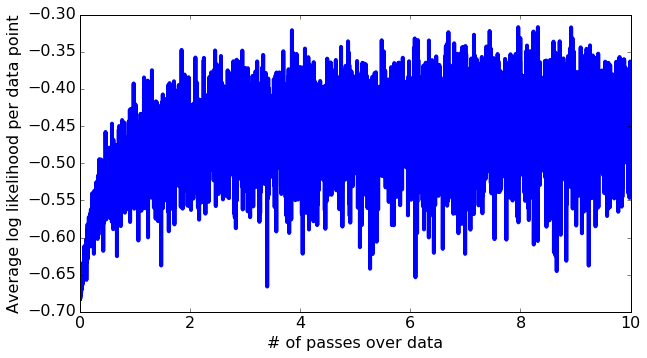

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(log_likelihood_all, len_data, batch_size, smoothing_window=1, label=''):
    plt.rcParams.update({'figure.figsize': (9,5)})
    log_likelihood_all_ma = np.convolve(np.array(log_likelihood_all), \
                                        np.ones((smoothing_window,))/smoothing_window, mode='valid')
    plt.plot(np.array(range(smoothing_window-1, len(log_likelihood_all)))*float(batch_size)/len_data,
             log_likelihood_all_ma, linewidth=4.0, label=label)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.xlabel('# of passes over data')
    plt.ylabel('Average log likelihood per data point')
    plt.legend(loc='lower right', prop={'size':14})

make_plot(log_likelihood_all,len(feature_matrix_train),100)

In [26]:
coefficients_sg, lla_sg = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-1, 100, len(feature_matrix_train)*200/100)

Iteration     0: Average log likelihood (of data points  [00000:00100]) = -0.68251093
Iteration     1: Average log likelihood (of data points  [00100:00200]) = -0.67845294
Iteration     2: Average log likelihood (of data points  [00200:00300]) = -0.68207160
Iteration     3: Average log likelihood (of data points  [00300:00400]) = -0.67411325
Iteration     4: Average log likelihood (of data points  [00400:00500]) = -0.67804438
Iteration     5: Average log likelihood (of data points  [00500:00600]) = -0.67712546
Iteration     6: Average log likelihood (of data points  [00600:00700]) = -0.66377074
Iteration     7: Average log likelihood (of data points  [00700:00800]) = -0.67321231
Iteration     8: Average log likelihood (of data points  [00800:00900]) = -0.66923613
Iteration     9: Average log likelihood (of data points  [00900:01000]) = -0.67479446
Iteration    10: Average log likelihood (of data points  [01000:01100]) = -0.66501639
Iteration    11: Average log likelihood (of data point

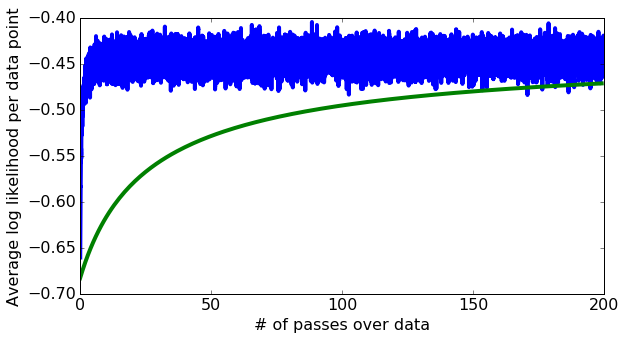

In [37]:
make_plot(lla_sg,len(feature_matrix_train),100,smoothing_window=30)
make_plot(lla_bg,len(feature_matrix_train),len(feature_matrix_train))

## Explore the effects of step sizes on stochastic gradient ascent

In [38]:
coeff_1en4, lla_1en4 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-4, 100, len(feature_matrix_train)*10/100)
coeff_1en3, lla_1en3 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-3, 100, len(feature_matrix_train)*10/100)
coeff_1en2, lla_1en2 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-2, 100, len(feature_matrix_train)*10/100)
coeff_1en1, lla_1en1 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e-1, 100, len(feature_matrix_train)*10/100)
coeff_1e0, lla_1e0 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e0, 100, len(feature_matrix_train)*10/100)
coeff_1e1, lla_1e1 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e1, 100, len(feature_matrix_train)*10/100)
coeff_1e2, lla_1e2 = logistic_regression_SG(feature_matrix_train, sentiment_train, np.zeros(194), 1e2, 100, len(feature_matrix_train)*10/100)

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69313622
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69313170
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69313585
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69312487
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69313157
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69313113
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.69311121
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69312692
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69312115
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69312811
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.69311286
Iteration   11: Average log likelihood (of data points  [01100:01

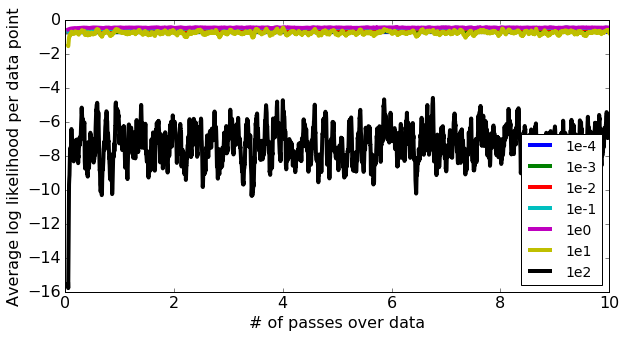

In [40]:
make_plot(lla_1en4,len(feature_matrix_train),100,smoothing_window=30,label='1e-4')
make_plot(lla_1en3,len(feature_matrix_train),100,smoothing_window=30,label='1e-3')
make_plot(lla_1en2,len(feature_matrix_train),100,smoothing_window=30,label='1e-2')
make_plot(lla_1en1,len(feature_matrix_train),100,smoothing_window=30,label='1e-1')
make_plot(lla_1e0,len(feature_matrix_train),100,smoothing_window=30,label='1e0')
make_plot(lla_1e1,len(feature_matrix_train),100,smoothing_window=30,label='1e1')
make_plot(lla_1e2,len(feature_matrix_train),100,smoothing_window=30,label='1e2')